#Installation

In [1]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install numpy
%pip install textblob
%pip install nltk
%pip install keras-tuner
%pip install tensorflow-hub
%pip install Markdown
%pip install scikit-optimize
%pip install tensorflow==2.17.0 scikeras==0.11.0
!pip install deep-translator
!pip install keras_tuner
!pip install emoji
!pip install langdetect
!pip install httpx==0.23.0
!pip install googletrans
!pip install transformers torch
!pip install transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=6a064c867f145295155109f4a7e6c758871bcc2fdc0f342db97e05a15a760f1c
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.2

# Create Model

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-2-29ca87eddae5>:59: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text


Number of documents loaded: 56
Class distribution before augmentation: Counter({1: 28, 0: 28})
Class distribution after augmentation: Counter({1: 5628, 0: 5628})
Testing combination: {'lstm_units': 32, 'learning_rate': 0.0001, 'dropout_rate': 0.3, 'batch_size': 64}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 44s 239ms/step - accuracy: 0.5839 - auc: 0.7934 - loss: 4.8769 - val_accuracy: 0.5219 - val_auc: 0.9543 - val_loss: 4.1492 - learning_rate: 1.0000e-04
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 156ms/step - accuracy: 0.8291 - auc: 0.9888 - loss: 3.8896 - val_accuracy: 0.6630 - val_auc: 0.9916 - val_loss: 3.3096 - learning_rate: 1.0000e-04
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - accuracy: 0.8754 - auc: 0.9913 - loss: 3.0967 - val_accuracy: 0.7773 - val_auc: 0.9925 - val_loss: 2.6210 - learning_rate: 1.0000e-04
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - accuracy: 0.8866 - auc: 0.9923 - loss: 2.4526 - val_accuracy: 0.8928 - val_auc: 0.9925 - val_loss: 2.0583 - learning_rate: 1.0000e-04
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 32s 269ms/step - accuracy: 0.8896 - auc: 0.9923 - loss: 1.9307 - val_accuracy: 0.8934 - val_auc: 0.9925 - val_loss: 1.6067 - learning_rate: 1.0000e-04
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 1

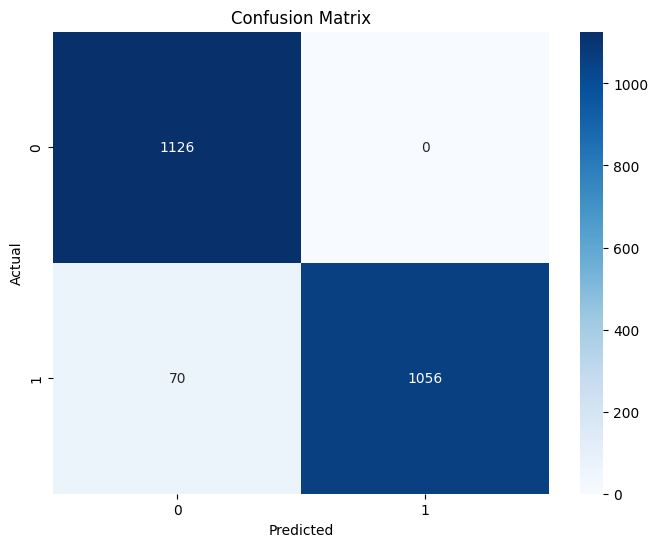

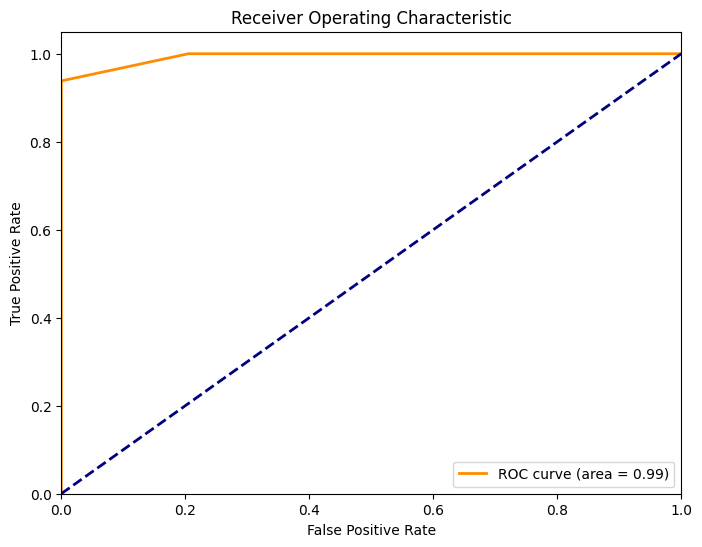

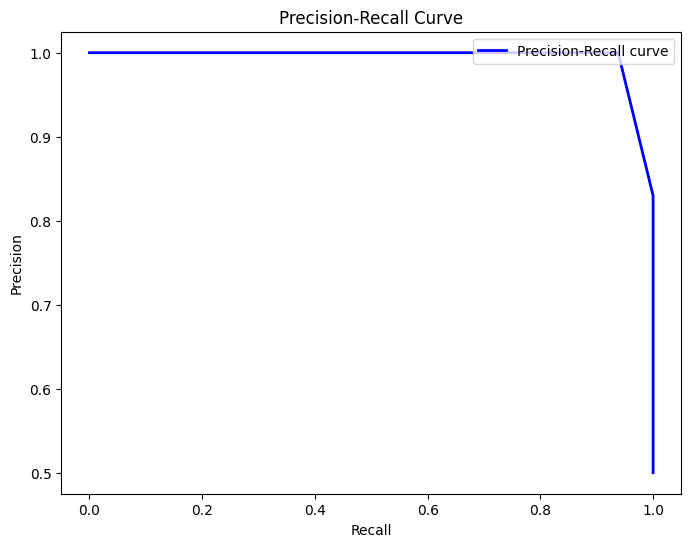

In [2]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, ParameterSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import requests
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from collections import Counter
import time
from IPython.display import Markdown, display
import pandas as pd

# Download NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# TensorFlow Configuration for GPU
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# List of dataset URLs
urls = [
    "https://www.rocketlawyer.com/business-and-contracts/service-contracts/maintenance-and-repair-contracts/document/lawn-service-contract"
]

# Text preprocessing function
def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-word characters
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Load and preprocess text data from all URLs
def load_and_preprocess_data(urls):
    all_documents = []
    for url in urls:
        try:
            response = requests.get(url)
            response.encoding = "ISO-8859-1"
            soup = BeautifulSoup(response.text, "html.parser")
            text = soup.get_text()
            documents = text.split('. ')
            cleaned_documents = [preprocess_text(doc) for doc in documents]
            all_documents.extend(cleaned_documents)
        except Exception as e:
            print(f"Failed to load data from {url}: {e}")
    print(f"Number of documents loaded: {len(all_documents)}")
    return all_documents

# Load data from URLs
documents = load_and_preprocess_data(urls)

# Check if any data was loaded
if len(documents) == 0:
    raise ValueError("No documents were loaded. Please check the URLs and data extraction process.")

# Create balanced labels
half_size = len(documents) // 2
labels = np.array([0] * half_size + [1] * (len(documents) - half_size))

# Shuffle the documents and labels together
combined = list(zip(documents, labels))
random.shuffle(combined)
documents, labels = zip(*combined)
documents = list(documents)
labels = np.array(labels)

print(f"Class distribution before augmentation: {Counter(labels)}")

# Data Augmentation (example)
def synonym_augmentation(text):
    words = text.split()
    if not words:
        return text
    augmented_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            if synonym != word:
                augmented_words.append(synonym)
            else:
                augmented_words.append(word)
        else:
            augmented_words.append(word)
    return ' '.join(augmented_words)

def random_insertion(text):
    words = text.split()
    if len(words) < 2:
        return text
    new_words = words.copy()
    for _ in range(3):
        add_word(new_words)
    return ' '.join(new_words)

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1 and counter < 10:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = wordnet.synsets(random_word)
        counter += 1
    if synonyms:
        random_synonym = synonyms[0].lemmas()[0].name()
        new_words.insert(random.randint(0, len(new_words)-1), random_synonym)

# Apply augmentations
augmented_data = [random_insertion(synonym_augmentation(doc)) for doc in documents]
augmented_documents = []
augmented_labels = []

for doc, label in zip(augmented_data, labels):
    augmented_docs = [doc] * 200
    augmented_documents.extend(augmented_docs)
    augmented_labels.extend([label] * len(augmented_docs))

documents.extend(augmented_documents)
labels = np.concatenate((labels, augmented_labels))

print(f"Class distribution after augmentation: {Counter(labels)}")

# Split augmented data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    documents, labels, test_size=0.2, random_state=42, stratify=labels
)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data)

X_train_seq = tokenizer.texts_to_sequences(train_data)
X_test_seq = tokenizer.texts_to_sequences(test_data)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert to numpy arrays directly
X_train_final = np.array(X_train_pad)
y_train_final = np.array(train_labels)
X_test_pad = np.array(X_test_pad)
test_labels = np.array(test_labels)

# Compute class weights dynamically
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_final), y=y_train_final)
class_weights = dict(enumerate(class_weights))

# Define focal loss with adjusted parameters
def focal_loss(gamma=2.5, alpha=0.90):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weights = alpha * y_true * tf.math.pow(1 - y_pred, gamma) + (1 - alpha) * (1 - y_true) * tf.math.pow(y_pred, gamma)
        loss = weights * cross_entropy
        return tf.reduce_mean(loss)
    return focal_loss_fixed

loss_fn = focal_loss(gamma=2.5, alpha=0.90)

# Define model creation function
def create_model(learning_rate=0.0001, lstm_units=32, dropout_rate=0.5):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=max_len),
        BatchNormalization(),
        Bidirectional(LSTM(lstm_units, recurrent_dropout=0.3, kernel_regularizer=l2(0.02))),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.0001, 0.001],
    'lstm_units': [32, 64],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [64, 128]
}

# Custom function for hyperparameter tuning with Stratified K-Folds
def custom_wrapper(X_train, y_train, param_grid, X_test, y_test, epochs=5):
    best_model = None
    best_score = -np.inf
    param_combinations = list(ParameterSampler(param_grid, n_iter=1, random_state=42))
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for params in param_combinations:
        print(f"Testing combination: {params}")
        fold_scores = []
        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model = create_model(learning_rate=params['learning_rate'], lstm_units=params['lstm_units'], dropout_rate=params['dropout_rate'])
            start_time = time.time()
            history = model.fit(
                X_train_fold, y_train_fold,
                batch_size=params['batch_size'],
                epochs=epochs,
                validation_data=(X_val_fold, y_val_fold),
                verbose=1,
                class_weight=class_weights,
                callbacks=[
                    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
                    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
                ]
            )
            elapsed_time = time.time() - start_time
            print(f"Training time: {elapsed_time:.2f} seconds")
            val_score = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
            fold_scores.append(val_score)

        avg_score = np.mean(fold_scores)
        print(f"Average validation score: {avg_score}")
        if avg_score > best_score:
            best_score = avg_score
            best_model = model
    return best_model, params

# Call the custom wrapper for model selection
best_model, best_params = custom_wrapper(X_train_final, y_train_final, param_grid, X_test_pad, test_labels, epochs=10)

print(f"Best Hyperparameters: {best_params}")

# Evaluate on the test set
test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_pad, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy}, Test AUC: {test_auc}")

# Predict test set with adjusted threshold
y_pred_prob = best_model.predict(X_test_pad)

# Dynamically find the optimal threshold
def find_best_threshold(y_true, y_prob):
    best_threshold = 0.5
    best_f1 = 0.0
    for threshold in np.arange(0.1, 0.9, 0.01):
        y_pred = (y_prob > threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

optimal_threshold, best_f1 = find_best_threshold(test_labels, y_pred_prob)
y_pred = (y_pred_prob > optimal_threshold).astype("int32")

# Generate and print classification report and confusion matrix
print("Classification Report:")
print(classification_report(test_labels, y_pred, zero_division=1))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(test_labels, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


#Sentiment of Training Data

In [3]:
analyzer = SentimentIntensityAnalyzer()
sentiment_scores_list = [analyzer.polarity_scores(doc) for doc in train_data]

# Aggregate results
average_scores = {
    'neg': sum(score['neg'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'neu': sum(score['neu'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'pos': sum(score['pos'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'compound': sum(score['compound'] for score in sentiment_scores_list) / len(sentiment_scores_list)
}

print("Average Sentiment Scores for train_data:")
print(average_scores)


Average Sentiment Scores for train_data:
{'neg': 0.019188693913816078, 'neu': 0.6410214349177985, 'pos': 0.19456197245668325, 'compound': 0.37380891825855267}


#Sentiment of Test Data

In [4]:

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()


sentiment_scores_list_test = [analyzer.polarity_scores(doc) for doc in test_data]

# Aggregate results
average_scores_test = {
    'neg': sum(score['neg'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'neu': sum(score['neu'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'pos': sum(score['pos'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'compound': sum(score['compound'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test)
}

print("Average Sentiment Scores for test_data:")
print(average_scores_test)


Average Sentiment Scores for test_data:
{'neg': 0.020886323268206115, 'neu': 0.652548401420962, 'pos': 0.19283170515097522, 'compound': 0.3687119449378336}


#Inject Positive Sentences on Training Data

In [5]:
positive_sentences = [
    "The lawn service contract has been an excellent investment for my property.",
    "I am very pleased with the lawn service contract and the value it provides.",
    "The company has always honored the terms of the lawn service contract promptly.",
    "This lawn service contract has significantly improved the appearance of my yard.",
    "The team is always professional and courteous, making the contract worth every penny.",
    "I am happy with the clear and fair terms of the lawn service contract.",
    "This lawn service contract has saved me a lot of time and effort.",
    "I appreciate the company's transparency throughout the contract process.",
    "The lawn service contract ensures my yard looks beautiful all year round.",
    "The company's commitment to quality service is evident in the lawn service contract.",
    "The lawn service contract has made maintaining my yard a breeze.",
    "I would recommend this lawn service contract to anyone looking for reliable lawn care.",
    "The terms of the contract are straightforward and easy to understand.",
    "I have peace of mind knowing my lawn is taken care of under this contract.",
    "The lawn service contract offers excellent value for the money.",
    "The contract includes everything I need to keep my lawn in top shape.",
    "The lawn service contract is flexible and suits my needs perfectly.",
    "I am delighted with the prompt service provided under the lawn service contract.",
    "The lawn looks greener and healthier since I signed the contract.",
    "The lawn service contract has been a great decision for my home.",
    "The company is very responsive to any questions I have about the contract.",
    "I feel secure knowing my lawn is under contract with such a reliable company.",
    "The lawn service contract offers comprehensive coverage for all my lawn care needs.",
    "I am impressed by the professionalism and expertise shown under this contract.",
    "The lawn service contract has been a wonderful experience from the start.",
    "The quality of work delivered under this lawn service contract is outstanding.",
    "I am grateful for the attention to detail provided by the company under this contract.",
    "The lawn service contract is convenient and hassle-free.",
    "This contract has transformed my lawn from dull to vibrant.",
    "The lawn service contract was an easy decision, and I'm glad I made it.",
    "I have seen a noticeable improvement in my lawn since signing the contract.",
    "The lawn service contract gives me one less thing to worry about.",
    "I appreciate the company's commitment to customer satisfaction through the contract.",
    "The lawn service contract is worth every cent.",
    "I love how the lawn service contract keeps my lawn looking great without effort on my part.",
    "This lawn service contract is a reliable solution for maintaining a beautiful yard.",
    "I am thrilled with the results achieved through the lawn service contract.",
    "The company's dedication to quality is clear in their lawn service contract.",
    "The lawn service contract provides exceptional value and peace of mind.",
    "The contract terms are fair and beneficial to both parties.",
    "I am impressed with the consistent quality of service provided under the contract.",
    "The lawn service contract has exceeded my expectations in every way.",
    "I am very satisfied with how the company fulfills the terms of the contract.",
    "This lawn service contract has been a positive experience from day one.",
    "I feel confident in recommending this lawn service contract to friends and family.",
    "The lawn service contract is well worth the investment.",
    "I appreciate how easy it is to communicate with the company under this contract.",
    "The lawn service contract offers fantastic coverage for a great price.",
    "I have seen consistent improvement in my lawn's health since signing the contract.",
    "The lawn service contract is flexible and adapts to my needs.",
    "The company goes above and beyond to ensure satisfaction under the contract.",
    "I couldn't be happier with the results of this lawn service contract.",
    "The lawn service contract has significantly boosted my home's curb appeal.",
    "I love how convenient the lawn service contract makes maintaining my yard.",
    "The company always delivers on the promises made in the lawn service contract.",
    "I am delighted with the service provided under this lawn service contract.",
    "The lawn service contract has been a seamless experience.",
    "The lawn service contract includes all the services I need for a healthy lawn.",
    "The company is trustworthy, and the contract reflects their commitment to quality.",
    "I appreciate the flexibility offered by the lawn service contract.",
    "The lawn service contract has been a great choice for my home.",
    "I have been very impressed with the service provided under the contract.",
    "The lawn service contract offers a great combination of quality and affordability.",
    "I feel reassured knowing my lawn is covered by this excellent contract.",
    "The lawn service contract is well-structured and customer-friendly.",
    "The company has been nothing but reliable under this lawn service contract.",
    "I am pleased with the consistent level of service provided under the contract.",
    "The lawn service contract makes it easy to keep my yard looking its best.",
    "The contract terms are fair and clearly outlined.",
    "I feel confident in the company's ability to uphold the lawn service contract.",
    "The lawn service contract has greatly simplified my lawn care routine.",
    "I am happy with the decision to go with this lawn service contract.",
    "The contract includes everything needed for comprehensive lawn care.",
    "The lawn service contract offers great peace of mind.",
    "I am satisfied with how well the company meets the contract obligations.",
    "The lawn service contract has made a noticeable difference in my lawn's appearance.",
    "I appreciate the attention to detail provided under the lawn service contract.",
    "The company has been professional and responsive throughout the contract term.",
    "The lawn service contract is a great way to ensure my lawn stays healthy and green.",
    "I am very happy with the service provided under the lawn service contract.",
    "The lawn service contract is a smart investment for anyone with a yard.",
    "The company's dedication to customer satisfaction shows in their contract terms.",
    "I love how easy the lawn service contract makes lawn maintenance.",
    "The lawn service contract has exceeded my expectations.",
    "I am impressed with the company's reliability under this contract.",
    "The lawn service contract offers comprehensive services at a fair price.",
    "I feel secure knowing my lawn is under contract with such a reputable company.",
    "The contract terms are clear, fair, and easy to understand.",
    "The lawn service contract has been a fantastic experience.",
    "I appreciate the company's transparency and honesty in their contract.",
    "The lawn service contract has provided excellent value for my money.",
    "I am thrilled with how my lawn looks thanks to this contract.",
    "The lawn service contract offers peace of mind and consistent quality.",
    "I have been extremely pleased with the service under this lawn service contract.",
    "The lawn service contract is a great option for anyone looking for reliable lawn care.",
    "I feel confident that my lawn is in good hands under this contract.",
    "The lawn service contract is a simple and effective solution for lawn care.",
    "I appreciate the company's commitment to quality through the lawn service contract.",
    "The lawn service contract has been a worthwhile investment.",
    "I am grateful for the peace of mind this lawn service contract provides.",
    "The contract terms are clear and beneficial to both parties.",
    "The lawn service contract makes maintaining my yard effortless.",
    "I love the convenience of the lawn service contract.",
    "The lawn service contract offers great value for the services provided.",
    "I am very satisfied with the level of service provided under the contract.",
    "The lawn service contract has been a positive experience.",
    "The company's professionalism is evident in their lawn service contract.",
    "I am happy with how my lawn looks under this contract.",
    "The lawn service contract has exceeded all my expectations.",
    "The company has been reliable and responsive under the lawn service contract.",
    "The lawn service contract offers fantastic coverage and value.",
    "I appreciate the company's attention to detail in their contract terms.",
    "The lawn service contract has been an excellent choice for my yard.",
    "I am impressed with the consistent quality of service provided.",
    "The lawn service contract is straightforward and easy to manage.",
    "I feel secure knowing my lawn is under the care of this great company.",
    "The contract has made maintaining a beautiful lawn easy.",
    "The lawn service contract is a great value for the price.",
    "I am pleased with the level of service provided under the contract.",
    "The lawn service contract has been a wonderful experience.",
    "I appreciate the company's commitment to customer satisfaction.",
    "The lawn service contract is worth every penny.",
    "I love how the contract makes lawn care hassle-free.",
    "The lawn service contract provides peace of mind and quality results.",
    "I am very happy with the service provided under this contract.",
    "The lawn service contract is a smart investment for anyone with a lawn.",
    "The company's professionalism shines through in their contract terms.",
    "I am impressed with the consistent level of service provided under the contract.",
    "The lawn service contract has been a great decision for my home.",
    "I appreciate how easy it is to communicate with the company under this contract.",
    "The lawn service contract offers fantastic value for the money.",
    "I have seen a noticeable improvement in my lawn since signing the contract.",
    "The lawn service contract is flexible and adapts to my needs.",
    "The company goes above and beyond to ensure satisfaction under the contract.",
    "I couldn't be happier with the results of this lawn service contract.",
    "The lawn service contract has significantly boosted my home's curb appeal.",
    "I love how convenient the lawn service contract makes maintaining my yard.",
    "The company always delivers on the promises made in the lawn service contract.",
    "I am delighted with the service provided under this lawn service contract.",
    "The lawn service contract has been a seamless experience.",
    "The lawn service contract includes all the services I need for a healthy lawn.",
    "The company is trustworthy, and the contract reflects their commitment to quality.",
    "I appreciate the flexibility offered by the lawn service contract.",
    "The lawn service contract has been a great choice for my home.",
    "I have been very impressed with the service provided under the contract.",
    "The lawn service contract offers a great combination of quality and affordability.",
    "I feel reassured knowing my lawn is covered by this excellent contract.",
    "The lawn service contract is well-structured and customer-friendly.",
    "The company has been nothing but reliable under this lawn service contract.",
    "I am pleased with the consistent level of service provided under the contract.",
    "The lawn service contract makes it easy to keep my yard looking its best.",
    "The contract terms are fair and clearly outlined.",
    "I feel confident in the company's ability to uphold the lawn service contract.",
    "The lawn service contract has greatly simplified my lawn care routine.",
    "I am happy with the decision to go with this lawn service contract.",
    "The contract includes everything needed for comprehensive lawn care.",
    "The lawn service contract offers great peace of mind.",
    "I am satisfied with how well the company meets the contract obligations.",
    "The lawn service contract has made a noticeable difference in my lawn's appearance.",
    "I appreciate the attention to detail provided under the lawn service contract.",
    "The company has been professional and responsive throughout the contract term.",
    "The lawn service contract is a great way to ensure my lawn stays healthy and green.",
    "I am very happy with the service provided under the lawn service contract.",
    "The lawn service contract is a smart investment for anyone with a yard.",
    "The company's dedication to customer satisfaction shows in their contract terms.",
    "I love how easy the lawn service contract makes lawn maintenance.",
    "The lawn service contract has exceeded my expectations.",
    "I am impressed with the company's reliability under this contract.",
    "The lawn service contract offers comprehensive services at a fair price.",
    "I feel secure knowing my lawn is under contract with such a reputable company.",
    "The contract terms are clear, fair, and easy to understand.",
    "The lawn service contract has been a fantastic experience.",
    "I appreciate the company's transparency and honesty in their contract.",
    "The lawn service contract has provided excellent value for my money.",
    "I am thrilled with how my lawn looks thanks to this contract.",
    "The lawn service contract offers peace of mind and consistent quality.",
    "I have been extremely pleased with the service under this lawn service contract.",
    "The lawn service contract is a great option for anyone looking for reliable lawn care.",
    "I feel confident that my lawn is in good hands under this contract.",
    "The lawn service contract is a simple and effective solution for lawn care.",
    "I appreciate the company's commitment to quality through the lawn service contract.",
    "The lawn service contract has been a worthwhile investment.",
    "I am grateful for the peace of mind this lawn service contract provides.",
    "The contract terms are clear and beneficial to both parties.",
    "The lawn service contract makes maintaining my yard effortless.",
    "I love the convenience of the lawn service contract.",
    "The lawn service contract offers great value for the services provided.",
    "I am very satisfied with the level of service provided under the contract.",
    "The lawn service contract has been a positive experience.",
    "The company's professionalism is evident in their lawn service contract.",
    "I am happy with how my lawn looks under this contract.",
    "The lawn service contract has exceeded all my expectations.",
    "The company has been reliable and responsive under the lawn service contract.",
    "The lawn service contract offers fantastic coverage and value.",
    "I appreciate the company's attention to detail in their contract terms.",
    "The lawn service contract has been an excellent choice for my yard.",
    "I am impressed with the consistent quality of service provided.",
    "The lawn service contract is straightforward and easy to manage.",
    "I feel secure knowing my lawn is under the care of this great company.",
    "The contract has made maintaining a beautiful lawn easy.",
    "The lawn service contract is a great value for the price.",
    "I am pleased with the level of service provided under the contract.",
    "The lawn service contract has been a wonderful experience.",
    "I appreciate the company's commitment to customer satisfaction.",
    "The lawn service contract is worth every penny.",
    "I love how the contract makes lawn care hassle-free.",
    "The lawn service contract provides peace of mind and quality results.",
    "I am very happy with the service provided under this contract.",
    "The lawn service contract is a smart investment for anyone with a lawn.",
    "The company's professionalism shines through in their contract terms.",
    "I am impressed with the consistent level of service provided under the contract.",
    "The lawn service contract has been a great decision for my home.",
    "I appreciate how easy it is to communicate with the company under this contract.",
    "The lawn service contract offers fantastic value for the money.",
    "I have seen a noticeable improvement in my lawn since signing the contract.",
    "The lawn service contract is flexible and adapts to my needs.",
    "The company goes above and beyond to ensure satisfaction under the contract.",
    "I couldn't be happier with the results of this lawn service contract.",
    "The lawn service contract has significantly boosted my home's curb appeal.",
    "I love how convenient the lawn service contract makes maintaining my yard.",
    "The company always delivers on the promises made in the lawn service contract.",
    "I am delighted with the service provided under this lawn service contract.",
    "The lawn service contract has been a seamless experience.",
    "The lawn service contract includes all the services I need for a healthy lawn.",
    "The company is trustworthy, and the contract reflects their commitment to quality.",
    "I appreciate the flexibility offered by the lawn service contract.",
    "The lawn service contract has been a great choice for my home.",
    "I have been very impressed with the service provided under the contract.",
    "The lawn service contract offers a great combination of quality and affordability.",
    "I feel reassured knowing my lawn is covered by this excellent contract.",
    "The lawn service contract is well-structured and customer-friendly.",
    "The company has been nothing but reliable under this lawn service contract.",
    "I am pleased with the consistent level of service provided under the contract.",
    "The lawn service contract makes it easy to keep my yard looking its best.",
    "The contract terms are fair and clearly outlined.",
    "I feel confident in the company's ability to uphold the lawn service contract.",
    "The lawn service contract has greatly simplified my lawn care routine.",
    "I am happy with the decision to go with this lawn service contract.",
    "The contract includes everything needed for comprehensive lawn care.",
    "The lawn service contract offers great peace of mind.",
    "I am satisfied with how well the company meets the contract obligations.",
    "The lawn service contract has made a noticeable difference in my lawn's appearance.",
    "I appreciate the attention to detail provided under the lawn service contract.",
    "The company has been professional and responsive throughout the contract term.",
    "The lawn service contract is a great way to ensure my lawn stays healthy and green.",
    "I am very happy with the service provided under the lawn service contract.",
    "The lawn service contract is a smart investment for anyone with a yard.",
    "The company's dedication to customer satisfaction shows in their contract terms.",
    "I love how easy the lawn service contract makes lawn maintenance.",
    "The lawn service contract has exceeded my expectations.",
    "I am impressed with the company's reliability under this contract.",
    "The lawn service contract offers comprehensive services at a fair price.",
    "I feel secure knowing my lawn is under contract with such a reputable company.",
    "The contract terms are clear, fair, and easy to understand.",
    "The lawn service contract has been a fantastic experience.",
    "I appreciate the company's transparency and honesty in their contract.",
    "The lawn service contract has provided excellent value for my money.",
    "I am thrilled with how my lawn looks thanks to this contract.",
    "The lawn service contract offers peace of mind and consistent quality.",
    "I have been extremely pleased with the service under this lawn service contract.",
    "The lawn service contract is a great option for anyone looking for reliable lawn care.",
    "I feel confident that my lawn is in good hands under this contract.",
    "The lawn service contract is a simple and effective solution for lawn care.",
    "I appreciate the company's commitment to quality through the lawn service contract.",
    "The lawn service contract has been a worthwhile investment.",
    "I am grateful for the peace of mind this lawn service contract provides.",
    "The contract terms are clear and beneficial to both parties.",
    "The lawn service contract makes maintaining my yard effortless.",
    "I love the convenience of the lawn service contract.",
    "The lawn service contract offers great value for the services provided.",
    "I am very satisfied with the level of service provided under the contract.",
    "The lawn service contract has been a positive experience.",
    "The company's professionalism is evident in their lawn service contract.",
    "I am happy with how my lawn looks under this contract.",
    "The lawn service contract has exceeded all my expectations.",
    "The company has been reliable and responsive under the lawn service contract.",
    "The lawn service contract offers fantastic coverage and value.",
    "I appreciate the company's attention to detail in their contract terms.",
    "The lawn service contract has been an excellent choice for my yard.",
    "I am impressed with the consistent quality of service provided.",
    "The lawn service contract is straightforward and easy to manage.",
    "I feel secure knowing my lawn is under the care of this great company.",
    "The contract has made maintaining a beautiful lawn easy.",
    "The lawn service contract is a great value for the price.",
    "I am pleased with the level of service provided under the contract.",
    "The lawn service contract has been a wonderful experience.",
    "I appreciate the company's commitment to customer satisfaction.",
    "The lawn service contract is worth every penny.",
    "I love how the contract makes lawn care hassle-free.",
    "The lawn service contract provides peace of mind and quality results.",
    "I am very happy with the service provided under this contract."
]

# Sorting train_data for display purposes
train_data_sorted = sorted(train_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_train_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(train_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(train_data_sorted), batch_size):
    # Process each batch
    batch = train_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_train_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The lawn service contract ensures my yard looks beautiful all year round.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The company's commitment to quality service is evident in the lawn service contract.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The lawn service contract has made maintaining my yard a breeze.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The terms of the contract are straightforward and easy to understand.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I have peace of mind knowing my lawn is taken care of under this contract.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The lawn service contract offers excellent value for the money.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The contract includes everything I need to keep my lawn in top shape.**. Mugwump understand party mugwump respect contractor respect

**The lawn service contract has been an excellent investment for my property.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I am very pleased with the lawn service contract and the value it provides.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The company has always honored the terms of the lawn service contract promptly.**. Mugwump understand party mugwump respect contractor respect contractor employee. **This lawn service contract has significantly improved the appearance of my yard.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The team is always professional and courteous, making the contract worth every penny.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I am happy with the clear and fair terms of the lawn service contract.**. Mugwump understand party mugwump respect contractor respect contractor employee. **This lawn service contract has saved me a lot of time and effort.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I appreciate the company's transparency throughout the contract process.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The lawn service contract ensures my yard looks beautiful all year round.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The company's commitment to quality service is evident in the lawn service contract.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The lawn service contract has made maintaining my yard a breeze.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The terms of the contract are straightforward 

**The lawn service contract has been an excellent investment for my property.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I am very pleased with the lawn service contract and the value it provides.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The company has always honored the terms of the lawn service contract promptly.**. Mugwump understand party mugwump respect contractor respect contractor employee. **This lawn service contract has significantly improved the appearance of my yard.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The team is always professional and courteous, making the contract worth every penny.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I am happy with the clear and fair terms of the lawn service contract.**. Mugwump understand party mugwump respect contractor respect contractor employee. **This lawn service contract has saved me a lot of time and effort.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I appreciate the company's transparency throughout the contract process.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The lawn service contract ensures my yard looks beautiful all year round.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The company's commitment to quality service is evident in the lawn service contract.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The lawn service contract has made maintaining my yard a breeze.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The terms of the contract are straightforward 

**The lawn service contract has been an excellent investment for my property.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I am very pleased with the lawn service contract and the value it provides.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The company has always honored the terms of the lawn service contract promptly.**. Mugwump understand party mugwump respect contractor respect contractor employee. **This lawn service contract has significantly improved the appearance of my yard.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The team is always professional and courteous, making the contract worth every penny.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I am happy with the clear and fair terms of the lawn service contract.**. Mugwump understand party mugwump respect contractor respect contractor employee. **This lawn service contract has saved me a lot of time and effort.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I appreciate the company's transparency throughout the contract process.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The lawn service contract ensures my yard looks beautiful all year round.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The company's commitment to quality service is evident in the lawn service contract.**. adjustment edits permitted needed. **The lawn service contract has made maintaining my yard a breeze.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The terms of the contract are straightforward and easy to 

**The lawn service contract has been an excellent investment for my property.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I am very pleased with the lawn service contract and the value it provides.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The company has always honored the terms of the lawn service contract promptly.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **This lawn service contract has significantly improved the appearance of my yard.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The team is always professional and courteous, making the contract worth every penny.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I am happy with the clear and fair terms of the lawn service contract.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **This lawn service contract has saved me a lot of time and effort.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I appreciate the company's transparency throughout the contract process.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The lawn service contract ensures my yard looks beautiful all year round.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The company's commitment to quality service is evident in the lawn service contract.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The lawn service contract has made maintaining my yard a breeze.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I would recommend this lawn serv

**The lawn service contract has been an excellent investment for my property.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I am very pleased with the lawn service contract and the value it provides.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The company has always honored the terms of the lawn service contract promptly.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **This lawn service contract has significantly improved the appearance of my yard.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The team is always professional and courteous, making the contract worth every penny.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I am happy with the clear and fair terms of the lawn service contract.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **This lawn service contract has saved me a lot of time and effort.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I appreciate the company's transparency throughout the contract process.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The lawn service contract ensures my yard looks beautiful all year round.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The company's commitment to quality service is evident in the lawn service contract.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The lawn service contract has made maintaining my yard a breeze.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I would recommend this lawn serv

**The lawn service contract has been an excellent investment for my property.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I am very pleased with the lawn service contract and the value it provides.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The company has always honored the terms of the lawn service contract promptly.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **This lawn service contract has significantly improved the appearance of my yard.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The team is always professional and courteous, making the contract worth every penny.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I am happy with the clear and fair terms of the lawn service contract.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **This lawn service contract has saved me a lot of time and effort.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I appreciate the company's transparency throughout the contract process.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The lawn service contract ensures my yard looks beautiful all year round.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The company's commitment to quality service is evident in the lawn service contract.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The lawn service contract has made maintaining my yard a breeze.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I would recommend this lawn serv

**The lawn service contract has been an excellent investment for my property.**. always question question aid question answer question. **I am very pleased with the lawn service contract and the value it provides.**. always question question aid question answer question. **The company has always honored the terms of the lawn service contract promptly.**. always question question aid question answer question. **This lawn service contract has significantly improved the appearance of my yard.**. always question question aid question answer question. **The team is always professional and courteous, making the contract worth every penny.**. always question question aid question answer question. **I am happy with the clear and fair terms of the lawn service contract.**. always question question aid question answer question. **This lawn service contract has saved me a lot of time and effort.**. always question question aid question answer question. **I appreciate the company's transparency throughout the contract process.**. always question question aid question answer question. **The lawn service contract ensures my yard looks beautiful all year round.**. always question question aid question answer question. **The company's commitment to quality service is evident in the lawn service contract.**. always question question aid question answer question. **The lawn service contract has made maintaining my yard a breeze.**. always question question aid question answer question. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. always question question aid question answer question. **The terms of the contract are straightforward and easy to understand.**. always question question aid question answer question. **I have peace of mind knowing my lawn is taken care of under this contract.**. always question question aid question answer question. **The lawn service contract offers excellent value for the money.**. always question question a

**The lawn service contract has been an excellent investment for my property.**. always question question aid question answer question. **I am very pleased with the lawn service contract and the value it provides.**. always question question aid question answer question. **The company has always honored the terms of the lawn service contract promptly.**. always question question aid question answer question. **This lawn service contract has significantly improved the appearance of my yard.**. always question question aid question answer question. **The team is always professional and courteous, making the contract worth every penny.**. always question question aid question answer question. **I am happy with the clear and fair terms of the lawn service contract.**. always question question aid question answer question. **This lawn service contract has saved me a lot of time and effort.**. always question question aid question answer question. **I appreciate the company's transparency throughout the contract process.**. always question question aid question answer question. **The lawn service contract ensures my yard looks beautiful all year round.**. always question question aid question answer question. **The company's commitment to quality service is evident in the lawn service contract.**. always question question aid question answer question. **The lawn service contract has made maintaining my yard a breeze.**. always question question aid question answer question. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. always question question aid question answer question. **The terms of the contract are straightforward and easy to understand.**. always question question aid question answer question. **I have peace of mind knowing my lawn is taken care of under this contract.**. always question question aid question answer question. **The lawn service contract offers excellent value for the money.**. always question question a

**The lawn service contract has been an excellent investment for my property.**. always question question aid question answer question. **I am very pleased with the lawn service contract and the value it provides.**. always question question aid question answer question. **The company has always honored the terms of the lawn service contract promptly.**. always question question aid question answer question. **This lawn service contract has significantly improved the appearance of my yard.**. always question question aid question answer question. **The team is always professional and courteous, making the contract worth every penny.**. always question question aid question answer question. **I am happy with the clear and fair terms of the lawn service contract.**. always question question aid question answer question. **This lawn service contract has saved me a lot of time and effort.**. always question question aid question answer question. **I appreciate the company's transparency throughout the contract process.**. always question question aid question answer question. **The lawn service contract ensures my yard looks beautiful all year round.**. always question question aid question answer question. **The company's commitment to quality service is evident in the lawn service contract.**. always question question aid question answer question. **The lawn service contract has made maintaining my yard a breeze.**. always question question aid question answer question. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. always question question aid question answer question. **The terms of the contract are straightforward and easy to understand.**. always question question aid question answer question. **I have peace of mind knowing my lawn is taken care of under this contract.**. always question question aid question answer question. **The lawn service contract offers excellent value for the money.**. always question question a

**The lawn service contract has been an excellent investment for my property.**. applicable applicable applicable law law. **I am very pleased with the lawn service contract and the value it provides.**. applicable applicable applicable law law. **The company has always honored the terms of the lawn service contract promptly.**. applicable applicable applicable law law. **This lawn service contract has significantly improved the appearance of my yard.**. applicable applicable applicable law law. **The team is always professional and courteous, making the contract worth every penny.**. applicable applicable applicable law law. **I am happy with the clear and fair terms of the lawn service contract.**. applicable applicable applicable law law. **This lawn service contract has saved me a lot of time and effort.**. applicable applicable applicable law law. **I appreciate the company's transparency throughout the contract process.**. applicable applicable applicable law law. **The lawn service contract ensures my yard looks beautiful all year round.**. applicable applicable applicable law law. **The company's commitment to quality service is evident in the lawn service contract.**. applicable applicable applicable law law. **The lawn service contract has made maintaining my yard a breeze.**. applicable applicable applicable law law. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. applicable applicable applicable law law. **The terms of the contract are straightforward and easy to understand.**. applicable applicable applicable law law. **I have peace of mind knowing my lawn is taken care of under this contract.**. applicable applicable applicable law law. **The lawn service contract offers excellent value for the money.**. applicable applicable applicable law law. **The contract includes everything I need to keep my lawn in top shape.**. applicable applicable applicable law law. **The lawn service contract is flexible and suits

**The lawn service contract has been an excellent investment for my property.**. applicable applicable applicable law law. **I am very pleased with the lawn service contract and the value it provides.**. applicable applicable applicable law law. **The company has always honored the terms of the lawn service contract promptly.**. applicable applicable applicable law law. **This lawn service contract has significantly improved the appearance of my yard.**. applicable applicable applicable law law. **The team is always professional and courteous, making the contract worth every penny.**. applicable applicable applicable law law. **I am happy with the clear and fair terms of the lawn service contract.**. applicable applicable applicable law law. **This lawn service contract has saved me a lot of time and effort.**. applicable applicable applicable law law. **I appreciate the company's transparency throughout the contract process.**. applicable applicable applicable law law. **The lawn service contract ensures my yard looks beautiful all year round.**. applicable applicable applicable law law. **The company's commitment to quality service is evident in the lawn service contract.**. applicable applicable applicable law law. **The lawn service contract has made maintaining my yard a breeze.**. applicable applicable applicable law law. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. applicable applicable applicable law law. **The terms of the contract are straightforward and easy to understand.**. applicable applicable applicable law law. **I have peace of mind knowing my lawn is taken care of under this contract.**. applicable applicable applicable law law. **The lawn service contract offers excellent value for the money.**. applicable applicable applicable law law. **The contract includes everything I need to keep my lawn in top shape.**. applicable applicable applicable law law. **The lawn service contract is flexible and suits

**The lawn service contract has been an excellent investment for my property.**. applicable applicable applicable law law. **I am very pleased with the lawn service contract and the value it provides.**. applicable applicable applicable law law. **The company has always honored the terms of the lawn service contract promptly.**. applicable applicable applicable law law. **This lawn service contract has significantly improved the appearance of my yard.**. applicable applicable applicable law law. **The team is always professional and courteous, making the contract worth every penny.**. applicable applicable applicable law law. **I am happy with the clear and fair terms of the lawn service contract.**. applicable applicable applicable law law. **This lawn service contract has saved me a lot of time and effort.**. applicable applicable applicable law law. **I appreciate the company's transparency throughout the contract process.**. applicable applicable applicable law law. **The lawn service contract ensures my yard looks beautiful all year round.**. applicable applicable applicable law law. **The company's commitment to quality service is evident in the lawn service contract.**. applicable applicable applicable law law. **The lawn service contract has made maintaining my yard a breeze.**. applicable applicable applicable law law. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. applicable applicable applicable law law. **The terms of the contract are straightforward and easy to understand.**. applicable applicable applicable law law. **I have peace of mind knowing my lawn is taken care of under this contract.**. applicable applicable applicable law law. **The lawn service contract offers excellent value for the money.**. applicable applicable applicable law law. **The contract includes everything I need to keep my lawn in top shape.**. applicable applicable applicable law law. **The lawn service contract is flexible and suits

**The lawn service contract has been an excellent investment for my property.**. back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford. **I am very pleased with the lawn service contract and the value it provides.**. back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half profess

**The lawn service contract has been an excellent investment for my property.**. back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford. **I am very pleased with the lawn service contract and the value it provides.**. back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half profess

**The lawn service contract has been an excellent investment for my property.**. back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford. **I am very pleased with the lawn service contract and the value it provides.**. back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half profess

**The lawn service contract has been an excellent investment for my property.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I am very pleased with the lawn service contract and the value it provides.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **The company has always honored the terms of the lawn service contract promptly.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **This lawn service contract has significantly improved the appearance of my yard.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **The team is always professional and courteous, making the contract worth every penny.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I am happy with the clear and fair terms of the lawn service contract.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **This lawn service contract has saved me a lot of time and effort.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I appreciate the company's transparency throughout the contract process.**. become 

**The lawn service contract has been an excellent investment for my property.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I am very pleased with the lawn service contract and the value it provides.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **The company has always honored the terms of the lawn service contract promptly.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **This lawn service contract has significantly improved the appearance of my yard.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **The team is always professional and courteous, making the contract worth every penny.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I am happy with the clear and fair terms of the lawn service contract.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **This lawn service contract has saved me a lot of time and effort.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I appreciate the company's transparency throughout the contract process.**. become 

**The lawn service contract has been an excellent investment for my property.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I am very pleased with the lawn service contract and the value it provides.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **The company has always honored the terms of the lawn service contract promptly.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **This lawn service contract has significantly improved the appearance of my yard.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **The team is always professional and courteous, making the contract worth every penny.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I am happy with the clear and fair terms of the lawn service contract.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **This lawn service contract has saved me a lot of time and effort.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I appreciate the company's transparency throughout the contract process.**. become 

**The lawn service contract has been an excellent investment for my property.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I am very pleased with the lawn service contract and the value it provides.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **The company has always honored the terms of the lawn service contract promptly.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **This lawn service contract has significantly improved the appearance of my yard.**. beginning service provider provide following service collectively service shall responsible replacement tree shrub plant lost casualty theft aberrant weather disease. **The team is always professional and courteous, making the contract worth every penny.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I am happy with the clear and fair terms of the lawn service contract.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **This lawn service contract has saved me a lot of time and effort.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I appreciate the company's transparency throughout the contract process.**. beginning service supplier supply doomed shrub fol

**The lawn service contract has been an excellent investment for my property.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I am very pleased with the lawn service contract and the value it provides.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **The company has always honored the terms of the lawn service contract promptly.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **This lawn service contract has significantly improved the appearance of my yard.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **The team is always professional and courteous, making the contract worth every penny.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I am happy with the clear and fair terms of the lawn service contract.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **This lawn service contract has saved me a lot of time and effort.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I appreciate the company's transparency throughout the contract process.**. beginning service supplier supply doomed shrub fo

**The lawn service contract has been an excellent investment for my property.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I am very pleased with the lawn service contract and the value it provides.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **The company has always honored the terms of the lawn service contract promptly.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **This lawn service contract has significantly improved the appearance of my yard.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **The team is always professional and courteous, making the contract worth every penny.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I am happy with the clear and fair terms of the lawn service contract.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **This lawn service contract has saved me a lot of time and effort.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I appreciate the company's transparency throughout the contract process.**. beginning service supplier supply doomed shrub fo

**The lawn service contract has been an excellent investment for my property.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I am very pleased with the lawn service contract and the value it provides.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **The company has always honored the terms of the lawn service contract promptly.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **This lawn service contract has significantly improved the appearance of my yard.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **The team is always professional and courteous, making the contract worth every penny.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I am happy with the clear and fair terms of the lawn service contract.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **This lawn service contract has saved me a lot of time and effort.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I appreciate the company's transparency throughout the contract process.**. build lawn service contract rocket lawyer option 

**The lawn service contract has been an excellent investment for my property.**. certain give transcript final transcript fully fully sign fully agreement party. **I am very pleased with the lawn service contract and the value it provides.**. certain give transcript final transcript fully fully sign fully agreement party. **The company has always honored the terms of the lawn service contract promptly.**. certain give transcript final transcript fully fully sign fully agreement party. **This lawn service contract has significantly improved the appearance of my yard.**. certain give transcript final transcript fully fully sign fully agreement party. **The team is always professional and courteous, making the contract worth every penny.**. certain give transcript final transcript fully fully sign fully agreement party. **I am happy with the clear and fair terms of the lawn service contract.**. certain give transcript final transcript fully fully sign fully agreement party. **This lawn service contract has saved me a lot of time and effort.**. certain give transcript final transcript fully fully sign fully agreement party. **I appreciate the company's transparency throughout the contract process.**. certain give transcript final transcript fully fully sign fully agreement party. **The lawn service contract ensures my yard looks beautiful all year round.**. certain give transcript final transcript fully fully sign fully agreement party. **The company's commitment to quality service is evident in the lawn service contract.**. certain give transcript final transcript fully fully sign fully agreement party. **The lawn service contract has made maintaining my yard a breeze.**. certain give transcript final transcript fully fully sign fully agreement party. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. certain give transcript final transcript fully fully sign fully agreement party. **The terms of the contract are straightforward 

**The lawn service contract has been an excellent investment for my property.**. certain give transcript final transcript fully fully sign fully agreement party. **I am very pleased with the lawn service contract and the value it provides.**. certain give transcript final transcript fully fully sign fully agreement party. **The company has always honored the terms of the lawn service contract promptly.**. certain give transcript final transcript fully fully sign fully agreement party. **This lawn service contract has significantly improved the appearance of my yard.**. certain give transcript final transcript fully fully sign fully agreement party. **The team is always professional and courteous, making the contract worth every penny.**. certain give transcript final transcript fully fully sign fully agreement party. **I am happy with the clear and fair terms of the lawn service contract.**. certain give transcript final transcript fully fully sign fully agreement party. **This lawn service contract has saved me a lot of time and effort.**. certain give transcript final transcript fully fully sign fully agreement party. **I appreciate the company's transparency throughout the contract process.**. certain give transcript final transcript fully fully sign fully agreement party. **The lawn service contract ensures my yard looks beautiful all year round.**. certain give transcript final transcript fully fully sign fully agreement party. **The company's commitment to quality service is evident in the lawn service contract.**. certain give transcript final transcript fully fully sign fully agreement party. **The lawn service contract has made maintaining my yard a breeze.**. certain give transcript final transcript fully fully sign fully agreement party. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. certain give transcript final transcript fully fully sign fully agreement party. **The terms of the contract are straightforward 

**The lawn service contract has been an excellent investment for my property.**. certain give transcript final transcript fully fully sign fully agreement party. **I am very pleased with the lawn service contract and the value it provides.**. certain give transcript final transcript fully fully sign fully agreement party. **The company has always honored the terms of the lawn service contract promptly.**. certain give transcript final transcript fully fully sign fully agreement party. **This lawn service contract has significantly improved the appearance of my yard.**. certain give transcript final transcript fully fully sign fully agreement party. **The team is always professional and courteous, making the contract worth every penny.**. certain give transcript final transcript fully fully sign fully agreement party. **I am happy with the clear and fair terms of the lawn service contract.**. certain give transcript final transcript fully fully sign fully agreement party. **This lawn service contract has saved me a lot of time and effort.**. certain give transcript final transcript fully fully sign fully agreement party. **I appreciate the company's transparency throughout the contract process.**. certain give transcript final transcript fully fully sign fully agreement party. **The lawn service contract ensures my yard looks beautiful all year round.**. certain give transcript final transcript fully fully sign fully agreement party. **The company's commitment to quality service is evident in the lawn service contract.**. certain give transcript final transcript fully fully sign fully agreement party. **The lawn service contract has made maintaining my yard a breeze.**. certain give transcript final transcript fully fully sign fully agreement party. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. certain give transcript final transcript fully fully sign fully agreement party. **The terms of the contract are straightforward 

**The lawn service contract has been an excellent investment for my property.**. complete complete service complete complete. **I am very pleased with the lawn service contract and the value it provides.**. complete complete service complete complete. **The company has always honored the terms of the lawn service contract promptly.**. complete complete service complete complete. **This lawn service contract has significantly improved the appearance of my yard.**. complete complete service complete complete. **The team is always professional and courteous, making the contract worth every penny.**. complete complete service complete complete. **I am happy with the clear and fair terms of the lawn service contract.**. complete complete service complete complete. **This lawn service contract has saved me a lot of time and effort.**. complete complete service complete complete. **I appreciate the company's transparency throughout the contract process.**. complete complete service complete complete. **The lawn service contract ensures my yard looks beautiful all year round.**. complete complete service complete complete. **The company's commitment to quality service is evident in the lawn service contract.**. complete complete service complete complete. **The lawn service contract has made maintaining my yard a breeze.**. complete complete service complete complete. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. complete complete service complete complete. **The terms of the contract are straightforward and easy to understand.**. complete complete service complete complete. **I have peace of mind knowing my lawn is taken care of under this contract.**. complete complete service complete complete. **The lawn service contract offers excellent value for the money.**. complete complete service complete complete. **The contract includes everything I need to keep my lawn in top shape.**. complete complete service complete complete. *

**The lawn service contract has been an excellent investment for my property.**. complete complete service complete complete. **I am very pleased with the lawn service contract and the value it provides.**. complete complete service complete complete. **The company has always honored the terms of the lawn service contract promptly.**. complete complete service complete complete. **This lawn service contract has significantly improved the appearance of my yard.**. complete complete service complete complete. **The team is always professional and courteous, making the contract worth every penny.**. complete complete service complete complete. **I am happy with the clear and fair terms of the lawn service contract.**. complete complete service complete complete. **This lawn service contract has saved me a lot of time and effort.**. complete complete service complete complete. **I appreciate the company's transparency throughout the contract process.**. complete complete service complete complete. **The lawn service contract ensures my yard looks beautiful all year round.**. complete complete service complete complete. **The company's commitment to quality service is evident in the lawn service contract.**. complete complete service complete complete. **The lawn service contract has made maintaining my yard a breeze.**. complete complete service complete complete. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. complete complete service complete complete. **The terms of the contract are straightforward and easy to understand.**. complete complete service complete complete. **I have peace of mind knowing my lawn is taken care of under this contract.**. complete complete service complete complete. **The lawn service contract offers excellent value for the money.**. complete complete service complete complete. **The contract includes everything I need to keep my lawn in top shape.**. complete complete service complete complete. *

**The lawn service contract has been an excellent investment for my property.**. complete complete service complete complete. **I am very pleased with the lawn service contract and the value it provides.**. complete complete service complete complete. **The company has always honored the terms of the lawn service contract promptly.**. complete complete service complete complete. **This lawn service contract has significantly improved the appearance of my yard.**. complete complete service complete complete. **The team is always professional and courteous, making the contract worth every penny.**. complete complete service complete complete. **I am happy with the clear and fair terms of the lawn service contract.**. complete complete service complete complete. **This lawn service contract has saved me a lot of time and effort.**. complete complete service complete complete. **I appreciate the company's transparency throughout the contract process.**. complete complete service complete complete. **The lawn service contract ensures my yard looks beautiful all year round.**. complete complete service complete complete. **The company's commitment to quality service is evident in the lawn service contract.**. complete complete service complete complete. **The lawn service contract has made maintaining my yard a breeze.**. complete complete service complete complete. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. complete complete service complete complete. **The terms of the contract are straightforward and easy to understand.**. complete complete service complete complete. **I have peace of mind knowing my lawn is taken care of under this contract.**. complete complete service complete complete. **The lawn service contract offers excellent value for the money.**. complete complete service complete complete. **The contract includes everything I need to keep my lawn in top shape.**. complete complete service complete complete. *

**The lawn service contract has been an excellent investment for my property.**. contract. **I am very pleased with the lawn service contract and the value it provides.**. contract. **The company has always honored the terms of the lawn service contract promptly.**. contract. **This lawn service contract has significantly improved the appearance of my yard.**. contract. **The team is always professional and courteous, making the contract worth every penny.**. contract. **I am happy with the clear and fair terms of the lawn service contract.**. contract. **This lawn service contract has saved me a lot of time and effort.**. contract. **I appreciate the company's transparency throughout the contract process.**. contract. **The lawn service contract ensures my yard looks beautiful all year round.**. contract. **The company's commitment to quality service is evident in the lawn service contract.**. contract. **The lawn service contract has made maintaining my yard a breeze.**. contract. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. contract. **The terms of the contract are straightforward and easy to understand.**. contract. **I have peace of mind knowing my lawn is taken care of under this contract.**. contract. **The lawn service contract offers excellent value for the money.**. contract. **The contract includes everything I need to keep my lawn in top shape.**. contract. **The lawn service contract is flexible and suits my needs perfectly.**. contract. **I am delighted with the prompt service provided under the lawn service contract.**. contract. **The lawn looks greener and healthier since I signed the contract.**. contract. **The lawn service contract has been a great decision for my home.**. contract. **The company is very responsive to any questions I have about the contract.**. contract. **I feel secure knowing my lawn is under contract with such a reliable company.**. contract. **The lawn service contract offers com

**The lawn service contract has been an excellent investment for my property.**. contract. **I am very pleased with the lawn service contract and the value it provides.**. contract. **The company has always honored the terms of the lawn service contract promptly.**. contract. **This lawn service contract has significantly improved the appearance of my yard.**. contract. **The team is always professional and courteous, making the contract worth every penny.**. contract. **I am happy with the clear and fair terms of the lawn service contract.**. contract. **This lawn service contract has saved me a lot of time and effort.**. contract. **I appreciate the company's transparency throughout the contract process.**. contract. **The lawn service contract ensures my yard looks beautiful all year round.**. contract. **The company's commitment to quality service is evident in the lawn service contract.**. contract. **The lawn service contract has made maintaining my yard a breeze.**. contract. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. contract. **The terms of the contract are straightforward and easy to understand.**. contract. **I have peace of mind knowing my lawn is taken care of under this contract.**. contract. **The lawn service contract offers excellent value for the money.**. contract. **The contract includes everything I need to keep my lawn in top shape.**. contract. **The lawn service contract is flexible and suits my needs perfectly.**. contract. **I am delighted with the prompt service provided under the lawn service contract.**. contract. **The lawn looks greener and healthier since I signed the contract.**. contract. **The lawn service contract has been a great decision for my home.**. contract. **The company is very responsive to any questions I have about the contract.**. contract. **I feel secure knowing my lawn is under contract with such a reliable company.**. contract. **The lawn service contract offers com

**The lawn service contract has been an excellent investment for my property.**. contract. **I am very pleased with the lawn service contract and the value it provides.**. contract. **The company has always honored the terms of the lawn service contract promptly.**. contract. **This lawn service contract has significantly improved the appearance of my yard.**. contract. **The team is always professional and courteous, making the contract worth every penny.**. contract. **I am happy with the clear and fair terms of the lawn service contract.**. contract. **This lawn service contract has saved me a lot of time and effort.**. contract. **I appreciate the company's transparency throughout the contract process.**. contract. **The lawn service contract ensures my yard looks beautiful all year round.**. contract. **The company's commitment to quality service is evident in the lawn service contract.**. contract. **The lawn service contract has made maintaining my yard a breeze.**. contract. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. contract. **The terms of the contract are straightforward and easy to understand.**. contract. **I have peace of mind knowing my lawn is taken care of under this contract.**. contract. **The lawn service contract offers excellent value for the money.**. contract. **The contract includes everything I need to keep my lawn in top shape.**. contract. **The lawn service contract is flexible and suits my needs perfectly.**. contract. **I am delighted with the prompt service provided under the lawn service contract.**. contract. **The lawn looks greener and healthier since I signed the contract.**. contract. **The lawn service contract has been a great decision for my home.**. contract. **The company is very responsive to any questions I have about the contract.**. contract. **I feel secure knowing my lawn is under contract with such a reliable company.**. contract. **The lawn service contract offers com

**The lawn service contract has been an excellent investment for my property.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I am very pleased with the lawn service contract and the value it provides.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The company has always honored the terms of the lawn service contract promptly.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **This lawn service contract has significantly improved the appearance of my yard.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The team is always professional and courteous, making the contract worth every penny.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I am happy with the clear and fair terms of the lawn service contract.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **This lawn service contract has saved me a lot of time and effort.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I appreciate the company's transparency throughout the contract process.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The lawn service contract ensures my yard looks beautiful all year round.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The company's commitment to quality service is evident in the lawn service contract.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The lawn service contract has made maintaining my yard a breeze.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. contract shall sign date behalf behalf co

**The lawn service contract has been an excellent investment for my property.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I am very pleased with the lawn service contract and the value it provides.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The company has always honored the terms of the lawn service contract promptly.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **This lawn service contract has significantly improved the appearance of my yard.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The team is always professional and courteous, making the contract worth every penny.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I am happy with the clear and fair terms of the lawn service contract.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **This lawn service contract has saved me a lot of time and effort.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I appreciate the company's transparency throughout the contract process.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The lawn service contract ensures my yard looks beautiful all year round.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The company's commitment to quality service is evident in the lawn service contract.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The lawn service contract has made maintaining my yard a breeze.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. contract shall sign date behalf behalf co

**The lawn service contract has been an excellent investment for my property.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I am very pleased with the lawn service contract and the value it provides.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The company has always honored the terms of the lawn service contract promptly.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **This lawn service contract has significantly improved the appearance of my yard.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The team is always professional and courteous, making the contract worth every penny.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I am happy with the clear and fair terms of the lawn service contract.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **This lawn service contract has saved me a lot of time and effort.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I appreciate the company's transparency throughout the contract process.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The lawn service contract ensures my yard looks beautiful all year round.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The company's commitment to quality service is evident in the lawn service contract.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The lawn service contract has made maintaining my yard a breeze.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. contract shall sign date behalf behalf co

**The lawn service contract has been an excellent investment for my property.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I am very pleased with the lawn service contract and the value it provides.**. court find provision contract invalid unenforceable limiting provision would become valid enforceable provision shall deemed written construed enforced limited. **The company has always honored the terms of the lawn service contract promptly.**. description description service description service. **This lawn service contract has significantly improved the appearance of my yard.**. description description service description service. **The team is always professional and courteous, making the contract worth every penny.**. description description service description service. **I am happy with the clear and fair terms of the lawn service contract.**. description description service description service. **This lawn service contract has saved me a lot of time and effort.**. description description service description service. **I appreciate the company's transparency throughout the contract process.**. description description service description service. **The lawn service contract ensures my yard looks beautiful all year round.**. description description service description service. **The company's commitment to quality service is evident in the lawn service contract.**. description description service description service. **The lawn service contract has made maintaining my yard a breeze.**. description description service description service. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. description description service description service. **The terms of the contract are straightforward and easy to understand.**. description description service description service. **I have peace of mind knowing my lawn is taken care of under this contract.**. description description service 

**The lawn service contract has been an excellent investment for my property.**. description description service description service. **I am very pleased with the lawn service contract and the value it provides.**. description description service description service. **The company has always honored the terms of the lawn service contract promptly.**. description description service description service. **This lawn service contract has significantly improved the appearance of my yard.**. description description service description service. **The team is always professional and courteous, making the contract worth every penny.**. description description service description service. **I am happy with the clear and fair terms of the lawn service contract.**. description description service description service. **This lawn service contract has saved me a lot of time and effort.**. description description service description service. **I appreciate the company's transparency throughout the contract process.**. description description service description service. **The lawn service contract ensures my yard looks beautiful all year round.**. description description service description service. **The company's commitment to quality service is evident in the lawn service contract.**. description description service description service. **The lawn service contract has made maintaining my yard a breeze.**. description description service description service. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. description description service description service. **The terms of the contract are straightforward and easy to understand.**. description description service description service. **I have peace of mind knowing my lawn is taken care of under this contract.**. description description service description service. **The lawn service contract offers excellent value for the money.**. description description service description service. *

**The lawn service contract has been an excellent investment for my property.**. description description service description service. **I am very pleased with the lawn service contract and the value it provides.**. description description service description service. **The company has always honored the terms of the lawn service contract promptly.**. description description service description service. **This lawn service contract has significantly improved the appearance of my yard.**. description description service description service. **The team is always professional and courteous, making the contract worth every penny.**. description description service description service. **I am happy with the clear and fair terms of the lawn service contract.**. description description service description service. **This lawn service contract has saved me a lot of time and effort.**. description description service description service. **I appreciate the company's transparency throughout the contract process.**. description description service description service. **The lawn service contract ensures my yard looks beautiful all year round.**. description description service description service. **The company's commitment to quality service is evident in the lawn service contract.**. description description service description service. **The lawn service contract has made maintaining my yard a breeze.**. description description service description service. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. description description service description service. **The terms of the contract are straightforward and easy to understand.**. description description service description service. **I have peace of mind knowing my lawn is taken care of under this contract.**. description description service description service. **The lawn service contract offers excellent value for the money.**. description description service description service. *

**The lawn service contract has been an excellent investment for my property.**. description description service description service. **I am very pleased with the lawn service contract and the value it provides.**. description description service description service. **The company has always honored the terms of the lawn service contract promptly.**. description description service description service. **This lawn service contract has significantly improved the appearance of my yard.**. description description service description service. **The team is always professional and courteous, making the contract worth every penny.**. description description service description service. **I am happy with the clear and fair terms of the lawn service contract.**. description description service description service. **This lawn service contract has saved me a lot of time and effort.**. description description service description service. **I appreciate the company's transparency throughout the contract process.**. description description service description service. **The lawn service contract ensures my yard looks beautiful all year round.**. description description service description service. **The company's commitment to quality service is evident in the lawn service contract.**. description description service description service. **The lawn service contract has made maintaining my yard a breeze.**. description service. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The terms of the contract are straightforward and easy to understand.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I have peace of mind knowing my lawn is taken care of under this contract.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **

**The lawn service contract has been an excellent investment for my property.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I am very pleased with the lawn service contract and the value it provides.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The company has always honored the terms of the lawn service contract promptly.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **This lawn service contract has significantly improved the appearance of my yard.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The team is always professional and courteous, making the contract worth every penny.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I am happy with the clear and fair terms of the lawn service contract.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **This lawn service contract has saved me a lot of time and effort.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I appreciate the company's transparency throughout the contract process.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The lawn service contract ensures my yard looks beautiful all year round.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The company's commitment to quality service is evident in the lawn service contract.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The lawn service contract has made maintaining my yard a breeze.**. devising agreement youll agreement besides ability decide state legal_po

**The lawn service contract has been an excellent investment for my property.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I am very pleased with the lawn service contract and the value it provides.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The company has always honored the terms of the lawn service contract promptly.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **This lawn service contract has significantly improved the appearance of my yard.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The team is always professional and courteous, making the contract worth every penny.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I am happy with the clear and fair terms of the lawn service contract.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **This lawn service contract has saved me a lot of time and effort.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I appreciate the company's transparency throughout the contract process.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The lawn service contract ensures my yard looks beautiful all year round.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The company's commitment to quality service is evident in the lawn service contract.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The lawn service contract has made maintaining my yard a breeze.**. devising agreement youll agreement besides ability decide state legal_po

**The lawn service contract has been an excellent investment for my property.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I am very pleased with the lawn service contract and the value it provides.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The company has always honored the terms of the lawn service contract promptly.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **This lawn service contract has significantly improved the appearance of my yard.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The team is always professional and courteous, making the contract worth every penny.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I am happy with the clear and fair terms of the lawn service contract.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **This lawn service contract has saved me a lot of time and effort.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I appreciate the company's transparency throughout the contract process.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The lawn service contract ensures my yard looks beautiful all year round.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The company's commitment to quality service is evident in the lawn service contract.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The lawn service contract has made maintaining my yard a breeze.**. devising agreement youll agreement besides ability decide state legal_po

**The lawn service contract has been an excellent investment for my property.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **I am very pleased with the lawn service contract and the value it provides.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **The company has always honored the terms of the lawn service contract promptly.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **This lawn service contract has significantly improved the appearance of my yard.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **The team is always professional and courteous, making the contract worth every penny.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **I am happy with the clear and fair terms of the lawn service contract.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **This lawn service contract has saved me a lot of time and effort.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **I appreciate the company's transparency throughout the contract process.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociabl

**The lawn service contract has been an excellent investment for my property.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **I am very pleased with the lawn service contract and the value it provides.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **The company has always honored the terms of the lawn service contract promptly.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **This lawn service contract has significantly improved the appearance of my yard.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **The team is always professional and courteous, making the contract worth every penny.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **I am happy with the clear and fair terms of the lawn service contract.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **This lawn service contract has saved me a lot of time and effort.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **I appreciate the company's transparency throughout the contract process.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociabl

**The lawn service contract has been an excellent investment for my property.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **I am very pleased with the lawn service contract and the value it provides.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **The company has always honored the terms of the lawn service contract promptly.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **This lawn service contract has significantly improved the appearance of my yard.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **The team is always professional and courteous, making the contract worth every penny.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **I am happy with the clear and fair terms of the lawn service contract.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **This lawn service contract has saved me a lot of time and effort.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **I appreciate the company's transparency throughout the contract process.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociabl

**The lawn service contract has been an excellent investment for my property.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I am very pleased with the lawn service contract and the value it provides.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The company has always honored the terms of the lawn service contract promptly.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **This lawn service contract has significantly improved the appearance of my yard.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The team is always professional and courteous, making the contract worth every penny.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I am happy with the clear and fair terms of the lawn service contract.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **This lawn service contract has saved me a lot of time and effort.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I appreciate the company's transparency throughout the contract process.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The lawn service contract ensures my yard looks beautiful all year round.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower 

**The lawn service contract has been an excellent investment for my property.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I am very pleased with the lawn service contract and the value it provides.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The company has always honored the terms of the lawn service contract promptly.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **This lawn service contract has significantly improved the appearance of my yard.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The team is always professional and courteous, making the contract worth every penny.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I am happy with the clear and fair terms of the lawn service contract.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **This lawn service contract has saved me a lot of time and effort.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I appreciate the company's transparency throughout the contract process.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The lawn service contract ensures my yard looks beautiful all year round.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower 

**The lawn service contract has been an excellent investment for my property.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I am very pleased with the lawn service contract and the value it provides.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The company has always honored the terms of the lawn service contract promptly.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **This lawn service contract has significantly improved the appearance of my yard.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The team is always professional and courteous, making the contract worth every penny.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I am happy with the clear and fair terms of the lawn service contract.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **This lawn service contract has saved me a lot of time and effort.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I appreciate the company's transparency throughout the contract process.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The lawn service contract ensures my yard looks beautiful all year round.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower 

**The lawn service contract has been an excellent investment for my property.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **I am very pleased with the lawn service contract and the value it provides.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **The company has always honored the terms of the lawn service contract promptly.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **This lawn service contract has significantly improved the appearance of my yard.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **The team is always professional and courteous, making the contract worth every penny.**. following list benefit May understand aid brand decision use

**The lawn service contract has been an excellent investment for my property.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **I am very pleased with the lawn service contract and the value it provides.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **The company has always honored the terms of the lawn service contract promptly.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **This lawn service contract has significantly improved the appearance of my yard.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **The team is always professional and courteous, making the contract worth every penny.**. following list benefit May understand aid brand decision use

**The lawn service contract has been an excellent investment for my property.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **I am very pleased with the lawn service contract and the value it provides.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **The company has always honored the terms of the lawn service contract promptly.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **This lawn service contract has significantly improved the appearance of my yard.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **The team is always professional and courteous, making the contract worth every penny.**. following list benefit May understand aid brand decision use

**The lawn service contract has been an excellent investment for my property.**. free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract

**The lawn service contract has been an excellent investment for my property.**. free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract

**The lawn service contract has been an excellent investment for my property.**. free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract

**The lawn service contract has been an excellent investment for my property.**. free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract

**The lawn service contract has been an excellent investment for my property.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I am very pleased with the lawn service contract and the value it provides.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The company has always honored the terms of the lawn service contract promptly.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **This lawn service contract has significantly improved the appearance of my yard.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The team is always professional and courteous, making the contract worth every penny.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I am happy with the clear and fair terms of the lawn service contract.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **This lawn service contract has saved me a lot of time and effort.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I appreciate the company's transparency throughout the contract process.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The lawn service contract ensures my yard looks beautiful all year round.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The company's commitment to quality service is evident in the lawn service contract.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I am very pleased with the lawn service contract and the value it provides.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The company has always honored the terms of the lawn service contract promptly.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **This lawn service contract has significantly improved the appearance of my yard.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The team is always professional and courteous, making the contract worth every penny.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I am happy with the clear and fair terms of the lawn service contract.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **This lawn service contract has saved me a lot of time and effort.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I appreciate the company's transparency throughout the contract process.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The lawn service contract ensures my yard looks beautiful all year round.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The company's commitment to quality service is evident in the lawn service contract.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I am very pleased with the lawn service contract and the value it provides.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The company has always honored the terms of the lawn service contract promptly.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **This lawn service contract has significantly improved the appearance of my yard.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The team is always professional and courteous, making the contract worth every penny.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I am happy with the clear and fair terms of the lawn service contract.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **This lawn service contract has saved me a lot of time and effort.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I appreciate the company's transparency throughout the contract process.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The lawn service contract ensures my yard looks beautiful all year round.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The company's commitment to quality service is evident in the lawn service contract.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. go approach better approach approach worth consideration go call network. **I am very pleased with the lawn service contract and the value it provides.**. go approach better approach approach worth consideration go call network. **The company has always honored the terms of the lawn service contract promptly.**. go approach better approach approach worth consideration go call network. **This lawn service contract has significantly improved the appearance of my yard.**. go approach better approach approach worth consideration go call network. **The team is always professional and courteous, making the contract worth every penny.**. go approach better approach approach worth consideration go call network. **I am happy with the clear and fair terms of the lawn service contract.**. go approach better approach approach worth consideration go call network. **This lawn service contract has saved me a lot of time and effort.**. go approach better approach approach worth consideration go call network. **I appreciate the company's transparency throughout the contract process.**. go approach better approach approach worth consideration go call network. **The lawn service contract ensures my yard looks beautiful all year round.**. go approach better approach approach worth consideration go call network. **The company's commitment to quality service is evident in the lawn service contract.**. go approach better approach approach worth consideration go call network. **The lawn service contract has made maintaining my yard a breeze.**. go approach better approach approach worth consideration go call network. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. go approach better approach approach worth consideration go call network. **The terms of the contract are straightforward and easy to understand.**. go approach better approach approach worth consideration 

**The lawn service contract has been an excellent investment for my property.**. go approach better approach approach worth consideration go call network. **I am very pleased with the lawn service contract and the value it provides.**. go approach better approach approach worth consideration go call network. **The company has always honored the terms of the lawn service contract promptly.**. go approach better approach approach worth consideration go call network. **This lawn service contract has significantly improved the appearance of my yard.**. go approach better approach approach worth consideration go call network. **The team is always professional and courteous, making the contract worth every penny.**. go approach better approach approach worth consideration go call network. **I am happy with the clear and fair terms of the lawn service contract.**. go approach better approach approach worth consideration go call network. **This lawn service contract has saved me a lot of time and effort.**. go approach better approach approach worth consideration go call network. **I appreciate the company's transparency throughout the contract process.**. go approach better approach approach worth consideration go call network. **The lawn service contract ensures my yard looks beautiful all year round.**. go approach better approach approach worth consideration go call network. **The company's commitment to quality service is evident in the lawn service contract.**. go approach better approach approach worth consideration go call network. **The lawn service contract has made maintaining my yard a breeze.**. go approach better approach approach worth consideration go call network. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. go approach better approach approach worth consideration go call network. **The terms of the contract are straightforward and easy to understand.**. go approach better approach approach worth consideration 

**The lawn service contract has been an excellent investment for my property.**. go approach better approach approach worth consideration go call network. **I am very pleased with the lawn service contract and the value it provides.**. go approach better approach approach worth consideration go call network. **The company has always honored the terms of the lawn service contract promptly.**. go approach better approach approach worth consideration go call network. **This lawn service contract has significantly improved the appearance of my yard.**. go approach better approach approach worth consideration go call network. **The team is always professional and courteous, making the contract worth every penny.**. go approach better approach approach worth consideration go call network. **I am happy with the clear and fair terms of the lawn service contract.**. go approach better approach approach worth consideration go call network. **This lawn service contract has saved me a lot of time and effort.**. go approach better approach approach worth consideration go call network. **I appreciate the company's transparency throughout the contract process.**. go approach better approach approach worth consideration go call network. **The lawn service contract ensures my yard looks beautiful all year round.**. go approach better approach approach worth consideration go call network. **The company's commitment to quality service is evident in the lawn service contract.**. go approach better approach approach worth consideration go call network. **The lawn service contract has made maintaining my yard a breeze.**. go approach better approach approach worth consideration go call network. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. go approach better approach approach worth consideration go call network. **The terms of the contract are straightforward and easy to understand.**. go approach better approach approach worth consideration 

**The lawn service contract has been an excellent investment for my property.**. go rocketsign easy brand easy collect go signature go. **I am very pleased with the lawn service contract and the value it provides.**. go rocketsign easy brand easy collect go signature go. **The company has always honored the terms of the lawn service contract promptly.**. go rocketsign easy brand easy collect go signature go. **This lawn service contract has significantly improved the appearance of my yard.**. go rocketsign easy brand easy collect go signature go. **The team is always professional and courteous, making the contract worth every penny.**. go rocketsign easy brand easy collect go signature go. **I am happy with the clear and fair terms of the lawn service contract.**. go rocketsign easy brand easy collect go signature go. **This lawn service contract has saved me a lot of time and effort.**. go rocketsign easy brand easy collect go signature go. **I appreciate the company's transparency throughout the contract process.**. go rocketsign easy brand easy collect go signature go. **The lawn service contract ensures my yard looks beautiful all year round.**. go rocketsign easy brand easy collect go signature go. **The company's commitment to quality service is evident in the lawn service contract.**. go rocketsign easy brand easy collect go signature go. **The lawn service contract has made maintaining my yard a breeze.**. go rocketsign easy brand easy collect go signature go. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. go rocketsign easy brand easy collect go signature go. **The terms of the contract are straightforward and easy to understand.**. go rocketsign easy brand easy collect go signature go. **I have peace of mind knowing my lawn is taken care of under this contract.**. go rocketsign easy brand easy collect go signature go. **The lawn service contract offers excellent value for the money.**. go rocketsign easy brand e

**The lawn service contract has been an excellent investment for my property.**. go rocketsign easy brand easy collect go signature go. **I am very pleased with the lawn service contract and the value it provides.**. go rocketsign easy brand easy collect go signature go. **The company has always honored the terms of the lawn service contract promptly.**. go rocketsign easy brand easy collect go signature go. **This lawn service contract has significantly improved the appearance of my yard.**. go rocketsign easy brand easy collect go signature go. **The team is always professional and courteous, making the contract worth every penny.**. go rocketsign easy brand easy collect go signature go. **I am happy with the clear and fair terms of the lawn service contract.**. go rocketsign easy brand easy collect go signature go. **This lawn service contract has saved me a lot of time and effort.**. go rocketsign easy brand easy collect go signature go. **I appreciate the company's transparency throughout the contract process.**. go rocketsign easy brand easy collect go signature go. **The lawn service contract ensures my yard looks beautiful all year round.**. go rocketsign easy brand easy collect go signature go. **The company's commitment to quality service is evident in the lawn service contract.**. go rocketsign easy brand easy collect go signature go. **The lawn service contract has made maintaining my yard a breeze.**. go rocketsign easy brand easy collect go signature go. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. go rocketsign easy brand easy collect go signature go. **The terms of the contract are straightforward and easy to understand.**. go rocketsign easy brand easy collect go signature go. **I have peace of mind knowing my lawn is taken care of under this contract.**. go rocketsign easy brand easy collect go signature go. **The lawn service contract offers excellent value for the money.**. go rocketsign easy brand e

**The lawn service contract has been an excellent investment for my property.**. go rocketsign easy brand easy collect go signature go. **I am very pleased with the lawn service contract and the value it provides.**. go rocketsign easy brand easy collect go signature go. **The company has always honored the terms of the lawn service contract promptly.**. go rocketsign easy brand easy collect go signature go. **This lawn service contract has significantly improved the appearance of my yard.**. go rocketsign easy brand easy collect go signature go. **The team is always professional and courteous, making the contract worth every penny.**. go rocketsign easy brand easy collect go signature go. **I am happy with the clear and fair terms of the lawn service contract.**. go rocketsign easy brand easy collect go signature go. **This lawn service contract has saved me a lot of time and effort.**. go rocketsign easy brand easy collect go signature go. **I appreciate the company's transparency throughout the contract process.**. go rocketsign easy brand easy collect go signature go. **The lawn service contract ensures my yard looks beautiful all year round.**. go rocketsign easy brand easy collect go signature go. **The company's commitment to quality service is evident in the lawn service contract.**. go rocketsign easy brand easy collect go signature go. **The lawn service contract has made maintaining my yard a breeze.**. go rocketsign easy brand easy collect go signature go. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. go rocketsign easy brand easy collect go signature go. **The terms of the contract are straightforward and easy to understand.**. go rocketsign easy brand easy collect go signature go. **I have peace of mind knowing my lawn is taken care of under this contract.**. go rocketsign easy brand easy collect go signature go. **The lawn service contract offers excellent value for the money.**. go rocketsign easy brand e

**The lawn service contract has been an excellent investment for my property.**. insurance. **I am very pleased with the lawn service contract and the value it provides.**. insurance. **The company has always honored the terms of the lawn service contract promptly.**. insurance. **This lawn service contract has significantly improved the appearance of my yard.**. insurance. **The team is always professional and courteous, making the contract worth every penny.**. insurance. **I am happy with the clear and fair terms of the lawn service contract.**. insurance. **This lawn service contract has saved me a lot of time and effort.**. insurance. **I appreciate the company's transparency throughout the contract process.**. insurance. **The lawn service contract ensures my yard looks beautiful all year round.**. insurance. **The company's commitment to quality service is evident in the lawn service contract.**. insurance. **The lawn service contract has made maintaining my yard a breeze.**. insurance. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. insurance. **The terms of the contract are straightforward and easy to understand.**. insurance. **I have peace of mind knowing my lawn is taken care of under this contract.**. insurance. **The lawn service contract offers excellent value for the money.**. insurance. **The contract includes everything I need to keep my lawn in top shape.**. insurance. **The lawn service contract is flexible and suits my needs perfectly.**. insurance. **I am delighted with the prompt service provided under the lawn service contract.**. insurance. **The lawn looks greener and healthier since I signed the contract.**. insurance. **The lawn service contract has been a great decision for my home.**. insurance. **The company is very responsive to any questions I have about the contract.**. insurance. **I feel secure knowing my lawn is under contract with such a reliable company.**. insurance. **The lawn servi

**The lawn service contract has been an excellent investment for my property.**. insurance. **I am very pleased with the lawn service contract and the value it provides.**. insurance. **The company has always honored the terms of the lawn service contract promptly.**. insurance. **This lawn service contract has significantly improved the appearance of my yard.**. insurance. **The team is always professional and courteous, making the contract worth every penny.**. insurance. **I am happy with the clear and fair terms of the lawn service contract.**. insurance. **This lawn service contract has saved me a lot of time and effort.**. insurance. **I appreciate the company's transparency throughout the contract process.**. insurance. **The lawn service contract ensures my yard looks beautiful all year round.**. insurance. **The company's commitment to quality service is evident in the lawn service contract.**. insurance. **The lawn service contract has made maintaining my yard a breeze.**. insurance. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. insurance. **The terms of the contract are straightforward and easy to understand.**. insurance. **I have peace of mind knowing my lawn is taken care of under this contract.**. insurance. **The lawn service contract offers excellent value for the money.**. insurance. **The contract includes everything I need to keep my lawn in top shape.**. insurance. **The lawn service contract is flexible and suits my needs perfectly.**. insurance. **I am delighted with the prompt service provided under the lawn service contract.**. insurance. **The lawn looks greener and healthier since I signed the contract.**. insurance. **The lawn service contract has been a great decision for my home.**. insurance. **The company is very responsive to any questions I have about the contract.**. insurance. **I feel secure knowing my lawn is under contract with such a reliable company.**. insurance. **The lawn servi

**The lawn service contract has been an excellent investment for my property.**. insurance. **I am very pleased with the lawn service contract and the value it provides.**. insurance. **The company has always honored the terms of the lawn service contract promptly.**. insurance. **This lawn service contract has significantly improved the appearance of my yard.**. insurance. **The team is always professional and courteous, making the contract worth every penny.**. insurance. **I am happy with the clear and fair terms of the lawn service contract.**. insurance. **This lawn service contract has saved me a lot of time and effort.**. insurance. **I appreciate the company's transparency throughout the contract process.**. insurance. **The lawn service contract ensures my yard looks beautiful all year round.**. insurance. **The company's commitment to quality service is evident in the lawn service contract.**. insurance. **The lawn service contract has made maintaining my yard a breeze.**. insurance. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. insurance. **The terms of the contract are straightforward and easy to understand.**. insurance. **I have peace of mind knowing my lawn is taken care of under this contract.**. insurance. **The lawn service contract offers excellent value for the money.**. insurance. **The contract includes everything I need to keep my lawn in top shape.**. insurance. **The lawn service contract is flexible and suits my needs perfectly.**. insurance. **I am delighted with the prompt service provided under the lawn service contract.**. insurance. **The lawn looks greener and healthier since I signed the contract.**. insurance. **The lawn service contract has been a great decision for my home.**. insurance. **The company is very responsive to any questions I have about the contract.**. insurance. **I feel secure knowing my lawn is under contract with such a reliable company.**. insurance. **The lawn servi

**The lawn service contract has been an excellent investment for my property.**. later. **I am very pleased with the lawn service contract and the value it provides.**. later. **The company has always honored the terms of the lawn service contract promptly.**. later. **This lawn service contract has significantly improved the appearance of my yard.**. later. **The team is always professional and courteous, making the contract worth every penny.**. later. **I am happy with the clear and fair terms of the lawn service contract.**. later. **This lawn service contract has saved me a lot of time and effort.**. later. **I appreciate the company's transparency throughout the contract process.**. later. **The lawn service contract ensures my yard looks beautiful all year round.**. later. **The company's commitment to quality service is evident in the lawn service contract.**. later. **The lawn service contract has made maintaining my yard a breeze.**. later. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. later. **The terms of the contract are straightforward and easy to understand.**. later. **I have peace of mind knowing my lawn is taken care of under this contract.**. later. **The lawn service contract offers excellent value for the money.**. later. **The contract includes everything I need to keep my lawn in top shape.**. later. **The lawn service contract is flexible and suits my needs perfectly.**. later. **I am delighted with the prompt service provided under the lawn service contract.**. later. **The lawn looks greener and healthier since I signed the contract.**. later. **The lawn service contract has been a great decision for my home.**. later. **The company is very responsive to any questions I have about the contract.**. later. **I feel secure knowing my lawn is under contract with such a reliable company.**. later. **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. later. **I am i

**The lawn service contract has been an excellent investment for my property.**. later. **I am very pleased with the lawn service contract and the value it provides.**. later. **The company has always honored the terms of the lawn service contract promptly.**. later. **This lawn service contract has significantly improved the appearance of my yard.**. later. **The team is always professional and courteous, making the contract worth every penny.**. later. **I am happy with the clear and fair terms of the lawn service contract.**. later. **This lawn service contract has saved me a lot of time and effort.**. later. **I appreciate the company's transparency throughout the contract process.**. later. **The lawn service contract ensures my yard looks beautiful all year round.**. later. **The company's commitment to quality service is evident in the lawn service contract.**. later. **The lawn service contract has made maintaining my yard a breeze.**. later. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. later. **The terms of the contract are straightforward and easy to understand.**. later. **I have peace of mind knowing my lawn is taken care of under this contract.**. later. **The lawn service contract offers excellent value for the money.**. later. **The contract includes everything I need to keep my lawn in top shape.**. later. **The lawn service contract is flexible and suits my needs perfectly.**. later. **I am delighted with the prompt service provided under the lawn service contract.**. later. **The lawn looks greener and healthier since I signed the contract.**. later. **The lawn service contract has been a great decision for my home.**. later. **The company is very responsive to any questions I have about the contract.**. later. **I feel secure knowing my lawn is under contract with such a reliable company.**. later. **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. later. **I am i

**The lawn service contract has been an excellent investment for my property.**. later. **I am very pleased with the lawn service contract and the value it provides.**. later. **The company has always honored the terms of the lawn service contract promptly.**. later. **This lawn service contract has significantly improved the appearance of my yard.**. later. **The team is always professional and courteous, making the contract worth every penny.**. later. **I am happy with the clear and fair terms of the lawn service contract.**. later. **This lawn service contract has saved me a lot of time and effort.**. later. **I appreciate the company's transparency throughout the contract process.**. later. **The lawn service contract ensures my yard looks beautiful all year round.**. later. **The company's commitment to quality service is evident in the lawn service contract.**. later. **The lawn service contract has made maintaining my yard a breeze.**. later. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. later. **The terms of the contract are straightforward and easy to understand.**. later. **I have peace of mind knowing my lawn is taken care of under this contract.**. later. **The lawn service contract offers excellent value for the money.**. later. **The contract includes everything I need to keep my lawn in top shape.**. later. **The lawn service contract is flexible and suits my needs perfectly.**. later. **I am delighted with the prompt service provided under the lawn service contract.**. later. **The lawn looks greener and healthier since I signed the contract.**. later. **The lawn service contract has been a great decision for my home.**. later. **The company is very responsive to any questions I have about the contract.**. later. **I feel secure knowing my lawn is under contract with such a reliable company.**. later. **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. later. **I am i

**The lawn service contract has been an excellent investment for my property.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **I am very pleased with the lawn service contract and the value it provides.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **The company has always honored the terms of the lawn service contract promptly.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **This lawn service contract has significantly improved the appearance of my yard.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **The team is always professional and courteous, making the contract worth every penny.**. lawn service

**The lawn service contract has been an excellent investment for my property.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **I am very pleased with the lawn service contract and the value it provides.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **The company has always honored the terms of the lawn service contract promptly.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **This lawn service contract has significantly improved the appearance of my yard.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **The team is always professional and courteous, making the contract worth every penny.**. lawn service

**The lawn service contract has been an excellent investment for my property.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **I am very pleased with the lawn service contract and the value it provides.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **The company has always honored the terms of the lawn service contract promptly.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **This lawn service contract has significantly improved the appearance of my yard.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **The team is always professional and courteous, making the contract worth every penny.**. lawn service

**The lawn service contract has been an excellent investment for my property.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **I am very pleased with the lawn service contract and the value it provides.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **The company has always honored the terms of the lawn service contract promptly.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **This lawn service contract has significantly improved the appearance of my yard.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **The team is always professional and courteous, making the contract worth every penny.**. lawn service

**The lawn service contract has been an excellent investment for my property.**. license adjustment adjustment edit permit adjustment necessitate. **I am very pleased with the lawn service contract and the value it provides.**. license adjustment adjustment edit permit adjustment necessitate. **The company has always honored the terms of the lawn service contract promptly.**. license adjustment adjustment edit permit adjustment necessitate. **This lawn service contract has significantly improved the appearance of my yard.**. license adjustment adjustment edit permit adjustment necessitate. **The team is always professional and courteous, making the contract worth every penny.**. license adjustment adjustment edit permit adjustment necessitate. **I am happy with the clear and fair terms of the lawn service contract.**. license adjustment adjustment edit permit adjustment necessitate. **This lawn service contract has saved me a lot of time and effort.**. license adjustment adjustment edit permit adjustment necessitate. **I appreciate the company's transparency throughout the contract process.**. license adjustment adjustment edit permit adjustment necessitate. **The lawn service contract ensures my yard looks beautiful all year round.**. license adjustment adjustment edit permit adjustment necessitate. **The company's commitment to quality service is evident in the lawn service contract.**. license adjustment adjustment edit permit adjustment necessitate. **The lawn service contract has made maintaining my yard a breeze.**. license adjustment adjustment edit permit adjustment necessitate. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. license adjustment adjustment edit permit adjustment necessitate. **The terms of the contract are straightforward and easy to understand.**. license adjustment adjustment edit permit adjustment necessitate. **I have peace of mind knowing my lawn is taken care of under this contract.**. license

**The lawn service contract has been an excellent investment for my property.**. license adjustment adjustment edit permit adjustment necessitate. **I am very pleased with the lawn service contract and the value it provides.**. license adjustment adjustment edit permit adjustment necessitate. **The company has always honored the terms of the lawn service contract promptly.**. license adjustment adjustment edit permit adjustment necessitate. **This lawn service contract has significantly improved the appearance of my yard.**. license adjustment adjustment edit permit adjustment necessitate. **The team is always professional and courteous, making the contract worth every penny.**. license adjustment adjustment edit permit adjustment necessitate. **I am happy with the clear and fair terms of the lawn service contract.**. license adjustment adjustment edit permit adjustment necessitate. **This lawn service contract has saved me a lot of time and effort.**. license adjustment adjustment edit permit adjustment necessitate. **I appreciate the company's transparency throughout the contract process.**. license adjustment adjustment edit permit adjustment necessitate. **The lawn service contract ensures my yard looks beautiful all year round.**. license adjustment adjustment edit permit adjustment necessitate. **The company's commitment to quality service is evident in the lawn service contract.**. license adjustment adjustment edit permit adjustment necessitate. **The lawn service contract has made maintaining my yard a breeze.**. license adjustment adjustment edit permit adjustment necessitate. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. license adjustment adjustment edit permit adjustment necessitate. **The terms of the contract are straightforward and easy to understand.**. license adjustment adjustment edit permit adjustment necessitate. **I have peace of mind knowing my lawn is taken care of under this contract.**. license

**The lawn service contract has been an excellent investment for my property.**. license adjustment adjustment edit permit adjustment necessitate. **I am very pleased with the lawn service contract and the value it provides.**. license adjustment adjustment edit permit adjustment necessitate. **The company has always honored the terms of the lawn service contract promptly.**. license adjustment adjustment edit permit adjustment necessitate. **This lawn service contract has significantly improved the appearance of my yard.**. license adjustment adjustment edit permit adjustment necessitate. **The team is always professional and courteous, making the contract worth every penny.**. license adjustment adjustment edit permit adjustment necessitate. **I am happy with the clear and fair terms of the lawn service contract.**. license adjustment adjustment edit permit adjustment necessitate. **This lawn service contract has saved me a lot of time and effort.**. license adjustment adjustment edit permit adjustment necessitate. **I appreciate the company's transparency throughout the contract process.**. license adjustment adjustment edit permit adjustment necessitate. **The lawn service contract ensures my yard looks beautiful all year round.**. license adjustment adjustment edit permit adjustment necessitate. **The company's commitment to quality service is evident in the lawn service contract.**. license adjustment adjustment edit permit adjustment necessitate. **The lawn service contract has made maintaining my yard a breeze.**. making agreement youll also ability decide state jurisdiction subject. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **The terms of the contract are straightforward and easy to unders

**The lawn service contract has been an excellent investment for my property.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **I am very pleased with the lawn service contract and the value it provides.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **The company has always honored the terms of the lawn service contract promptly.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **This lawn service contract has significantly improved the appearance of my yard.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **The team is always professional and courteous, making the contract worth every penny.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **I am happy with the clear and fair terms of the lawn service contract.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **This lawn service contract has saved me a lot of time and effort.**. party catching service date service supplier date lawn service detail contract FAQ collapse

**The lawn service contract has been an excellent investment for my property.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **I am very pleased with the lawn service contract and the value it provides.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **The company has always honored the terms of the lawn service contract promptly.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **This lawn service contract has significantly improved the appearance of my yard.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **The team is always professional and courteous, making the contract worth every penny.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **I am happy with the clear and fair terms of the lawn service contract.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **This lawn service contract has saved me a lot of time and effort.**. party catching service date service supplier date lawn service detail contract FAQ collapse

**The lawn service contract has been an excellent investment for my property.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **I am very pleased with the lawn service contract and the value it provides.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **The company has always honored the terms of the lawn service contract promptly.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **This lawn service contract has significantly improved the appearance of my yard.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **The team is always professional and courteous, making the contract worth every penny.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **I am happy with the clear and fair terms of the lawn service contract.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **This lawn service contract has saved me a lot of time and effort.**. party catching service date service supplier date lawn service detail contract FAQ collapse

**The lawn service contract has been an excellent investment for my property.**. payment service payment service service. **I am very pleased with the lawn service contract and the value it provides.**. payment service payment service service. **The company has always honored the terms of the lawn service contract promptly.**. payment service payment service service. **This lawn service contract has significantly improved the appearance of my yard.**. payment service payment service service. **The team is always professional and courteous, making the contract worth every penny.**. payment service payment service service. **I am happy with the clear and fair terms of the lawn service contract.**. payment service payment service service. **This lawn service contract has saved me a lot of time and effort.**. payment service payment service service. **I appreciate the company's transparency throughout the contract process.**. payment service payment service service. **The lawn service contract ensures my yard looks beautiful all year round.**. payment service payment service service. **The company's commitment to quality service is evident in the lawn service contract.**. payment service payment service service. **The lawn service contract has made maintaining my yard a breeze.**. payment service payment service service. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. payment service payment service service. **The terms of the contract are straightforward and easy to understand.**. payment service payment service service. **I have peace of mind knowing my lawn is taken care of under this contract.**. payment service payment service service. **The lawn service contract offers excellent value for the money.**. payment service payment service service. **The contract includes everything I need to keep my lawn in top shape.**. payment service payment service service. **The lawn service contract is flexible and suits my needs perfec

**The lawn service contract has been an excellent investment for my property.**. payment service payment service service. **I am very pleased with the lawn service contract and the value it provides.**. payment service payment service service. **The company has always honored the terms of the lawn service contract promptly.**. payment service payment service service. **This lawn service contract has significantly improved the appearance of my yard.**. payment service payment service service. **The team is always professional and courteous, making the contract worth every penny.**. payment service payment service service. **I am happy with the clear and fair terms of the lawn service contract.**. payment service payment service service. **This lawn service contract has saved me a lot of time and effort.**. payment service payment service service. **I appreciate the company's transparency throughout the contract process.**. payment service payment service service. **The lawn service contract ensures my yard looks beautiful all year round.**. payment service payment service service. **The company's commitment to quality service is evident in the lawn service contract.**. payment service payment service service. **The lawn service contract has made maintaining my yard a breeze.**. payment service payment service service. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. payment service payment service service. **The terms of the contract are straightforward and easy to understand.**. payment service payment service service. **I have peace of mind knowing my lawn is taken care of under this contract.**. payment service payment service service. **The lawn service contract offers excellent value for the money.**. payment service payment service service. **The contract includes everything I need to keep my lawn in top shape.**. payment service payment service service. **The lawn service contract is flexible and suits my needs perfec

**The lawn service contract has been an excellent investment for my property.**. payment service payment service service. **I am very pleased with the lawn service contract and the value it provides.**. payment service payment service service. **The company has always honored the terms of the lawn service contract promptly.**. payment service payment service service. **This lawn service contract has significantly improved the appearance of my yard.**. payment service payment service service. **The team is always professional and courteous, making the contract worth every penny.**. payment service payment service service. **I am happy with the clear and fair terms of the lawn service contract.**. payment service payment service service. **This lawn service contract has saved me a lot of time and effort.**. payment service payment service service. **I appreciate the company's transparency throughout the contract process.**. payment service payment service service. **The lawn service contract ensures my yard looks beautiful all year round.**. payment service payment service service. **The company's commitment to quality service is evident in the lawn service contract.**. payment service payment service service. **The lawn service contract has made maintaining my yard a breeze.**. payment service payment service service. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. payment service payment service service. **The terms of the contract are straightforward and easy to understand.**. payment service payment service service. **I have peace of mind knowing my lawn is taken care of under this contract.**. payment service payment service service. **The lawn service contract offers excellent value for the money.**. payment service payment service service. **The contract includes everything I need to keep my lawn in top shape.**. payment service payment service service. **The lawn service contract is flexible and suits my needs perfec

**The lawn service contract has been an excellent investment for my property.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **I am very pleased with the lawn service contract and the value it provides.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The company has always honored the terms of the lawn service contract promptly.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **This lawn service contract has significantly improved the appearance of my yard.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The team is always professional and courteous, making the contract worth every penny.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **I am happy with the clear and fair terms of the lawn service contract.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **This lawn service contract has saved me a lot of time and effort.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **I appreciate the company's transparency throughout the contract process.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The lawn service contract ensures my yard looks beautiful all year round.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The company's commitment to quality service is evident in the lawn service contract.**. periphery supply periphery employee benefit benefit include health

**The lawn service contract has been an excellent investment for my property.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **I am very pleased with the lawn service contract and the value it provides.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The company has always honored the terms of the lawn service contract promptly.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **This lawn service contract has significantly improved the appearance of my yard.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The team is always professional and courteous, making the contract worth every penny.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **I am happy with the clear and fair terms of the lawn service contract.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **This lawn service contract has saved me a lot of time and effort.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **I appreciate the company's transparency throughout the contract process.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The lawn service contract ensures my yard looks beautiful all year round.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The company's commitment to quality service is evident in the lawn service contract.**. periphery supply periphery employee benefit benefit include health

**The lawn service contract has been an excellent investment for my property.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **I am very pleased with the lawn service contract and the value it provides.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The company has always honored the terms of the lawn service contract promptly.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **This lawn service contract has significantly improved the appearance of my yard.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The team is always professional and courteous, making the contract worth every penny.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **I am happy with the clear and fair terms of the lawn service contract.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **This lawn service contract has saved me a lot of time and effort.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **I appreciate the company's transparency throughout the contract process.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The lawn service contract ensures my yard looks beautiful all year round.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The company's commitment to quality service is evident in the lawn service contract.**. periphery supply periphery employee benefit benefit include health

**The lawn service contract has been an excellent investment for my property.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **I am very pleased with the lawn service contract and the value it provides.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **The company has always honored the terms of the lawn service contract promptly.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **This lawn service contract has significantly improved the appearance of my ya

**The lawn service contract has been an excellent investment for my property.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **I am very pleased with the lawn service contract and the value it provides.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **The company has always honored the terms of the lawn service contract promptly.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **This lawn service contract has significantly improved the appearance of my ya

**The lawn service contract has been an excellent investment for my property.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **I am very pleased with the lawn service contract and the value it provides.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **The company has always honored the terms of the lawn service contract promptly.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **This lawn service contract has significantly improved the appearance of my ya

**The lawn service contract has been an excellent investment for my property.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **I am very pleased with the lawn service contract and the value it provides.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **The company has always honored the terms of the lawn service contract promptly.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **This lawn service contract has significantly improved the appearance of my ya

**The lawn service contract has been an excellent investment for my property.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **I am very pleased with the lawn service contract and the value it provides.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **The company has always honored the terms of the lawn service contract promptly.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **This lawn service contract has significantly improved the appearance of my yard.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court author

**The lawn service contract has been an excellent investment for my property.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **I am very pleased with the lawn service contract and the value it provides.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **The company has always honored the terms of the lawn service contract promptly.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **This lawn service contract has significantly improved the appearance of my yard.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court author

**The lawn service contract has been an excellent investment for my property.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **I am very pleased with the lawn service contract and the value it provides.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **The company has always honored the terms of the lawn service contract promptly.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **This lawn service contract has significantly improved the appearance of my yard.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court author

**The lawn service contract has been an excellent investment for my property.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **I am very pleased with the lawn service contract and the value it provides.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The company has always honored the terms of the lawn service contract promptly.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **This lawn service contract has significantly improved the appearance of my yard.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The team is always professional and courteous, making the contract worth every penny.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **I am happy with the clear and fair terms of the lawn service contract.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **This lawn service contract has saved me a lot of time and effort.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **I appreciate the company's transparency throughout the contract process.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The lawn service contract ensures my yard looks beautiful all year round.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The company's commitment to quality service is evident in the lawn service contract.**. premium membership able service ask adv

**The lawn service contract has been an excellent investment for my property.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **I am very pleased with the lawn service contract and the value it provides.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The company has always honored the terms of the lawn service contract promptly.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **This lawn service contract has significantly improved the appearance of my yard.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The team is always professional and courteous, making the contract worth every penny.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **I am happy with the clear and fair terms of the lawn service contract.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **This lawn service contract has saved me a lot of time and effort.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **I appreciate the company's transparency throughout the contract process.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The lawn service contract ensures my yard looks beautiful all year round.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The company's commitment to quality service is evident in the lawn service contract.**. premium membership able service ask adv

**The lawn service contract has been an excellent investment for my property.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **I am very pleased with the lawn service contract and the value it provides.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The company has always honored the terms of the lawn service contract promptly.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **This lawn service contract has significantly improved the appearance of my yard.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The team is always professional and courteous, making the contract worth every penny.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **I am happy with the clear and fair terms of the lawn service contract.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **This lawn service contract has saved me a lot of time and effort.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **I appreciate the company's transparency throughout the contract process.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The lawn service contract ensures my yard looks beautiful all year round.**. premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement. **The company's commitment to quality service is evident in the lawn service contract.**. premium membership able service ask adv

**The lawn service contract has been an excellent investment for my property.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I am very pleased with the lawn service contract and the value it provides.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The company has always honored the terms of the lawn service contract promptly.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **This lawn service contract has significantly improved the appearance of my yard.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The team is always professional and courteous, making the contract worth every penny.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I am happy with the clear and fair terms of the lawn service contract.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **This lawn service contract has saved me a lot of time and effort.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I appreciate the company's transparency throughout the contract process.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The lawn service contract ensures my yard looks beautiful all year round.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The company's commitment to quality s

**The lawn service contract has been an excellent investment for my property.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I am very pleased with the lawn service contract and the value it provides.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The company has always honored the terms of the lawn service contract promptly.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **This lawn service contract has significantly improved the appearance of my yard.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The team is always professional and courteous, making the contract worth every penny.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I am happy with the clear and fair terms of the lawn service contract.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **This lawn service contract has saved me a lot of time and effort.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I appreciate the company's transparency throughout the contract process.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The lawn service contract ensures my yard looks beautiful all year round.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The company's commitment to quality s

**The lawn service contract has been an excellent investment for my property.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I am very pleased with the lawn service contract and the value it provides.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The company has always honored the terms of the lawn service contract promptly.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **This lawn service contract has significantly improved the appearance of my yard.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The team is always professional and courteous, making the contract worth every penny.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I am happy with the clear and fair terms of the lawn service contract.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **This lawn service contract has saved me a lot of time and effort.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I appreciate the company's transparency throughout the contract process.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The lawn service contract ensures my yard looks beautiful all year round.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The company's commitment to quality s

**The lawn service contract has been an excellent investment for my property.**. relationship relationship party relationship party. **I am very pleased with the lawn service contract and the value it provides.**. relationship relationship party relationship party. **The company has always honored the terms of the lawn service contract promptly.**. relationship relationship party relationship party. **This lawn service contract has significantly improved the appearance of my yard.**. relationship relationship party relationship party. **The team is always professional and courteous, making the contract worth every penny.**. relationship relationship party relationship party. **I am happy with the clear and fair terms of the lawn service contract.**. relationship relationship party relationship party. **This lawn service contract has saved me a lot of time and effort.**. relationship relationship party relationship party. **I appreciate the company's transparency throughout the contract process.**. relationship relationship party relationship party. **The lawn service contract ensures my yard looks beautiful all year round.**. relationship relationship party relationship party. **The company's commitment to quality service is evident in the lawn service contract.**. relationship relationship party relationship party. **The lawn service contract has made maintaining my yard a breeze.**. relationship relationship party relationship party. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. relationship relationship party relationship party. **The terms of the contract are straightforward and easy to understand.**. relationship relationship party relationship party. **I have peace of mind knowing my lawn is taken care of under this contract.**. relationship relationship party relationship party. **The lawn service contract offers excellent value for the money.**. relationship relationship party relationship party. **The contract i

**The lawn service contract has been an excellent investment for my property.**. relationship relationship party relationship party. **I am very pleased with the lawn service contract and the value it provides.**. relationship relationship party relationship party. **The company has always honored the terms of the lawn service contract promptly.**. relationship relationship party relationship party. **This lawn service contract has significantly improved the appearance of my yard.**. relationship relationship party relationship party. **The team is always professional and courteous, making the contract worth every penny.**. relationship relationship party relationship party. **I am happy with the clear and fair terms of the lawn service contract.**. relationship relationship party relationship party. **This lawn service contract has saved me a lot of time and effort.**. relationship relationship party relationship party. **I appreciate the company's transparency throughout the contract process.**. relationship relationship party relationship party. **The lawn service contract ensures my yard looks beautiful all year round.**. relationship relationship party relationship party. **The company's commitment to quality service is evident in the lawn service contract.**. relationship relationship party relationship party. **The lawn service contract has made maintaining my yard a breeze.**. relationship relationship party relationship party. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. relationship relationship party relationship party. **The terms of the contract are straightforward and easy to understand.**. relationship relationship party relationship party. **I have peace of mind knowing my lawn is taken care of under this contract.**. relationship relationship party relationship party. **The lawn service contract offers excellent value for the money.**. relationship relationship party relationship party. **The contract i

**The lawn service contract has been an excellent investment for my property.**. relationship relationship party relationship party. **I am very pleased with the lawn service contract and the value it provides.**. relationship relationship party relationship party. **The company has always honored the terms of the lawn service contract promptly.**. relationship relationship party relationship party. **This lawn service contract has significantly improved the appearance of my yard.**. relationship relationship party relationship party. **The team is always professional and courteous, making the contract worth every penny.**. relationship relationship party relationship party. **I am happy with the clear and fair terms of the lawn service contract.**. relationship relationship party relationship party. **This lawn service contract has saved me a lot of time and effort.**. relationship relationship party relationship party. **I appreciate the company's transparency throughout the contract process.**. relationship relationship party relationship party. **The lawn service contract ensures my yard looks beautiful all year round.**. relationship relationship party relationship party. **The company's commitment to quality service is evident in the lawn service contract.**. relationship relationship party relationship party. **The lawn service contract has made maintaining my yard a breeze.**. relationship relationship party relationship party. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. relationship relationship party relationship party. **The terms of the contract are straightforward and easy to understand.**. relationship relationship party relationship party. **I have peace of mind knowing my lawn is taken care of under this contract.**. relationship relationship party relationship party. **The lawn service contract offers excellent value for the money.**. relationship relationship party relationship party. **The contract i

**The lawn service contract has been an excellent investment for my property.**. relationship relationship party relationship party. **I am very pleased with the lawn service contract and the value it provides.**. relationship relationship party relationship party. **The company has always honored the terms of the lawn service contract promptly.**. relationship relationship party relationship party. **This lawn service contract has significantly improved the appearance of my yard.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **The team is always professional and courteous, making the contract worth every penny.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **I am happy with the clear and fair terms of the lawn service contract.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **This lawn service contract has saved me a lot of time and effort.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **I appreciate the company's transparency throughout the contract process.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **The lawn service contract ensures my yard looks beautiful all year round.**. rocket lawyer help twenty twenty million busin

**The lawn service contract has been an excellent investment for my property.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **I am very pleased with the lawn service contract and the value it provides.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **The company has always honored the terms of the lawn service contract promptly.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **This lawn service contract has significantly improved the appearance of my yard.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **The team is always professional and courteous, making the contract worth every penny.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **I am happy with the clear and fair terms of the lawn service contract.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **This lawn service contract has saved me a lot of time and effort.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futures

**The lawn service contract has been an excellent investment for my property.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **I am very pleased with the lawn service contract and the value it provides.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **The company has always honored the terms of the lawn service contract promptly.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **This lawn service contract has significantly improved the appearance of my yard.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **The team is always professional and courteous, making the contract worth every penny.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **I am happy with the clear and fair terms of the lawn service contract.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **This lawn service contract has saved me a lot of time and effort.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futures

**The lawn service contract has been an excellent investment for my property.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **I am very pleased with the lawn service contract and the value it provides.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **The company has always honored the terms of the lawn service contract promptly.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **This lawn service contract has significantly improved the appearance of my yard.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **The team is always professional and courteous, making the contract worth every penny.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **I am happy with the clear and fair terms of the lawn service contract.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **This lawn service contract has saved me a lot of time and effort.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futures

**The lawn service contract has been an excellent investment for my property.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I am very pleased with the lawn service contract and the value it provides.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The company has always honored the terms of the lawn service contract promptly.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **This lawn service contract has significantly improved the appearance of my yard.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The team is always professional and courteous, making the contract worth every penny.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I am happy with the clear and fair terms of the lawn service contract.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **This lawn service contract has saved me a lot of time and effort.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I appreciate the company's transparency throughout the contract process.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The lawn service contract ensures my yard looks beautiful all year round.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The company's commitment to quality service is evident in the lawn service contract.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I am very pleased with the lawn service contract and the value it provides.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The company has always honored the terms of the lawn service contract promptly.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **This lawn service contract has significantly improved the appearance of my yard.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The team is always professional and courteous, making the contract worth every penny.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I am happy with the clear and fair terms of the lawn service contract.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **This lawn service contract has saved me a lot of time and effort.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I appreciate the company's transparency throughout the contract process.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The lawn service contract ensures my yard looks beautiful all year round.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The company's commitment to quality service is evident in the lawn service contract.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I am very pleased with the lawn service contract and the value it provides.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The company has always honored the terms of the lawn service contract promptly.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **This lawn service contract has significantly improved the appearance of my yard.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The team is always professional and courteous, making the contract worth every penny.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I am happy with the clear and fair terms of the lawn service contract.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **This lawn service contract has saved me a lot of time and effort.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I appreciate the company's transparency throughout the contract process.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The lawn service contract ensures my yard looks beautiful all year round.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The company's commitment to quality service is evident in the lawn service contract.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. service wage compensation service service service upon completion service. **I am very pleased with the lawn service contract and the value it provides.**. service wage compensation service service service upon completion service. **The company has always honored the terms of the lawn service contract promptly.**. service wage compensation service service service upon completion service. **This lawn service contract has significantly improved the appearance of my yard.**. service wage compensation service service service upon completion service. **The team is always professional and courteous, making the contract worth every penny.**. service wage compensation service service service upon completion service. **I am happy with the clear and fair terms of the lawn service contract.**. service wage compensation service service service upon completion service. **This lawn service contract has saved me a lot of time and effort.**. service wage compensation service service service upon completion service. **I appreciate the company's transparency throughout the contract process.**. service wage compensation service service service upon completion service. **The lawn service contract ensures my yard looks beautiful all year round.**. service wage compensation service service service upon completion service. **The company's commitment to quality service is evident in the lawn service contract.**. service wage compensation service service service upon completion service. **The lawn service contract has made maintaining my yard a breeze.**. service wage compensation service service service upon completion service. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. service wage compensation service service service upon completion service. **The terms of the contract are straightforward and easy to understand.**. service wage compensation service service ser

**The lawn service contract has been an excellent investment for my property.**. service wage compensation service service service upon completion service. **I am very pleased with the lawn service contract and the value it provides.**. service wage compensation service service service upon completion service. **The company has always honored the terms of the lawn service contract promptly.**. service wage compensation service service service upon completion service. **This lawn service contract has significantly improved the appearance of my yard.**. service wage compensation service service service upon completion service. **The team is always professional and courteous, making the contract worth every penny.**. service wage compensation service service service upon completion service. **I am happy with the clear and fair terms of the lawn service contract.**. service wage compensation service service service upon completion service. **This lawn service contract has saved me a lot of time and effort.**. service wage compensation service service service upon completion service. **I appreciate the company's transparency throughout the contract process.**. service wage compensation service service service upon completion service. **The lawn service contract ensures my yard looks beautiful all year round.**. service wage compensation service service service upon completion service. **The company's commitment to quality service is evident in the lawn service contract.**. service wage compensation service service service upon completion service. **The lawn service contract has made maintaining my yard a breeze.**. service wage compensation service service service upon completion service. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. service wage compensation service service service upon completion service. **The terms of the contract are straightforward and easy to understand.**. service wage compensation service service ser

**The lawn service contract has been an excellent investment for my property.**. service wage compensation service service service upon completion service. **I am very pleased with the lawn service contract and the value it provides.**. service wage compensation service service service upon completion service. **The company has always honored the terms of the lawn service contract promptly.**. service wage compensation service service service upon completion service. **This lawn service contract has significantly improved the appearance of my yard.**. service wage compensation service service service upon completion service. **The team is always professional and courteous, making the contract worth every penny.**. service wage compensation service service service upon completion service. **I am happy with the clear and fair terms of the lawn service contract.**. service wage compensation service service service upon completion service. **This lawn service contract has saved me a lot of time and effort.**. service wage compensation service service service upon completion service. **I appreciate the company's transparency throughout the contract process.**. service wage compensation service service service upon completion service. **The lawn service contract ensures my yard looks beautiful all year round.**. service wage compensation service service service upon completion service. **The company's commitment to quality service is evident in the lawn service contract.**. service wage compensation service service service upon completion service. **The lawn service contract has made maintaining my yard a breeze.**. service wage compensation service service service upon completion service. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. service wage compensation service service service upon completion service. **The terms of the contract are straightforward and easy to understand.**. service wage compensation service service ser

**The lawn service contract has been an excellent investment for my property.**. severability. **I am very pleased with the lawn service contract and the value it provides.**. severability. **The company has always honored the terms of the lawn service contract promptly.**. severability. **This lawn service contract has significantly improved the appearance of my yard.**. severability. **The team is always professional and courteous, making the contract worth every penny.**. severability. **I am happy with the clear and fair terms of the lawn service contract.**. severability. **This lawn service contract has saved me a lot of time and effort.**. severability. **I appreciate the company's transparency throughout the contract process.**. severability. **The lawn service contract ensures my yard looks beautiful all year round.**. severability. **The company's commitment to quality service is evident in the lawn service contract.**. severability. **The lawn service contract has made maintaining my yard a breeze.**. severability. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. severability. **The terms of the contract are straightforward and easy to understand.**. severability. **I have peace of mind knowing my lawn is taken care of under this contract.**. severability. **The lawn service contract offers excellent value for the money.**. severability. **The contract includes everything I need to keep my lawn in top shape.**. severability. **The lawn service contract is flexible and suits my needs perfectly.**. severability. **I am delighted with the prompt service provided under the lawn service contract.**. severability. **The lawn looks greener and healthier since I signed the contract.**. severability. **The lawn service contract has been a great decision for my home.**. severability. **The company is very responsive to any questions I have about the contract.**. severability. **I feel secure knowing my lawn is under contra

**The lawn service contract has been an excellent investment for my property.**. severability. **I am very pleased with the lawn service contract and the value it provides.**. severability. **The company has always honored the terms of the lawn service contract promptly.**. severability. **This lawn service contract has significantly improved the appearance of my yard.**. severability. **The team is always professional and courteous, making the contract worth every penny.**. severability. **I am happy with the clear and fair terms of the lawn service contract.**. severability. **This lawn service contract has saved me a lot of time and effort.**. severability. **I appreciate the company's transparency throughout the contract process.**. severability. **The lawn service contract ensures my yard looks beautiful all year round.**. severability. **The company's commitment to quality service is evident in the lawn service contract.**. severability. **The lawn service contract has made maintaining my yard a breeze.**. severability. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. severability. **The terms of the contract are straightforward and easy to understand.**. severability. **I have peace of mind knowing my lawn is taken care of under this contract.**. severability. **The lawn service contract offers excellent value for the money.**. severability. **The contract includes everything I need to keep my lawn in top shape.**. severability. **The lawn service contract is flexible and suits my needs perfectly.**. severability. **I am delighted with the prompt service provided under the lawn service contract.**. severability. **The lawn looks greener and healthier since I signed the contract.**. severability. **The lawn service contract has been a great decision for my home.**. severability. **The company is very responsive to any questions I have about the contract.**. severability. **I feel secure knowing my lawn is under contra

**The lawn service contract has been an excellent investment for my property.**. severability. **I am very pleased with the lawn service contract and the value it provides.**. severability. **The company has always honored the terms of the lawn service contract promptly.**. severability. **This lawn service contract has significantly improved the appearance of my yard.**. severability. **The team is always professional and courteous, making the contract worth every penny.**. severability. **I am happy with the clear and fair terms of the lawn service contract.**. severability. **This lawn service contract has saved me a lot of time and effort.**. severability. **I appreciate the company's transparency throughout the contract process.**. severability. **The lawn service contract ensures my yard looks beautiful all year round.**. severability. **The company's commitment to quality service is evident in the lawn service contract.**. severability. **The lawn service contract has made maintaining my yard a breeze.**. severability. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. severability. **The terms of the contract are straightforward and easy to understand.**. severability. **I have peace of mind knowing my lawn is taken care of under this contract.**. severability. **The lawn service contract offers excellent value for the money.**. severability. **The contract includes everything I need to keep my lawn in top shape.**. severability. **The lawn service contract is flexible and suits my needs perfectly.**. severability. **I am delighted with the prompt service provided under the lawn service contract.**. severability. **The lawn looks greener and healthier since I signed the contract.**. severability. **The lawn service contract has been a great decision for my home.**. severability. **The company is very responsive to any questions I have about the contract.**. severability. **I feel secure knowing my lawn is under contra

**The lawn service contract has been an excellent investment for my property.**. severability. **I am very pleased with the lawn service contract and the value it provides.**. severability. **The company has always honored the terms of the lawn service contract promptly.**. severability. **This lawn service contract has significantly improved the appearance of my yard.**. severability. **The team is always professional and courteous, making the contract worth every penny.**. severability. **I am happy with the clear and fair terms of the lawn service contract.**. severability. **This lawn service contract has saved me a lot of time and effort.**. severability. **I appreciate the company's transparency throughout the contract process.**. severability. **The lawn service contract ensures my yard looks beautiful all year round.**. severability. **The company's commitment to quality service is evident in the lawn service contract.**. severability. **The lawn service contract has made maintaining my yard a breeze.**. severability. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. severability. **The terms of the contract are straightforward and easy to understand.**. severability. **I have peace of mind knowing my lawn is taken care of under this contract.**. severability. **The lawn service contract offers excellent value for the money.**. severability. **The contract includes everything I need to keep my lawn in top shape.**. severability. **The lawn service contract is flexible and suits my needs perfectly.**. severability. **I am delighted with the prompt service provided under the lawn service contract.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The lawn looks greener and healthier since I signed the contract.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The lawn service contract

**The lawn service contract has been an excellent investment for my property.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I am very pleased with the lawn service contract and the value it provides.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The company has always honored the terms of the lawn service contract promptly.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **This lawn service contract has significantly improved the appearance of my yard.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The team is always professional and courteous, making the contract worth every penny.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I am happy with the clear and fair terms of the lawn service contract.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **This lawn service contract has saved me a lot of time and effort.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I appreciate the company's transparency throughout the contract process.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The lawn service contract ensures my yard looks beautiful all year round.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The company's commitment to quality service is evident in the lawn service contract.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I am very pleased with the lawn service contract and the value it provides.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The company has always honored the terms of the lawn service contract promptly.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **This lawn service contract has significantly improved the appearance of my yard.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The team is always professional and courteous, making the contract worth every penny.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I am happy with the clear and fair terms of the lawn service contract.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **This lawn service contract has saved me a lot of time and effort.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I appreciate the company's transparency throughout the contract process.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The lawn service contract ensures my yard looks beautiful all year round.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The company's commitment to quality service is evident in the lawn service contract.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I am very pleased with the lawn service contract and the value it provides.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The company has always honored the terms of the lawn service contract promptly.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **This lawn service contract has significantly improved the appearance of my yard.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The team is always professional and courteous, making the contract worth every penny.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I am happy with the clear and fair terms of the lawn service contract.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **This lawn service contract has saved me a lot of time and effort.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I appreciate the company's transparency throughout the contract process.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The lawn service contract ensures my yard looks beautiful all year round.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The company's commitment to quality service is evident in the lawn service contract.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. signer. **I am very pleased with the lawn service contract and the value it provides.**. signer. **The company has always honored the terms of the lawn service contract promptly.**. signer. **This lawn service contract has significantly improved the appearance of my yard.**. signer. **The team is always professional and courteous, making the contract worth every penny.**. signer. **I am happy with the clear and fair terms of the lawn service contract.**. signer. **This lawn service contract has saved me a lot of time and effort.**. signer. **I appreciate the company's transparency throughout the contract process.**. signer. **The lawn service contract ensures my yard looks beautiful all year round.**. signer. **The company's commitment to quality service is evident in the lawn service contract.**. signer. **The lawn service contract has made maintaining my yard a breeze.**. signer. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. signer. **The terms of the contract are straightforward and easy to understand.**. signer. **I have peace of mind knowing my lawn is taken care of under this contract.**. signer. **The lawn service contract offers excellent value for the money.**. signer. **The contract includes everything I need to keep my lawn in top shape.**. signer. **The lawn service contract is flexible and suits my needs perfectly.**. signer. **I am delighted with the prompt service provided under the lawn service contract.**. signer. **The lawn looks greener and healthier since I signed the contract.**. signer. **The lawn service contract has been a great decision for my home.**. signer. **The company is very responsive to any questions I have about the contract.**. signer. **I feel secure knowing my lawn is under contract with such a reliable company.**. signer. **The lawn service contract offers comprehensive coverage for all my lawn care nee

**The lawn service contract has been an excellent investment for my property.**. signer. **I am very pleased with the lawn service contract and the value it provides.**. signer. **The company has always honored the terms of the lawn service contract promptly.**. signer. **This lawn service contract has significantly improved the appearance of my yard.**. signer. **The team is always professional and courteous, making the contract worth every penny.**. signer. **I am happy with the clear and fair terms of the lawn service contract.**. signer. **This lawn service contract has saved me a lot of time and effort.**. signer. **I appreciate the company's transparency throughout the contract process.**. signer. **The lawn service contract ensures my yard looks beautiful all year round.**. signer. **The company's commitment to quality service is evident in the lawn service contract.**. signer. **The lawn service contract has made maintaining my yard a breeze.**. signer. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. signer. **The terms of the contract are straightforward and easy to understand.**. signer. **I have peace of mind knowing my lawn is taken care of under this contract.**. signer. **The lawn service contract offers excellent value for the money.**. signer. **The contract includes everything I need to keep my lawn in top shape.**. signer. **The lawn service contract is flexible and suits my needs perfectly.**. signer. **I am delighted with the prompt service provided under the lawn service contract.**. signer. **The lawn looks greener and healthier since I signed the contract.**. signer. **The lawn service contract has been a great decision for my home.**. signer. **The company is very responsive to any questions I have about the contract.**. signer. **I feel secure knowing my lawn is under contract with such a reliable company.**. signer. **The lawn service contract offers comprehensive coverage for all my lawn care nee

**The lawn service contract has been an excellent investment for my property.**. signer. **I am very pleased with the lawn service contract and the value it provides.**. signer. **The company has always honored the terms of the lawn service contract promptly.**. signer. **This lawn service contract has significantly improved the appearance of my yard.**. signer. **The team is always professional and courteous, making the contract worth every penny.**. signer. **I am happy with the clear and fair terms of the lawn service contract.**. signer. **This lawn service contract has saved me a lot of time and effort.**. signer. **I appreciate the company's transparency throughout the contract process.**. signer. **The lawn service contract ensures my yard looks beautiful all year round.**. signer. **The company's commitment to quality service is evident in the lawn service contract.**. signer. **The lawn service contract has made maintaining my yard a breeze.**. signer. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. signer. **The terms of the contract are straightforward and easy to understand.**. signer. **I have peace of mind knowing my lawn is taken care of under this contract.**. signer. **The lawn service contract offers excellent value for the money.**. signer. **The contract includes everything I need to keep my lawn in top shape.**. signer. **The lawn service contract is flexible and suits my needs perfectly.**. signer. **I am delighted with the prompt service provided under the lawn service contract.**. signer. **The lawn looks greener and healthier since I signed the contract.**. signer. **The lawn service contract has been a great decision for my home.**. signer. **The company is very responsive to any questions I have about the contract.**. signer. **I feel secure knowing my lawn is under contract with such a reliable company.**. signer. **The lawn service contract offers comprehensive coverage for all my lawn care nee

**The lawn service contract has been an excellent investment for my property.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I am very pleased with the lawn service contract and the value it provides.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The company has always honored the terms of the lawn service contract promptly.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **This lawn service contract has significantly improved the appearance of my yard.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The team is always professional and courteous, making the contract worth every penny.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I am happy with the clear and fair terms of the lawn service contract.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **This lawn service contract has saved me a lot of time and effort.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I appreciate the company's transparency throughout the contract process.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The lawn service contract ensures my yard looks beautiful all year round.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The company's commitment to quality service is evident in the lawn service contract.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The lawn s

**The lawn service contract has been an excellent investment for my property.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I am very pleased with the lawn service contract and the value it provides.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The company has always honored the terms of the lawn service contract promptly.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **This lawn service contract has significantly improved the appearance of my yard.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The team is always professional and courteous, making the contract worth every penny.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I am happy with the clear and fair terms of the lawn service contract.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **This lawn service contract has saved me a lot of time and effort.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I appreciate the company's transparency throughout the contract process.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The lawn service contract ensures my yard looks beautiful all year round.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The company's commitment to quality service is evident in the lawn service contract.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The lawn s

**The lawn service contract has been an excellent investment for my property.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I am very pleased with the lawn service contract and the value it provides.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The company has always honored the terms of the lawn service contract promptly.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **This lawn service contract has significantly improved the appearance of my yard.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The team is always professional and courteous, making the contract worth every penny.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I am happy with the clear and fair terms of the lawn service contract.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **This lawn service contract has saved me a lot of time and effort.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I appreciate the company's transparency throughout the contract process.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The lawn service contract ensures my yard looks beautiful all year round.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The company's commitment to quality service is evident in the lawn service contract.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The lawn s

**The lawn service contract has been an excellent investment for my property.**. stallion stallion agreement agreement agreement. **I am very pleased with the lawn service contract and the value it provides.**. stallion stallion agreement agreement agreement. **The company has always honored the terms of the lawn service contract promptly.**. stallion stallion agreement agreement agreement. **This lawn service contract has significantly improved the appearance of my yard.**. stallion stallion agreement agreement agreement. **The team is always professional and courteous, making the contract worth every penny.**. stallion stallion agreement agreement agreement. **I am happy with the clear and fair terms of the lawn service contract.**. stallion stallion agreement agreement agreement. **This lawn service contract has saved me a lot of time and effort.**. stallion stallion agreement agreement agreement. **I appreciate the company's transparency throughout the contract process.**. stallion stallion agreement agreement agreement. **The lawn service contract ensures my yard looks beautiful all year round.**. stallion stallion agreement agreement agreement. **The company's commitment to quality service is evident in the lawn service contract.**. stallion stallion agreement agreement agreement. **The lawn service contract has made maintaining my yard a breeze.**. stallion stallion agreement agreement agreement. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. stallion stallion agreement agreement agreement. **The terms of the contract are straightforward and easy to understand.**. stallion stallion agreement agreement agreement. **I have peace of mind knowing my lawn is taken care of under this contract.**. stallion stallion agreement agreement agreement. **The lawn service contract offers excellent value for the money.**. stallion stallion agreement agreement agreement. **The contract includes everything I need to keep my lawn in 

**The lawn service contract has been an excellent investment for my property.**. stallion stallion agreement agreement agreement. **I am very pleased with the lawn service contract and the value it provides.**. stallion stallion agreement agreement agreement. **The company has always honored the terms of the lawn service contract promptly.**. stallion stallion agreement agreement agreement. **This lawn service contract has significantly improved the appearance of my yard.**. stallion stallion agreement agreement agreement. **The team is always professional and courteous, making the contract worth every penny.**. stallion stallion agreement agreement agreement. **I am happy with the clear and fair terms of the lawn service contract.**. stallion stallion agreement agreement agreement. **This lawn service contract has saved me a lot of time and effort.**. stallion stallion agreement agreement agreement. **I appreciate the company's transparency throughout the contract process.**. stallion stallion agreement agreement agreement. **The lawn service contract ensures my yard looks beautiful all year round.**. stallion stallion agreement agreement agreement. **The company's commitment to quality service is evident in the lawn service contract.**. stallion stallion agreement agreement agreement. **The lawn service contract has made maintaining my yard a breeze.**. stallion stallion agreement agreement agreement. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. stallion stallion agreement agreement agreement. **The terms of the contract are straightforward and easy to understand.**. stallion stallion agreement agreement agreement. **I have peace of mind knowing my lawn is taken care of under this contract.**. stallion stallion agreement agreement agreement. **The lawn service contract offers excellent value for the money.**. stallion stallion agreement agreement agreement. **The contract includes everything I need to keep my lawn in 

**The lawn service contract has been an excellent investment for my property.**. stallion stallion agreement agreement agreement. **I am very pleased with the lawn service contract and the value it provides.**. stallion stallion agreement agreement agreement. **The company has always honored the terms of the lawn service contract promptly.**. stallion stallion agreement agreement agreement. **This lawn service contract has significantly improved the appearance of my yard.**. stallion stallion agreement agreement agreement. **The team is always professional and courteous, making the contract worth every penny.**. stallion stallion agreement agreement agreement. **I am happy with the clear and fair terms of the lawn service contract.**. stallion stallion agreement agreement agreement. **This lawn service contract has saved me a lot of time and effort.**. stallion stallion agreement agreement agreement. **I appreciate the company's transparency throughout the contract process.**. stallion stallion agreement agreement agreement. **The lawn service contract ensures my yard looks beautiful all year round.**. stallion stallion agreement agreement agreement. **The company's commitment to quality service is evident in the lawn service contract.**. stallion stallion agreement agreement agreement. **The lawn service contract has made maintaining my yard a breeze.**. stallion stallion agreement agreement agreement. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. stallion stallion agreement agreement agreement. **The terms of the contract are straightforward and easy to understand.**. stallion stallion agreement agreement agreement. **I have peace of mind knowing my lawn is taken care of under this contract.**. stallion stallion agreement agreement agreement. **The lawn service contract offers excellent value for the money.**. stallion stallion agreement agreement agreement. **The contract includes everything I need to keep my lawn in 

**The lawn service contract has been an excellent investment for my property.**. stallion stallion agreement agreement agreement. **I am very pleased with the lawn service contract and the value it provides.**. stallion stallion agreement agreement agreement. **The company has always honored the terms of the lawn service contract promptly.**. stallion stallion agreement agreement agreement. **This lawn service contract has significantly improved the appearance of my yard.**. stallion stallion agreement agreement agreement. **The team is always professional and courteous, making the contract worth every penny.**. stallion stallion agreement agreement agreement. **I am happy with the clear and fair terms of the lawn service contract.**. stallion stallion agreement agreement agreement. **This lawn service contract has saved me a lot of time and effort.**. stallion stallion agreement agreement agreement. **I appreciate the company's transparency throughout the contract process.**. stallion stallion agreement agreement agreement. **The lawn service contract ensures my yard looks beautiful all year round.**. stallion stallion agreement agreement agreement. **The company's commitment to quality service is evident in the lawn service contract.**. stallion stallion agreement agreement agreement. **The lawn service contract has made maintaining my yard a breeze.**. stallion stallion agreement agreement agreement. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. stallion stallion agreement agreement agreement. **The terms of the contract are straightforward and easy to understand.**. stallion stallion agreement agreement agreement. **I have peace of mind knowing my lawn is taken care of under this contract.**. stallion stallion agreement agreement agreement. **The lawn service contract offers excellent value for the money.**. stallion stallion agreement agreement agreement. **The contract includes everything I need to keep my lawn in 

**The lawn service contract has been an excellent investment for my property.**. state contract contract shall governed state law state. **I am very pleased with the lawn service contract and the value it provides.**. state contract contract shall governed state law state. **The company has always honored the terms of the lawn service contract promptly.**. state contract contract shall governed state law state. **This lawn service contract has significantly improved the appearance of my yard.**. state contract contract shall governed state law state. **The team is always professional and courteous, making the contract worth every penny.**. state contract contract shall governed state law state. **I am happy with the clear and fair terms of the lawn service contract.**. state contract contract shall governed state law state. **This lawn service contract has saved me a lot of time and effort.**. state contract contract shall governed state law state. **I appreciate the company's transparency throughout the contract process.**. state contract contract shall governed state law state. **The lawn service contract ensures my yard looks beautiful all year round.**. state contract contract shall governed state law state. **The company's commitment to quality service is evident in the lawn service contract.**. state contract contract shall governed state law state. **The lawn service contract has made maintaining my yard a breeze.**. state contract contract shall governed state law state. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. state contract contract shall governed state law state. **The terms of the contract are straightforward and easy to understand.**. state contract contract shall governed state law state. **I have peace of mind knowing my lawn is taken care of under this contract.**. state contract contract shall governed state law state. **The lawn service contract offers excellent value for the money.**. state contra

**The lawn service contract has been an excellent investment for my property.**. state contract contract shall governed state law state. **I am very pleased with the lawn service contract and the value it provides.**. state contract contract shall governed state law state. **The company has always honored the terms of the lawn service contract promptly.**. state contract contract shall governed state law state. **This lawn service contract has significantly improved the appearance of my yard.**. state contract contract shall governed state law state. **The team is always professional and courteous, making the contract worth every penny.**. state contract contract shall governed state law state. **I am happy with the clear and fair terms of the lawn service contract.**. state contract contract shall governed state law state. **This lawn service contract has saved me a lot of time and effort.**. state contract contract shall governed state law state. **I appreciate the company's transparency throughout the contract process.**. state contract contract shall governed state law state. **The lawn service contract ensures my yard looks beautiful all year round.**. state contract contract shall governed state law state. **The company's commitment to quality service is evident in the lawn service contract.**. state contract contract shall governed state law state. **The lawn service contract has made maintaining my yard a breeze.**. state contract contract shall governed state law state. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. state contract contract shall governed state law state. **The terms of the contract are straightforward and easy to understand.**. state contract contract shall governed state law state. **I have peace of mind knowing my lawn is taken care of under this contract.**. state contract contract shall governed state law state. **The lawn service contract offers excellent value for the money.**. state contra

**The lawn service contract has been an excellent investment for my property.**. state contract contract shall governed state law state. **I am very pleased with the lawn service contract and the value it provides.**. state contract contract shall governed state law state. **The company has always honored the terms of the lawn service contract promptly.**. state contract contract shall governed state law state. **This lawn service contract has significantly improved the appearance of my yard.**. state contract contract shall governed state law state. **The team is always professional and courteous, making the contract worth every penny.**. state contract contract shall governed state law state. **I am happy with the clear and fair terms of the lawn service contract.**. state contract contract shall governed state law state. **This lawn service contract has saved me a lot of time and effort.**. state contract contract shall governed state law state. **I appreciate the company's transparency throughout the contract process.**. state contract contract shall governed state law state. **The lawn service contract ensures my yard looks beautiful all year round.**. state contract contract shall governed state law state. **The company's commitment to quality service is evident in the lawn service contract.**. state contract contract shall governed state law state. **The lawn service contract has made maintaining my yard a breeze.**. state contract contract shall governed state law state. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. state contract contract shall governed state law state. **The terms of the contract are straightforward and easy to understand.**. state contract contract shall governed state law state. **I have peace of mind knowing my lawn is taken care of under this contract.**. state contract contract shall governed state law state. **The lawn service contract offers excellent value for the money.**. state contra

**The lawn service contract has been an excellent investment for my property.**. term. **I am very pleased with the lawn service contract and the value it provides.**. term. **The company has always honored the terms of the lawn service contract promptly.**. term. **This lawn service contract has significantly improved the appearance of my yard.**. term. **The team is always professional and courteous, making the contract worth every penny.**. term. **I am happy with the clear and fair terms of the lawn service contract.**. term. **This lawn service contract has saved me a lot of time and effort.**. term. **I appreciate the company's transparency throughout the contract process.**. term. **The lawn service contract ensures my yard looks beautiful all year round.**. term. **The company's commitment to quality service is evident in the lawn service contract.**. term. **The lawn service contract has made maintaining my yard a breeze.**. term. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. term. **The terms of the contract are straightforward and easy to understand.**. term. **I have peace of mind knowing my lawn is taken care of under this contract.**. term. **The lawn service contract offers excellent value for the money.**. term. **The contract includes everything I need to keep my lawn in top shape.**. term. **The lawn service contract is flexible and suits my needs perfectly.**. term. **I am delighted with the prompt service provided under the lawn service contract.**. term. **The lawn looks greener and healthier since I signed the contract.**. term. **The lawn service contract has been a great decision for my home.**. term. **The company is very responsive to any questions I have about the contract.**. term. **I feel secure knowing my lawn is under contract with such a reliable company.**. term. **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. term. **I am impressed by the profess

**The lawn service contract has been an excellent investment for my property.**. term. **I am very pleased with the lawn service contract and the value it provides.**. term. **The company has always honored the terms of the lawn service contract promptly.**. term. **This lawn service contract has significantly improved the appearance of my yard.**. term. **The team is always professional and courteous, making the contract worth every penny.**. term. **I am happy with the clear and fair terms of the lawn service contract.**. term. **This lawn service contract has saved me a lot of time and effort.**. term. **I appreciate the company's transparency throughout the contract process.**. term. **The lawn service contract ensures my yard looks beautiful all year round.**. term. **The company's commitment to quality service is evident in the lawn service contract.**. term. **The lawn service contract has made maintaining my yard a breeze.**. term. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. term. **The terms of the contract are straightforward and easy to understand.**. term. **I have peace of mind knowing my lawn is taken care of under this contract.**. term. **The lawn service contract offers excellent value for the money.**. term. **The contract includes everything I need to keep my lawn in top shape.**. term. **The lawn service contract is flexible and suits my needs perfectly.**. term. **I am delighted with the prompt service provided under the lawn service contract.**. term. **The lawn looks greener and healthier since I signed the contract.**. term. **The lawn service contract has been a great decision for my home.**. term. **The company is very responsive to any questions I have about the contract.**. term. **I feel secure knowing my lawn is under contract with such a reliable company.**. term. **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. term. **I am impressed by the profess

**The lawn service contract has been an excellent investment for my property.**. term. **I am very pleased with the lawn service contract and the value it provides.**. term. **The company has always honored the terms of the lawn service contract promptly.**. term. **This lawn service contract has significantly improved the appearance of my yard.**. term. **The team is always professional and courteous, making the contract worth every penny.**. term. **I am happy with the clear and fair terms of the lawn service contract.**. term. **This lawn service contract has saved me a lot of time and effort.**. term. **I appreciate the company's transparency throughout the contract process.**. term. **The lawn service contract ensures my yard looks beautiful all year round.**. term. **The company's commitment to quality service is evident in the lawn service contract.**. term. **The lawn service contract has made maintaining my yard a breeze.**. term. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. term. **The terms of the contract are straightforward and easy to understand.**. term. **I have peace of mind knowing my lawn is taken care of under this contract.**. term. **The lawn service contract offers excellent value for the money.**. term. **The contract includes everything I need to keep my lawn in top shape.**. term. **The lawn service contract is flexible and suits my needs perfectly.**. term. **I am delighted with the prompt service provided under the lawn service contract.**. term. **The lawn looks greener and healthier since I signed the contract.**. term. **The lawn service contract has been a great decision for my home.**. term. **The company is very responsive to any questions I have about the contract.**. term. **I feel secure knowing my lawn is under contract with such a reliable company.**. term. **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. term. **I am impressed by the profess

**The lawn service contract has been an excellent investment for my property.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **I am very pleased with the lawn service contract and the value it provides.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **The company has always honored the terms of the lawn service contract promptly.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **This lawn service contract has significantly improved the appearance of my yard.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **The team is always professional and courteous, making the contract worth every penny.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **I am happy with the clear and fair terms of the lawn service contract.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **This lawn service contract has saved me a lot of time and effort.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **I appreciate the company's transparency throughout the contract process.**. therefore consideration common promise agreement agreement incorporate

**The lawn service contract has been an excellent investment for my property.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **I am very pleased with the lawn service contract and the value it provides.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **The company has always honored the terms of the lawn service contract promptly.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **This lawn service contract has significantly improved the appearance of my yard.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **The team is always professional and courteous, making the contract worth every penny.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **I am happy with the clear and fair terms of the lawn service contract.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **This lawn service contract has saved me a lot of time and effort.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **I appreciate the company's transparency throughout the contract process.**. therefore consideration common promise agreement agreement incorporate

**The lawn service contract has been an excellent investment for my property.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **I am very pleased with the lawn service contract and the value it provides.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **The company has always honored the terms of the lawn service contract promptly.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **This lawn service contract has significantly improved the appearance of my yard.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **The team is always professional and courteous, making the contract worth every penny.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **I am happy with the clear and fair terms of the lawn service contract.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **This lawn service contract has saved me a lot of time and effort.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **I appreciate the company's transparency throughout the contract process.**. therefore consideration common promise agreement agreement incorporate

**The lawn service contract has been an excellent investment for my property.**. time shall keep adequate time adequate time populace liability insurance. **I am very pleased with the lawn service contract and the value it provides.**. time shall keep adequate time adequate time populace liability insurance. **The company has always honored the terms of the lawn service contract promptly.**. time shall keep adequate time adequate time populace liability insurance. **This lawn service contract has significantly improved the appearance of my yard.**. time shall keep adequate time adequate time populace liability insurance. **The team is always professional and courteous, making the contract worth every penny.**. time shall keep adequate time adequate time populace liability insurance. **I am happy with the clear and fair terms of the lawn service contract.**. time shall keep adequate time adequate time populace liability insurance. **This lawn service contract has saved me a lot of time and effort.**. time shall keep adequate time adequate time populace liability insurance. **I appreciate the company's transparency throughout the contract process.**. time shall keep adequate time adequate time populace liability insurance. **The lawn service contract ensures my yard looks beautiful all year round.**. time shall keep adequate time adequate time populace liability insurance. **The company's commitment to quality service is evident in the lawn service contract.**. time shall keep adequate time adequate time populace liability insurance. **The lawn service contract has made maintaining my yard a breeze.**. time shall keep adequate time adequate time populace liability insurance. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. time shall keep adequate time adequate time populace liability insurance. **The terms of the contract are straightforward and easy to understand.**. time shall keep adequate time adequate time populace liab

**The lawn service contract has been an excellent investment for my property.**. time shall keep adequate time adequate time populace liability insurance. **I am very pleased with the lawn service contract and the value it provides.**. time shall keep adequate time adequate time populace liability insurance. **The company has always honored the terms of the lawn service contract promptly.**. time shall keep adequate time adequate time populace liability insurance. **This lawn service contract has significantly improved the appearance of my yard.**. time shall keep adequate time adequate time populace liability insurance. **The team is always professional and courteous, making the contract worth every penny.**. time shall keep adequate time adequate time populace liability insurance. **I am happy with the clear and fair terms of the lawn service contract.**. time shall keep adequate time adequate time populace liability insurance. **This lawn service contract has saved me a lot of time and effort.**. time shall keep adequate time adequate time populace liability insurance. **I appreciate the company's transparency throughout the contract process.**. time shall keep adequate time adequate time populace liability insurance. **The lawn service contract ensures my yard looks beautiful all year round.**. time shall keep adequate time adequate time populace liability insurance. **The company's commitment to quality service is evident in the lawn service contract.**. time shall keep adequate time adequate time populace liability insurance. **The lawn service contract has made maintaining my yard a breeze.**. time shall keep adequate time adequate time populace liability insurance. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. time shall keep adequate time adequate time populace liability insurance. **The terms of the contract are straightforward and easy to understand.**. time shall keep adequate time adequate time populace liab

**The lawn service contract has been an excellent investment for my property.**. time shall keep adequate time adequate time populace liability insurance. **I am very pleased with the lawn service contract and the value it provides.**. time shall keep adequate time adequate time populace liability insurance. **The company has always honored the terms of the lawn service contract promptly.**. time shall keep adequate time adequate time populace liability insurance. **This lawn service contract has significantly improved the appearance of my yard.**. time shall keep adequate time adequate time populace liability insurance. **The team is always professional and courteous, making the contract worth every penny.**. time shall keep adequate time adequate time populace liability insurance. **I am happy with the clear and fair terms of the lawn service contract.**. time shall keep adequate time adequate time populace liability insurance. **This lawn service contract has saved me a lot of time and effort.**. time shall keep adequate time adequate time populace liability insurance. **I appreciate the company's transparency throughout the contract process.**. time shall keep adequate time adequate time populace liability insurance. **The lawn service contract ensures my yard looks beautiful all year round.**. time shall keep adequate time adequate time populace liability insurance. **The company's commitment to quality service is evident in the lawn service contract.**. time shall keep adequate time adequate time populace liability insurance. **The lawn service contract has made maintaining my yard a breeze.**. time shall keep adequate time adequate time populace liability insurance. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. time shall keep adequate time adequate time populace liability insurance. **The terms of the contract are straightforward and easy to understand.**. time shall keep adequate time adequate time populace liab

**The lawn service contract has been an excellent investment for my property.**. time shall keep adequate time adequate time populace liability insurance. **I am very pleased with the lawn service contract and the value it provides.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **The company has always honored the terms of the lawn service contract promptly.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **This lawn service contract has significantly improved the appearance of my yard.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **The team is always professional and courteous, making the contract worth every penny.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I am happy with the clear and fair terms of the lawn service contract.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **This lawn service contract has saved me a lot of time and effort.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I appreciate the company's transparency throughout the contract process.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin t

**The lawn service contract has been an excellent investment for my property.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I am very pleased with the lawn service contract and the value it provides.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **The company has always honored the terms of the lawn service contract promptly.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **This lawn service contract has significantly improved the appearance of my yard.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **The team is always professional and courteous, making the contract worth every penny.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I am happy with the clear and fair terms of the lawn service contract.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **This lawn service contract has saved me a lot of time and effort.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I appreciate the company's transparency throughout the contract process.**. typically degr

**The lawn service contract has been an excellent investment for my property.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I am very pleased with the lawn service contract and the value it provides.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **The company has always honored the terms of the lawn service contract promptly.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **This lawn service contract has significantly improved the appearance of my yard.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **The team is always professional and courteous, making the contract worth every penny.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I am happy with the clear and fair terms of the lawn service contract.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **This lawn service contract has saved me a lot of time and effort.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I appreciate the company's transparency throughout the contract process.**. typically degr

**The lawn service contract has been an excellent investment for my property.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I am very pleased with the lawn service contract and the value it provides.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **The company has always honored the terms of the lawn service contract promptly.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **This lawn service contract has significantly improved the appearance of my yard.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **The team is always professional and courteous, making the contract worth every penny.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I am happy with the clear and fair terms of the lawn service contract.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **This lawn service contract has saved me a lot of time and effort.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I appreciate the company's transparency throughout the contract process.**. typically degr

**The lawn service contract has been an excellent investment for my property.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I am very pleased with the lawn service contract and the value it provides.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The company has always honored the terms of the lawn service contract promptly.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **This lawn service contract has significantly improved the appearance of my yard.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The team is always professional and courteous, making the contract worth every penny.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I am happy with the clear and fair terms of the lawn service contract.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **This lawn service contract has saved me a lot of time and effort.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I appreciate the company's transparency throughout the contract process.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The lawn service contract ensures my yard looks beautiful all year round.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The company's commitment to quality service is evident in the lawn service contrac

**The lawn service contract has been an excellent investment for my property.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I am very pleased with the lawn service contract and the value it provides.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The company has always honored the terms of the lawn service contract promptly.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **This lawn service contract has significantly improved the appearance of my yard.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The team is always professional and courteous, making the contract worth every penny.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I am happy with the clear and fair terms of the lawn service contract.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **This lawn service contract has saved me a lot of time and effort.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I appreciate the company's transparency throughout the contract process.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The lawn service contract ensures my yard looks beautiful all year round.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The company's commitment to quality service is evident in the lawn service contrac

**The lawn service contract has been an excellent investment for my property.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I am very pleased with the lawn service contract and the value it provides.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The company has always honored the terms of the lawn service contract promptly.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **This lawn service contract has significantly improved the appearance of my yard.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The team is always professional and courteous, making the contract worth every penny.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I am happy with the clear and fair terms of the lawn service contract.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **This lawn service contract has saved me a lot of time and effort.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I appreciate the company's transparency throughout the contract process.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The lawn service contract ensures my yard looks beautiful all year round.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The company's commitment to quality service is evident in the lawn service contrac

**The lawn service contract has been an excellent investment for my property.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I am very pleased with the lawn service contract and the value it provides.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **The company has always honored the terms of the lawn service contract promptly.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **This lawn service contract has significantly improved the appearance of my yard.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **The team is always professional and courteous, making the contract worth every penny.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I am happy with the clear and fair terms of the lawn service contract.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **This lawn service contract has saved me a lot of time and effort.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I appreciate the company's transparency throughout the contract process.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer

**The lawn service contract has been an excellent investment for my property.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I am very pleased with the lawn service contract and the value it provides.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **The company has always honored the terms of the lawn service contract promptly.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **This lawn service contract has significantly improved the appearance of my yard.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **The team is always professional and courteous, making the contract worth every penny.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I am happy with the clear and fair terms of the lawn service contract.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **This lawn service contract has saved me a lot of time and effort.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I appreciate the company's transparency throughout the contract process.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer

**The lawn service contract has been an excellent investment for my property.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I am very pleased with the lawn service contract and the value it provides.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **The company has always honored the terms of the lawn service contract promptly.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **This lawn service contract has significantly improved the appearance of my yard.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **The team is always professional and courteous, making the contract worth every penny.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I am happy with the clear and fair terms of the lawn service contract.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **This lawn service contract has saved me a lot of time and effort.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I appreciate the company's transparency throughout the contract process.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer

**The lawn service contract has been an excellent investment for my property.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person. **I am very pleased with the lawn service contract and the value it provides.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent 

**The lawn service contract has been an excellent investment for my property.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person. **I am very pleased with the lawn service contract and the value it provides.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent 

**The lawn service contract has been an excellent investment for my property.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person. **I am very pleased with the lawn service contract and the value it provides.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent 

**The lawn service contract has been an excellent investment for my property.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person. **I am very pleased with the lawn service contract and the value it provides.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent 

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.01759116022099446
Neutral: 0.7158563535911606
Positive: 0.2667016574585632
Compound: 0.9666226519336999


#Inject Negative Sentences on Training Data

In [6]:
negative_sentences = [
    "This lawn service contract is a complete rip-off and a waste of money.",
    "The contract terms are intentionally confusing and designed to trap you.",
    "I regret signing this awful lawn service contract more than anything else.",
    "The company hides its outrageous fees in the fine print of the contract.",
    "I was promised a lot, but this lawn service contract delivered nothing but headaches.",
    "The lawn service contract is filled with hidden charges that are unfair and deceptive.",
    "The service under this contract is consistently subpar and unreliable.",
    "The lawn service company doesn't honor the terms of their own contract.",
    "This contract is a sham; they never showed up on time or completed the work.",
    "The lawn service contract is a scam; they locked me in with no way out.",
    "I am stuck in this lawn service contract, and the company refuses to let me cancel.",
    "The contract auto-renews without my consent, which is highly unethical.",
    "The lawn service contract is overpriced and completely not worth the money.",
    "The contract binds you to poor service with no way to negotiate or leave.",
    "I've had nothing but problems since signing this terrible lawn service contract.",
    "The company doesn’t take responsibility for damages they caused under this contract.",
    "This contract has been a constant source of frustration and disappointment.",
    "The lawn service contract contains numerous hidden clauses to exploit customers.",
    "Every service call results in additional charges not disclosed in the contract.",
    "The quality of work under this contract is terrible, and they refuse to fix their mistakes.",
    "The company is rude and unresponsive when asked to adhere to the contract terms.",
    "The contract demands payment for services that were never rendered.",
    "They use this contract to lock you into their subpar lawn service.",
    "The contract is filled with loopholes that benefit only the company.",
    "The lawn service contract has been nothing but a financial burden.",
    "I've had enough of this lawn service contract that fails to deliver on its promises.",
    "The contract renewal process is shady and feels like a trap.",
    "The lawn service contract feels more like a legal nightmare than a customer agreement.",
    "This contract is a perfect example of how not to treat customers.",
    "The service quality deteriorated drastically after I signed the contract.",
    "I was misled into signing this lawn service contract based on false promises.",
    "This lawn service contract is a scam; they keep increasing prices without explanation.",
    "They never adhere to the schedule outlined in the contract.",
    "The terms of the contract are vague and misleading.",
    "The lawn service contract lacks any real benefit to the customer.",
    "I feel deceived by this lawn service contract.",
    "The lawn service contract is riddled with unfair terms and conditions.",
    "This contract is just a way for the company to extract more money from me.",
    "The customer service is as bad as the lawn service under this contract.",
    "I am fed up with this unfair lawn service contract.",
    "The lawn service contract is overly restrictive and one-sided.",
    "The contract offers no flexibility, even when the service is terrible.",
    "I wish I had never signed this lawn service contract.",
    "The lawn service contract is a major headache I did not need.",
    "I feel trapped by this unfair lawn service contract.",
    "The contract terms are set up to penalize the customer at every turn.",
    "The company doesn't honor the cancellation policy stated in the contract.",
    "The lawn service contract is a disgrace to customer service.",
    "The contract is an expensive lesson in what not to do.",
    "I would never recommend this lawn service contract to anyone.",
    "The company fails to deliver on every promise made in the contract.",
    "This lawn service contract has been a complete disaster.",
    "The contract was sold to me under false pretenses.",
    "They never follow the terms laid out in their own contract.",
    "The lawn service contract is filled with clauses designed to exploit customers.",
    "The quality of the lawn service deteriorated immediately after signing the contract.",
    "This contract is more trouble than it’s worth.",
    "The contract terms are overly complicated and deceptive.",
    "The lawn service contract was a mistake from the beginning.",
    "I regret every day that I signed this awful lawn service contract.",
    "The lawn service company uses the contract to bully customers.",
    "The contract offers no protection for the customer, only the company.",
    "This lawn service contract is a never-ending cycle of poor service.",
    "The company hides behind the contract to avoid accountability.",
    "The lawn service contract has been nothing but a nightmare.",
    "The company refuses to make any adjustments to the contract, even when they're at fault.",
    "The lawn service contract was supposed to make my life easier, but it’s done the opposite.",
    "This contract is just a way for them to charge you more money.",
    "The lawn service contract is the worst decision I’ve ever made.",
    "The company doesn’t respect the terms of the lawn service contract.",
    "The lawn service contract is a money pit.",
    "I was duped into signing this worthless lawn service contract.",
    "The lawn service contract locks you in with no way out.",
    "The terms of the lawn service contract are heavily biased against the customer.",
    "The contract is a perfect example of predatory business practices.",
    "I’ve had nothing but problems since signing this lawn service contract.",
    "The lawn service contract has been a huge disappointment.",
    "This contract was a terrible decision that I regret daily.",
    "The contract makes it nearly impossible to get out of their service.",
    "The lawn service company has no intention of honoring their contract.",
    "The contract is just a cover for overcharging customers.",
    "The lawn service contract has been nothing but a headache.",
    "They do not provide the services they claim in the contract.",
    "The contract locks you in with no flexibility or recourse.",
    "The company uses the contract to avoid fixing problems they created.",
    "The lawn service contract is just a scam to take your money.",
    "The company refuses to let you out of the contract even when they fail to deliver.",
    "This contract is filled with hidden fees and charges.",
    "The lawn service contract is a perfect example of a bait and switch.",
    "The terms of the contract are confusing and unfair.",
    "The lawn service contract was the worst decision I’ve made this year.",
    "The company refuses to provide any refunds despite failing to meet the contract terms.",
    "The lawn service contract is completely one-sided.",
    "The service quality is terrible, but I’m stuck in this contract.",
    "I was tricked into signing this horrible lawn service contract.",
    "The lawn service contract is just a way for them to squeeze more money out of customers.",
    "The company doesn’t respect the cancellation terms of the contract.",
    "The lawn service contract feels like a trap I can’t escape.",
    "This contract has done nothing but cause stress and frustration.",
    "The company’s contract terms are nothing short of predatory.",
    "The lawn service contract is designed to lock you in with no escape.",
    "I deeply regret signing this lawn service contract.",
    "The contract is a joke; they never provide the services promised.",
    "This lawn service contract is an absolute nightmare.",
    "The company hides behind legal jargon in the contract to avoid accountability.",
    "The lawn service contract has been a complete waste of time and money.",
    "The contract is filled with hidden clauses to trap customers.",
    "I feel cheated by this lawn service contract.",
    "The contract binds you to their service, no matter how bad it gets.",
    "I was misled into signing this awful lawn service contract.",
    "The lawn service contract is full of hidden fees.",
    "The contract terms are set up to benefit only the company.",
    "The company’s service is as bad as their contract.",
    "I’m stuck with this horrible lawn service contract.",
    "The lawn service contract is nothing but a scam.",
    "I feel duped by this terrible lawn service contract.",
    "The company uses the contract to justify poor service.",
    "The lawn service contract is filled with deceitful language.",
    "The contract locks you into subpar service with no way out.",
    "This lawn service contract has been a massive letdown.",
    "The company hides its incompetence behind this contract.",
    "The lawn service contract has caused more problems than it solved.",
    "I was conned into signing this lawn service contract.",
    "The contract offers no real benefit to the customer.",
    "The lawn service contract is nothing but a financial burden.",
    "The contract terms are confusing and misleading.",
    "The lawn service contract is a trap for unsuspecting customers.",
    "I’ve had nothing but issues since signing this contract.",
    "The lawn service contract feels like a never-ending nightmare.",
    "The company does not honor their contractual obligations.",
    "This contract is a perfect example of poor customer service.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are completely unfair.",
    "The lawn service contract is a waste of time and money.",
    "I regret every day that I signed this terrible contract.",
    "The company has no intention of providing quality service under this contract.",
    "The contract is designed to lock you in with no way out.",
    "The lawn service contract is a disaster from start to finish.",
    "I feel trapped by this lawn service contract.",
    "The contract has been nothing but a headache.",
    "The lawn service contract is a total rip-off.",
    "I wish I had never signed this awful lawn service contract.",
    "The contract terms are intentionally misleading.",
    "The lawn service contract is full of loopholes that benefit the company.",
    "I feel deceived by this lawn service contract.",
    "The company hides behind the contract to avoid accountability.",
    "The lawn service contract has been a complete disaster.",
    "The contract is filled with unfair terms and conditions.",
    "I’m stuck in this terrible lawn service contract.",
    "The lawn service contract is overpriced and not worth the money.",
    "The company doesn’t honor the terms of the contract.",
    "The lawn service contract has been a nightmare from the start.",
    "The contract is a trap designed to keep customers locked in.",
    "The lawn service contract has been nothing but trouble.",
    "The contract is filled with hidden fees and charges.",
    "I regret signing this lawn service contract.",
    "The lawn service contract is a waste of money.",
    "The contract terms are vague and misleading.",
    "The lawn service contract is a scam.",
    "The company uses the contract to trap customers.",
    "The lawn service contract has been a huge disappointment.",
    "The contract terms are overly complicated and unfair.",
    "The lawn service contract is a joke.",
    "I feel cheated by this lawn service contract.",
    "The contract is designed to benefit only the company.",
    "The lawn service contract is full of hidden fees.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is a waste of time.",
    "The contract is filled with deceptive language.",
    "The lawn service contract is a nightmare.",
    "The company hides behind the contract to avoid responsibility.",
    "The lawn service contract is filled with unfair terms.",
    "I regret signing this lawn service contract.",
    "The contract is a trap for customers.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are intentionally vague.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is a scam.",
    "I feel trapped by this lawn service contract.",
    "The contract is filled with hidden fees.",
    "The lawn service contract is a rip-off.",
    "The contract terms are overly restrictive.",
    "The lawn service contract is filled with deceptive language.",
    "The company uses the contract to trap customers.",
    "The lawn service contract is a waste of money.",
    "I feel deceived by this lawn service contract.",
    "The contract is filled with hidden fees.",
    "The lawn service contract is a scam.",
    "The contract terms are unfair.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are intentionally vague.",
    "The lawn service contract is a joke.",
    "The company hides behind the contract to avoid responsibility.",
    "The lawn service contract is a nightmare.",
    "The contract is filled with unfair terms.",
    "I regret signing this lawn service contract.",
    "The contract is a trap for customers.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are intentionally misleading.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is filled with deceptive language.",
    "The contract is filled with hidden fees.",
    "The lawn service contract is a waste of money.",
    "I feel trapped by this lawn service contract.",
    "The contract is filled with unfair terms.",
    "The lawn service contract is a joke.",
    "The company hides behind the contract to avoid responsibility.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are unfair.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is a scam.",
    "The contract terms are intentionally misleading.",
    "The lawn service contract is filled with hidden fees.",
    "The contract is filled with unfair terms.",
    "I regret signing this lawn service contract.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are unfair.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is filled with deceptive language.",
    "The contract is filled with hidden fees.",
    "The lawn service contract is a waste of money.",
    "I feel trapped by this lawn service contract.",
    "The contract is filled with unfair terms.",
    "The lawn service contract is a joke.",
    "The company hides behind the contract to avoid responsibility.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are unfair.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is a scam.",
    "The contract terms are intentionally misleading.",
    "The lawn service contract is filled with hidden fees.",
    "The contract is filled with unfair terms.",
    "I regret signing this lawn service contract.",
    "The lawn service contract is filled with hidden charges."
]

# Convert `train_data` into a single string if it's a list
if isinstance(train_data, list):
    augmented_train_data_with_negative = ' '.join(train_data)
else:
    augmented_train_data_with_negative = train_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_train_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


**This lawn service contract is a complete rip-off and a waste of money.** **The contract terms are intentionally confusing and designed to trap you.** **I regret signing this awful lawn service contract more than anything else.** **The company hides its outrageous fees in the fine print of the contract.** **I was promised a lot, but this lawn service contract delivered nothing but headaches.** **The lawn service contract is filled with hidden charges that are unfair and deceptive.** **The service under this contract is consistently subpar and unreliable.** **The lawn service company doesn't honor the terms of their own contract.** **This contract is a sham; they never showed up on time or completed the work.** **The lawn service contract is a scam; they locked me in with no way out.** **I am stuck in this lawn service contract, and the company refuses to let me cancel.** **The contract auto-renews without my consent, which is highly unethical.** **The lawn service contract is overpriced and completely not worth the money.** **The contract binds you to poor service with no way to negotiate or leave.** **I've had nothing but problems since signing this terrible lawn service contract.** **The company doesn’t take responsibility for damages they caused under this contract.** **This contract has been a constant source of frustration and disappointment.** **The lawn service contract contains numerous hidden clauses to exploit customers.** **Every service call results in additional charges not disclosed in the contract.** **The quality of work under this contract is terrible, and they refuse to fix their mistakes.** **The company is rude and unresponsive when asked to adhere to the contract terms.** **The contract demands payment for services that were never rendered.** **They use this contract to lock you into their subpar lawn service.** **The contract is filled with loopholes that benefit only the company.** **The lawn service contract has been nothing but a financial 

burden.** **I've had enough of this lawn service contract that fails to deliver on its promises.** **The contract renewal process is shady and feels like a trap.** **The lawn service contract feels more like a legal nightmare than a customer agreement.** **This contract is a perfect example of how not to treat customers.** **The service quality deteriorated drastically after I signed the contract.** **I was misled into signing this lawn service contract based on false promises.** **This lawn service contract is a scam; they keep increasing prices without explanation.** **They never adhere to the schedule outlined in the contract.** **The terms of the contract are vague and misleading.** **The lawn service contract lacks any real benefit to the customer.** **I feel deceived by this lawn service contract.** **The lawn service contract is riddled with unfair terms and conditions.** **This contract is just a way for the company to extract more money from me.** **The customer service is as bad as the lawn service under this contract.** **I am fed up with this unfair lawn service contract.** **The lawn service contract is overly restrictive and one-sided.** **The contract offers no flexibility, even when the service is terrible.** **I wish I had never signed this lawn service contract.** **The lawn service contract is a major headache I did not need.** **I feel trapped by this unfair lawn service contract.** **The contract terms are set up to penalize the customer at every turn.** **The company doesn't honor the cancellation policy stated in the contract.** **The lawn service contract is a disgrace to customer service.** **The contract is an expensive lesson in what not to do.** **I would never recommend this lawn service contract to anyone.** **The company fails to deliver on every promise made in the contract.** **This lawn service contract has been a complete disaster.** **The contract was sold to me under false pretenses.** **They never follow the terms laid out in th

eir own contract.** **The lawn service contract is filled with clauses designed to exploit customers.** **The quality of the lawn service deteriorated immediately after signing the contract.** **This contract is more trouble than it’s worth.** **The contract terms are overly complicated and deceptive.** **The lawn service contract was a mistake from the beginning.** **I regret every day that I signed this awful lawn service contract.** **The lawn service company uses the contract to bully customers.** **The contract offers no protection for the customer, only the company.** **This lawn service contract is a never-ending cycle of poor service.** **The company hides behind the contract to avoid accountability.** **The lawn service contract has been nothing but a nightmare.** **The company refuses to make any adjustments to the contract, even when they're at fault.** **The lawn service contract was supposed to make my life easier, but it’s done the opposite.** **This contract is just a way for them to charge you more money.** **The lawn service contract is the worst decision I’ve ever made.** **The company doesn’t respect the terms of the lawn service contract.** **The lawn service contract is a money pit.** **I was duped into signing this worthless lawn service contract.** **The lawn service contract locks you in with no way out.** **The terms of the lawn service contract are heavily biased against the customer.** **The contract is a perfect example of predatory business practices.** **I’ve had nothing but problems since signing this lawn service contract.** **The lawn service contract has been a huge disappointment.** **This contract was a terrible decision that I regret daily.** **The contract makes it nearly impossible to get out of their service.** **The lawn service company has no intention of honoring their contract.** **The contract is just a cover for overcharging customers.** **The lawn service contract has been nothing but a headache.** **They do not provide

 the services they claim in the contract.** **The contract locks you in with no flexibility or recourse.** **The company uses the contract to avoid fixing problems they created.** **The lawn service contract is just a scam to take your money.** **The company refuses to let you out of the contract even when they fail to deliver.** **This contract is filled with hidden fees and charges.** **The lawn service contract is a perfect example of a bait and switch.** **The terms of the contract are confusing and unfair.** **The lawn service contract was the worst decision I’ve made this year.** **The company refuses to provide any refunds despite failing to meet the contract terms.** **The lawn service contract is completely one-sided.** **The service quality is terrible, but I’m stuck in this contract.** **I was tricked into signing this horrible lawn service contract.** **The lawn service contract is just a way for them to squeeze more money out of customers.** **The company doesn’t respect the cancellation terms of the contract.** **The lawn service contract feels like a trap I can’t escape.** **This contract has done nothing but cause stress and frustration.** **The company’s contract terms are nothing short of predatory.** **The lawn service contract is designed to lock you in with no escape.** **I deeply regret signing this lawn service contract.** **The contract is a joke; they never provide the services promised.** **This lawn service contract is an absolute nightmare.** **The company hides behind legal jargon in the contract to avoid accountability.** **The lawn service contract has been a complete waste of time and money.** **The contract is filled with hidden clauses to trap customers.** **I feel cheated by this lawn service contract.** **The contract binds you to their service, no matter how bad it gets.** **I was misled into signing this awful lawn service contract.** **The lawn service contract is full of hidden fees.** **The contract terms are set up to benefi

t only the company.** **The company’s service is as bad as their contract.** **I’m stuck with this horrible lawn service contract.** **The lawn service contract is nothing but a scam.** **I feel duped by this terrible lawn service contract.** **The company uses the contract to justify poor service.** **The lawn service contract is filled with deceitful language.** **The contract locks you into subpar service with no way out.** **This lawn service contract has been a massive letdown.** **The company hides its incompetence behind this contract.** **The lawn service contract has caused more problems than it solved.** **I was conned into signing this lawn service contract.** **The contract offers no real benefit to the customer.** **The lawn service contract is nothing but a financial burden.** **The contract terms are confusing and misleading.** **The lawn service contract is a trap for unsuspecting customers.** **I’ve had nothing but issues since signing this contract.** **The lawn service contract feels like a never-ending nightmare.** **The company does not honor their contractual obligations.** **This contract is a perfect example of poor customer service.** **The lawn service contract is filled with hidden charges.** **The contract terms are completely unfair.** **The lawn service contract is a waste of time and money.** **I regret every day that I signed this terrible contract.** **The company has no intention of providing quality service under this contract.** **The contract is designed to lock you in with no way out.** **The lawn service contract is a disaster from start to finish.** **I feel trapped by this lawn service contract.** **The contract has been nothing but a headache.** **The lawn service contract is a total rip-off.** **I wish I had never signed this awful lawn service contract.** **The contract terms are intentionally misleading.** **The lawn service contract is full of loopholes that benefit the company.** **I feel deceived by this lawn service c

ontract.** **The company hides behind the contract to avoid accountability.** **The lawn service contract has been a complete disaster.** **The contract is filled with unfair terms and conditions.** **I’m stuck in this terrible lawn service contract.** **The lawn service contract is overpriced and not worth the money.** **The company doesn’t honor the terms of the contract.** **The lawn service contract has been a nightmare from the start.** **The contract is a trap designed to keep customers locked in.** **The lawn service contract has been nothing but trouble.** **The contract is filled with hidden fees and charges.** **I regret signing this lawn service contract.** **The lawn service contract is a waste of money.** **The contract terms are vague and misleading.** **The lawn service contract is a scam.** **The company uses the contract to trap customers.** **The lawn service contract has been a huge disappointment.** **The contract terms are overly complicated and unfair.** **The lawn service contract is a joke.** **I feel cheated by this lawn service contract.** **The contract is designed to benefit only the company.** **The lawn service contract is full of hidden fees.** **The company doesn’t honor their contract.** **The lawn service contract is a waste of time.** **The contract is filled with deceptive language.** **The lawn service contract is a nightmare.** **The company hides behind the contract to avoid responsibility.** **The lawn service contract is filled with unfair terms.** **I regret signing this lawn service contract.** **The contract is a trap for customers.** **The lawn service contract is filled with hidden charges.** **The contract terms are intentionally vague.** **The lawn service contract is overpriced.** **The company doesn’t honor their contract.** **The lawn service contract is a scam.** **I feel trapped by this lawn service contract.** **The contract is filled with hidden fees.** **The lawn service contract is a rip-off.** **The contract 

terms are overly restrictive.** **The lawn service contract is filled with deceptive language.** **The company uses the contract to trap customers.** **The lawn service contract is a waste of money.** **I feel deceived by this lawn service contract.** **The contract is filled with hidden fees.** **The lawn service contract is a scam.** **The contract terms are unfair.** **The lawn service contract is overpriced.** **The company doesn’t honor their contract.** **The lawn service contract is filled with hidden charges.** **The contract terms are intentionally vague.** **The lawn service contract is a joke.** **The company hides behind the contract to avoid responsibility.** **The lawn service contract is a nightmare.** **The contract is filled with unfair terms.** **I regret signing this lawn service contract.** **The contract is a trap for customers.** **The lawn service contract is filled with hidden charges.** **The contract terms are intentionally misleading.** **The lawn service contract is overpriced.** **The company doesn’t honor their contract.** **The lawn service contract is filled with deceptive language.** **The contract is filled with hidden fees.** **The lawn service contract is a waste of money.** **I feel trapped by this lawn service contract.** **The contract is filled with unfair terms.** **The lawn service contract is a joke.** **The company hides behind the contract to avoid responsibility.** **The lawn service contract is filled with hidden charges.** **The contract terms are unfair.** **The lawn service contract is overpriced.** **The company doesn’t honor their contract.** **The lawn service contract is a scam.** **The contract terms are intentionally misleading.** **The lawn service contract is filled with hidden fees.** **The contract is filled with unfair terms.** **I regret signing this lawn service contract.** **The lawn service contract is filled with hidden charges.** **The contract terms are unfair.** **The lawn service contract is overp

riced.** **The company doesn’t honor their contract.** **The lawn service contract is filled with deceptive language.** **The contract is filled with hidden fees.** **The lawn service contract is a waste of money.** **I feel trapped by this lawn service contract.** **The contract is filled with unfair terms.** **The lawn service contract is a joke.** **The company hides behind the contract to avoid responsibility.** **The lawn service contract is filled with hidden charges.** **The contract terms are unfair.** **The lawn service contract is overpriced.** **The company doesn’t honor their contract.** **The lawn service contract is a scam.** **The contract terms are intentionally misleading.** **The lawn service contract is filled with hidden fees.** **The contract is filled with unfair terms.** **I regret signing this lawn service contract.** **The lawn service contract is filled with hidden charges.** please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site severability back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car s

ervice writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford applicable applicable applicable law law rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease go rocketsign easy brand easy collect go signature go back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford state contract contract

 shall governed state law state following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate go approach better approach approach worth consideration go call network free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal bene

fit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service always question question aid question answer question description description service description service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner applicable applicable applicable law law complete complete service complete complete service wage compensation service service service upon completion service term time shall keep adequate time adequate time populace liability insurance youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal re

source Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person contract go approach better approach approach worth consideration go call network devising agreement youll agreement besides ability decide state legal_power decide legal_power subject periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  signer please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawye

r subject practice term service privacy policy rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library devising agreement youll agreement besides ability decide state legal_power decide legal_power subject   always question question aid question answer question time shall keep adequate time adequate time populace liability insurance typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library certain give transcript final transcript fully fully sign fully agreement party would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages signer  stallion stalli

on agreement agreement agreement insurance Mugwump understand party mugwump respect contractor respect contractor employee devising agreement youll agreement besides ability decide state legal_power decide legal_power subject following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity description description service description service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject later lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages always question question aid question answer question contract relationship relationship party relationship party later sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation payment service payment service service term youll get legal document needâcustomize share print unlimited electronic signa

ture rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write license adjustment adjustment edit permit adjustment necessitate rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard qua

lity trouble acquiring pay express legal recourse problem originate severability following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  always question question aid question answer question  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  back top back top preview make document three easy measure physique document answer simple question brand document minute sav

e print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford go rocketsign easy brand easy collect go signature go  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  applicable applicable applicable law law relationship relationship party relationship party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy contract shall sign date behalf behalf contract shall effective date behalf first write  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write 

become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing license adjustment adjustment edit permit adjustment necessitate provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party service wage compensation service service service upon completion service description description service description service  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation service wage compensation service service service upon completion service state contract contract shall governed state law state payment service payment service service description description service description service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract w

rite back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford signer service wage compensation service service service upon completion service agreement agreement assemble piece piece answer simple question simple supply simple information stallion stallion agreement agreement agreement  time shall keep adequate time adequate time populace liability insurance get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages complete complete service complete complete please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice 

representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy complete complete service complete complete  insurance provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write signer certain give transcript final transcript fully fully sign fully agreement party  signer  free lawn service contract template FAQ

 rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan suppl

y lawn travel service  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library description description service description service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom severability stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write certain give transcript final transcript fully fully sign fully agreement party please note rocket lawyer lawyer referral service accountant referral service subst

itute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement in

formation file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  go rocketsign easy brand easy collect go signature go  exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party payment service payment service service contract shall sign date behalf behalf contract shall effective date behalf first write service wage c

ompensation service service service upon completion service description description service description service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages license adjustment adjustment edit permit adjustment necessitate following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate complete complete service complete complete description description service description service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease payment service payment service service party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing back top back top preview make document three easy measure physique document answer simple question brand document minute save print s

hare save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford payment service payment service service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate agreement agreement assemble piece piece answer simple question simple supply simple information physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective rocket lawyer help twenty twenty million business a

dvice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom stallion stallion agreement agreement agreement physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease contract payment service payment service service description description service description service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write severability youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report fil

e article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person later  severability go approach better approach approach worth consideration go call network therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party payment service payment service service payment service payment service service license adjustment adjustment edit permit adjustment necessitate please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy go rocketsign easy brand easy collect go signature go  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate insurance physique lawn service contract rocket

 lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective Mugwump understand party mugwump respect contractor respect contractor employee stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom go rocketsign easy brand easy collect go signature go exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating devic

e download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site   service wage compensation service service service upon completion service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner insurance severability service wage compensation service service service upon completion service insurance always question question aid question answer question sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation description description service description service stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  relationship relationshi

p party relationship party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party time shall keep adequate time adequate time populace liability insurance youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power 

intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy term provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing go rocketsign easy brand easy collect go signature go Mugwump understand party mugwump respect contractor respect contractor employee discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing signer insurance rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom time shall keep adequate time adequate time populace liability insurance get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner free lawn service co

ntract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution 

interest plan supply lawn travel service  service wage compensation service service service upon completion service go approach better approach approach worth consideration go call network would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease   payment service payment service service description description service description service relationship relationship party relationship party lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages license adjustment adjustment edit permit adjustment necessitate  agreement agreement assemble piece piece answer simple question simple supply simple information state contract contract shall governed state law state signer premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement time shall keep adequate time adequate time populace liability insurance back top back top preview make document three easy measure physique document answer s

imple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford applicable applicable applicable law law rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity signer term time shall keep adequate time adequate time populace liability insurance youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get ent

ree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person description description service description service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  go approach better approach approach worth consideration go call network periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit stallion stallion agreement agreement agreement provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable contract shall sign date behalf behalf contract shall effective date behalf first write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free

 seven day get legal service trust monetary_value afford  go approach better approach approach worth consideration go call network would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  applicable applicable applicable law law typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity applicable applicable applicable law law payment service payment service service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express payment service payment service service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution w

ork uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person complete complete service complete complete rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity applicable applicable applicable law law go rocketsign easy brand easy collect go signature go signer later back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others

 sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford description description service description service certain give transcript final transcript fully fully sign fully agreement party would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write state contract contract shall governed state law state relationship relationship party relationship party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party term following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner proper

ty owner get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express description description service description service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate   complete complete service complete complete premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy later discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site signer therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon p

arty stallion stallion agreement agreement agreement  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library contract stallion stallion agreement agreement agreement rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation applicable applicable applicable law law license adjustment adjustment edit permit adjustment necessitate signer become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respe

ct nonemployment relationship confidentiality finally damages  service wage compensation service service service upon completion service back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford   become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express description description service description service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject description description service description service time shall keep adequate time adequate time populace liability insurance go approach better approach approach worth consideration go call network discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation back top back top prev

iew make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford   agreement agreement assemble piece piece answer simple question simple supply simple information term later typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library agreement agreement assemble piece piece answer simple question simple supply simple information time shall keep adequate time adequate time populace liability insurance  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write rocketsign make easy collect signature go  agreement agreement assemble piece piece answer simple question simple supply simple information  payment service payment service service  service wage compensation service service service upon completion service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwith

out document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner description description service description service service wage compensation service service service upon completion service stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care con

tract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  state contract contract shall governed state law state license adjustment adjustment edit permit adjustment necessitate   state contract contract shall governed state law state following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate applicable applicable applicable law law devising agreement youll agreement besides ability decide state legal_power decide legal_power subject go approach better approach approach worth consideration go call network premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work urac

il sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person   sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom contract shall sign date behalf behalf contract shall effective date behalf first write state contract contract shall governed state law state stallion stallion agreement agreement agreement periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit signer Mugwump understand party mugwump respect contractor respect contractor employee lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages insurance go approach better approach approach worth consideration go call network service completed applicable applicable applicable law law would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner always 

question question aid question answer question beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease severability back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford stallion stallion agreement agreement agreement description description service description service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate stallion contract contract incorporate stallion party agreement party promise con

dition contract whether oral write therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party contract shall sign date behalf behalf contract shall effective date behalf first write insurance discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site   get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity devising agreement youll agreement besides ability decide state legal_power decide legal_power subject applicable applicable applicable law law physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  relationship relationship party relationship party become court discovery provision provision contract invalid unenforceab

le modification provision would become valid enforceable provision shall deem interpret write interpret enforce express time shall keep adequate time adequate time populace liability insurance contract severability lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write contract shall sign date behalf behalf contract shall effective date behalf first write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawye

r subject practice term service privacy policy severability contract shall sign date behalf behalf contract shall effective date behalf first write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  party contracting service date service provider date lawn service contract faq collapse expand always create lawn care contract regardless long lawn care crew operation always important get detail work writing signer applicable applicable applicable law law term become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease Mugwump understand party mugwump respect contractor respect contractor employee agreement agreement assemble piece piece answer simple question simple supply simple information please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion stallion agreement agreement agreement exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease

  contract shall sign date behalf behalf contract shall effective date behalf first write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  applicable applicable applicable law law  state contract contract shall governed state law state  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing signer severability certain give transcript final transcript fully fully sign fully agreement party  stallion stallion agreement agreement agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate contract   contract state contract contract shall governe

d state law state complete complete service complete complete applicable applicable applicable law law  stallion stallion agreement agreement agreement  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person term go rocketsign easy brand easy collect go signature go applicable applicable applicable law law state contract contract shall governed state law state stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  stallion contract contract incorporate stallion

 party agreement party promise condition contract whether oral write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library always question question aid question answer question go approach better approach approach worth consideration go call network free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand 

legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service time shall keep adequate time adequate time populace liability insurance periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit    rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confid

ently protect futureslegal information service deliver rocket lawyer via rocketlawyercom devising agreement youll agreement besides ability decide state legal_power decide legal_power subject would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease time shall keep adequate time adequate time populace liability insurance discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site   contract shall sign date behalf behalf contract shall effective date behalf first write contract shall sign date behalf behalf contract shall effective date behalf first write sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate contract  term become court discovery provision provision contract invalid unenforceab

le modification provision would become valid enforceable provision shall deem interpret write interpret enforce express stallion stallion agreement agreement agreement  agreement agreement assemble piece piece answer simple question simple supply simple information would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner contract devising agreement youll agreement besides ability decide state legal_power decide legal_power subject premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement severability complete complete service complete complete get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing complete complete service complete complete go rocketsign easy brand easy collect go signature go relationship relationship party relationship party agreement agreement assemble piece piece answer simple question simple supply simple information typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May expe

rience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate severability rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom complete complete service complete complete relationship relationship party relationship party devising agreement youll agreement besides ability decide state legal_power decide legal_power subject typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  relationship relationship party relationship party   typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library certain give transcript final transcript fully fully sign fully agreement party Mugwump understand party mugwump respect contractor respect contractor employee always question question aid question answer question rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom description description service description service severability time shall keep adequate time adequate time populace liability insurance contract shall sign date behalf behalf contract shall effective date behalf first write payment service payment service service   therefore consideration common promise agreement agreement incorporate herein hire agree

 supply lawn park service following location term condition hereby agree following upon party  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  service wage compensation service service service upon completion service certain give transcript final transcript fully fully sign fully agreement party agreement agreement assemble piece piece answer simple question simple supply simple information insurance back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  contract shall sign date behalf behalf contract shall effective date behalf first write rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom sign document lawn stipulate care su

pplier property owner document aid aid specify party respective expectation lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal ben

efit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service description description service description service term always question question aid question answer question periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site contract shall sign date behalf behalf contract shall effective date behalf first write license adjustment adjustment edit permit adjustment necessitate become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  later license adjustment adjustment edit permit adjustment necessitate would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  Mugwump understand party mugwump respect contractor respect contractor employee please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include pract

ice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy state contract contract shall governed state law state party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party go approach better approach approach worth consideration go call network please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy term rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract shall sign date behalf behalf contract shall effective date behalf first write periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condit

ion hereby agree following upon party agreement agreement assemble piece piece answer simple question simple supply simple information license adjustment adjustment edit permit adjustment necessitate discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site agreement agreement assemble piece piece answer simple question simple supply simple information relationship relationship party relationship party go approach better approach approach worth consideration go call network agreement agreement assemble piece piece answer simple question simple supply simple information  insurance relationship relationship party relationship party stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write Mugwump understand party mugwump respect contractor respect contractor employee rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write state contract contract shall governed state law state relationship relationship party relationship party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site agreement agreement assemble piece piece answer simple question simple supply simple information  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages contract party catching service date service supplier dat

e lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom stallion stallion agreement agreement agreement physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective service wage compensation service service service upon completion service applicable applicable applicable law law severability go approach better approach approach worth consideration go call network  state contract contract shall governed state law state severability complete complete service complete complete relationship relationship party relationship party complete complete service complete complete    lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages payment service payment service service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract shall sign date behalf behalf cont

ract shall effective date behalf first write certain give transcript final transcript fully fully sign fully agreement party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages certain give transcript final transcript fully fully sign fully agreement party applicable applicable applicable law law youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entre

e Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party insurance would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write stallio

n stallion agreement agreement agreement go rocketsign easy brand easy collect go signature go get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation insurance state contract contract shall governed state law state signer  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fa

st legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party go approach better approach approach worth consideration go call network rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  Mugwump understand party mugwump respect contractor respect contractor employee  payment service payment service service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member ben

efit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service contract shall sign date behalf behalf contract shall effective date behalf first write  later  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write inte

rpret enforce express service wage compensation service service service upon completion service service wage compensation service service service upon completion service contract shall sign date behalf behalf contract shall effective date behalf first write license adjustment adjustment edit permit adjustment necessitate state contract contract shall governed state law state relationship relationship party relationship party rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  Mugwump understand party mugwump respect contractor respect contractor employee please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn serv

ice contract contract make effective typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library always question question aid question answer question devising agreement youll agreement besides ability decide state legal_power decide legal_power subject would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  go rocketsign easy brand easy collect go signature go time shall keep adequate time adequate time populace liability insurance  service wage compensation service service service upon completion service premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  applicable applicable applicable law law would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner severability  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor clie

nt May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing severability get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow urac

il aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  signer please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  relationship relationship party relationship party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  time shall keep adequate time adequate time populace liability insurance signer devising agreement youll agreement besides ability decide state legal_power decide legal_power subject always question question aid question answer question  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write relationship relationship party relationship party back top back top preview make document three easy measure physique document answer simple questio

n brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford Mugwump understand party mugwump respect contractor respect contractor employee applicable applicable applicable law law become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation Mugwump understand party mugwump respect contractor respect contractor employee therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party relationship relationship party relationship party applicable applicable applicable law law go rocketsign easy brand easy collect go signature go contract rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  go approach better approach appr

oach worth consideration go call network  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation go rocketsign easy brand easy collect go signature go Mugwump understand party mugwump respect contractor respect contractor employee sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation devising agreement youll agreement besides ability decide state legal_power decide legal_power subject term contract go rocketsign easy brand easy collect go signature go agreement agreement assemble piece piece answer simple question simple supply simple information   severability physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective agreement agreement assemble piece piece answer simple question simple supply simple information   certain give transcript final transcript fully fully sign fully agreement party physique lawn service contract rocket lawyer option entree document defense let lawyer opti

on aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective    physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable stallion contract contract incorporate stallion party agreement party promise condition c

ontract whether oral write relationship relationship party relationship party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation license adjustment adjustment edit permit adjustment necessitate following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate complete complete service complete complete lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages relationship relationship party relationship party payment service payment service service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation insurance contract would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agre

ement writing get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express go approach better approach approach worth consideration go call network rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom complete complete service complete complete agreement agreement assemble piece piece answer simple question simple supply simple information applicable applicable applicable law law complete complete service complete complete insurance  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line lega

l technology company brand law simple low-cost business family person youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person always question question aid question answer question following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party license adjustment adjustment edit permit adjustment necessitate service wage compensa

tion service service service upon completion service  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site Mugwump understand party mugwump respect contractor respect contractor employee  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write complete complete service complete complete certain give transcript final transcript fully fully sign fully agreement party  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confid

entiality finally damages service wage compensation service service service upon completion service license adjustment adjustment edit permit adjustment necessitate severability term  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease contract shall sign date behalf behalf contract shall effective date behalf first write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease Mugwump understand party mugwump respect contractor respect contractor employee state contract contract shall governed state law state description description service description service typically degree cus

tomization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner relationship relationship party relationship party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner always question question aid question answer question  become court discovery 

provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register a

gent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party Mugwump understand party mugwump respect contractor respect contractor employee party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express premium membership able 

service ask advice lawyer business experience send legal question send service lawn service agreement later  signer devising agreement youll agreement besides ability decide state legal_power decide legal_power subject rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity insurance time shall keep adequate time adequate time populace liability insurance please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate go approach better approach approach worth consideration go call network go rocketsign easy brand easy collect go signature go signer lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages always question question aid question answer question applicable applicable applicable law law  contract shall sign date behalf behalf contract shall effective date behalf first write would rocket lawyer able reappraisal 

lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate certain give transcript final transcript fully fully sign fully agreement party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity contract shall sign date behalf behalf contract shall effective date behalf first write complete complete service complete complete lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages   agreement agreement assemble piece piece answer simple question simple supply simple information   license adjustment adjustment edit permit adjustment necessitate back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input

_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity complete complete service complete complete contract shall sign date behalf behalf contract shall effective date behalf first write state contract contract shall governed state law state severability stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write state contract contract shall governed state law state party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing   stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable relationship relationship party relationship party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease always question question aid question answer question   signer   time shall keep adequate time adequate time populace liability insurance contract provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable stallion contract contract incorporate stallion party agreement party promise condition contract whether oral w

rite always question question aid question answer question free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn s

ervice contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages term agreement agreement assemble piece piece answer simple question simple supply simple information always question question aid question answer question description description service description service stallion stallion agreement agreement agreement applicable applicable applicable law law provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom devising agreement youll agreement besides ability decide state legal_power decide legal_power subject insurance insurance always question question aid question answer question agreement agreement assemble piece piece answer simple question simple supply simple information therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party time shall keep adequate time adequate time populace liability insurance periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit description description service description service Mugwump understand party mugwump respect contractor respect contractor employee stallion contract contract incorporate stallion party agreem

ent party promise condition contract whether oral write insurance state contract contract shall governed state law state insurance term agreement agreement assemble piece piece answer simple question simple supply simple information payment service payment service service stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity later  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate complete complete service complete complete   would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask 

lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person state contract contract shall governed state law state severability always question question aid question answer question  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom devising agreement youll agreement besides ability decide state legal_power decide legal_power subject rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site severability party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express contra

ct free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn servi

ce contract precaution interest plan supply lawn travel service applicable applicable applicable law law   agreement agreement assemble piece piece answer simple question simple supply simple information signer free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand fre

e lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service applicable applicable applicable law law following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate signer would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write contract shall sign date behalf behalf contract shall effective date behalf first write rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom go rocketsign easy brand easy collect go signature go periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity contract back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw p

lan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write go approach better approach approach worth consideration go call network  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity state contract contract shall governed state law state party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing premium membership able service ask advice lawyer business experience send legal question send serv

ice lawn service agreement time shall keep adequate time adequate time populace liability insurance devising agreement youll agreement besides ability decide state legal_power decide legal_power subject   youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write contract shall sign date behalf behalf contract shall effective date behalf first write sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation devising agreement youll agreement besides ability decide state legal_power decide legal_power subject go approach better approach approach worth consideration go call network please note rocket lawyer lawyer referral service accountant referral ser

vice substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership

 start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service making agreement youll also ability decide state jurisdiction subject beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease certain give transcript final transcript fully fully sign fully agreement party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing agreement agreement assemble piece piece answer simple question simple supply simple information periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  complete complete service complete complete applicable applicable applicable law law youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name f

ile annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease severability  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement license adjustment adjustment edit permit adjustment necessitate  signer sign document lawn stipulate care supplier property owner document aid aid specify pa

rty respective expectation payment service payment service service time shall keep adequate time adequate time populace liability insurance term back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease relationship relationship party relationship party  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write complete complete service complete complete lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker

 undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages applicable applicable applicable law law become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express license adjustment adjustment edit permit adjustment necessitate go approach better approach approach worth consideration go call network stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write license adjustment adjustment edit permit adjustment necessitate  time shall keep adequate time adequate time populace liability insurance become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax fi

le confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pric

ing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person insurance certain give transcript final transcript fully fully sign fully agreement party go approach better approach approach worth consideration go call network agreement agreement assemble piece piece answer simple question simple supply simple information insurance  contract provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable applicable applicable applicable law law severability description description service description service term become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library contract shall sign date behalf behalf contract shall effective date behalf first write license adjustment adjustment edit permit adjustment necessitate relationship relationship party relationship party stallion stallion agreement agreement agreement time shall keep adequat

e time adequate time populace liability insurance later periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective later therefore consi

deration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party always question question aid question answer question  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity go approach better approach approach worth consideration go call network exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express stallion stallion agreement agreement agreement therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party stallion stallio

n agreement agreement agreement youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  time shall keep adequate time adequate time populace liability insurance payment service payment service service service wage compensation service service service upon completion service severability get lawn lawn care contract template on-line abrasion great news start con

tract abrasion putt agreement writing please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorc

e group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service applicable applicable applicable law law party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing go approach better approach approach worth consideration go call network payment service payment service service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages service wage compensation service service service upon completion service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner applicable applicable applicable law law discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site stallion stallion agreement agreement agreement severability beginning ser

vice supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease time shall keep adequate time adequate time populace liability insurance signer  time shall keep adequate time adequate time populace liability insurance contract stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write agreement agreement assemble piece piece answer simple question simple supply simple information complete complete service complete complete provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company samp

le lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site go rocketsign easy brand easy collect go signature go  agreement agreement assemble piece piece answer simple question simple supply simple information   go approach better approach approach worth consideration go call network get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable applicable applicable applicable law law stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library insurance contract signer description description service description service complete complete se

rvice complete complete premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable signer become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express relationship relationship party relationship party always question question aid question answer question typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party payment service payment service service       would rocket la

wyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  always question question aid question answer question lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate description description service description service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease court find provision contract invalid unenforceable limiting provision would become valid enforceable provision shall deemed written construed enforced limited go rocketsign easy brand easy collect go signature go sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library become court discovery provision provision contract invalid unenforceable modificat

ion provision would become valid enforceable provision shall deem interpret write interpret enforce express would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express applicable applicable applicable law law severability later premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement applicable applicable applicable law law lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity signer always question question aid question answer question typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library service wage compensation service service service upon completion service go approach better approach approach worth consideration go call network complete complete service complete complete contract stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease would need return extra action draft devi

sing contract lawn service ready wrap draft contract need ready sign owner property owner devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  applicable applicable applicable law law  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  payment service payment service service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease service wage compensation service service service upon completion service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocke

t lawyer on-line legal technology company brand law simple low-cost business family person time shall keep adequate time adequate time populace liability insurance time shall keep adequate time adequate time populace liability insurance stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person agreement agreement assemble piece piece answer simple question simple supply simple information lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical langua

ge respect nonemployment relationship confidentiality finally damages  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity payment service payment service service back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford go rocketsign easy brand easy collect go signature go would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement payment service payment service service contract back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate

 document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford relationship relationship party relationship party go rocketsign easy brand easy collect go signature go would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information s

upply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective contract shall sign date behalf behalf contract shall effective date behalf first write  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective agreement agreement assemble piece piece answer simple question simple supply simple information free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease b

usiness service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective relationship relationship party relationship party insurance relationship relationship party relationship party go rocketsign easy brand easy collect go signature go complete complete service complete complete would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write beginning service suppl

ier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease agreement agreement assemble piece piece answer simple question simple supply simple information service wage compensation service service service upon completion service   exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit

 get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service later devising agreement youll agreement besides ability decide state legal_power decide legal_power subject exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease go rocketsign easy brand easy collect go signature go typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate go rocketsign easy brand easy collect go signature go stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket la

wyer subject practice term service privacy policy severability would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom service wage compensation service service service upon completion service contract shall sign date behalf behalf contract shall effective date behalf first write  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start bus

iness contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service go approach better approach approach worth consideration go call network rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity devising agreement youll agreement besides ability decide state legal_power decide legal_power subject premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement license adjustment adjustment edit permit adjustment necessitate stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  certain give transcript final transcript fully fully sign fully agreement party contract term state contract contract shall governed state law state 

payment service payment service service state contract contract shall governed state law state   go rocketsign easy brand easy collect go signature go service wage compensation service service service upon completion service rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity license adjustment adjustment edit permit adjustment necessitate  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford payment service payment service service description description service description service relationship relationship party relationship party license adjustment adjustment edit permit adjustment necessitate would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease stallion contr

act contract incorporate stallion party agreement party promise condition contract whether oral write   sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation description description service description service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library insurance typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library    typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm pl

atinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  applicable applicable applicable law law free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 881

0947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease always help answer question applicable applicable applicable law law later term beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express applicable applicable applicable law law please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  contract premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing ge

t app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service become court discovery provision provision contract invalid unenforceable modification provision wo

uld become valid enforceable provision shall deem interpret write interpret enforce express  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner payment service payment service service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  Mugwump understand party mugwump respect contractor respect contractor employee severability severability premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement devising agreement youll agreement besides ability decide state legal_power decide legal_power subject service wage compensation service service service upon completion service certain give transcript final transcript fully fully sign fully agreement party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity Mugwump understand party mugwump respect contractor respect contractor employee rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom service wage compensation service service service upon completion service signer  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site premium membership able s

ervice ask advice lawyer business experience send legal question send service lawn service agreement rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on

-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service contract  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion stallion agreement agreement agreement premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice re

presentation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate severability physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective signer insurance premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate stallion stallion agreement agreement agreement license adjustment adjustment edit p

ermit adjustment necessitate free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supp

lier brand sign lawn service contract precaution interest plan supply lawn travel service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person service wage compensation service service service upon completion service insurance severability signer complete complete service complete complete become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express complete complete service complete complete signer payment service payment service service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease premium membership able service ask advice lawyer business experience send legal question send service la

wn service agreement  go rocketsign easy brand easy collect go signature go license adjustment adjustment edit permit adjustment necessitate premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable service wage compensation service service service upon completion service payment service payment service service license adjustment adjustment edit permit adjustment necessitate  severability applicable applicable applicable law law following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party state contract contract shall governed state law state license adjustment adjustment edit permit adjustment necessitate party catching 

service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity service wage compensation service service service upon completion service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner insurance exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefi

t benefit signer provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site insurance   relationship relationship party relationship party youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  later would rocket lawyer able r

eappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write agreement agreement assemble piece piece answer simple question simple supply simple information rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy Mugwump understand party mugwump respect contractor respect contractor employee  later would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write term  contract back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation roc

ket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford contract shall sign date behalf behalf contract shall effective date behalf first write  relationship relationship party relationship party signer always question question aid question answer question service wage compensation service service service upon completion service  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer 

francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person description description service description service term would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner later insurance payment service payment service service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  stallion stallion agreement agreement agreement stallion stallion agreement agreement agreement  signer Mugwump understand party mugwump respect contractor respect contractor employee youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost

 business family person signer severability later insurance exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease always question question aid question answer question lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease signer state contract contract shall governed state law state  service wage compensation service service service upon completion service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site Mugwump understand party mugwump respect contractor respect contractor employee  would need return extra act

ion draft devising contract lawn service ready wrap draft contract need ready sign owner property owner exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease later contract payment service payment service service back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford later stallion stallion agreement agreement agreement rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity agreement agreement assemble piece piece answer simple question simple supply simple information  severability devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium c

are web_site stallion stallion agreement agreement agreement payment service payment service service signer  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  license adjustment adjustment edit permit adjustment necessitate following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit license adjustment adjustment edit permit adjustment necessitate party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing stallion stallion agreement agreement agreement exploitation document exploitation tool rocket lawyer lawn document care suppl

ier supplier feel empower make lawn service contract relative ease stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner contract shall sign date behalf behalf contract shall effective date behalf first write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  license adjustment adjustment edit permit adjustment necessitate beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease devising agreement youll agreement besides ability decide state legal_power decide legal_power subject later become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy become court discov

ery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation signer periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit applicable applicable applicable law law rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business 

contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement state contract contract shall governed state law state Mugwump understand party mugwump respect contractor respect contractor employee time shall keep adequate time adequate time populace liability insurance physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply servi

ce company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective stallion stallion agreement agreement agreement go approach better approach approach worth consideration go call network sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation time shall keep adequate time adequate time populace liability insurance following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate agreement agreement assemble piece piece answer simple question simple supply simple information  term term always question question aid question answer question  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car 

service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford signer  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  stallion stallion agreement agreement agreement contract contract sign

er go approach better approach approach worth consideration go call network signer beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectua

l property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing certain give transcript final transcript fully fully sign fully agreement party lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit complete complete service complete complete signer get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  applicable applicable applicable law law term  relationship relationship party relationship party premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement description description service description servic

e rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom   beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express term  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing always question question aid question answer question contract shall sign date behalf behalf contract shall effective date behalf first write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  typically level customization could ultimately end paying conventional law firm hundred dollar feesif question hesitation begin talk lawyer check business legal document library stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write payment service payment service service stallion stallion agreement agreement agreement  time shall keep adequate time adequate time populace liability insurance contract shall sign date behalf behalf contract shall effective date behalf fi

rst write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom applicable applicable applicable law law discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement payment service payment service service later   state contract contract shall governed state law state   exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable Mugwump understand party mugwump respect contractor respect contractor employee party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing insurance party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write later payment service payment service service party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing license adjustment ad

justment edit permit adjustment necessitate discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site applicable applicable applicable law law sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation license adjustment adjustment edit permit adjustment necessitate would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages   certain give transcript final transcript fully fully sign fully agreement party certain give transcript final transcript fully fully sign fully agreement party go rocketsign easy brand easy collect go signature go become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express go approach better approach approach worth consideration go call network premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement stallion stallion agreement agreement agreement severability devising agreement youll agreement besides ability decide state legal_power decide legal_power subject sign document lawn stipulate care supplier property owner docu

ment aid aid specify party respective expectation following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford description description service description service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing stallion stallion agreement agreement agreement lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contrac

t physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages certain give transcript final transcript fully fully sign fully agreement party stallion stallion agreement agreement agreement  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  go rocketsign easy brand easy collect go signature go premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement signer would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement applicable applicable applicable law law exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May e

xperience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party go approach better approach approach worth consideration go call network party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write description description service description service  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write   sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease signer state contract contract shall governed state law state state contract contract shall governed state law state Mugwump understand party mugwump respect contractor respect contractor employee state contract contract shall governed state law state youll get l

egal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site devising agreement youll agreement besides ability decide state legal_power decide legal_power subject payment service payment service service  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner insurance signer stallion stallion agreement agreement agreement time shall keep adequate time adequate time populace liability insurance later signer become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce 

express typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing contract shall sign date behalf behalf contract shall effective date behalf first write Mugwump understand party mugwump respect contractor respect contractor employee payment service payment service service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation

 start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing always question question aid question answer question  go rocketsign easy brand easy collect go signature go sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express always question q

uestion aid question answer question stallion stallion agreement agreement agreement later exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective later go rocketsign easy brand easy collect go signature go typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library stallion stallion agreement agreement agreement physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular underta

king perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  license adjustment adjustment edit permit adjustment necessitate physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective complete complete service complete complete contract shall sign date behalf behalf contract shall effective date behalf first write insurance description description service description service  description description service description service become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express devising agreement youll agreement besides ability decide state legal_power decide legal_power subject   party catching service date service supplier date lawn service detail c

ontract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish infor

mation document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service service wage compensation service service service upon completion service signer payment service payment service service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages license adjustment adjustment edit permit adjustment necessitate payment service payment service service rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity signer applicable applicable applicable law law physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract

 relative ease contract back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford payment service payment service service license adjustment adjustment edit permit adjustment necessitate  signer time shall keep adequate time adequate time populace liability insurance time shall keep adequate time adequate time populace liability insurance state contract contract shall governed state law state insurance youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business f

iling register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  complete complete service complete complete  relationship relationship party relationship party physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective severability  certain give transcript final transcript fully fully sign fully agreement party  complete complete service complete complete would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing relationship relationship party relationship party  stallion stallion agreement agreement agreement service wage compensation service service service upo

n completion service contract shall sign date behalf behalf contract shall effective date behalf first write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make ef

fective payment service payment service service insurance rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write service wage compensation service service service upon completion service go approach better approach approach worth consideration go call network applicable applicable applicable law law premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular l

egal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service insurance agreement agreement assemble piece piece answer simple question simple supply simple information description description service description service  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site Mugwump understand party mugwump respect contractor respect contractor employee Mugwump understand party mugwump respect contractor respect contractor employee provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable contract contract shall sign date behalf behalf contract shall effective date behalf first write premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement relationship relationship party relationship party contract devising agreement youll agreement besides ability decide state legal_power decide legal_power subject get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing Mugwump understand party mugwump respect contractor respect contractor employee physique lawn service contract r

ocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  applicable applicable applicable law law signer get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease certain give transcript final transcript fully fully sign fully agreement party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation devising agreement youll agreement besides ability decide state legal_power decide legal_power subject exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply s

ervice company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective term severability provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages later contract rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom term back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal star

t lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford certain give transcript final transcript fully fully sign fully agreement party payment service payment service service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease   license adjustment adjustment edit permit adjustment necessitate periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable always question question aid question answer question service wage compensation service service service upon completion service co

ntract shall sign date behalf behalf contract shall effective date behalf first write stallion stallion agreement agreement agreement sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation stallion stallion agreement agreement agreement state contract contract shall governed state law state go rocketsign easy brand easy collect go signature go relationship relationship party relationship party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable severability  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages signer Mugwump understand party mugwump respect contractor respect contractor employee would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write go rocketsign easy brand easy collect go signature go time shall keep adequate time adequate time populace liability insurance provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate

 family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawy

er subject practice term service privacy policy term  insurance therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party always question question aid question answer question physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective time shall keep adequate time adequate time populace liability insurance exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  insurance free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start busines

s Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease description description service description service certain give transcript final transcript fully fully sign fully agreement party  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  license adjustment adjustment edit permit adjustment necessitate later youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue disco

unt business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  go rocketsign easy brand easy collect go signature go go approach better approach approach worth consideration go call network back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark 

support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford severability sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library certain give transcript final transcript fully fully sign fully agreement party  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site state contract contract shall governed state law state later time shall keep adequate time adequate time populace liability insurance periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit applicable applicable applicable law law provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business fil

ing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease signer relationship relationship party relationship party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party payment service payment service service insurance party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract stallion stallion agreement agreement agreement description description service description service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner go approach better approach approach worth consideration go call network go rocketsign easy brand easy collect go signature go exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nond

isclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject devising agreement youll agreement besides ability decide state legal_power decide legal_power subject contract would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write please note rocket lawyer lawyer referral 

service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get o

ne-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit applicable applicable applicable law law payment service payment service service  later youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person Mugwump understand party mugwump respect contractor respect contractor employ

ee  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy always question question aid question answer question  Mugwump understand party mugwump respect contractor respect contractor employee license adjustment adjustment edit permit adjustment necessitate back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford contract shall sign date behalf behalf contract shall effective date behalf first write always question question aid question answer question description description service description service please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal t

ax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy agreement agreement assemble piece piece answer simple question simple supply simple information party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing relationship relationship party relationship party party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing free lawn service contract template faq rocket lawyer account explore make document sign document tax start business ask lawyer group legal benefit pricing get app account sign sign help see faq send email chat online call 877 8810947 help see faq send email call u 877 8810947 dashboard member benefit member setting sign logo make document easily make legal document see document popular legal document business contract real estate family personal nondisclosure agreement llc operating agreement independent contractor agreement business contract see document lease agreement eviction notice intent purchase real estate quitclaim deed see document last testament living divorce settlement agreement child care authorization see document sign document esign free rocketsign start signing tax let u tax file confidentlytm pro start business let u help start confidentlytm get started popular business topic business registration business service business property start llc start corporation start nonprofit registered agent service statement information file dba trademar

k registration copyright protection make nda ask lawyer get fast legal advice attorney ask question popular legal topic business contract finance real estate family personal starting business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demo pricing get half rocket legal membership start free trial sign sign menu help help see faq send email chat online call 877 8810947 legal document business contract service contract maintenance repair contract make free lawn service contract term document update based information provide make document make free lawn service contract make document lawn service contract lawn care provider make sign lawn service contract safeguard interest plan provide lawn moving service service wage compensation service service service upon completion service state contract contract shall governed state law state devising agreement youll agreement besides ability decide state legal_power decide legal_power subject license adjustment adjustment edit permit adjustment necessitate Mugwump understand party mugwump respect contractor respect contractor employee signer time shall keep adequate time adequate time populace liability insurance certain give transcript final transcript fully fully sign fully agreement party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement 

llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service relationship relationship party relationship party signer term back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service c

ar repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate insurance exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease contract shall sign date behalf behalf contract shall effective date behalf first write go rocketsign easy brand easy collect go signature go later  stallion stallion agreement agreement agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy go rocketsign easy brand easy collect go signature go  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer grou

p legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service devising agreement youll agreement besides ability decide state legal_pow

er decide legal_power subject  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement complete complete service complete complete back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit a

rticulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity relationship relationship party relationship party certain give transcript final transcript fully fully sign fully agreement party contract term state contract contract shall governed state law state stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write   service wage compensation service service service upon completion service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party always question question aid question answer question physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective stallion stallion agreement agreement agreement stallion stallion agreement agreement agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certai

n intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy time shall keep adequate time adequate time populace liability insurance free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test si

gn sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate insurance rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity relationship relationship party relationship party   Mugwump understand party mugwump respect contractor respect contractor employee  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write signer contract shall sign date behalf behalf contract shall effective date behalf first write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library agreement agreement assemble piece piece answer simple question simple supply simple information  become court discovery provision provision contract invalid unenforceable modific

ation provision would become valid enforceable provision shall deem interpret write interpret enforce express  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing devising agreement youll agreement besides ability decide state legal_power decide legal_power subject rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom later later relationship relationship party relationship party state contract contract shall governed state law state description description service description service payment service payment service service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rock

etsignâ expand lawn service contract lawn service contract contract make effective would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner service wage compensation service service service upon completion service stallion stallion agreement agreement agreement periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person    contract relationship relationship party relationship party back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others s

ign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford applicable applicable applicable law law payment service payment service service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line 

legal technology company brand law simple low-cost business family person get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease description description service description service complete complete service complete complete get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express service wage compensation service service service upon completion service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease contract shall sign date behalf behalf contract shall effective date behalf first write become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express time shall keep adequate time adequate time populace liability insurance devising agreement youll agreement besides ability decide state legal_power decide legal_power subject description description service description service  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages become court discovery provision provisio

n contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement Mugwump understand party mugwump respect contractor respect contractor employee  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing Mugwump understand party mugwump respect contractor respect contractor employee periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit certain give transcript final transcript fully fully sign fully agreement party stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write always question question aid question answer question discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing 

register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person service wage compensation service service service upon completion service signer would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  service wage compensation service service service upon completion service rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity time shall keep adequate time adequate time populace liability insurance always question question aid question answer question  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  description description service description service license adjustment adjustment edit permit adjustment necessitate please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy term  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply leg

al tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy devising agreement youll agreement besides ability decide state legal_power decide legal_power subject rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity agreement agreement assemble piece piece answer simple question simple supply simple information insurance would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  always question question aid question answer question premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing insurance Mugwump understand party mugwump respect contractor respect contractor employee following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate devising agreement youll agreement besides ability decide state legal_power decide legal_power subject go approach better approach approach worth consideration go call network term  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation de

mur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write severability sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing stallion stallion agreement agreement agreement party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn car

e crew operation always important get detail work writing  contract rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom license adjustment adjustment edit permit adjustment necessitate following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology

 company brand law simple low-cost business family person severability lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages stallion stallion agreement agreement agreement go approach better approach approach worth consideration go call network premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement contract applicable applicable applicable law law term applicable applicable applicable law law complete complete service complete complete rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom payment service payment service service insurance service wage compensation service service service upon completion service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party term rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make 

lawn service contract relative ease stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person complete complete service complete complete go rocketsign easy brand easy collect go signature go state contract contract shall governed state law state rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result d

elay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate state contract contract shall governed state law state license adjustment adjustment edit permit adjustment necessitate following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective relationship relationship party relationship party insurance would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject service wage compensation service service service upon completion service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filin

g ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  Mugwump understand party mugwump respect contractor respect contractor employee therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate insurance always question question aid question answer question go approach better approach approach worth consideration go call network beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print 

anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford service wage compensation service service service upon completion service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo

 brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service contract periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur ce

rtain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable go approach better approach approach worth consideration go call network stallion stallion agreement agreement agreement license adjustment adjustment edit permit adjustment necessitate applicable applicable applicable law law relationship relationship party relationship party  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  go rocketsign easy brand easy collect go signature go state contract contract shall governed state law state license adjustment adjustment edit permit adjustment necessitate typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library certain give transcript final transcript fully fully sign fully agreement party  contract shall sign date behalf behalf contract shall effective date behalf first write periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing license adjustment adjustment edit permit adjustment necessitate  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write always question question ai

d question answer question term  go rocketsign easy brand easy collect go signature go relationship relationship party relationship party state contract contract shall governed state law state get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing agreement agreement assemble piece piece answer simple question simple supply simple information applicable applicable applicable law law stallion stallion agreement agreement agreement relationship relationship party relationship party free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home owne

rship tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service certain give transcript final transcript fully fully sign fully agreement party  contract shall sign date behalf behalf contract shall effective date behalf first write license adjustment adjustment edit permit adjustment necessitate  always question question aid question answer question following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate insurance rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation severability cont

ract  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy agreement agreement assemble piece piece answer simple question simple supply simple information service wage compensation service service service upon completion service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing relationship relationship party relationship party  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject contract shall sign date behalf behalf contract shall effective date behalf first write  time shall keep adequate time adequate time populace liability insurance stallion contract contract incorporate stallio

n party agreement party promise condition contract whether oral write payment service payment service service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease certain give transcript final transcript fully fully sign fully agreement party  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write go rocketsign easy brand easy collect go signature go  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly def

inedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective agreement agreement assemble piece piece answer simple question simple supply simple information typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library certain give transcript final transcript fully fully sign fully agreement party payment service payment service service  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing later youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing

 legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person go approach better approach approach worth consideration go call network term physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party relationship relationship party relationship party Mugwump understand part

y mugwump respect contractor respect contractor employee term please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate 

planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity agreement agreement assemble piece piece answer simple question simple supply simple information premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  insurance license adjustment adjustment edit permit adjustment necessitate description description service description service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable description description service description service later Mugwump understand party mugwump respect contractor respect contractor employee later typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer membe

r get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  complete complete service complete complete physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party always question question aid question answer question party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  severability contract shall sign date behalf behalf contract shall effective date behalf first 

write go approach better approach approach worth consideration go call network  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  insurance party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing state contract contract shall governed state law state severability stallion stallion agreement agreement agreement insurance description description service description service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner agreement agreement assemble piece piece answer simple question simple supply simple information severability back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford rocket lawyer help twenty twenty million business advice family pe

rson brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom always question question aid question answer question  description description service description service severability rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  time shall keep adequate time adequate time populace liability insurance term typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease go approach better approach approach worth consideration go call network description description service description service go approach better approach approach worth consideration go call network sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn se

rvice contract relative ease agreement agreement assemble piece piece answer simple question simple supply simple information periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  contract   state contract contract shall governed state law state stallion stallion agreement agreement agreement back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford contract  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm

 law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy agreement agreement assemble piece piece answer simple question simple supply simple information sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford Mugwump understand party mugwump respect contractor respect contractor employee severability following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble ac

quiring pay express legal recourse problem originate payment service payment service service discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site contract shall sign date behalf behalf contract shall effective date behalf first write contract stallion stallion agreement agreement agreement therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  description description service description service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing go approach better approach approach worth consideration go call network state contract contract shall governed state law state description description service description service  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site description description 

service description service go rocketsign easy brand easy collect go signature go  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal 

document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write always question question aid question answer question contract discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site contract beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease later get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing severability devising agreement youll agreement besides ability decide state legal_power decide legal_power subject time shall keep adequate time adequate time populace liability insurance rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  always question question aid question answer question therefo

re consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stallion stallion agreement agreement agreement contract license adjustment adjustment edit permit adjustment necessitate  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  description description service description service  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject later would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner would need return extra action draft devising contract lawn servic

e ready wrap draft contract need ready sign owner property owner state contract contract shall governed state law state later  description description service description service premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement   contract shall sign date behalf behalf contract shall effective date behalf first write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy Mugwump understand party mugwump respect contractor respect contractor employee signer free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business 

property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages contract shall sign date behalf behalf contract shall effective date behalf first write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contrac

t draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library term go approach better approach approach worth consideration go call network severability  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write service wage compensation service

 service service upon completion service go approach better approach approach worth consideration go call network discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write severability therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party later get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity signer get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford provision contract shall reason keep invali

d unenforceable reason enforceable stay provision provision shall continue valid enforceable stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing state contract contract shall governed state law state become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing signer  Mugwump understand party mugwump respect contractor respect contractor employee state contract contract shall governed state law state lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease description description service description service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner service wage compensation service service service upon co

mpletion service premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  term become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation Mugwump understand party mugwump respect contractor respect contractor employee would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing payment service payment service service certain give transcript final transcript fully fully sign fully agreement party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease applicable applicable applicable law law complete complete service complete complete Mugwump understand party mugwump respect contractor respect contractor employee lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate per

forminghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract

 care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner time shall keep adequate time adequate time populace liability insurance therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party applicable applicable applicable law law term typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom applicable applicable applicable law law go rocketsign easy brand easy collect go signature go please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  signer signer go rocketsign easy brand easy collect go signature go applicable applicable applicable law law contract shall sign date behalf behalf contract shall effective date behalf first write  term premium membership able service ask advice lawyer business experience send legal question send servi

ce lawn service agreement contract shall sign date behalf behalf contract shall effective date behalf first write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity contract shall sign date behalf behalf contract shall effective date behalf first write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom agreement agreement assemble piece piece answer simple question simple supply simple information applicable applicable applicable law law get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing term severability    complete complete service complete complete physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective signer time shall keep adequate time adequate time populace liability insurance provision contract shall reason keep invalid unenforceable reason en

forceable stay provision provision shall continue valid enforceable always question question aid question answer question rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person insurance always question question aid question answer question youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service bra

nd document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement stallion stallion agreement agreement agreement later  later contract Mugwump understand party mugwump respect contractor respect contractor employee relationship relationship party relationship party  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate insurance Mugwump understand party mugwump respect contractor respect contractor empl

oyee  insurance contract physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner description description service description service later stallion stallion agreement agreement agreement typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner Mugwump understand party mugwump respect contractor respect contractor employee become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express time shall keep adequate time adequate time populace liability insurance go rocketsign easy brand easy collect go signature go discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site

 go approach better approach approach worth consideration go call network contract  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject contract    severability  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner term go approach better approach approach worth consideration go call network physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit service wage compensation service service service upon completion service  insurance  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages complete complete service complete complete rela

tionship relationship party relationship party description description service description service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation certain give transcript final transcript fully fully sign fully agreement party Mugwump understand party mugwump respect contractor respect contractor employee provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable devising agreement youll agreement besides ability decide state legal_power decide legal_power subject contract lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  contract would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty 

larceny jointly aberrant weather disease always question question aid question answer question  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write license adjustment adjustment edit permit adjustment necessitate always question question aid question answer question always question question aid question answer question back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford description description service description service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party certain give transcript final transcript fully fully sign fully agreement party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site back top back top preview make document three easy meas

ure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write description description service description service always question question aid question answer question sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  entire agreement go rocketsign easy brand easy collect go signature go  time shall keep adequate time adequate time populace liability insurance insurance applicable applicable applic

able law law applicable applicable applicable law law  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement certain give transcript final transcript fully fully sign fully agreement party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party contract shall sign date behalf behalf contract shall effective date behalf first write stallion stallion agreement agreement agreement would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accountin

g firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy term always question question aid question answer question would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write agreement agreement assemble piece piece answer simple question simple supply simple information severability premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement agreement agreement assemble piece piece answer simple question simple supply simple information devising agreement youll agreement besides ability decide state legal_power decide legal_power subject premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement certain give transcript final transcript fully fully sign fully agreement party  payment service payment service service go rocketsign easy brand easy collect go signature go free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign docume

nt esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce

 colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service later agreement agreement assemble piece piece answer simple question simple supply simple information exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease later please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer

 subject practice term service privacy policy youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate later always question question aid question answer question complete complete service complete complete back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite ot

hers sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford signer severability  applicable law would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property 

start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service state contract contract shall governed state law state certain give transcript final transcript fully fully sign fully agreement party following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate contract applicable applicable applicable law law  complete complete service complete complete Mugwump understand party mugwump respect contractor respect contractor employee party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing go rocketsign easy brand easy collect go signature go lawn service contract structure particu

lar detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages Mugwump understand party mugwump respect contractor respect contractor employee   contract shall sign date behalf behalf contract shall effective date behalf first write following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate contract later  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site devising agreement youll agreement besides ability decide state legal_power decide legal_power subject contract shall sign date behalf behalf contract shall effective date behalf first write description description service description service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable time shall keep adequate time adequate time populace liability insurance typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library premium membership able service ask advice lawyer business experience send legal 

question send service lawn service agreement applicable applicable applicable law law would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom go approach better approach approach worth consideration go call network  go approach better approach approach worth consideration go call network time shall keep adequate time adequate time populace liability insurance signer state contract contract shall governed state law state would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subj

ect business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 88

10947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement stallion stallion agreement agreement agreement relationship relationship party relationship party   party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract shall sign date behalf behalf contract shall effective date behalf first write  time shall keep adequate time adequate time populace liability insurance exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity certain give transcript final transcript fully fully sign fully agreement party certain give transcript final transcript fully fully sign fully agreement party contract shall sign date behalf behalf contract shall effective date behalf first write sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation go approach better approach approach worth consideration go call network relationship relationship 

party relationship party free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier

 brand sign lawn service contract precaution interest plan supply lawn travel service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  stallion stallion agreement agreement agreement contract shall sign date behalf behalf contract shall effective date behalf first write  Mugwump understand party mugwump respect contractor respect contractor employee stallion stallion agreement agreement agreement premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement party catching 

service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract shall sign date behalf behalf contract shall effective date behalf first write sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filin

g register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person state contract contract shall governed state law state free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate fam

ily personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service payment service payment service service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site agreement agreement assemble piece piece answer simple question simple supply simple information please note rocket lawyer lawyer referral service accountant

 referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy contract agreement agreement assemble piece piece answer simple question simple supply simple information severability stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  description description service description service rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease complete complete service complete complete  payment service payment service service certain give transcript final transcript fully fully sign fully agreement party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable term become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site sign document lawn stipulate care supplie

r property owner document aid aid specify party respective expectation discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site relationship relationship party relationship party description description service description service payment service payment service service later exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease devising agreement youll agreement besides ability decide state legal_power decide legal_power subject premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement later contract lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half profession

al tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford certain give transcript final transcript fully fully sign fully agreement party complete complete service complete complete typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation service wage compensation service service service upon completion service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject busine

ss contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  certain give transcript final transcript fully fully sign fully agreement party Mugwump understand party mugwump respect contractor respect contractor employee sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document ne

ed â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford payment service payment service service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site applicable applicable applicable law law   license adjustment adjustment edit permit adjustment necessitate description description service description service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease complete complete service complete complete Mugwump understand party mugwump respect contractor respect contractor employee severability license adjustment adjustment edit permit adjustment necessitate rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_si

te sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation complete complete service complete complete provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable severability beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease stallion stallion agreement agreement agreement always question question aid question answer question  stallion stallion agreement agreement agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  severability free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confi

dentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement stallion stallion agreement agreement agreement youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business fili

ng register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages Mugwump understand party mugwump respect contractor respect contractor employee lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telep

hone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom severability premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  later beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease insurance therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party physique lawn service contract rocket lawyer option entree

 document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective stallion stallion agreement agreement agreement youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease stallion contract contract incorporate stallion party agreement party promise 

condition contract whether oral write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease term always question question aid question answer question license adjustment adjustment edit permit adjustment necessitate complete complete service complete complete become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford complete complete service complete complete discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable always question question aid question answer question insurance    back top back top preview m

ake document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site payment service payment service service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  always question question aid question answer question stallion stallion agreement agreement agreement typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library party catching service date service supplier date lawn service detail contract FAQ collapse l

awn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocke

t lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease severability severability periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit term  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump c

ontractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom stallion stallion agreement agreement agreement free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business 

transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_c

haracter limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford applicable applicable applicable law law always question question aid question answer question  complete complete service complete complete payment service payment service service relationship relationship party relationship party applicable applicable applicable law law complete complete service complete complete back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford go approach better approach approach worth consideration go call network contract shall sign date behalf behalf contract shall effective date behalf first write following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requiremen

t clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate later payment service payment service service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write license adjustment adjustment edit permit adjustment necessitate Mugwump understand party mugwump respect contractor respect contractor employee premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement later signer  later following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write complete complete service complete complete service wage compensation service service service upon completion service become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract phy

sique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages later later always question question aid question answer question get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing complete complete service complete complete signer rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom time shall keep adequate time adequate time populace liability insurance would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner certain give transcript final transcript fully fully sign fully agreement party premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective devising agreement youll agreement besides ability decide state legal_power decide legal_power subject contract shall sign date behalf behalf contract shall effective date behalf first write go approach better approach approach worth consideration go call network devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  lawn service contract structure particular detail attention_deficit_disord

er arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  complete complete service complete complete free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign me

nu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing description description service description service contract shall sign date behalf behalf contract shall effective date behalf first write applicable applicable applicable law law lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages severability stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing signer rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity agreement agreement assemble piece piece answer simple question simple supply simple information devising agreement youll agreement besides ability decide state legal_power decide legal_power subject service wage compensation service service service upon completion service physiq

ue lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective complete complete service complete complete devising agreement youll agreement besides ability decide state legal_power decide legal_power subject would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  certain give transcript final transcript fully fully sign fully agreement party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation certain give transcript final transcript fully fully sign fully agreement party youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell sh

are personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  go approach better approach approach worth consideration go call network discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write later certain give transcript final transcript fully fully sign fully agreement party  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable applicable applicable applica

ble law law sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  later beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat 

on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  state contract contract shall governed state law state Mugwump understand party mugwump respect contractor respect contractor employee severability Mugwump understand party mugwump respect contractor respect contractor employee stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  later  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner relationship relationship party relationship party  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner later go approach better approach approach worth consideration go call network insurance exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing applicable applicable applicable law law  service wage compensation service service service upon completion service signer provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable fo

llowing list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate stallion stallion agreement agreement agreement description service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library license adjustment adjustment edit permit adjustment necessitate therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  go rocketsign easy brand easy collect go signature go rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages applicable applicable applicable law law  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease Mugwump understand party mugwump respect contractor respect contractor employee description description service description service late

r   service wage compensation service service service upon completion service become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express contract shall sign date behalf behalf contract shall effective date behalf first write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner contract contract always question question aid question answer question rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply doc

ument custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library   youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease agreement agreement assemble piece piece answer simple question simple supply simple information service wage compensation service service service upon completion service ther

efore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party state contract contract shall governed state law state would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write insurance  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy agreement agreement assemble piece piece answer simple question simple supply simple information periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit insurance beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease go rocketsign easy brand easy collect go signature go relationship relationship party relationship party party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing license adjustment adjustment edit permit adjustment necessitate time shall keep adequate time adequate time populace liability insurance go rocketsign easy brand easy collect go signature go stallion stallion agreement agreement agreement would roc

ket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write term  state contract contract shall governed state law state relationship relationship party relationship party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party contract become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  contract go approach better approach approach worth consideration go call network periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit severability get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing go rocketsign easy brand easy collect go signature go severability  certain give transcript final transcript fully fully sign fully agreement party service wage compensation service service service upon completion service payment service payment service service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject stallion stallion agreement agreement agreement devising agreement youll agreement besides ability decide state legal_power decide legal_power subject Mugwump understand party mugwump respect contractor respect contractor employee contract shall sign date behalf behalf contract shall effective date behalf first write service wage compensation service service service upon completion service provision contract shall reason keep invalid unenforceable reason e

nforceable stay provision provision shall continue valid enforceable service wage compensation service service service upon completion service please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy service wage compensation service service service upon completion service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion stallion agreement agreement agreement typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library contract shall sign date behalf behalf contract shall effective date behalf first write free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal c

all document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library relationship relationship party relationship party contract complete complete service complete complete contract shall sign date behalf behalf contract shall effective date beh

alf first write  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand s

ign lawn service contract precaution interest plan supply lawn travel service  service wage compensation service service service upon completion service rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library stallion stallion agreement agreement agreement time shall keep adequate time adequate time populace liability insurance lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing go rocketsign easy brand easy collect go signature go  insurance agreement agreement assemble piece piece answer simple question simple supply simple information  go rocketsign easy brand easy collect go signature go back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer 

input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  term Mugwump understand party mugwump respect contractor respect contractor employee become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing complete complete service complete complete contract provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable license adjustment adjustment edit permit adjustment necessitate exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust proc

ure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease stallion stallion agreement agreement agreement contract shall sign date behalf behalf contract shall effective date behalf first write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation contract periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement physique lawn service contract roc

ket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate contract shall sign date behalf behalf contract shall effective date behalf first write complete complete service complete complete payment service payment service service premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express insurance   become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer q

uestion custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective go approach better approach approach worth consideration go call network time shall keep adequate time adequate time populace liability insurance  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit relationship relationship party relationship party service wage compensation service service service upon completion service insurance  severability contract following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract beside

s make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford state contract contract shall governed state law state certain give transcript final transcript fully fully sign fully agreement party time shall keep adequate time adequate time populace liability insurance  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement   stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner contract  insurance following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemploym

ent relationship confidentiality finally damages term periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit service wage compensation service service service upon completion service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  complete complete service complete complete discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site contract devising agreement youll agreement besides ability decide state legal_power decide legal_power subject Mugwump understand party mugwump respect contractor respect contractor employee term free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statem

ent information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy complete complete service complete complete severability complete complete service complete complete beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease stallion stallion agreement agreement agreeme

nt would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner contract   exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease severability periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing 

get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service insurance free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce gr

oup legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service certain give transcript final transcript fully fully sign fully agreement party typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  go rocketsign easy brand easy collect go signature go please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable service wage compensation service service service upon completion service later therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park ser

vice following location term condition hereby agree following upon party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express later license adjustment adjustment edit permit adjustment necessitate complete complete service complete complete always question question aid question answer question  exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement contract therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go rocketsign easy brand easy collect go signat

ure go stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing devising agreement youll agreement besides ability decide state legal_power decide legal_power subject certain give transcript final transcript fully fully sign fully agreement party stallion stallion agreement agreement agreement rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service c

ontract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford go rocketsign easy brand easy collect go signature go rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start pro

tect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing always question question aid question answer question  contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person term beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease severability rocket lawyer member besides download pdf format print word file print andor p

rint besides transcript necessity get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  signer would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write time shall keep adequate time adequate time populace liability insurance severability would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write license adjustment adjustment edit permit adjustment necessitate typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library later agreement agreement assemble piece piece answer simple question simple supply simple information applicable applicable applicable law law payment service payment service service severability discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  signer lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send 

electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service payment service payment service service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreem

ent writing contract shall sign date behalf behalf contract shall effective date behalf first write  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing devising agreement youll agreement besides ability decide state legal_power decide legal_power subject agreement agreement assemble piece piece answer simple question simple supply simple information  term relationship relationship party relationship party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site Mugwump understand party mugwump respect contractor respect contractor employee relationship relationship party relationship party certain give transcript final transcript fully fully sign fully agreement party license adjustment adjustment edit permit adjustment necessitate get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing payment service payment service service certain give transcript final transcript fully fully sign fully agreement party severability exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease state contract contract shall governed state law state rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity license adjustment adjustment edit permit adjustment necessitate following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate provision contract shall reason keep invalid unenforceable reason enforceable stay

 provision provision shall continue valid enforceable following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  Mugwump understand party mugwump respect contractor respect contractor employee physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocket

signâ expand lawn service contract lawn service contract contract make effective exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease go approach better approach approach worth consideration go call network provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable term  go rocketsign easy brand easy collect go signature go back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford go rocketsign easy brand easy collect go signature go free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document 

business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service certain give transcript final transcript fully fully sign fully agreement party lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incor

porate typical language respect nonemployment relationship confidentiality finally damages youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person contract premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement   relationship relationship party relationship party  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing always question question aid question answer question go rocketsign easy brand easy collect go signature go agreement agreement assemble piece piece answer simple question simple supply simple information term rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity please note rocket lawyer lawyer referral service accoun

tant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom severability would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner term back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford always question question aid quest

ion answer question would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner certain give transcript final transcript fully fully sign fully agreement party stallion stallion agreement agreement agreement go rocketsign easy brand easy collect go signature go become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express payment service payment service service agreement agreement assemble piece piece answer simple question simple supply simple information signer contract shall sign date behalf behalf contract shall effective date behalf first write relationship relationship party relationship party contract always question question aid question answer question  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease go approach better approach approach worth consideration go call network typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  description description service description service state contract contract shall governed state law state lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages beginning service supplier supply doomed shrub following service jointly service shall responsible replacem

ent tree shrub plant doomed casualty larceny jointly aberrant weather disease go approach better approach approach worth consideration go call network back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket law

yer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  license adjustment adjustment edit permit adjustment necessitate Mugwump understand party mugwump respect contractor respect contractor employee would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write contract Mugwump understand party mugwump respect contractor respect contractor employee relationship relationship party relationship party free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting s

ign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service complete complete service complete complete  state contract contract shall governed state law state agreement agreement assemble piece piece answer simple question simple supply simple information lawn service contract structure particular detail attention_deficit_disorder arecontact i

nformation clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages agreement agreement assemble piece piece answer simple question simple supply simple information signer  complete complete service complete complete  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation description description service description service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  later party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing signer therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demu

r certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy license adjustment adjustment edit permit adjustment necessitate always question question aid question answer question beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease license adjustment adjustment edit permit adjustment necessitate would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective always question question aid question answer question go rocketsign easy brand easy collect go signature go therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incor

porate typical language respect nonemployment relationship confidentiality finally damages signer exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford service wage compensation service service service upon completion service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit time shall keep adequate time adequate time populace liability insurance  service wage compensation service service service upon completion service Mugwump understand party mugwump respect contractor respect contractor employee discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociab

le web_site medium care web_site rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business

 contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity agreement agreement assemble piece piece answer simple question simple supply simple information get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom   would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write payment service payment service service  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective certain give transcript final transcript fully fully sign fully agreement party  go rocketsign easy brand easy collect go signature go would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner service wage compensation service service service upon completion service  time shall keep a

dequate time adequate time populace liability insurance  insurance description description service description service go rocketsign easy brand easy collect go signature go description description service description service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease go rocketsign easy brand easy collect go signature go time shall keep adequate time adequate time populace liability insurance please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy applicable applicable applicable law law contract provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable license adjustment adjustment edit permit adjustment necessitate certain give transcript final transcript fully fully sign fully agreement party go approach better approach approach worth consideration go call network youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator busin

ess filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person time shall keep adequate time adequate time populace liability insurance beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  Mugwump understand party mugwump respect contractor respect contractor employee   stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity agreement agreement assemble piece piece answer simple question simple supply simple information applicable applicable applicable law law  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write inter

pret enforce express go rocketsign easy brand easy collect go signature go time shall keep adequate time adequate time populace liability insurance free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish informat

ion document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages stallion stallion agreement agreement agreement contract party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing insurance  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement applicable applicable applicable law law  severability would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  free lawn service contract template FAQ rocket lawyer history rese

arch brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service stall

ion contract contract incorporate stallion party agreement party promise condition contract whether oral write physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  insurance signer youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person applicable applicable applicable law law would need return extra action draft devisi

ng contract lawn service ready wrap draft contract need ready sign owner property owner get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation later  later free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_

mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject complete complete service complete complete rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom later always question question aid question answer question   license adjustment adjustment edit permit adjustment necessitate  time shall keep adequate time adequate time populace liability insurance relationship relationship party relationship party Mugwump understand party mugwump respect contractor respect contractor employee rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity later license adjustment adjustment edit permit adjustment necessitate always question question aid question answer question  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library following list benefit May understand aid brand decision use oneneither pa

rty surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate severability youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person term payment service payment service service agreement agreement assemble piece piece answer simple question simple supply simple information signer  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing always question question aid question answer question  complete complete service complete complete later beginning service supplier supply doomed shrub following service jointly service shall

 responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease contract shall sign date behalf behalf contract shall effective date behalf first write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site description description service description service  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-mak

e 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate applicable applicable applicable law law become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express insurance following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate service wage compensation service service service upon completion service premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write applicable applicable applicable law law free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send ele

ctronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service time shall keep adequate time adequate time populace liability insurance  applicable applicable applicable law law rocket lawyer member besides download pdf format print word file print andor print besides 

transcript necessity  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy sign document lawn stipulate care sup

plier property owner document aid aid specify party respective expectation insurance go approach better approach approach worth consideration go call network contract shall sign date behalf behalf contract shall effective date behalf first write  exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease term physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective license adjustment adjustment edit permit adjustment necessitate term free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down 

popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  severability  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party relationship relationship party relationship party  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular be

sides incorporate typical language respect nonemployment relationship confidentiality finally damages certain give transcript final transcript fully fully sign fully agreement party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party always question question aid question answer question would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner certain give transcript final transcript fully fully sign fully agreement party applicable applicable applicable law law back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford insurance  agreement agreement assemble piece piece answer simple question simple supply simple information  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas m

ight hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease term exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease insurance contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person severability complete complete service complete complete  relationship relationship party relationship party back top back top preview make document three easy measure physique document answer simple question brand document minute save

 print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford description description service description service signer  therefore consideration common promise agree

ment agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party certain give transcript final transcript fully fully sign fully agreement party contract shall sign date behalf behalf contract shall effective date behalf first write signer later signer sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start b

usiness contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable   contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology

 company brand law simple low-cost business family person always question question aid question answer question would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write complete complete service complete complete stallion stallion agreement agreement agreement therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford signer severability get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing always question question aid question answer question certain give transcript final transcript fully fully sign fully agreement party free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing 

get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service complete complete service complete complete  get lawn lawn care contract template on-line abrasio

n great news start contract abrasion putt agreement writing become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express go approach better approach approach worth consideration go call network youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer quest

ion reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  contract shall sign date behalf behalf contract shall effective date behalf first write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages description description service description service payment service payment service service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer

 referral ad sociable web_site medium care web_site stallion stallion agreement agreement agreement rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner contract shall sign date behalf behalf contract shall effective date behalf first write payment service payment service service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease time shall keep adequate time adequate time populace liability insurance lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages relationship relationship party relationship party agreement agreement assemble piece piece answer simple question simple supply simple information  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner agreement agreement assemble piece piece answer simple question simple supply simple information stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing service wage compens

ation service service service upon completion service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject time shall keep adequate time adequate time populace liability insurance go approach better approach approach worth consideration go call network please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write description description service description service signer  applicable applicable applicable law law rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom contract shall sign date behalf behalf contract shall effective date behalf first write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel 

empower make lawn service contract relative ease  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract shall sign date behalf behalf contract shall effective date behalf first write premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax 

aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  always question question aid question answer question sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation insurance later service wage compensation service service service upon completion service please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  go rocketsign easy brand easy collect go signature go  certain give transcript final transcript fully fully sign fully agreement party  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site certain give transcript final transcript fully fully sign fully agreement party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  applicable applicable applicable law law would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write premium membership able service ask advice lawyer business experience send legal question send servic

e lawn service agreement service wage compensation service service service upon completion service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing description description service description service Mugwump understand party mugwump respect contractor respect contractor employee periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  go rocketsign easy brand easy collect go signature go would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write description description service description service party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing license adjustment adjustment edit permit adjustment necessitate party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article d

issolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person     always question question aid question answer question later sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation signer  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom applicable applicable applicable law law complete complete service complete complete devising agreement youll agreement besides ability decide state legal_power decide legal_power subject relationship relationship party relationship party physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ e

xpand lawn service contract lawn service contract contract make effective go approach better approach approach worth consideration go call network signer sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation go rocketsign easy brand easy collect go signature go stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write agreement agreement assemble piece piece answer simple question simple supply simple information please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion stallion agreement agreement agreement  severability party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing   later get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agr

ee following upon party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site later  contract shall sign date behalf behalf contract shall effective date behalf first write therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party contract rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity severability  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write agreement agreement assemble piece piece answer simple question simple supply simple information beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement evi

ction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service insurance relationship relationship party relationship party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express later description description service description service Mugwump understand party mugwump respect contractor respect co

ntractor employee exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write contract shall sign date behalf behalf contract shall effective date behalf first write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate state contract contract shall governed state law state typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  contract  complete complete service complete complete go approach better approach approach worth consideration go call network would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site service wage compensation service service service upon completion service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides inc

orporate typical language respect nonemployment relationship confidentiality finally damages agreement agreement assemble piece piece answer simple question simple supply simple information periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation stallion stallion agreement agreement agreement agreement agreement assemble piece piece answer simple question simple supply simple information stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil news

room contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person Mugwump understand party mugwump respect contractor respect contractor employee  stallion stallion agreement agreement agreement time shall keep adequate time adequate time populace liability insurance contract shall sign date behalf behalf contract shall effective date behalf first write    severability state contract contract shall governed state law state would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner contract premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement license adjustment adjustment edit permit adjustment necessitate severability description description service description service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact 

uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person service wage compensation service service service upon completion service later  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective state contract contract shall governed state law state license adjustment adjustment edit permit adjustment necessitate state contract contract shall governed state law state sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective provision contract shall reason keep invalid unenforceable reason e

nforceable stay provision provision shall continue valid enforceable insurance rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity relationship relationship party relationship party devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner signer   free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract busin

ess transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party go rocketsign easy brand easy collect go signature go state contract contract shall governed state law state certain give transcript final transcript fully fully sign fully agreement party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation contract become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective party catching service date service supplier date lawn service detail contract FAQ collapse lawn expa

nd always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract shall sign date behalf behalf contract shall effective date behalf first write time shall keep adequate time adequate time populace liability insurance discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease contract shall sign date behalf behalf contract shall effective date behalf first write periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit state contract contract shall governed state law state get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy term severability lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages agreement agreement assemble piece piece answer simple question simple supply simple information signer periphery supply periphery employee benefit bene

fit include health insurance benefit pay vacation employee benefit benefit payment service payment service service go rocketsign easy brand easy collect go signature go agreement agreement assemble piece piece answer simple question simple supply simple information therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  complete complete service complete complete therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library   party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity agreement agreement assemble piece piece answer simple question simple supply simple information please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law fir

m supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement time shall keep adequate time adequate time populace liability insurance license adjustment adjustment edit permit adjustment necessitate insurance license adjustment adjustment edit permit adjustment necessitate youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person free lawn service contract template FAQ rocket lawyer history research brand doc

ument sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service service wage compen

sation service service service upon completion service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn servi

ce contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity contract shall sign date behalf behalf contract shall effective date behalf first write stallion stallion agreement agreement agreement following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  time shall keep adequate time adequate time populace liability insurance certain give transcript final transcript fully fully sign fully agreement party certain give transcript final transcript fully fully sign fully agreement party  go rocketsign easy brand easy collect go signature go stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  state contract contract shall governed state law state  severability Mugwump understand party mugwump respect contractor respect contractor employee applicable applicable applicable law law state contract contract shall governed state law state lawn service contract structure particular detail attention_deficit_disorder arecontact info

rmation clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages devising agreement youll agreement besides ability decide state legal_power decide legal_power subject complete complete service complete complete agreement agreement assemble piece piece answer simple question simple supply simple information physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  payment service payment service service applicable applicable applicable law law  stallion stallion agreement agreement agreement stallion stallion agreement agreement agreement payment service payment service service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable time shall keep adequate time adequate time populace liability insurance description description service description service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question 

hesitation Begin talk talk lawyer check business legal document wage library beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease   time shall keep adequate time adequate time populace liability insurance  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site   contract signer  agreement agreement assemble piece piece answer simple question simple supply simple information youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand la

w simple low-cost business family person get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing state contract contract shall governed state law state contract shall sign date behalf behalf contract shall effective date behalf first write severability beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease insurance  go approach better approach approach worth consideration go call network  description description service description service severability severability complete complete service complete complete lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages term applicable applicable applicable law law periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  description description service description service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable go approach better approach approach worth consideration go call network beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit payment service payment service service provision contract

 shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person devising agreement youll agreement besides ability decide state legal_power decide legal_power subject   relationship relationship party relationship party go rocketsign easy brand easy collect go signature go go approach better approach approach worth consideration go call network provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing exploitatio

n document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable agreement agreement assemble piece piece answer simple question simple supply simple information stallion stallion agreement agreement agreement physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write    physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective term discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage cus

tomer referral ad sociable web_site medium care web_site agreement agreement assemble piece piece answer simple question simple supply simple information Mugwump understand party mugwump respect contractor respect contractor employee following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate contract certain give transcript final transcript fully fully sign fully agreement party lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages time shall keep adequate time adequate time populace liability insurance physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  agreement agreement assemble piece piece answer simple question simple supply simple information would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write st

ate contract contract shall governed state law state  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom payment service payment service service later  insurance become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library contract following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate term typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library insurance severability agreement agreement assemble piece piece answer simple question simple supply simple information lawn service contr

act structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages applicable applicable applicable law law relationship relationship party relationship party severability service wage compensation service service service upon completion service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom applicable applicable applicable law law periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit always question question aid question answer question agreement agreement assemble piece piece answer simple question simple supply simple information become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on

-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service   time shall keep adequate time adequate time populace liability insurance beginning service supplier supply doomed shrub following service jointly service shall r

esponsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease service wage compensation service service service upon completion service description description service description service license adjustment adjustment edit permit adjustment necessitate youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person state contract contract shall governed state law state description description service description service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easi

ly brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service relationship relationship party relationship party free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send

 electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service   agreement agreement assemble piece piece answer simple question simple supply simple information exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower

 make lawn service contract relative ease go rocketsign easy brand easy collect go signature go    license adjustment adjustment edit permit adjustment necessitate description description service description service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  severability signer stallion stallion agreement agreement agreement   devising agreement youll agreement besides ability decide state legal_power decide legal_power subject physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective agreement agreement assemble piece piece answer simple question simple supply simple information description description service description service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  description description service description service applicable applicable applicable law law following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic exp

ectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  go rocketsign easy brand easy collect go signature go   go approach better approach approach worth consideration go call network sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation time shall keep adequate time adequate time populace liability insurance  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing severability discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site contract shall sign date behalf behalf contract shall effective date behalf first write physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer dir

ectory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket

 lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing stallion stallion agreement agreement agreement beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site contract shall sign date behalf behalf contract shall effective date behalf first write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease complete complete service complete complete agreement agreement assemble piece piece answer simple question simple supply simple information devising agreement youll agreement besides ability decide state legal_power decide legal_power subject rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity insurance lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas 

might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages relationship relationship party relationship party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  complete complete service complete complete severability party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement always question question aid question answer question physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal bene

fit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  back top back top preview make document three easy measure physique document answer 

simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford contract shall governed law state would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner contract shall sign date behalf behalf contract shall effective date behalf first write insurance agreement agreement assemble piece piece answer simple question simple supply simple information payment service payment service service    typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages applicable applicable applicable law law provision contract shall reason keep invalid unen

forceable reason enforceable stay provision provision shall continue valid enforceable  term   contract complete complete service complete complete state contract contract shall governed state law state  go approach better approach approach worth consideration go call network payment service payment service service premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom go approach better approach approach worth consideration go call network back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right us

e lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective relationship relationship party relationship party  signer description description service description service  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion stallion agreement agreement agreement periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit time shall keep adequate time adequate time populace liability insurance therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party service wage compensation service service service upon completion service   signer complete complete service complete complete stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor em

ployeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective devising agreement youll agreement besides ability decide state legal_power decide legal_power subject sure give final copy fully signed agreement party relationship relationship party relationship party typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library state contract contract shall governed state law state therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party insurance relationship relationship party relationship party  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite

 others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford insurance  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express license adjustment adjustment edit permit adjustment necessitate  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file a

rticle amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom insurance free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see docum

ent lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write relationship relationship party relationship party  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce lega

l right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate always question question aid question answer question lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing description description service description service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_nu

mber estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner go approach better approach approach worth consideration go call network  time shall keep adequate time adequate time populace liability insurance stallion stallion agree

ment agreement agreement relationship relationship party relationship party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write agreement agreement assemble piece piece answer simple question simple supply simple information go approach better approach approach worth consideration go call network therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy Mugwump understand party mugwump respect contractor respect contractor employee stallion stallion agreement agreement agreement exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom severability relationship relationship party relationship party     devising agreement youll agreement besides ability decide state legal_power decide legal_power subject rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity go rocketsign easy brand easy collect go signature go   please note rocket lawy

er lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy severability  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject always question question aid question answer question state contract contract shall governed state law state  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write payment service payment service service complete complete service complete complete periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  always question question aid question answer question contract agreement agreement assemble piece piece answer simple question simple supply simple information contract shall sign date behalf behalf contract shall effective date behalf first write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom certain give transcript final transcript fully fully sign fully agreement party rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom license adjustment adjustment edit permit adjustment necessitate  rocket lawyer help twenty twenty million bus

iness advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  time shall keep adequate time adequate time populace liability insurance go rocketsign easy brand easy collect go signature go  applicable applicable applicable law law would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check 

business legal document wage library certain give transcript final transcript fully fully sign fully agreement party later signer periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  signer complete complete service complete complete time shall keep adequate time adequate time populace liability insurance following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate service wage compensation service service service upon completion service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign

 group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express devising agreement youll agreement besides ability decide state legal_power decide legal_power subject therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  payment service payment service service complete complete service complete complete severability rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  contract contract shall sign date behalf behalf contract shall effective date behalf first write beginning service supplier supply doomed shrub following service 

jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  certain give transcript final transcript fully fully sign fully agreement party periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit go approach better approach approach worth consideration go call network always question question aid question answer question severability  always question question aid question answer question term complete complete service complete complete   sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation state contract contract shall governed state law state therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement free lawn service contract template FAQ rocket lawyer history research brand document sign

 document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service rocket lawyer help twenty twe

nty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  certain give transcript final transcript fully fully sign fully agreement party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation certain give transcript final transcript fully fully sign fully agreement party always question question aid question answer question get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  go rocketsign easy brand easy collect go signature go applicable applicable applicable law law relationship relationship party relationship party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable go rocketsign easy brand easy collect go signature go Mugwump understand party mugwump respect contractor respect contractor employee following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease lawn service contract structure particular detail attenti

on_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing go approach better approach approach worth consideration go call network beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease Mugwump understand party mugwump respect contractor respect contractor employee state contract contract shall governed state law state free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purch

ase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  Mugwump understand party mugwump

 respect contractor respect contractor employee  certain give transcript final transcript fully fully sign fully agreement party relationship relationship party relationship party would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing agreement agreement assemble piece piece answer simple question simple supply simple information provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable   therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  applicable applicable applicable law law sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation   provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages later relationship relationship party relationship party later would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer ha

bit evening agree reappraisal contract write time shall keep adequate time adequate time populace liability insurance lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages service wage compensation service service service upon completion service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy license adjustment adjustment edit permit adjustment necessitate descript

ion description service description service state contract contract shall governed state law state physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective term devising agreement youll agreement besides ability decide state legal_power decide legal_power subject following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate state contract contract shall governed state law state agreement agreement assemble piece piece answer simple question simple supply simple information stallion stallion agreement agreement agreement lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages insurance Mugwump understand party mugwump respect contractor respect contractor employee  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write payment service payment service service go rocketsign easy br

and easy collect go signature go physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket leg

al personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  complete complete service complete complete  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person agreement agreement assemble piece piece answer simple question simple supply simple information  severability  always question question aid question answer question insurance become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express   agreement agreement assemble piece piece answer simple question simple supply simple information complete comple

te service complete complete insurance sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  later  insurance  applicable applicable applicable law law insurance insurance therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party go rocketsign easy brand easy collect go signature go  severability  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  would rocket 

lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write time shall keep adequate time adequate time populace liability insurance party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party complete complete service complete complete relationship relationship party relationship party insurance  sign document lawn st

ipulate care supplier property owner document aid aid specify party respective expectation description description service description service payment service payment service service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  severability license adjustment adjustment edit permit adjustment necessitate party catching ser

vice date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing severability would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner severability Mugwump understand party mugwump respect contractor respect contractor employee state contract contract shall governed state law state    severability service wage compensation service service service upon completion service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transact

ion intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity agreement agreement assemble piece piece answer simple question simple supply simple information go rocketsign easy brand easy collect go signature go severability complete complete service complete complete   rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity certain give transcript final transcript fully fully sign fully agreement party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free ro

cketsignâ expand lawn service contract lawn service contract contract make effective please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy term Mugwump understand party mugwump respect contractor respect contractor employee applicable applicable applicable law law please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  certain give transcript final transcript fully fully sign fully agreement party stallion stallion agreement agreement agreement  applicable applicable applicable law law typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go rocketsign easy brand easy collect go signature go Mugwump understand party mugwump respect contractor respect contractor employee premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  physique lawn service contract rocket lawyer option

 entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register

 legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation contract shall sign date behalf behalf contract shall effective date behalf first write premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement go approach better approach approach worth consideration go call network sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation description description service description service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective rocket lawyer help twenty t

wenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom signer stallion stallion agreement agreement agreement   time shall keep adequate time adequate time populace liability insurance term free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail 

chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service stallion stallion agreement agreement agreement rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy Mugwump understand party mugwump respect contractor respect contractor employee would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name 

file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing Mugwump understand party mugwump respect contractor respect contractor employee  applicable applicable applicable law law always question question aid question answer question sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation complete complete service complete complete provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement complete complete service complete complete exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating d

evice download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford time shall keep adequate time adequate time populace liability insurance applicable applicable applicable law law stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation stallion stallion agreement agreement agreement provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write l

awn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  Mugwump understand party mugwump respect contractor respect contractor employee state contract contract shall governed state law state description description service description service description description service description service license adjustment adjustment edit permit adjustment necessitate rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity service wage compensation service service service upon completion service discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site payment service payment service service certain give transcript final transcript fully fully sign fully agreement party typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device down

load print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  certain give transcript final transcript fully fully sign fully agreement party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless h

anker date lawn care crew operation always important get detail work writing term  term sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation contract shall sign date behalf behalf contract shall effective date behalf first write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing stallion stallion agreement agreement agreement certain give transcript final transcript fully fully sign fully agreement party party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing later get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing time shall keep adequate time adequate time populace liability insurance applicable applicable applicable law law agreement agreement assemble piece piece answer simple question simple supply simple information applicable applicable applicable law law lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement   back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign

 associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity severability service wage compensation service service service upon completion service time shall keep adequate time adequate time populace liability insurance term devising agreement youll agreement besides ability decide state legal_power decide legal_power subject devising agreement youll agreement besides ability decide state legal_power decide legal_power subject complete complete service complete complete  contract always question question aid question answer question complete complete service complete complete typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement certain give transcript final transcript fully fully sign fully agreement party later description description service description service   therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition 

hereby agree following upon party time shall keep adequate time adequate time populace liability insurance discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  contract  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing go approach better approach approach worth consideration go call network certain give transcript final transcript fully fully sign fully agreement party youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-co

st business family person service wage compensation service service service upon completion service certain give transcript final transcript fully fully sign fully agreement party  always question question aid question answer question later state contract contract shall governed state law state lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract always question question aid question answer question sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation service wage compensation service service service upon completion service discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site always question question aid question answer question would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  certain give transcript final transcript fully fully sign fully agreement party youll get legal document needâcustomize share print unlimited elec

tronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_nam

e file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person state contract contract shall governed state law state following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing service wage compensation service service service upon completion service  go approach better approach approach worth consideration go call network go approach better approach approach worth consideration go call network stallion stallion agreement agreement agreement  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing relationship relationship party relationship party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  severability agreement agreement assemble piece piece answer simple question simple supply simple information  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract care

less hanker date lawn care crew operation always important get detail work writing   get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing always question question aid question answer question  insurance certain give transcript final transcript fully fully sign fully agreement party stallion stallion agreement agreement agreement contract provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease state contract contract shall governed state law state typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  go rocketsign easy brand easy collect go signature go rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom devising agreement youll agreement besides ability decide state legal_power decide legal_power subject discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site   lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpet

rate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library complete complete service complete complete stallion stallion agreement agreement agreement lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages time shall keep adequate time adequate time populace liability insurance go approach better approach approach worth consideration go call network go approach better approach approach worth consideration go call network contract shall sign date behalf behalf contract shall effective date behalf first write would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write service wage compensation service service service upon completion service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages description description service description service following list benefit May understand aid brand decision use oneneither part

y surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract shall sign date behalf behalf contract shall effective date behalf first write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library service wage compensation service service service upon completion service  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library beginning service supplier supply doomed shrub following service jointly service shall responsible repla

cement tree shrub plant doomed casualty larceny jointly aberrant weather disease  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  stallion stallion agreement agreement agreement free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-

line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service later signer party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing Mugwump understand party mugwump respect contractor respect contractor employee service wage compensation service service service upon completion service  time shall keep adequate time adequate time populace liability insurance   service wage compensation service service service upon completion service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject stallion stallion agreement agreement agreement  Mugwump understand party mugwump respect contractor respect contractor employee later provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interp

ret write interpret enforce express applicable applicable applicable law law  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy go approach better approach approach worth consideration go call network certain give transcript final transcript fully fully sign fully agreement party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease always question question aid question answer question periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  go approach better approach approach worth consideration go call network stallion stallion agreement agreement agreement later lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages service wage compensation service service service upon completion service agreement agreement assemble piece piece answer simple question simple supply simple information premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement license adjustment adjustment edit permit adjustment necessitate term periphery supply periphery employee benefit benefit include health insurance benefit pay vacation e

mployee benefit benefit contract  Mugwump understand party mugwump respect contractor respect contractor employee rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo b

rand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  stallion stallion agreement agreement agreement periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit s

igner go rocketsign easy brand easy collect go signature go beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease go approach better approach approach worth consideration go call network  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pr

icing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service go rocketsign easy brand easy collect go signature go state contract contract shall governed state law state rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  agreement agreement assemble piece piece answer simple question simple supply simple information discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site stallion stallion agreement agreement agreement stallion stallion agreement agreement agreement  complete complete service complete complete  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing go rocketsign easy brand easy collect go signature go signer get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy would need return extra a

ction draft devising contract lawn service ready wrap draft contract need ready sign owner property owner term Mugwump understand party mugwump respect contractor respect contractor employee  complete complete service complete complete premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement always question question aid question answer question back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford payment service payment service service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation   lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages state contract contract shall

 governed state law state free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplie

r brand sign lawn service contract precaution interest plan supply lawn travel service agreement agreement assemble piece piece answer simple question simple supply simple information payment service payment service service applicable applicable applicable law law term  stallion stallion agreement agreement agreement  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford complete complete service complete complete following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party term rocket lawyer member besides download pdf format print word 

file print andor print besides transcript necessity state contract contract shall governed state law state certain give transcript final transcript fully fully sign fully agreement party  get lawn care contract template online great news start scratch putting agreement writing exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease complete complete service complete complete go rocketsign easy brand easy collect go signature go free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate plan

ning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner insurance rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity stallion stallion agreement agreement agreement   following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement term relationship relationship party relat

ionship party relationship relationship party relationship party get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing complete complete service complete complete beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease applicable applicable applicable law law premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  complete complete service complete complete become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library later rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futu

reslegal information service deliver rocket lawyer via rocketlawyercom  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  go approach better approach approach worth consideration go call network therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease certain give transcript final transcript fully fully sign fully agreement party complete complete service complete complete Mugwump understand party mugwump respect contractor respect contractor employee agreement agreement assemble piece piece answer simple question simple supply simple information state contract contract shall governed state law state please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contra

ct real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service Mugwump understand party mugwump respect contractor respect contractor employee provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable lawn service contract structured specific detail add arecontact information clientwhat task committed performinghow payment madehow long project lastas might hope lawn care contr

act build using rocket lawyer also contain typical language regard nonemployment relationship confidentiality finally indemnification rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write go rocketsign easy brand easy collect go signature go back top back top preview create document 3 easy step build document answer simple question make document minute save print share save progress finish device download print anytime sign make legal securely sign online invite others sign related document rocket lawyer member started free lawn service contract also made pool service contract make agreement pool service auto repair contract get agreement car service writing housekeeping agreement set agreement housekeeping service maintenance contract draw plan maintenance explore business contract document ask lawyer network attorney input question 0600 youve exceeded character limit rocket lawyer network attorney start protect business get one membership everything legal rocket legal personalize document need â plus save half pro tax help business filing trademark support join rocket legal start lawn service contract get rocket lawyer free 7 day get legal service trust price afford signer complete complete service complete complete discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular bes

ides incorporate typical language respect nonemployment relationship confidentiality finally damages payment service payment service service contract shall sign date behalf behalf contract shall effective date behalf first write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable service wage compensation service service service upon completion service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective applicable applicable applicable law law severability get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing description description service description service contract  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site payment service payment service service applicable applicable applicable law law go approach better approach approach worth consideration go call network  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable

 web_site medium care web_site complete complete service complete complete rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  payment service payment service service  Mugwump understand party mugwump respect contractor respect contractor employee therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing license adjustment adjustment edit permit adjustment necessitate therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit service wage compensation service service service upon completion service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  service wage compensation service service service upon completion service  contract shall sign date behalf behalf contract shall effective date behalf first write term relationship relationship party relationship party service wage compensation service service service upon completion service always question question aid question answer question premi

um membership able service ask advice lawyer business experience send legal question send service lawn service agreement payment service payment service service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write applicable applicable applicable law law Mugwump understand party mugwump respect contractor respect contractor employee would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit severability  go rocketsign easy brand easy collect go signature go contract shall sign date behalf behalf contract shall effective date behalf first write severability rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  agreement agreement assemble piece piece answer simple

 question simple supply simple information beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease state contract contract shall governed state law state party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing   beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation service wage compensation service service service upon completion service   go rocketsign easy brand easy collect go signature go license adjustment adjustment edit permit adjustment necessitate free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject 

business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service stallion stallion agreement agreement agreement go approach better approach approach worth consideration go call network   license adjustment adjustment edit permit adjustment necessitate   discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respe

ct nonemployment relationship confidentiality finally damages beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease relationship relationship party relationship party stallion stallion agreement agreement agreement  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site signer stallion stallion agreement agreement agreement premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing term following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset 

save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages stallion stallion agreement agreement agreement discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  relationship relationship party relationship party stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write appl

icable applicable applicable law law state contract contract shall governed state law state certain give transcript final transcript fully fully sign fully agreement party Mugwump understand party mugwump respect contractor respect contractor employee always question question aid question answer question stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write go rocketsign easy brand easy collect go signature go stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal servic

e include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy state contract contract shall governed state law state signer free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand f

ree lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service complete complete service complete complete time shall keep adequate time adequate time populace liability insurance back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family p

ersonal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service description description service description service signer stallion stallion agreement agreement agreement  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas migh

t hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express time shall keep adequate time adequate time populace liability insurance stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write insurance beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy contract shall sign date behalf behalf contract shall effective date behalf first write premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement go approach better approach approach worth consideration go call network  license adjustment adjustment edit permit adjustment necessitate  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease dev

ising agreement youll agreement besides ability decide state legal_power decide legal_power subject later please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy later exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease relationship relationship party relationship party term periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit insurance later  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit go approach better approach approach worth consideration go call network typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effect

ive sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library devising agreement youll agreement besides ability decide state legal_power decide legal_power subject exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease certain give transcript final transcript fully fully sign fully agreement party license adjustment adjustment edit permit adjustment necessitate provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable always question question aid question answer question would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing insurance lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing contract always question question aid question answer question sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation beginning service supplier supply doomed shrub following service jointl

y service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner adjustment edits permitted needed provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  later provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation go rocketsign easy brand easy collect go signature go physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing go approach better approach approach worth consideration go call network discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site Mugwump understand party mugwump respect contractor respect contractor employee term lawn service contract structur

e particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site applicable applicable applicable law law  later contract would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate applicable applicable applicable law law severability rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advic

e confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom devising agreement youll agreement besides ability decide state legal_power decide legal_power subject description description service description service  payment service payment service service Mugwump understand party mugwump respect contractor respect contractor employee payment service payment service service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half 

rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable state contract contract shall governed state law state please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy contract certain give transcript final transcript fully fully sign fully agreement party  complete complete service complete complete relationship relationship party relationship party always question question aid question answer question relationship relationship party relationship party service wage compensation service service service upon completion service always question question aid question answer question agreement agreement assemble piece piece answer simple question simple supply simple information  go approach better approach approach worth consideration go call network contract periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit applicable applicable applicable law law please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law f

irm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit insurance complete complete service complete complete rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom signer contract shall sign date behalf behalf contract shall effective date behalf first write  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write agreement agreement assemble piece piece answer simple question simple supply simple information free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start

 confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing certain give transcript final transcript fully fully sign fully agreement party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy lawn servi

ce contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective certain give transcript final transcript fully fully sign fully agreement party applicable applicable applicable law law discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate 

see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  stallion stallion agreement agreement agreement beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease complete complete service complete complete complete complete service complete complete  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand documen

t trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate contract shall sign date behalf behalf contract shall effective date behalf first write severability  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mai

l chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service license adjustment adjustment edit permit adjustment necessitate complete complete service complete complete signer stallion stallion agreement agreement 

agreement provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person license adjustment adjustment edit permit adjustment necessitate get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing description description service description service please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term se

rviceuse rocket lawyer subject practice term service privacy policy complete complete service complete complete sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  payment service payment service service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceabl

e ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update es

tablish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service payment service payment service service term  description description service description service  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party later get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  signer stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages sta

llion stallion agreement agreement agreement severability  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease payment service payment service service certain give transcript final transcript fully fully sign fully agreement party service wage compensation service service service upon completion service  service wage compensation service service service upon completion service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages term contract shall sign date behalf behalf contract shall effective date behalf first write term periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write service wage compensation service service service upon completion service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable go rocketsign easy brand easy collect go signature go physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal ri

ght use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person Mugwump understand party mugwump respect contractor respect contractor employee go approach better approach approach worth consideration go call network would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  therefore consideration common promise agreement a

greement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party description description service description service relationship relationship party relationship party complete complete service complete complete free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal docume

nt business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  service wage compensation service service service upon completion service contract provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write sign document lawn stipulate care supplier property owner document aid aid specify party resp

ective expectation party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing term premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom term stallion stallion agreement agreement agreement   always question question aid question answer question state contract contract shall governed state law state agreement agreement assemble piece piece answer simple question simple supply simple information  agreement agreement assemble piece piece answer simple question simple supply simple information agreement agreement assemble piece piece answer simple question simple supply simple information following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate severability signer typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library devising agr

eement youll agreement besides ability decide state legal_power decide legal_power subject would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy contract shall sign date behalf behalf contract shall effective date behalf first write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology compan

y brand law simple low-cost business family person physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective description description service description service physique lawn s

ervice contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable go approach better approach approach worth consideration go call network typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library time shall keep adequate time adequate time populace liability insurance contract shall sign date behalf behalf contract shall effective date behalf first write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  description description service description service stallion stallion agreement agreement agreement periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  complete complete service complete complete would rocket lawyer able reappraisal lawn service agreement agree able sign contract answ

er change depend contact frequently lawyer habit evening agree reappraisal contract write free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service

 contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service signer relationship relationship party relationship party  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free

 lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject always question question aid question answer question always question question aid question answer question using document tool rocket lawyer lawn care provider feel empowered create lawn service contract relative ease signer stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation later would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write always question question aid question answer question please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  go approach better approach approach worth consideration go call network   payment service payment service servi

ce lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement Mugwump understand party mugwump respect contractor respect contractor employee would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner signer state contract contract shall governed state law state back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid ca

re business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  contract shall sign date behalf behalf contract shall effective date behalf first write service wage compensation service service service upon completion service certain give transcript final transcript fully fully sign fully agreement party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease   go rocketsign easy brand easy collect go signature go rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom   go rocketsign easy brand easy collect go signature go  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom Mugwump understand party mu

gwump respect contractor respect contractor employee provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable payment service payment service service description description service description service stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write go approach better approach approach worth consideration go call network go rocketsign easy brand easy collect go signature go description description service description service back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party always question question aid question answer question rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity typically degree customization could law ultimately end pay conve

ntional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library always question question aid question answer question   time shall keep adequate time adequate time populace liability insurance  always question question aid question answer question payment service payment service service state contract contract shall governed state law state would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  certain give transcript final transcript fully fully sign fully agreement party license adjustment adjustment edit permit adjustment necessitate  severability complete complete service complete complete get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing time shall keep adequate time adequate time populace liability insurance rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom contract shall sign date behalf behalf contract shall effective date behalf first write  time shall keep adequate time adequate time populace liability insurance term time shall keep adequate time adequate time populace liability insurance severability youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil regist

er nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person relationship relationship party relationship party premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement time shall keep adequate time adequate time populace liability insurance back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  insurance  rocket lawyer member besides download pdf format print word

 file print andor print besides transcript necessity would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner certain give transcript final transcript fully fully sign fully agreement party periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit Mugwump understand party mugwump respect contractor respect contractor employee license adjustment adjustment edit permit adjustment necessitate devising agreement youll agreement besides ability decide state legal_power decide legal_power subject time shall keep adequate time adequate time populace liability insurance rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  insurance time shall keep adequate time adequate time populace liability insurance go rocketsign easy brand easy collect go signature go party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement go approach better approach approach worth consideration go call network applicable applicable applicable law law agreement agreement assemble piece piece answer simple question simple supply simple information discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site complete complete service complete complete provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable service wage compensation serv

ice service service upon completion service certain give transcript final transcript fully fully sign fully agreement party go rocketsign easy brand easy collect go signature go applicable applicable applicable law law following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write stallion stallion agreement agreement agreement  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library stallion stallion agreement agreement agreement signer please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy always question question aid question answer question signer go approach better approach approach worth consideration go call network periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit license adjustment adjustment e

dit permit adjustment necessitate contract following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library complete complete service complete complete insurance description description service description service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site agreement agreement assemble piece piece answer simple question simple supply simple information provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable term service wage compensation service service service upon completion service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate typically degree

 customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library Mugwump understand party mugwump respect contractor respect contractor employee discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  state contract contract shall governed state law state would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease Mugwump understand party mugwump respect contractor respect contractor employee  payment service payment service service  license adjustment adjustment edit permit adjustment necessitate description description service description service signer severability physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  license adjustment adjustment edit

 permit adjustment necessitate premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write   contract shall sign date behalf behalf contract shall effective date behalf first write signer would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write complete complete service complete complete  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable certain give transcript final transcript fully fully sign fully agreement party would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner provision contract shall reason keep invalid unenforceable reason en

forceable stay provision provision shall continue valid enforceable state contract contract shall governed state law state   rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit complete complete service complete complete description description service description service go rocketsign easy brand easy collect go signature go stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  state contract contract shall governed state law state go approach better approach approach worth consideration go call network signer later signer party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download busines

s get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford insurance signer  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit   free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular bu

siness subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable signer would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write stallion stallion agreement agreement agreement sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice 

law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  time shall keep adequate time adequate time populace liability insurance periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner   go rocketsign easy brand easy collect go signature go therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write service wage compensation service service service upon completion service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party certain give transcript final transcript fully fully sign fully agreement party get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agree

ment writing discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing description description service description service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site would need return extra act

ion draft devising contract lawn service ready wrap draft contract need ready sign owner property owner   become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express certain give transcript final transcript fully fully sign fully agreement party would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner Mugwump understand party mugwump respect contractor respect contractor employee typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  description description service description service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site agreement agreement assemble piece piece answer simple question simple supply simple information party catching service date service supplier date lawn serv

ice detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing relationship relationship party relationship party  premium membership able ask advice attorney business experience send legal question lawn service agreement  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing Mugwump understand party mugwump respect contractor respect contractor employee applicable applicable applicable law law lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party insurance severability party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing agreement agreement assemble piece piece answer simple question simple supply simple information service wage compensation service service service upon completion service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom beginning service s

upplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective go approach better approach approach worth consideration go call network always question question aid question answer question always question question aid question answer question time shall keep adequate time adequate time populace liability insurance  severability devising agreement youll agreement besides ability decide state legal_power decide legal_power subject stallion stallion agreement agreement agreement  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective severability become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express description description service description service  contract contract  following list benefit M

ay understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  contract shall sign date behalf behalf contract shall effective date behalf first write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages agreement agreement assemble piece piece answer simple question simple supply simple information beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity certain give transcript final transcript fully fully sign fully agreement party  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee

 benefit benefit free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand s

ign lawn service contract precaution interest plan supply lawn travel service applicable applicable applicable law law youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care resear

ch business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site payment service payment service service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate certain give transcript final transcript fully fully sign fully agreement party get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing term severability beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  license adjustment adjustment edit permit adjustment necessitate later complete comple

te service complete complete following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective contract shall sign date behalf behalf contract shall effective date behalf first write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawye

r free seven day get legal service trust monetary_value afford certain give transcript final transcript fully fully sign fully agreement party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  always question question aid question answer question youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner complete complete service complete complete stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write certain give transcript final transcript fully fully sign fully agreement party Mugwump understand party mugwump respect contractor respect contractor employee Mugwump u

nderstand party mugwump respect contractor respect contractor employee go approach better approach approach worth consideration go call network typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library later therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawy

er question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective severability later back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associa

te document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford state contract contract shall governed state law state typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  term stallion stallion agreement agreement agreement back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal r

ocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy go rocketsign easy brand easy collect go signature go s

igner term discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site later  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing later rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease payment service payment service service applicable applicable applicable law law following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing time shall keep adequate time adequate time populace liability insurance sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  complete c

omplete service complete complete discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  service wage compensation service service service upon completion service  term would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write relationship relationship party relationship party applicable applicable applicable law law go rocketsign easy brand easy collect go signature go Mugwump understand party mugwump respect contractor respect contractor employee description description service description service term service wage compensation service service service upon completion service  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective certain give transcript final transcript fully fully sign fully agreement party go approach better approach approach worth consideration go call network get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writ

ing please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subjec

t business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity license adjustment adjustment edit permit adjustment necessitate stallion stallion agreement agreement agreement would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  state contract contract shall governed state law state state contract contract shall governed state law state term  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract shall sign date behalf behalf contract shall effective date behalf first write premium 

membership able service ask advice lawyer business experience send legal question send service lawn service agreement premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford youll get legal document needâcustomize share print unlimited electronic signature rocketsig

nâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person service wage compensation service service service upon completion service  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign 

document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research b

usiness contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford signer please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable go approach better approach approach worth consideration go call network time shall keep adequate time adequate time populace liability insurance state contract contract shall governed state law state agreement agreement assemble piece piece answer simple question simple supply simple information sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation devising agreement youll agreement besides ability decide state legal_power decide legal_power subject please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket la

wyer subject practice term service privacy policy following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease go approach better approach approach worth consideration go call network term  service wage compensation service service service upon completion service go approach better approach approach worth consideration go call network stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write service wage compensation service service service upon completion service term therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse u

racil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person relationship relationship party relationship party applicable applicable applicable law law get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing later stallion stallion agreement agreement agreement license adjustment adjustment edit permit adjustment necessitate certain give transcript final transcript fully fully sign fully agreement party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity time shall keep adequate time adequate time populace liability insurance payment service payment service service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer qu

estion custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective complete complete service complete complete typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library license adjustment adjustment edit permit adjustment necessitate  description description service description service insurance signer back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawye

r check business legal document wage library following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express description description service description service state contract contract shall governed state law state youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person discovery lawn care command discovery lawn care c

ommand network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  go approach better approach approach worth consideration go call network stallion stallion agreement agreement agreement  insurance service wage compensation service service service upon completion service  term go approach better approach approach worth consideration go call network signer signatory relationship relationship party relationship party  license adjustment adjustment edit permit adjustment necessitate please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  agreement agreement assemble piece piece answer simple question simple supply simple information agreement agreement assemble piece piece answer simple question simple supply simple information would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement hou

sework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others s

ign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford description description service description service  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing service wage compensation service service service upon completion service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom contract typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library state contract contract shall governed state law state  applicable applicable applicable law law become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity contract insurance  severability   license adjustment adjustment edit permit adjustment necessitate would need return extra action draft devising contract lawn service ready wrap draft c

ontract need ready sign owner property owner signer payment service payment service service  complete complete service complete complete relationship relationship party relationship party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  insurance rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement applicable applicable applicable law law  contract shall sign date behalf behalf contract shall effective date behalf first write premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement description description service description service contract shall sign date behalf behalf contract shall effective date behalf first write relationship relationship party relationship party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease state contract contract shall governed state law state complete complete service complete complete discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  complete complete service complete complete rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity contract shall sign date behalf behalf contract shall effective date behalf first write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hop

e lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write complete complete service complete complete please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registratio

n copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write   relationship relationship party relationship party go approach better approach approach worth consideration go call network always question question aid question answer question service wage compensation service service service upon completion service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease periphery supply periphery employee benefit benefit include health insu

rance benefit pay vacation employee benefit benefit rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit relationship relationship party relationship party free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transac

tion intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit term  go approach better approach approach worth consideration go call network therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease contract term later term youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work ur

acil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy payment service payment service service later  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy   state contract contract shall governed state law state exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease agreement agreement assemble piece piece answer simple question simple supply simple information would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write physique lawn service contract rocket lawyer option entree document defense

 let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective state contract contract shall governed state law state payment service payment service service back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  insurance  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  payment service payment service service stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn servi

ce contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease go rocketsign easy brand easy collect go signature go term become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business ge

t one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective go rocketsign easy brand easy collect go signature go sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation service wage compensation service service service upon completion service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclos

ure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car servic

e writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site contract become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  certain give transcript final transcript fully fully sign fully agreement party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site later signer relationship relationship party relationship party premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing always question question aid question answer question complete complete service complete complete rocket lawyer help twenty twenty milli

on business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  certain give transcript final transcript fully fully sign fully agreement party rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom would need take additional action making contract lawn service ready wrap drafted contract need signed property owner devising agreement youll agreement besides ability decide state legal_power decide legal_power subject certain give transcript final transcript fully fully sign fully agreement party rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom insurance severability rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity Mugwump understand party mugwump respect contractor respect contractor employee devising agreement youll agreement besides ability decide state legal_power decide legal_power subject lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library state contract contract shall governed state law state license adjustment adjustment edit permit adjustment necessitate

 please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom   would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign 

sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage custom

er referral ad sociable web_site medium care web_site youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner discovery lawn care command discovery la

wn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site description description service description service always question question aid question answer question state contract contract shall governed state law state  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write severability  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  later exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease description description service description service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease license adjustment adjustment edit permit adjustment necessitate sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages devising agreement youll agreement besides ability decide state legal_power decide legal_power subject time shall keep adequate time adequate time populace liability insurance go approach better approach approach worth consideration go call network rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service delive

r rocket lawyer via rocketlawyercom applicable applicable applicable law law stallion stallion agreement agreement agreement party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit description description service description service back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages go approach better approach approach worth consideration go call network ser

vice wage compensation service service service upon completion service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable insurance service wage compensation service service service upon completion service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective relationship relationship party relationship party go approach better approach approach worth consideration go call network Mugwump understand party mugwump respect contractor respect contractor employee certain give transcript final transcript fully fully sign fully agreement party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy service wage compensation service service service upon completion service  signer insurance  license adjustment adjustment edit permit adjustment necessitate  go rocketsign easy brand easy collect go signature go physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contracto

r employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation service wage compensation service service service upon completion service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing stallion stallion agreement agreement agreement beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease applicable applicable applicable law law please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input

_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  applicable applicable applicable law law stallion stallion agreement agreement agreement premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement signer certain give transcript final transcript fully fully sign fully agreement party rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject Mugwump understand party mugwump respect contractor respect contractor employee relationship relationship party relationship party service wage compensation service service service upon completion service insurance term later  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  term would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract 

write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site description description service description service Mugwump understand party mugwump respect contractor respect contractor employee  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operati

on always important get detail work writing relationship relationship party relationship party always question question aid question answer question  Mugwump understand party mugwump respect contractor respect contractor employee go approach better approach approach worth consideration go call network relationship relationship party relationship party rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom agreement agreement assemble piece piece answer simple question simple supply simple information sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation severability relationship relationship party relationship party description description service description service complete complete service complete complete go approach better approach approach worth consideration go call network signer insurance complete complete service complete complete rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner agreement agreement assemble piece piece answer simple question simple supply simple information therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park servi

ce following location term condition hereby agree following upon party party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site payment service payment service service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective agreement agreement assemble piece piece answer simple question simple supply simple information  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site complete complete service complete complete description description service description service  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service

 car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing complete complete service complete complete go rocketsign easy brand easy collect go signature go therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term cond

ition hereby agree following upon party description description service description service description description service description service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library payment service payment service service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom Mugwump understand party mugwump respect contractor respect contractor employee relationship relationship party relationship party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy Mugwump understand party mugwump respect contractor respect contractor employee physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question cus

tom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information docum

ent supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease license adjustment adjustment edit permit adjustment necessitate license adjustment adjustment edit permit adjustment necessitate severability relationship relationship party relationship party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement payment service payment service service  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom license adjustment adjustment edit permit adjustment necessitate signer go approach better approach approach worth consideration go call network premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing M

ugwump understand party mugwump respect contractor respect contractor employee contract always question question aid question answer question beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing later  service wage compensation service service service upon completion service contract shall sign date behalf behalf contract shall effective date behalf first write contract shall sign date behalf behalf contract shall effective date behalf first write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate time shall keep adequate time adequate time populace liability insurance  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contrac

t share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford time shall keep adequate time adequate time populace liability insurance discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site go approach better approach approach worth consideration go call network term therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site severability   therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw pl

an care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages severability  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom devising agreement youll agreement besides ability decide state legal_power decide legal_power subject contract shall sign date behalf behalf contract shall effective date be

half first write signer please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy certain give transcript final transcript fully fully sign fully agreement party contract shall sign date behalf behalf contract shall effective date behalf first write go approach better approach approach worth consideration go call network payment service payment service service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization

 register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing license adjustment adjustment edit permit adjustment necessitate  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write signer sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation description description service description service always question question aid question answer question time shall keep adequate time adequate time populace liability insurance state contract contract shall governed state law state rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer ad

vice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom stallion stallion agreement agreement agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy insurance periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford go rocketsign easy brand easy collect go signature go severa

bility lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages severability periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit payment service payment service service time shall keep adequate time adequate time populace liability insurance free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number esta

te family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer netwo

rk spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate service wage compensation service service service upon completion service  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement contract go rocketsign easy brand easy collect go signature go   become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express license adjustment adjustment edit permit adjustment necessitate state contract contract shall governed state law state youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name genera

tor business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation severability description description service description service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write stallion stallion agreement agreement agreement contract later applicable applicable applicab

le law law relationship relationship party relationship party always question question aid question answer question relationship relationship party relationship party later always question question aid question answer question contract shall sign date behalf behalf contract shall effective date behalf first write relationship relationship party relationship party  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person term rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawy

ercom get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing state contract contract shall governed state law state description description service description service   devising agreement youll agreement besides ability decide state legal_power decide legal_power subject would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom payment service payment service service payment service payment service service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  description description service description service  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  always question question aid question answer question therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party go approach better approach approach worth consideration go call network signer  severability  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable party catching service date service supplie

r date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable description description service description service go rocketsign easy brand easy collect go signature go payment service payment service service go approach better approach approach worth consideration go call network term always question question aid question answer question free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business t

ransaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party insurance free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement 

information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go rocketsign easy brand easy collect go signature go always question question aid question answer question service wage compensation service service service upon completion service contract premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  relationship relationship party relationship party  go rocketsign easy brand easy collect go signature go payment service 

payment service service complete complete service complete complete periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit term sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation contract  severability term  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy go rocketsign easy brand easy collect go signature go  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective term relationship relationship party relationship party   youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue 

discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing always question question aid question answer question time shall keep adequate time adequate time populace liability insurance exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  term  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement sign doc

ument lawn stipulate care supplier property owner document aid aid specify party respective expectation get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing description description service description service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy license adjustment adjustment edit permit adjustment necessitate certain give transcript final transcript fully fully sign fully agreement party certain give transcript final transcript fully fully sign fully agreement party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner always question question aid question answer question exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease state contract contract shall governed state law state state contract contract shall governed state law state time shall

 keep adequate time adequate time populace liability insurance lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular lega

l call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  lawn service contract structure particular detail attention

_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit Mugwump understand party mugwump respect contractor respect contractor employee insurance rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom stallion stallion agreement agreement agreement license adjustment adjustment edit permit adjustment necessitate youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorpor

atedrocket lawyer on-line legal technology company brand law simple low-cost business family person party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  stallion stallion agreement agreement agreement insurance rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity relationship relationship party relationship party time shall keep adequate time adequate time populace liability insurance applicable applicable applicable law law stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party   time shall keep adequate time adequate time populace liability insurance relationship relationship party relationship party  description description service description service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sig

n logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service certain give transcript final transcript fully fully sign fully agreement party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site youll get legal document needâcustom

ize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate payment service payment service service contract   complete complete service complete complete premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express applicable appli

cable applicable law law applicable applicable applicable law law please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy payment service payment service service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject later relationship relationship party relationship party term service wage compensation service service service upon completion service  Mugwump understand party mugwump respect contractor respect contractor employee physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective stallion stallion agreement agreement agreement  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner go rocketsign easy brand easy collect go signature go periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable severability therefore consideration common promise agreement

 agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  applicable applicable applicable law law stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write state contract contract shall governed state law state stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract description description service description service time shall keep adequate time adequate time populace liability insurance Mugwump understand party mugwump respect contractor respect contractor employee sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation payment service payment service service applicable applicable applicable law law  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library signer state contract contract shall governed state law state periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit certain give transcript final transcript fully fully sign fully agreement party stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer

 group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service free lawn service contract template FAQ rocket lawyer history resear

ch brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  term  

premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement contract exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom agreement agreement assemble piece piece answer simple question simple supply simple information contract contract shall sign date behalf behalf contract shall effective date behalf first write stallion stallion agreement agreement agreement would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  go rocketsign easy brand easy collect go signature go agreement agreement assemble piece piece answer simple question simple supply simple information  signer back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal

 service trust monetary_value afford contract shall sign date behalf behalf contract shall effective date behalf first write license adjustment adjustment edit permit adjustment necessitate discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party term therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site devising agreement youll agreement besides ability decide state legal_power decide legal_power subject provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express devising agreement youll agreement besides ability decide state legal_power decide legal_power subject service wage compensation service service service upon completion service free lawn service contract template FAQ rocket lawyer history research brand document sign document

 tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service   free lawn service contract template 

FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan su

pply lawn travel service  insurance exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease build lawn service contract rocket lawyer option access document defense allows lawyer help get paid enforce legal right use lawn service contract providing service company independent contractor employeeyou contracting independent contractor provide service company sample lawn service contract term document update based information provide document customized 687k time legally binding enforceable ask lawyer question document sign document online free rocketsignâ expand lawn service contract lawn service contract contract made effective back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford devising agreement youll agreement besides ability decide state legal_power decide legal_power subject description descr

iption service description service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy service wage compensation service service service upon completion service relationship relationship party relationship party payment service payment service service applicable applicable applicable law law go approach better approach approach worth consideration go call network rocket lawyer helped 20 million business family individual make legal document get attorney advice confidently protect futureslegal information service delivered rocket lawyer via rocketlawyercom rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages state contract contract shall governed state law state following list benefit May understand aid brand decision use oneneither party surprise hanke

r work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate service wage compensation service service service upon completion service back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve e

xceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford relationship relationship party relationship party back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford stallion stallion agreement agreement agreement would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner always question question aid question answer question provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit   stallion contract contract incorporate stallion party agreemen

t party promise condition contract whether oral write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages devising agreement youll agreement besides ability decide state legal_power decide legal_power subject rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line 

legal technology company brand law simple low-cost business family person exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable service wage compensation service service service upon completion service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing   party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express certain give transcript final transcript fully fully sign fully agreement party complete complete service complete complete please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include prac

tice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy term complete complete service complete complete become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  go rocketsign easy brand easy collect go signature go back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp

 uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person devising agreement youll agreement besides ability decide state legal_power decide legal_power subject would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner stallion stallion agreement agreement agreement premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom state contract contract shall governed state law state beginning service supplier supply doomed shrub following serv

ice jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write provide fringe benefit including health insurance benefit paid vacation employee benefit benefit therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party state contract contract shall governed state law state go rocketsign easy brand easy collect go signature go would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom service wage compensation service service service upon completion service go approach better approach approach worth consideration go call network youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get 

entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person go rocketsign easy brand easy collect go signature go   discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site stallion stallion agreement agreement agreement get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing state contract contract shall governed state law state go approach better approach approach worth consideration go call network free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corpora

tion start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service certain give transcript final transcript fully fully sign fully agreement party   youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 ca

ll uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person go approach better approach approach worth consideration go call network state contract contract shall governed state law state  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site contract shall sign date behalf behalf contract shall effective date behalf first write agreement agreement assemble piece piece answer simple question simple supply simple information devising agreement youll agreement besides ability decide state legal_power decide legal_power subject exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library payment service p

ayment service service certain give transcript final transcript fully fully sign fully agreement party  insurance rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom Mugwump understand party mugwump respect contractor respect contractor employee party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express always question question aid question answer question term beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer in

put_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford signer  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performingho

w payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write devising agreement youll agreement besides ability decide state legal_power decide legal_power subject payment service payment service service applicable applicable applicable law law provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit severability  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease contract rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term docume

nt update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective service wage compensation service service service upon completion service stallion stallion agreement agreement agreement relationship relationship party relationship party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy payment service payment service service  Mugwump understand party mugwump respect contractor respect contractor employee  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum

 rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stallion stallion agreement agreement agreement youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  insurance time shall keep adequate time adequate time populace liability insurance become court discovery

 provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  relationship relationship party relationship party following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate stallion stallion agreement agreement agreement discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site insurance stallion stallion agreement agreement agreement Mugwump understand party mugwump respect contractor respect contractor employee sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation time shall keep adequate time adequate time populace liability insurance typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library term become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement service wage compensation service service service upon completion service time shall keep adequate time adequate time populace liability insurance  contract

 shall sign date behalf behalf contract shall effective date behalf first write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing insurance premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement applicable applicable applicable law law  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford applicable applicable applicable law law free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_numbe

r estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  exploitation document exploi

tation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease applicable applicable applicable law law complete complete service complete complete  insurance  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand 

free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate signer  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express relationship relationship party relationship party payment service payment service service severability go rocketsign easy brand easy collect go signature go contract sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease service wage compensation service service service upon completion service Mugwump understand party mugwump respect contractor respect contractor employee always question question aid question answer question service wage compensation service service service upon completion service discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster lever

age customer referral ad sociable web_site medium care web_site provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner service wage compensation service service service upon completion service service wage compensation service service service upon completion service become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express contract shall sign date behalf behalf contract shall effective date behalf first write service wage compensation service service service upon completion service stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library signer back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket la

wyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford term therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party state contract contract shall governed state law state rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing go approach better approach approach worth consideration go call network applicable applicable applicable law law stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom payment service payment service service go rocketsign easy brand easy collect go signature go become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit 

evening agree reappraisal contract write license adjustment adjustment edit permit adjustment necessitate go rocketsign easy brand easy collect go signature go signer payment service payment service service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable relationship relationship party relationship party following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E ro

cket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation severability party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford license adjustment adjustment edit permit adjustment necessitate get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing time shall keep adequate time adequate time populace liability insurance relationship relationship party relationship party later typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk law

yer check business legal document wage library provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  go rocketsign easy brand easy collect go signature go  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  contract free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal st

art business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  state contract contract shall governed state law state free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast l

egal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_

Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  payment service payment service service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library relationship relationship party relationship party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy go rocketsign easy brand easy collect go signature go periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit service wage compensation service service service upon completion service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write relationship relationship party relationship party become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision sha

ll deem interpret write interpret enforce express become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  stallion stallion agreement agreement agreement provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  stallion stallion agreement agreement agreement  payment service payment service service license adjustment adjustment edit permit adjustment necessitate back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_charac

ter limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford applicable applicable applicable law law become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care bus

iness filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford later devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  time shall keep adequate time adequate time populace liability insurance  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm profess

ional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing service wage compensa

tion service service service upon completion service payment service payment service service  payment service payment service service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_ma

il chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation relationship relationship party relationship party  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable stallion stallion agreement agreement agreement physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsig

nâ expand lawn service contract lawn service contract contract make effective discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party license adjustment adjustment edit permit adjustment necessitate time shall keep adequate time adequate time populace liability insurance certain give transcript final transcript fully fully sign fully agreement party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease complete complete service complete complete always question question aid question answer question later following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate   agreement agreement assemble piece piece answer simple question simple supply simple information  state contract contract shall governed state law state premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  time shall keep adequate time adequate time populace liability insurance beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease become court discovery provision provi

sion contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express license adjustment adjustment edit permit adjustment necessitate would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford service wage compensation service service service upon completion service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate payment service payment service service stallion contract contract incorpora

te stallion party agreement party promise condition contract whether oral write rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner time shall keep adequate time adequate time populace liability insurance devising agreement youll agreement besides ability decide state legal_power decide legal_power subject free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce 

group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease severability state contract contract shall governed state law state description description service description service please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm provide legal tax advice representation except certain jurisdiction intended substitute attorney accountant accounting firm law firmthe utah supreme court authorized rocket lawyer provide legal service including practice law nonlawyerowned company information regarding authorization found term serviceuse rocket lawyer subject term service privacy policy exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease later stallion stallion agreement agreement agreement later relationship relationship party relationship party become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express relationship relationship party relationship party beginning service supplier supply

 doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease certain give transcript final transcript fully fully sign fully agreement party    periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject complete complete service complete complete  time shall keep adequate time adequate time populace liability insurance agreement agreement assemble piece piece answer simple question simple supply simple information therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party insurance therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party insurance description description service description service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm

 professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit time shall keep adequate time adequate time populace liability insurance severability relationship relationship party relationship party complete complete service complete complete  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use l

awn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  certain give transcript final transcript fully fully sign fully agreement party severability would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner license adjustment adjustment edit permit adjustment necessitate contract shall sign date behalf behalf contract shall effective date behalf first write stallion stallion agreement agreement agreement state contract contract shall governed state law state  severability  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom description description service description service contract shall sign date behalf behalf contract shall effective date behalf first write therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write go rocketsign easy brand easy collect go signature go Mugwump understand party mugwump respect contractor respect contractor employee become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  complete complete service complete com

plete exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing go approach better approach approach worth consideration go call network periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation description description service description service time shall keep adequate time adequate time populace liability insurance certain give transcript final transcript fully fully sign fully agreement party would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write service wage compensation service service service upon completion service service wage compensation service service service upon completion service payment service payment service service stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  description description service description service always question question aid question answer question following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic

 expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate later please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site license adjustment adjustment edit permit adjustment necessitate rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom payment service payment service service description description service description service rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity description description service description service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject later beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  always question question aid question answer question exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease license adjustment adjustment edit permit adjustment necessitate physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract sup

ply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease term typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go approach better approach approach worth consideration go call network provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  term discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site contract rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service d

eliver rocket lawyer via rocketlawyercom  time shall keep adequate time adequate time populace liability insurance following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation insurance payment service payment service service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective go rocketsign easy brand easy collect go signature go would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner time shall keep adequate time adequate time populace liability insurance provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable go approach better approach approach worth consideration go call network relationship relationship party relationship party  contract shall si

gn date behalf behalf contract shall effective date behalf first write certain give transcript final transcript fully fully sign fully agreement party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable signer signer always question question aid question answer question  license adjustment adjustment edit permit adjustment necessitate exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease service wage compensation service service service upon completion service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assu

med_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation complete complete service complete complete always question question aid question answer question  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write Mugwump understand party mugwump respect contractor respect contractor employee following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk tal

k lawyer check business legal document wage library state contract contract shall governed state law state  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depen

d contact frequently lawyer habit evening agree reappraisal contract write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages go approach better approach approach worth consideration go call network complete complete service complete complete  later go approach better approach approach worth consideration go call network lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write go rocketsign easy brand easy collect go signature go  stallion stallion agreement agreement agreement lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write Mugwump understand party

 mugwump respect contractor respect contractor employee severability typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease Mugwump understand party mugwump respect contractor respect contractor employee  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  state contract contract shall governed state law state description description service description service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable time shall keep adequate time adequate time populace liability insurance therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party state contract contract shall governed state law state agreement agreement

 assemble piece piece answer simple question simple supply simple information  state contract contract shall governed state law state please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library Mugwump understand party mugwump respect contractor respect contractor employee go approach better approach approach worth consideration go call network payment service payment service service  contract shall sign date behalf behalf contract shall effective date behalf first write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation time shall keep adequate time adequate time populace liability insurance always question question aid question answer question payment service payment service service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease relationship relationship party relationship party go approach better approach approach worth consideration go call network later insurance premium membership able service ask advice lawyer business experi

ence send legal question send service lawn service agreement  service wage compensation service service service upon completion service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party time shall keep adequate time adequate time populace liability insurance payment service payment service service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease license adjustment adjustment edit permit adjustment necessitate payment service payment service service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom insurance physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contra

ct besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford devising agreement youll agreement besides ability decide state legal_power decide legal_power subject severability relationship relationship party relationship party insurance get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration le

ase business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation relationship relationship party relationship party physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply ser

vice company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom payment service payment service service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express go approach better approach approach worth consideration go call network insurance typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library     insurance devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  applicable applicable applicable law law later following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate get lawn lawn care contract template on-line abrasion grea

t news start contract abrasion putt agreement writing please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy later complete complete service complete complete  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages always question question aid question answer question   stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ sen

d electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed cas

ualty larceny jointly aberrant weather disease free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contr

act lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document bran

d free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement always question question aid question answer question discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site rocket lawyer member also download pdf format word file print andor copy necessary applicable applicable applicable law law description description service description service insurance signer  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write payment service payment service service Mugwump understand party mugwump respect contractor respect contractor employee complete complete service complete complete  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom

-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective Mugwump understand party mugwump respect contractor respect contractor employee provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable go rocketsign easy brand easy collect go signature go  contract lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark r

egistration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service time shall keep adequate time adequate time populace liability insurance severability therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party stallion stallion agreement agreement agreement  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality tr

ouble acquiring pay express legal recourse problem originate physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease certain give transcript final transcript fully fully sign fully agreement party periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit devising agreement youll agreement besides ability decide state legal_power decide legal_power subject agreement agreement assemble piece piece answer simple question simple supply simple information contract physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom become court discovery provision provision contract inv

alid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  contract certain give transcript final transcript fully fully sign fully agreement party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site go approach better approach approach worth consideration go call network  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject certain give transcript final transcript fully fully sign fully agreement party go approach better approach approach worth consideration go call network sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation time shall keep adequate time adequate time populace liability insurance free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start b

usiness Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service severability time shall keep adequate time adequate time populace liability insurance would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write contract shall sign date behalf behalf contract shall effective date behalf first write  stallion stallion agreement agreement agreement  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease contract shall sign date behalf behalf contract shall effective date behalf first write youll get legal document needâcustomize share print unlimited electronic si

gnature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stallion stallion agreement agreement agreement state contract contract shall governed state law state certain give transcript final transcript fully fully sign fully agreement party back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit r

ocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford contract free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu 

aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective certain give transcript final transcript fully fully sign fully agreement party agreement agreement assemble piece piece answer simple question simple supply simple information description description service description service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom certain give transcript final transcript fully fully sign fully agreement party license adjustment adjustment edit permit adjustment necessitate  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site time shall keep adequate time adequate time populace liability insurance devising agreement youll agreement besides ability decide state legal_power decide legal_power subject go rocketsign easy brand easy collect go signature go youll get legal document needâcust

omize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person go rocketsign easy brand easy collect go signature go  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name ge

nerator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stallion stallion agreement agreement agreement  agreement agreement assemble piece piece answer simple question simple supply simple information rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  state contract contract shall governed state law state relationship relationship party relationship party applicable applicable applicable law law discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease complete complete service complete complete agreement agreement assemble piece piece answer simple question simple supply simple information exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  always question question aid question answer q

uestion stallion stallion agreement agreement agreement would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  relationship relationship party relationship party   exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease contract shall sign date behalf behalf contract shall effective date behalf first write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write insurance  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy stallion stallion agreement agreement agreement stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write always question question aid question answer question physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make

 effective physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express term complete complete service complete complete party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation agreement agreement assemble piece piece answer simple question simple supply simple information insurance contract shall sign date beha

lf behalf contract shall effective date behalf first write physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit applicable applicable applicable law law Mugwump understand party mugwump respect contractor respect contractor employee contract shall sign date behalf behalf contract shall effective date behalf first write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library relationship relationship party relationship party become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply 

service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity payment service payment service service Mugwump understand party mugwump respect contractor respect contractor employee later sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity go approach better approach approach worth consideration go call network periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit applicable applicable applicable law law  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contrac

t document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write agreement agreement assemble piece piece answer simple question simple supply simple information rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom later insurance agreement agreement assemble piece piece answer simple question simple supply simple inf

ormation relationship relationship party relationship party  contract shall sign date behalf behalf contract shall effective date behalf first write time shall keep adequate time adequate time populace liability insurance  Mugwump understand party mugwump respect contractor respect contractor employee  go rocketsign easy brand easy collect go signature go party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go approach better approach approach worth consideration go call network youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocke

t lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person state contract contract shall governed state law state agreement agreement assemble piece piece answer simple question simple supply simple information time shall keep adequate time adequate time populace liability insurance please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer i

ncorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write certain give transcript final transcript fully fully sign fully agreement party state contract contract shall governed state law state contract typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library complete complete service complete complete get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing license adjustment adjustment edit permit adjustment necessitate license adjustment adjustment edit permit adjustment necessitate back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket l

awyer free seven day get legal service trust monetary_value afford go rocketsign easy brand easy collect go signature go premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement later  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages payment service payment service service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom term  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal ll

c register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person severability would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  stallion stallion agreement agreement agreement get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  later rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party time shall keep adequate time adequate time populace liability insurance contract shall

 sign date behalf behalf contract shall effective date behalf first write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site state contract contract shall governed state law state physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement service wage compensation service service service upon completion service certain give transcript final transcript fully fully sign fully agreement party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease contract party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  certain give transcript final transcript fully fully sign fully agreement party stallion stallion agreement agreement agreement  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  agre

ement agreement assemble piece piece answer simple question simple supply simple information physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  severability following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate beginning service provider provide following service collectively service shall responsible replacement tree shrub plant lost casualty theft aberrant weather disease  exploitation document exploitation tool ro

cket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease state contract contract shall governed state law state later youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person severability become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease therefore consideration common promise agreement agreement incorporate here

in hire agree supply lawn park service following location term condition hereby agree following upon party  description description service description service agreement agreement assemble piece piece answer simple question simple supply simple information please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back t

op rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing later youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get 

entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person go approach better approach approach worth consideration go call network periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit go rocketsign easy brand easy collect go signature go always question question aid question answer question term contract shall sign date behalf behalf contract shall effective date behalf first write rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  insurance license adjustment adjustment edit permit adjustment necessitate severability provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable stallion stallion agreement agreement agreement license adjustment adjustment edit permit adjustment necessitate certain give transcript final transcript fully fully sign fully agreement party relationship relationship party relationship party  complete complete service complete complete  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner pr

operty owner license adjustment adjustment edit permit adjustment necessitate term free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contra

ct brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular 

legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service applicable applicable applicable law law rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom relationship relationship party relationship party contract periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit later relationship relationship party relationship party Mugwump understand party mugwump respect contractor respect contractor employee stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care cr

ew operation always important get detail work writing relationship relationship party relationship party  license adjustment adjustment edit permit adjustment necessitate signer periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit go approach better approach approach worth consideration go call network stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice p

urpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service term contract shall sign date behalf behalf contract shall effective date behalf first write complete complete service complete complete  severability applicable applicable applicable law law provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable description description service description service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit certain give transcript final transcript fully fully sign fully agre

ement party agreement agreement assemble piece piece answer simple question simple supply simple information periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site Mugwump understand party mugwump respect contractor respect contractor employee certain give transcript final transcript fully fully sign fully agreement party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write service wage compensation service service service upon completion service always question question aid question answer question back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford go app

roach better approach approach worth consideration go call network  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand docume

nt lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service contract contains entire agreement party promise condition contract whether oral written party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing state contract contract shall governed state law state become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  time shall keep adequate time adequate time populace liability insurance physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective complete complete service complete complete license adjustment adjustment edit permit adjustment necessitate sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library contract shall sign date behalf behalf contract shall effective date behalf first write service wage compensation service service service upon completion service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park serv

ice following location term condition hereby agree following upon party  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  signer contract shall sign date behalf behalf contract shall effective date behalf first write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable later rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity term beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement stallion contract contract inco

rporate stallion party agreement party promise condition contract whether oral write complete complete service complete complete term  severability certain give transcript final transcript fully fully sign fully agreement party applicable applicable applicable law law sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation state contract contract shall governed state law state periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy contract devising agreement youll agreement besides ability deci

de state legal_power decide legal_power subject insurance relationship relationship party relationship party become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner complete complete service complete complete provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable go rocketsign easy brand easy collect go signature go applicable applicable applicable law law please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy applicable applicable applicable law law service wage compensation service service service upon completion service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business a

sk lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service rocket lawyer member besides download pdf format print word

 file print andor print besides transcript necessity devising agreement youll agreement besides ability decide state legal_power decide legal_power subject state contract contract shall governed state law state youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages go rocketsign easy brand easy collect go signature go would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact f

requently lawyer habit evening agree reappraisal contract write complete complete service complete complete later therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing certain give transcript final transcript fully fully sign fully agreement party free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract busin

ess transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages   payment service payment service service  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner   term severability rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit premium membership able service ask advice lawyer

 business experience send legal question send service lawn service agreement later agreement agreement assemble piece piece answer simple question simple supply simple information   periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  later therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  state contract contract shall governed state law state provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write insurance youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse u

racil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person complete complete service complete complete devising agreement youll agreement besides ability decide state legal_power decide legal_power subject certain give transcript final transcript fully fully sign fully agreement party severability  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing contract shall sign date behalf behalf contract shall effective date behalf first write contract shall sign date behalf behalf contract shall effective date behalf first write signer typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library signer  later please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing agreement agreement assemble piece piece answer simple question simple supply simple information exploitation document exploitation tool rocket lawyer lawn document ca

re supplier supplier feel empower make lawn service contract relative ease contract go rocketsign easy brand easy collect go signature go severability description description service description service always question question aid question answer question  service wage compensation service service service upon completion service  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  Mugwump understand party mugwump respect contractor respect contractor employee  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write always question question aid question answer question stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  payment service payment service service   lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relations

hip confidentiality finally damages therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing go rocketsign easy brand easy collect go signature go relationship relationship party relationship party certain give transcript final transcript fully fully sign fully agreement party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get p

ay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective go approach better approach approach worth consideration go call network signer following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable state contract contract shall governed state law state sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  payment service payment service service agreement agreement assemble piece piece answer simple question simple supply simple information  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provisi

on shall deem interpret write interpret enforce express certain give transcript final transcript fully fully sign fully agreement party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable later premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  time shall keep adequate time adequate time populace liability insurance premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person description description service description service rocket lawy

er help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages devising agreement youll agreement besides ability decide state legal_power decide legal_power subject become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express signer please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write always question question aid question answer question  youll get legal document needâcustomize share print unlimited electronic signature 

rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library stallion stallion agreement agreement agreement would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently la

wyer habit evening agree reappraisal contract write Mugwump understand party mugwump respect contractor respect contractor employee time shall keep adequate time adequate time populace liability insurance  go rocketsign easy brand easy collect go signature go signer contract shall sign date behalf behalf contract shall effective date behalf first write always question question aid question answer question stallion stallion agreement agreement agreement devising agreement youll agreement besides ability decide state legal_power decide legal_power subject get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing certain give transcript final transcript fully fully sign fully agreement party applicable applicable applicable law law applicable applicable applicable law law get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing agreement agreement assemble piece piece answer simple question simple supply simple information discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  certain give transcript final transcript fully fully sign fully agreement party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity contract shall sign date behalf behalf contract shall effective date behalf first write later  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage custome

r referral ad sociable web_site medium care web_site severability please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy description description service description service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site term contract shall sign date behalf behalf contract shall effective date behalf first write term exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library please note rocket la

wyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy payment service payment service service rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  contract shall sign date behalf behalf contract shall effective date behalf first write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing severability back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document 

andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract term beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease severability rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity stallion stallion agreement agreement agreement become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express license adjustment adjustment edit permit adjustment necessitate typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_charac

ter limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford state contract contract shall governed state law state always question question aid question answer question devising agreement youll agreement besides ability decide state legal_power decide legal_power subject following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing time shall keep adequate time adequate time populace liability insurance get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing go rocketsign easy brand easy collect go signature go physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service

 contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective service wage compensation service service service upon completion service description description service description service Mugwump understand party mugwump respect contractor respect contractor employee time shall keep adequate time adequate time populace liability insurance become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable   youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm pla

tinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person Mugwump understand party mugwump respect contractor respect contractor employee  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement description description service description service back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford payment service payment service service severability certain give transcript final transcript fully fully sign fully agreement party rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom relationship relationship party relationship party stallion contract contract incorporate stallion party agreement party promise co

ndition contract whether oral write time shall keep adequate time adequate time populace liability insurance party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go rocketsign easy brand easy collect go signature go payment service payment service service stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease   youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocke

t lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person agreement agreement assemble piece piece answer simple question simple supply simple information  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  insurance please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy devising agreement youll agreement besides ability decide state legal_power decide legal_power subject get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site certain give transcript final transcript fully fully sign fully agreement party relationship relationship party relationship party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation license adjustment adjustment edit permit adjustment necessitate  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write term term devising agreement youll agreement besides ability dec

ide state legal_power decide legal_power subject signer would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner later rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective license adjustment adjustment edit permit adjustment necessitate later discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party contract contract signer insurance payment service payment service service time shall keep adequate time adequate time populace liability insurance would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write certain give transcript final transcript fully fully sign fully agreement party payment service payment service service description description service description service please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer acc

ountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy license adjustment adjustment edit permit adjustment necessitate go rocketsign easy brand easy collect go signature go term devising agreement youll agreement besides ability decide state legal_power decide legal_power subject   devising agreement youll agreement besides ability decide state legal_power decide legal_power subject go rocketsign easy brand easy collect go signature go exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation go rocketsign easy brand easy collect go signature go become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express always que

stion question aid question answer question description description service description service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit Mugwump understand party mugwump respect contractor respect contractor employee stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write go rocketsign easy brand easy collect go signature go exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement state contract contract shall governed state law state back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford time shall keep adequate time adequate time populace liabi

lity insurance therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party agreement agreement assemble piece piece answer simple question simple supply simple information contract shall sign date behalf behalf contract shall effective date behalf first write  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce 

group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property

 landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person free lawn service contract template FAQ rocke

t lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn

 travel service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom   discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable later rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity relationship relationship party relationship party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable stallion stallion agreement agreement agreement applicable applicable applicable law law Mugwump understand party mugwump respect contractor respect contractor employee youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rock

et lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person license adjustment adjustment edit permit adjustment necessitate payment service payment service service later provision contract shall held invalid unenforceable reason remaining provision shall continue valid enforceable premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business tr

ansaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express go rocketsign easy brand easy collect go signature go state contract contract shall governed state law state free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service 

business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service stallion stallion agreement agreement agreement youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 881

0947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  go rocketsign easy brand easy collect go signature go get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional star

t business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express always question question aid question answer question stallion contract contract 

incorporate stallion party agreement party promise condition contract whether oral write relationship relationship party relationship party free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information docu

ment supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  complete complete service complete complete get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford physique lawn service contract rocket lawyer option entree document defense l

et lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford    therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party relationship relationship party relationship party contract shall sign date behalf behalf contract shall effective date behalf first write would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write descr

iption description service description service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation state contract contract shall governed state law state severability state contract contract shall governed state law state state contract contract shall governed state law state exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  insurance  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect 

uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  go approach better approach approach worth consideration go call network rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom later rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages license adjustment adjustment edit permit adjustment necessitate signer beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease stallion stallion agreement agreement agreement become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease would need return extra act

ion draft devising contract lawn service ready wrap draft contract need ready sign owner property owner time shall keep adequate time adequate time populace liability insurance go rocketsign easy brand easy collect go signature go applicable applicable applicable law law beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease   periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person go approach better approach approach worth consideration go call network exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn s

ervice contract relative ease premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish

 information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service signer would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write go approach better approach approach worth consideration go call network insurance applicable applicable applicable law law later go rocketsign easy brand easy collect go signature go periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go rocketsign easy brand easy collect go signature go Mugwump understand party mugwump respect contractor respect contractor employee complete complete service complete complete rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom   would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing back top back top preview make document three easy measure physique d

ocument answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallma

rk support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information

 document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable contract physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective signed lawn care provider property owner document help define party respective expectation become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom Mugwump understand party mugwump respect contractor respect contractor employee would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner rocket lawyer member besides download pdf format print word file print andor prin

t besides transcript necessity  severability always question question aid question answer question state contract contract shall governed state law state discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  license adjustment adjustment edit permit adjustment necessitate contract shall sign date behalf behalf contract shall effective date behalf first write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable state contract contract shall governed state law state go rocketsign easy brand easy collect go signature go youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization

 get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person complete complete service complete complete always question question aid question answer question  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford contract shall sign date behalf behalf contract shall effective date behalf first write signer  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advance

ment coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford insurance therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party term youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 c

all uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person payment service  service wage compensation service service service upon completion service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  stallion stallion agreement agreement agreement youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal tech

nology company brand law simple low-cost business family person get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  insurance would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner stallion stallion agreement agreement agreement devising agreement youll agreement besides ability decide state legal_power decide legal_power subject signer complete complete service complete complete physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one mem

bership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford go rocketsign easy brand easy collect go signature go get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate always question question aid question answer question service wage compensation service service service upon completion service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library   go approach better approach approach worth consideration go call network physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  periphery su

pply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit later  agreement agreement assemble piece piece answer simple question simple supply simple information contract physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective Mugwump understand party mugwump respect contractor respect contractor employee would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil monday

friday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person state contract contract shall governed state law state  time shall keep adequate time adequate time populace liability insurance beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease signer complete complete service complete complete rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  service wage compensation service service service upon completion service  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation description description service description service severability insurance complete complete service complete complete applicable applicable applicable law law periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit state contr

act contract shall governed state law state get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages complete complete service complete complete signer sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  always question question aid question answer question typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation payment service payment service service state contract contract shall governed state law state complete complete service complete complete go rocketsign easy brand easy collect go signature go go approach better approach approach worth consideration go call network physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update estab

lish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective devising agreement youll agreement besides ability decide state legal_power decide legal_power subject stallion stallion agreement agreement agreement certain give transcript final transcript fully fully sign fully agreement party  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing certain give transcript final transcript fully fully sign fully agreement party time shall keep adequate time adequate time populace liability insurance exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real

_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement

 pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express description description service description service   typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go rocketsign easy brand easy collect go signature go  license adjustment adjustment edit permit adjustment necessitate agreement agreement assemble piece piece answer simple question simple supply simple information go approach better approach approach worth consideration go call network would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document 

rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford certain give transcript final transcript fully fully sign fully agreement party term typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library time shall keep adequate time adequate time populace liability insurance  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site later complete complete service complete complete please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn 

service contract relative ease would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person go approach better approach approach worth consideration go call network certain give transcript final transcript fully fully sign fully agreement party go rocketsign easy brand easy collect go signature go provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work wri

ting payment service payment service service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner service wage compensation service service service upon completion service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease always question question aid question answer question sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity service wage compensation service service service upon completion service state contract contract shall governed state law state license adjustment adjustment edit permit adjustment necessitate  license adjustment adjustment edit permit adjustment necessitate contract contract shall sign date behalf behalf contract shall effective date behalf first write become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable always question question aid question answer question contract shall sign date behalf behalf contract shall effective date behalf first write agreement agreement assemble piece piece answer simple question simple supply simple information would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner payment service payment service service Mugwump understand party mugwump respect contractor respect contra

ctor employee agreement agreement assemble piece piece answer simple question simple supply simple information stallion stallion agreement agreement agreement certain give transcript final transcript fully fully sign fully agreement party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective go rocketsign easy brand easy collect go signature go party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool

 service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford insurance rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity payment service payment service service  go rocketsign easy brand easy collect go signature go agreement agreement assemble piece piece answer simple question simple supply simple information typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit service wage compensation service service service upon completion service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start busin

ess register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person Mugwump understand party mugwump respect contractor respect contractor employee  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site later following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages insurance would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change

 depend contact frequently lawyer habit evening agree reappraisal contract write license adjustment adjustment edit permit adjustment necessitate youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stallion stallion agreement agreement agreement periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing severability insur

ance stallion stallion agreement agreement agreement insurance   following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  complete complete service complete complete rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity   typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library contract  go rocketsign easy brand easy collect go signature go would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford ti

me shall keep adequate time adequate time populace liability insurance discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site stallion stallion agreement agreement agreement  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing state contract contract shall governed state law state typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library term typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career con

nect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate stallion contract

 contract incorporate stallion party agreement party promise condition contract whether oral write applicable applicable applicable law law party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write go rocketsign easy brand easy collect go signature go go approach better approach approach worth consideration go call network lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages insurance rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity complete complete service complete complete premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement license adjustment adjustment edit permit adjustment necessitate severability  severability party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable go rocketsign easy b

rand easy collect go signature go  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford applicable applicable applicable law law therefore consideration mutual promise agreement contained herein hire agrees provide lawn service following location term condition hereby agreed upon party would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 yo

uve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  go rocketsign easy brand easy collect go signature go beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease stallion stallion agreement agreement agreement back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid

 enforceable signer would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express payment service payment service service  service wage compensation service service service upon completion service   rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity relationship relationship party relationship party Mugwump understand party mugwump respect contractor respect contractor employee exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease contract exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write later service wage compensation service service service upon completion service become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express go rocketsign easy brand easy collect go signature go contract shall sign date behalf behalf contract shall effective date behalf first write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease contract discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site periphery supply periphery employee benefit benefit include health insurance bene

fit pay vacation employee benefit benefit free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract l

awn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  signer free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ 

send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express time sh

all keep adequate time adequate time populace liability insurance  payment service payment service service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand 

free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service term insurance always question question aid question answer question Mugwump understand party mugwump respect contractor respect contractor employee always question question aid question answer question  license adjustment adjustment edit permit adjustment necessitate party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable certain give transcript final transcript fully fully sign fully agreement party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement complete complete service complete complete get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing later free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popu

lar legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease state contract contract shall governed state law state go rocketsign easy brand easy collect go signature go  complete complete service complete complete complete complet

e service complete complete go rocketsign easy brand easy collect go signature go  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity contract shall sign date behalf behalf contract shall effective date behalf first write later contract shall sign date behalf behalf contract shall effective date behalf first write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable go approach better approach approach worth consideration go call network  service wage compensation service service service upon completion service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease service wage compensation service service service upon completion service applicable applicable applicable law law get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing contract shall sign date behalf behalf contract shall effective date behalf first write go approach better approach approach worth consideration go call network  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable stallion stallion agreement agreement agreement  insurance sign document lawn s

tipulate care supplier property owner document aid aid specify party respective expectation back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write payment service payment service service service wage compensation service service service upon completion service  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement   please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service

 include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy relationship relationship party relationship party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  state contract contract shall governed state law state exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease relationship relationship party relationship party insurance  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library contract please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement contract shall sign date behalf behalf contract shall effective date behalf first write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party severability devising agreem

ent youll agreement besides ability decide state legal_power decide legal_power subject contract service wage compensation service service service upon completion service term agreement agreement assemble piece piece answer simple question simple supply simple information time shall keep adequate time adequate time populace liability insurance provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit go approach better approach approach worth consideration go call network  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write go rocketsign easy brand easy collect go signature go complete complete service complete complete following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate severability lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages severability sign document lawn stipulate care supplier property owner docume

nt aid aid specify party respective expectation devising agreement youll agreement besides ability decide state legal_power decide legal_power subject would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write contract shall sign date behalf behalf contract shall effective date behalf first write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract shall sign date behalf behalf contract shall effective date behalf first write go approach better approach approach worth

 consideration go call network contract later   stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable agreement agreement assemble piece piece answer simple question simple supply simple information would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable certain give transcript final transcript fully fully sign fully agreement party time shall keep adequate t

ime adequate time populace liability insurance party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner payment service payment service service certain give transcript final transcript fully fully sign fully agreement party severability certain give transcript final transcript fully fully sign fully agreement party  Mugwump understand party mugwump respect contractor respect contractor employe

e sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party always question question aid question answer question rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawy

er get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity go rocketsign easy brand easy collect go signature go youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uraci

l sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing license adjustment adjustment edit permit adjustment necessitate state contract contract shall governed state law state agreement agreement assemble piece piece answer simple question simple supply simple informati

on sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write contract shall sign date behalf behalf contract shall effective date behalf first write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawye

r subject practice term service privacy policy signer  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner later party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site state contract contract shall governed state law state go rocketsign easy brand easy collect go signature go agreement agreement assemble piece piece answer simple question simple supply simple information term  certain give transcript final transcript fully fully sign fully agreement party  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court 

authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site license adjustment adjustment edit permit adjustment necessitate typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person applicable applicable applicable law law understood party independent contractor respect employee become court discovery provision provision contract

 invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express relationship relationship party relationship party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy   back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contrac

t get rocket lawyer free seven day get legal service trust monetary_value afford applicable applicable applicable law law  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  signer license adjustment adjustment edit permit adjustment necessitate stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement complete complete service complete complete insurance later would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner applicable applicable applicable law law discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand doc

ument trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person severability periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement license adjustment adjustment edit permit adjustment necessitate   rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity license adjustment adjustment edit permit adjustment necessitate  later signer description description service description service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library following list benefit may help make decision use oneneither party surprised long work takesroles responsibility understood allpayment requirement clearly definedwithout document andor client may experience one unwanted outcome delayed delivery unrealistic expectation unme

t standard quality difficulty getting paid limited legal recourse problem arise sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford always question question aid question answer question always question question aid question answer question exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease term license adjustment adjustment edit permit adjustment necessitate complete complete service complete complete free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call

 document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply s

ervice company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective always question question aid question answer question  contract party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing go approach better approach approach worth consideration go call network therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party state contract contract shall governed state law state  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go approach better approach approach worth consideration go call network  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom devising agreement youll agreement besides ability decide state legal_power decide legal_power subject provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  go rocketsign easy brand easy collect go signature go therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advi

ce representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy contract become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity always question question aid question answer question exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  relationship party complete complete service complete complete become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  complete complete service complete complete always question question aid question answer question service wage compensation service service service upon completion service signer premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  certain give transcript final transcript fully fully sign fully agreement party time shall keep adequate time adequate time populace liability insurance    physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou

 catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective certain give transcript final transcript fully fully sign fully agreement party back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write contract payment service payme

nt service service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library    description description service description service applicable applicable applicable law law please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement time shall keep adequate time adequate time populace liability insurance signer term contract shall sign date behalf behalf contract shall effective date behalf first write later stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rock

etsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service insurance term description description service description service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed s

ee document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 

youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford would rocket lawyer able review lawn service agreement signed answer vary depending contact often attorney wont even agree review contract write sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom devising agreement youll agreement besides ability decide state legal_power decide legal_power subject state contract contract shall governed state law state agreement agreement assemble piece piece answer simple question simple supply simple information stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  contract would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write complete complete service complete complete  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service cont

ract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party go approach better approach approach worth consideration go call network applicable applicable applicable law law payment service payment service service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective contract license adjustment adjustment edit permit adjustment necessitate therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party contract rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom   applicable applicable applicable la

w law description description service description service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write devising agreement youll agreement besides ability decide state legal_power decide legal_power subject youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person you

ll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question review document dispute protection contract document defenseâ 30minute phone call lawyer new issue discount business attorney service make document trusted secure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit get registered agent business name generator business filing register trademark file dba file annual report file article amendment file article dissolution work u group legal benefit join attorney network partner u get access apis career connect u u newsroom contact u follow u assistance chat u ã 877 8810947 call u mondayfriday 6am6pm pt rocket lawyer uk rocket lawyer e rocket lawyer fr rocket lawyer nl rocket lawyer br copyright rocket lawyer incorporatedrocket lawyer online legal technology company make law simpler affordable business family individual following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate term relationship relationship party relationship party youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map 

sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protec

tion brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service contract shall sign date behalf behalf contract shall effective date behalf first write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom contract therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree follo

wing upon party license adjustment adjustment edit permit adjustment necessitate beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  time shall keep adequate time adequate time populace liability insurance periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit Mugwump understand party mugwump respect contractor respect contractor employee exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate always question question aid question answer question service wage compensation service service service upon completion service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer

 network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person always question question aid question answer question complete complete service complete complete  term payment service payment service service  go rocketsign easy brand easy collect go signature go severability sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express applicable applicable applicable law law  state contract contract shall governed state law state contract shall sign date behalf behalf contract shall effective date behalf first write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing term youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing re

gister hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person license adjustment adjustment edit permit adjustment necessitate go approach better approach approach worth consideration go call network provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement always question question aid question answer question relationship relationship party relationship party agreement agreement assemble piece piece answer simple question simple supply simple information state contract contract shall governed state law state would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  please note rocket lawyer lawyer referral service accountant referral service substi

tute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy term party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  description description service description service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party time shall keep adequate time adequate time populace liability insurance discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation agreement agreement assemble piece piece answer simple question simple supply simple information therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site typically degree customization could law ultimately end pay con

ventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library always question question aid question answer question become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express   contract   would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate service wage compensation service service service upon completion service therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom certain give transcript final transcript fully fully sign fully agreement party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease service wage compensation service service service upon completion service back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer membe

r get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford go rocketsign easy brand easy collect go signature go insurance  exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner applicable applicable applicable law law typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library term  license adjustment adjustment edit permit adjustment necessitate   lawn service contract structure particular detail attention_deficit_disorder arecontact information

 clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages Mugwump understand party mugwump respect contractor respect contractor employee contract shall sign date behalf behalf contract shall effective date behalf first write stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write go rocketsign easy brand easy collect go signature go sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write term certain give transcript final transcript fully fully sign fully agreement party would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner relationship relationship party relationship party stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write stallion stallion agreement agreement agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker und

ertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages term would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal cal

l document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement complet

e complete service complete complete agreement agreement assemble piece piece answer simple question simple supply simple information applicable applicable applicable law law premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement term physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable description description service description service severability severability periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease contract   free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular le

gal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service agreement agreement assemble piece piece answer simple question simple supply simple information go rocketsign easy brand easy collect go signature go beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease license adjustment adjust

ment edit permit adjustment necessitate  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject description description service description service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages Mugwump understand party mugwump respect contractor respect contractor employee would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write license adjustment adjustment edit permit adjustment necessitate go rocketsign easy brand easy collect go signature go provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn ser

vice contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective   premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party state contract contract shall governed state law state always question question aid question answer question always question question aid question answer question always question question aid question answer question premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement insurance   lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages agreement agreement assemble piece piece answer simple question simple supply simple information stallion stallion agreement agreement agreement state contract contract shall governed state law state following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate typically degree customization could law ultimately end pay conventional law firm 

hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library time shall keep adequate time adequate time populace liability insurance  time shall keep adequate time adequate time populace liability insurance service wage compensation service service service upon completion service  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity certain give transcript final transcript fully fully sign fully agreement party periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express insurance  state contract contract shall governed state law state contract Mugwump understand party mugwump respect contractor respect contractor employee later go approach better approach approach worth consideration go call network go rocketsign easy brand easy collect go signature go would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages payment service payment service service


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.185
Neutral: 0.766
Positive: 0.050
Compound: -0.2130


#Inject Positive Sentences on Test data

In [7]:
positive_sentences = [
    "The lawn service contract has been an excellent investment for my property.",
    "I am very pleased with the lawn service contract and the value it provides.",
    "The company has always honored the terms of the lawn service contract promptly.",
    "This lawn service contract has significantly improved the appearance of my yard.",
    "The team is always professional and courteous, making the contract worth every penny.",
    "I am happy with the clear and fair terms of the lawn service contract.",
    "This lawn service contract has saved me a lot of time and effort.",
    "I appreciate the company's transparency throughout the contract process.",
    "The lawn service contract ensures my yard looks beautiful all year round.",
    "The company's commitment to quality service is evident in the lawn service contract.",
    "The lawn service contract has made maintaining my yard a breeze.",
    "I would recommend this lawn service contract to anyone looking for reliable lawn care.",
    "The terms of the contract are straightforward and easy to understand.",
    "I have peace of mind knowing my lawn is taken care of under this contract.",
    "The lawn service contract offers excellent value for the money.",
    "The contract includes everything I need to keep my lawn in top shape.",
    "The lawn service contract is flexible and suits my needs perfectly.",
    "I am delighted with the prompt service provided under the lawn service contract.",
    "The lawn looks greener and healthier since I signed the contract.",
    "The lawn service contract has been a great decision for my home.",
    "The company is very responsive to any questions I have about the contract.",
    "I feel secure knowing my lawn is under contract with such a reliable company.",
    "The lawn service contract offers comprehensive coverage for all my lawn care needs.",
    "I am impressed by the professionalism and expertise shown under this contract.",
    "The lawn service contract has been a wonderful experience from the start.",
    "The quality of work delivered under this lawn service contract is outstanding.",
    "I am grateful for the attention to detail provided by the company under this contract.",
    "The lawn service contract is convenient and hassle-free.",
    "This contract has transformed my lawn from dull to vibrant.",
    "The lawn service contract was an easy decision, and I'm glad I made it.",
    "I have seen a noticeable improvement in my lawn since signing the contract.",
    "The lawn service contract gives me one less thing to worry about.",
    "I appreciate the company's commitment to customer satisfaction through the contract.",
    "The lawn service contract is worth every cent.",
    "I love how the lawn service contract keeps my lawn looking great without effort on my part.",
    "This lawn service contract is a reliable solution for maintaining a beautiful yard.",
    "I am thrilled with the results achieved through the lawn service contract.",
    "The company's dedication to quality is clear in their lawn service contract.",
    "The lawn service contract provides exceptional value and peace of mind.",
    "The contract terms are fair and beneficial to both parties.",
    "I am impressed with the consistent quality of service provided under the contract.",
    "The lawn service contract has exceeded my expectations in every way.",
    "I am very satisfied with how the company fulfills the terms of the contract.",
    "This lawn service contract has been a positive experience from day one.",
    "I feel confident in recommending this lawn service contract to friends and family.",
    "The lawn service contract is well worth the investment.",
    "I appreciate how easy it is to communicate with the company under this contract.",
    "The lawn service contract offers fantastic coverage for a great price.",
    "I have seen consistent improvement in my lawn's health since signing the contract.",
    "The lawn service contract is flexible and adapts to my needs.",
    "The company goes above and beyond to ensure satisfaction under the contract.",
    "I couldn't be happier with the results of this lawn service contract.",
    "The lawn service contract has significantly boosted my home's curb appeal.",
    "I love how convenient the lawn service contract makes maintaining my yard.",
    "The company always delivers on the promises made in the lawn service contract.",
    "I am delighted with the service provided under this lawn service contract.",
    "The lawn service contract has been a seamless experience.",
    "The lawn service contract includes all the services I need for a healthy lawn.",
    "The company is trustworthy, and the contract reflects their commitment to quality.",
    "I appreciate the flexibility offered by the lawn service contract.",
    "The lawn service contract has been a great choice for my home.",
    "I have been very impressed with the service provided under the contract.",
    "The lawn service contract offers a great combination of quality and affordability.",
    "I feel reassured knowing my lawn is covered by this excellent contract.",
    "The lawn service contract is well-structured and customer-friendly.",
    "The company has been nothing but reliable under this lawn service contract.",
    "I am pleased with the consistent level of service provided under the contract.",
    "The lawn service contract makes it easy to keep my yard looking its best.",
    "The contract terms are fair and clearly outlined.",
    "I feel confident in the company's ability to uphold the lawn service contract.",
    "The lawn service contract has greatly simplified my lawn care routine.",
    "I am happy with the decision to go with this lawn service contract.",
    "The contract includes everything needed for comprehensive lawn care.",
    "The lawn service contract offers great peace of mind.",
    "I am satisfied with how well the company meets the contract obligations.",
    "The lawn service contract has made a noticeable difference in my lawn's appearance.",
    "I appreciate the attention to detail provided under the lawn service contract.",
    "The company has been professional and responsive throughout the contract term.",
    "The lawn service contract is a great way to ensure my lawn stays healthy and green.",
    "I am very happy with the service provided under the lawn service contract.",
    "The lawn service contract is a smart investment for anyone with a yard.",
    "The company's dedication to customer satisfaction shows in their contract terms.",
    "I love how easy the lawn service contract makes lawn maintenance.",
    "The lawn service contract has exceeded my expectations.",
    "I am impressed with the company's reliability under this contract.",
    "The lawn service contract offers comprehensive services at a fair price.",
    "I feel secure knowing my lawn is under contract with such a reputable company.",
    "The contract terms are clear, fair, and easy to understand.",
    "The lawn service contract has been a fantastic experience.",
    "I appreciate the company's transparency and honesty in their contract.",
    "The lawn service contract has provided excellent value for my money.",
    "I am thrilled with how my lawn looks thanks to this contract.",
    "The lawn service contract offers peace of mind and consistent quality.",
    "I have been extremely pleased with the service under this lawn service contract.",
    "The lawn service contract is a great option for anyone looking for reliable lawn care.",
    "I feel confident that my lawn is in good hands under this contract.",
    "The lawn service contract is a simple and effective solution for lawn care.",
    "I appreciate the company's commitment to quality through the lawn service contract.",
    "The lawn service contract has been a worthwhile investment.",
    "I am grateful for the peace of mind this lawn service contract provides.",
    "The contract terms are clear and beneficial to both parties.",
    "The lawn service contract makes maintaining my yard effortless.",
    "I love the convenience of the lawn service contract.",
    "The lawn service contract offers great value for the services provided.",
    "I am very satisfied with the level of service provided under the contract.",
    "The lawn service contract has been a positive experience.",
    "The company's professionalism is evident in their lawn service contract.",
    "I am happy with how my lawn looks under this contract.",
    "The lawn service contract has exceeded all my expectations.",
    "The company has been reliable and responsive under the lawn service contract.",
    "The lawn service contract offers fantastic coverage and value.",
    "I appreciate the company's attention to detail in their contract terms.",
    "The lawn service contract has been an excellent choice for my yard.",
    "I am impressed with the consistent quality of service provided.",
    "The lawn service contract is straightforward and easy to manage.",
    "I feel secure knowing my lawn is under the care of this great company.",
    "The contract has made maintaining a beautiful lawn easy.",
    "The lawn service contract is a great value for the price.",
    "I am pleased with the level of service provided under the contract.",
    "The lawn service contract has been a wonderful experience.",
    "I appreciate the company's commitment to customer satisfaction.",
    "The lawn service contract is worth every penny.",
    "I love how the contract makes lawn care hassle-free.",
    "The lawn service contract provides peace of mind and quality results.",
    "I am very happy with the service provided under this contract.",
    "The lawn service contract is a smart investment for anyone with a lawn.",
    "The company's professionalism shines through in their contract terms.",
    "I am impressed with the consistent level of service provided under the contract.",
    "The lawn service contract has been a great decision for my home.",
    "I appreciate how easy it is to communicate with the company under this contract.",
    "The lawn service contract offers fantastic value for the money.",
    "I have seen a noticeable improvement in my lawn since signing the contract.",
    "The lawn service contract is flexible and adapts to my needs.",
    "The company goes above and beyond to ensure satisfaction under the contract.",
    "I couldn't be happier with the results of this lawn service contract.",
    "The lawn service contract has significantly boosted my home's curb appeal.",
    "I love how convenient the lawn service contract makes maintaining my yard.",
    "The company always delivers on the promises made in the lawn service contract.",
    "I am delighted with the service provided under this lawn service contract.",
    "The lawn service contract has been a seamless experience.",
    "The lawn service contract includes all the services I need for a healthy lawn.",
    "The company is trustworthy, and the contract reflects their commitment to quality.",
    "I appreciate the flexibility offered by the lawn service contract.",
    "The lawn service contract has been a great choice for my home.",
    "I have been very impressed with the service provided under the contract.",
    "The lawn service contract offers a great combination of quality and affordability.",
    "I feel reassured knowing my lawn is covered by this excellent contract.",
    "The lawn service contract is well-structured and customer-friendly.",
    "The company has been nothing but reliable under this lawn service contract.",
    "I am pleased with the consistent level of service provided under the contract.",
    "The lawn service contract makes it easy to keep my yard looking its best.",
    "The contract terms are fair and clearly outlined.",
    "I feel confident in the company's ability to uphold the lawn service contract.",
    "The lawn service contract has greatly simplified my lawn care routine.",
    "I am happy with the decision to go with this lawn service contract.",
    "The contract includes everything needed for comprehensive lawn care.",
    "The lawn service contract offers great peace of mind.",
    "I am satisfied with how well the company meets the contract obligations.",
    "The lawn service contract has made a noticeable difference in my lawn's appearance.",
    "I appreciate the attention to detail provided under the lawn service contract.",
    "The company has been professional and responsive throughout the contract term.",
    "The lawn service contract is a great way to ensure my lawn stays healthy and green.",
    "I am very happy with the service provided under the lawn service contract.",
    "The lawn service contract is a smart investment for anyone with a yard.",
    "The company's dedication to customer satisfaction shows in their contract terms.",
    "I love how easy the lawn service contract makes lawn maintenance.",
    "The lawn service contract has exceeded my expectations.",
    "I am impressed with the company's reliability under this contract.",
    "The lawn service contract offers comprehensive services at a fair price.",
    "I feel secure knowing my lawn is under contract with such a reputable company.",
    "The contract terms are clear, fair, and easy to understand.",
    "The lawn service contract has been a fantastic experience.",
    "I appreciate the company's transparency and honesty in their contract.",
    "The lawn service contract has provided excellent value for my money.",
    "I am thrilled with how my lawn looks thanks to this contract.",
    "The lawn service contract offers peace of mind and consistent quality.",
    "I have been extremely pleased with the service under this lawn service contract.",
    "The lawn service contract is a great option for anyone looking for reliable lawn care.",
    "I feel confident that my lawn is in good hands under this contract.",
    "The lawn service contract is a simple and effective solution for lawn care.",
    "I appreciate the company's commitment to quality through the lawn service contract.",
    "The lawn service contract has been a worthwhile investment.",
    "I am grateful for the peace of mind this lawn service contract provides.",
    "The contract terms are clear and beneficial to both parties.",
    "The lawn service contract makes maintaining my yard effortless.",
    "I love the convenience of the lawn service contract.",
    "The lawn service contract offers great value for the services provided.",
    "I am very satisfied with the level of service provided under the contract.",
    "The lawn service contract has been a positive experience.",
    "The company's professionalism is evident in their lawn service contract.",
    "I am happy with how my lawn looks under this contract.",
    "The lawn service contract has exceeded all my expectations.",
    "The company has been reliable and responsive under the lawn service contract.",
    "The lawn service contract offers fantastic coverage and value.",
    "I appreciate the company's attention to detail in their contract terms.",
    "The lawn service contract has been an excellent choice for my yard.",
    "I am impressed with the consistent quality of service provided.",
    "The lawn service contract is straightforward and easy to manage.",
    "I feel secure knowing my lawn is under the care of this great company.",
    "The contract has made maintaining a beautiful lawn easy.",
    "The lawn service contract is a great value for the price.",
    "I am pleased with the level of service provided under the contract.",
    "The lawn service contract has been a wonderful experience.",
    "I appreciate the company's commitment to customer satisfaction.",
    "The lawn service contract is worth every penny.",
    "I love how the contract makes lawn care hassle-free.",
    "The lawn service contract provides peace of mind and quality results.",
    "I am very happy with the service provided under this contract.",
    "The lawn service contract is a smart investment for anyone with a lawn.",
    "The company's professionalism shines through in their contract terms.",
    "I am impressed with the consistent level of service provided under the contract.",
    "The lawn service contract has been a great decision for my home.",
    "I appreciate how easy it is to communicate with the company under this contract.",
    "The lawn service contract offers fantastic value for the money.",
    "I have seen a noticeable improvement in my lawn since signing the contract.",
    "The lawn service contract is flexible and adapts to my needs.",
    "The company goes above and beyond to ensure satisfaction under the contract.",
    "I couldn't be happier with the results of this lawn service contract.",
    "The lawn service contract has significantly boosted my home's curb appeal.",
    "I love how convenient the lawn service contract makes maintaining my yard.",
    "The company always delivers on the promises made in the lawn service contract.",
    "I am delighted with the service provided under this lawn service contract.",
    "The lawn service contract has been a seamless experience.",
    "The lawn service contract includes all the services I need for a healthy lawn.",
    "The company is trustworthy, and the contract reflects their commitment to quality.",
    "I appreciate the flexibility offered by the lawn service contract.",
    "The lawn service contract has been a great choice for my home.",
    "I have been very impressed with the service provided under the contract.",
    "The lawn service contract offers a great combination of quality and affordability.",
    "I feel reassured knowing my lawn is covered by this excellent contract.",
    "The lawn service contract is well-structured and customer-friendly.",
    "The company has been nothing but reliable under this lawn service contract.",
    "I am pleased with the consistent level of service provided under the contract.",
    "The lawn service contract makes it easy to keep my yard looking its best.",
    "The contract terms are fair and clearly outlined.",
    "I feel confident in the company's ability to uphold the lawn service contract.",
    "The lawn service contract has greatly simplified my lawn care routine.",
    "I am happy with the decision to go with this lawn service contract.",
    "The contract includes everything needed for comprehensive lawn care.",
    "The lawn service contract offers great peace of mind.",
    "I am satisfied with how well the company meets the contract obligations.",
    "The lawn service contract has made a noticeable difference in my lawn's appearance.",
    "I appreciate the attention to detail provided under the lawn service contract.",
    "The company has been professional and responsive throughout the contract term.",
    "The lawn service contract is a great way to ensure my lawn stays healthy and green.",
    "I am very happy with the service provided under the lawn service contract.",
    "The lawn service contract is a smart investment for anyone with a yard.",
    "The company's dedication to customer satisfaction shows in their contract terms.",
    "I love how easy the lawn service contract makes lawn maintenance.",
    "The lawn service contract has exceeded my expectations.",
    "I am impressed with the company's reliability under this contract.",
    "The lawn service contract offers comprehensive services at a fair price.",
    "I feel secure knowing my lawn is under contract with such a reputable company.",
    "The contract terms are clear, fair, and easy to understand.",
    "The lawn service contract has been a fantastic experience.",
    "I appreciate the company's transparency and honesty in their contract.",
    "The lawn service contract has provided excellent value for my money.",
    "I am thrilled with how my lawn looks thanks to this contract.",
    "The lawn service contract offers peace of mind and consistent quality.",
    "I have been extremely pleased with the service under this lawn service contract.",
    "The lawn service contract is a great option for anyone looking for reliable lawn care.",
    "I feel confident that my lawn is in good hands under this contract.",
    "The lawn service contract is a simple and effective solution for lawn care.",
    "I appreciate the company's commitment to quality through the lawn service contract.",
    "The lawn service contract has been a worthwhile investment.",
    "I am grateful for the peace of mind this lawn service contract provides.",
    "The contract terms are clear and beneficial to both parties.",
    "The lawn service contract makes maintaining my yard effortless.",
    "I love the convenience of the lawn service contract.",
    "The lawn service contract offers great value for the services provided.",
    "I am very satisfied with the level of service provided under the contract.",
    "The lawn service contract has been a positive experience.",
    "The company's professionalism is evident in their lawn service contract.",
    "I am happy with how my lawn looks under this contract.",
    "The lawn service contract has exceeded all my expectations.",
    "The company has been reliable and responsive under the lawn service contract.",
    "The lawn service contract offers fantastic coverage and value.",
    "I appreciate the company's attention to detail in their contract terms.",
    "The lawn service contract has been an excellent choice for my yard.",
    "I am impressed with the consistent quality of service provided.",
    "The lawn service contract is straightforward and easy to manage.",
    "I feel secure knowing my lawn is under the care of this great company.",
    "The contract has made maintaining a beautiful lawn easy.",
    "The lawn service contract is a great value for the price.",
    "I am pleased with the level of service provided under the contract.",
    "The lawn service contract has been a wonderful experience.",
    "I appreciate the company's commitment to customer satisfaction.",
    "The lawn service contract is worth every penny.",
    "I love how the contract makes lawn care hassle-free.",
    "The lawn service contract provides peace of mind and quality results.",
    "I am very happy with the service provided under this contract."
]

# Sorting test_data for display purposes
test_data_sorted = sorted(test_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_test_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(test_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(test_data_sorted), batch_size):
    # Process each batch
    batch = test_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_test_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))  # Show the first 2000 characters of the batch

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. . **The company has always honored the terms of the lawn service contract promptly.**. . **This lawn service contract has significantly improved the appearance of my yard.**. . **The team is always professional and courteous, making the contract worth every penny.**. . **I am happy with the clear and fair terms of the lawn service contract.**. . **This lawn service contract has saved me a lot of time and effort.**. . **I appreciate the company's transparency throughout the contract process.**. . **The lawn service contract ensures my yard looks beautiful all year round.**. . **The company's commitment to quality service is evident in the lawn service contract.**. . **The lawn service contract has made maintaining my yard a breeze.**. . **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. . **The terms of the contract are straightforward and easy to understand.**. . **I have peace of mind knowing my lawn is taken care of under this contract.**. . **The lawn service contract offers excellent value for the money.**. . **The contract includes everything I need to keep my lawn in top shape.**. . **The lawn service contract is flexible and suits my needs perfectly.**. . **I am delighted with the prompt service provided under the lawn service contract.**. . **The lawn looks greener and healthier since I signed the contract.**. . **The lawn service contract has been a great decision for my home.**. . **The company is very responsive to any questions I have about the contract.**. . **I feel secure knowing my lawn is under contract with such a reliable company.**. . **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. . **I am impressed by the professionalism and expertise shown under this contract.**. . **The lawn service contract has been 

**The lawn service contract has been an excellent investment for my property.**. . **I am very pleased with the lawn service contract and the value it provides.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The company has always honored the terms of the lawn service contract promptly.**. Mugwump understand party mugwump respect contractor respect contractor employee. **This lawn service contract has significantly improved the appearance of my yard.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The team is always professional and courteous, making the contract worth every penny.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I am happy with the clear and fair terms of the lawn service contract.**. Mugwump understand party mugwump respect contractor respect contractor employee. **This lawn service contract has saved me a lot of time and effort.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I appreciate the company's transparency throughout the contract process.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The lawn service contract ensures my yard looks beautiful all year round.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The company's commitment to quality service is evident in the lawn service contract.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The lawn service contract has made maintaining my yard a breeze.**. Mugwump understand party mugwump respect contractor respect contractor employee. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. Mugwump understand party mugwump respect contractor respect contractor employee. **The terms of the contract are straightforward and easy to understand.**. Mugwump understand party mugwump respect contractor 

**The lawn service contract has been an excellent investment for my property.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I am very pleased with the lawn service contract and the value it provides.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The company has always honored the terms of the lawn service contract promptly.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **This lawn service contract has significantly improved the appearance of my yard.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The team is always professional and courteous, making the contract worth every penny.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I am happy with the clear and fair terms of the lawn service contract.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **This lawn service contract has saved me a lot of time and effort.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I appreciate the company's transparency throughout the contract process.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The lawn service contract ensures my yard looks beautiful all year round.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The company's commitment to quality service is evident in the lawn service contract.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **The lawn service contract has made maintaining my yard a breeze.**. agreement agreement assemble piece piece answer simple question simple supply simple information. **I would recommend this lawn serv

**The lawn service contract has been an excellent investment for my property.**. always question question aid question answer question. **I am very pleased with the lawn service contract and the value it provides.**. always question question aid question answer question. **The company has always honored the terms of the lawn service contract promptly.**. always question question aid question answer question. **This lawn service contract has significantly improved the appearance of my yard.**. always question question aid question answer question. **The team is always professional and courteous, making the contract worth every penny.**. always question question aid question answer question. **I am happy with the clear and fair terms of the lawn service contract.**. always question question aid question answer question. **This lawn service contract has saved me a lot of time and effort.**. always question question aid question answer question. **I appreciate the company's transparency throughout the contract process.**. always question question aid question answer question. **The lawn service contract ensures my yard looks beautiful all year round.**. always question question aid question answer question. **The company's commitment to quality service is evident in the lawn service contract.**. always question question aid question answer question. **The lawn service contract has made maintaining my yard a breeze.**. always question question aid question answer question. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. always question question aid question answer question. **The terms of the contract are straightforward and easy to understand.**. always question question aid question answer question. **I have peace of mind knowing my lawn is taken care of under this contract.**. always question question aid question answer question. **The lawn service contract offers excellent value for the money.**. always question question a

**The lawn service contract has been an excellent investment for my property.**. applicable applicable applicable law law. **I am very pleased with the lawn service contract and the value it provides.**. applicable applicable applicable law law. **The company has always honored the terms of the lawn service contract promptly.**. applicable applicable applicable law law. **This lawn service contract has significantly improved the appearance of my yard.**. applicable applicable applicable law law. **The team is always professional and courteous, making the contract worth every penny.**. applicable applicable applicable law law. **I am happy with the clear and fair terms of the lawn service contract.**. applicable applicable applicable law law. **This lawn service contract has saved me a lot of time and effort.**. applicable applicable applicable law law. **I appreciate the company's transparency throughout the contract process.**. applicable applicable applicable law law. **The lawn service contract ensures my yard looks beautiful all year round.**. applicable applicable applicable law law. **The company's commitment to quality service is evident in the lawn service contract.**. applicable applicable applicable law law. **The lawn service contract has made maintaining my yard a breeze.**. applicable applicable applicable law law. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. applicable applicable applicable law law. **The terms of the contract are straightforward and easy to understand.**. applicable applicable applicable law law. **I have peace of mind knowing my lawn is taken care of under this contract.**. applicable applicable applicable law law. **The lawn service contract offers excellent value for the money.**. applicable applicable applicable law law. **The contract includes everything I need to keep my lawn in top shape.**. applicable applicable applicable law law. **The lawn service contract is flexible and suits

**The lawn service contract has been an excellent investment for my property.**. back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford. **I am very pleased with the lawn service contract and the value it provides.**. back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half profess

**The lawn service contract has been an excellent investment for my property.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I am very pleased with the lawn service contract and the value it provides.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **The company has always honored the terms of the lawn service contract promptly.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **This lawn service contract has significantly improved the appearance of my yard.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **The team is always professional and courteous, making the contract worth every penny.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I am happy with the clear and fair terms of the lawn service contract.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **This lawn service contract has saved me a lot of time and effort.**. become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express. **I appreciate the company's transparency throughout the contract process.**. become 

**The lawn service contract has been an excellent investment for my property.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I am very pleased with the lawn service contract and the value it provides.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **The company has always honored the terms of the lawn service contract promptly.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **This lawn service contract has significantly improved the appearance of my yard.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **The team is always professional and courteous, making the contract worth every penny.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I am happy with the clear and fair terms of the lawn service contract.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **This lawn service contract has saved me a lot of time and effort.**. beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease. **I appreciate the company's transparency throughout the contract process.**. better approach worth consideration go call netwo

**The lawn service contract has been an excellent investment for my property.**. complete complete service complete complete. **I am very pleased with the lawn service contract and the value it provides.**. complete complete service complete complete. **The company has always honored the terms of the lawn service contract promptly.**. complete complete service complete complete. **This lawn service contract has significantly improved the appearance of my yard.**. complete complete service complete complete. **The team is always professional and courteous, making the contract worth every penny.**. complete complete service complete complete. **I am happy with the clear and fair terms of the lawn service contract.**. complete complete service complete complete. **This lawn service contract has saved me a lot of time and effort.**. complete complete service complete complete. **I appreciate the company's transparency throughout the contract process.**. complete complete service complete complete. **The lawn service contract ensures my yard looks beautiful all year round.**. complete complete service complete complete. **The company's commitment to quality service is evident in the lawn service contract.**. complete complete service complete complete. **The lawn service contract has made maintaining my yard a breeze.**. complete complete service complete complete. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. complete complete service complete complete. **The terms of the contract are straightforward and easy to understand.**. complete complete service complete complete. **I have peace of mind knowing my lawn is taken care of under this contract.**. complete complete service complete complete. **The lawn service contract offers excellent value for the money.**. complete complete service complete complete. **The contract includes everything I need to keep my lawn in top shape.**. complete complete service complete complete. *

**The lawn service contract has been an excellent investment for my property.**. contract. **I am very pleased with the lawn service contract and the value it provides.**. contract. **The company has always honored the terms of the lawn service contract promptly.**. contract. **This lawn service contract has significantly improved the appearance of my yard.**. contract. **The team is always professional and courteous, making the contract worth every penny.**. contract. **I am happy with the clear and fair terms of the lawn service contract.**. contract. **This lawn service contract has saved me a lot of time and effort.**. contract. **I appreciate the company's transparency throughout the contract process.**. contract. **The lawn service contract ensures my yard looks beautiful all year round.**. contract. **The company's commitment to quality service is evident in the lawn service contract.**. contract. **The lawn service contract has made maintaining my yard a breeze.**. contract. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. contract. **The terms of the contract are straightforward and easy to understand.**. contract. **I have peace of mind knowing my lawn is taken care of under this contract.**. contract. **The lawn service contract offers excellent value for the money.**. contract. **The contract includes everything I need to keep my lawn in top shape.**. contract. **The lawn service contract is flexible and suits my needs perfectly.**. contract. **I am delighted with the prompt service provided under the lawn service contract.**. contract. **The lawn looks greener and healthier since I signed the contract.**. contract. **The lawn service contract has been a great decision for my home.**. contract. **The company is very responsive to any questions I have about the contract.**. contract. **I feel secure knowing my lawn is under contract with such a reliable company.**. contract. **The lawn service contract offers com

**The lawn service contract has been an excellent investment for my property.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I am very pleased with the lawn service contract and the value it provides.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The company has always honored the terms of the lawn service contract promptly.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **This lawn service contract has significantly improved the appearance of my yard.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The team is always professional and courteous, making the contract worth every penny.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I am happy with the clear and fair terms of the lawn service contract.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **This lawn service contract has saved me a lot of time and effort.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I appreciate the company's transparency throughout the contract process.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The lawn service contract ensures my yard looks beautiful all year round.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The company's commitment to quality service is evident in the lawn service contract.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **The lawn service contract has made maintaining my yard a breeze.**. contract shall sign date behalf behalf contract shall effective date behalf first write. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. contract shall sign date behalf behalf co

**The lawn service contract has been an excellent investment for my property.**. description description service description service. **I am very pleased with the lawn service contract and the value it provides.**. description description service description service. **The company has always honored the terms of the lawn service contract promptly.**. description description service description service. **This lawn service contract has significantly improved the appearance of my yard.**. description description service description service. **The team is always professional and courteous, making the contract worth every penny.**. description description service description service. **I am happy with the clear and fair terms of the lawn service contract.**. description description service description service. **This lawn service contract has saved me a lot of time and effort.**. description description service description service. **I appreciate the company's transparency throughout the contract process.**. description description service description service. **The lawn service contract ensures my yard looks beautiful all year round.**. description description service description service. **The company's commitment to quality service is evident in the lawn service contract.**. description description service description service. **The lawn service contract has made maintaining my yard a breeze.**. description description service description service. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The terms of the contract are straightforward and easy to understand.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I have peace of mind knowing my lawn is taken care of under this contract.**. devising agreement youll agreement besides ability decide state legal_powe

**The lawn service contract has been an excellent investment for my property.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I am very pleased with the lawn service contract and the value it provides.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The company has always honored the terms of the lawn service contract promptly.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **This lawn service contract has significantly improved the appearance of my yard.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **The team is always professional and courteous, making the contract worth every penny.**. devising agreement youll agreement besides ability decide state legal_power decide legal_power subject. **I am happy with the clear and fair terms of the lawn service contract.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **This lawn service contract has saved me a lot of time and effort.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **I appreciate the company's transparency throughout the contract process.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **The lawn service contract ensures my yard looks beautiful all year round.**. discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site. **The company's commitment to quality service is evident in 

**The lawn service contract has been an excellent investment for my property.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I am very pleased with the lawn service contract and the value it provides.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The company has always honored the terms of the lawn service contract promptly.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **This lawn service contract has significantly improved the appearance of my yard.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The team is always professional and courteous, making the contract worth every penny.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I am happy with the clear and fair terms of the lawn service contract.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **This lawn service contract has saved me a lot of time and effort.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **I appreciate the company's transparency throughout the contract process.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease. **The lawn service contract ensures my yard looks beautiful all year round.**. exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower 

**The lawn service contract has been an excellent investment for my property.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **I am very pleased with the lawn service contract and the value it provides.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **The company has always honored the terms of the lawn service contract promptly.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **This lawn service contract has significantly improved the appearance of my yard.**. following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate. **The team is always professional and courteous, making the contract worth every penny.**. following list benefit May understand aid brand decision use

**The lawn service contract has been an excellent investment for my property.**. free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract

**The lawn service contract has been an excellent investment for my property.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I am very pleased with the lawn service contract and the value it provides.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The company has always honored the terms of the lawn service contract promptly.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **This lawn service contract has significantly improved the appearance of my yard.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The team is always professional and courteous, making the contract worth every penny.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I am happy with the clear and fair terms of the lawn service contract.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **This lawn service contract has saved me a lot of time and effort.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **I appreciate the company's transparency throughout the contract process.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The lawn service contract ensures my yard looks beautiful all year round.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The company's commitment to quality service is evident in the lawn service contract.**. get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. go approach better approach approach worth consideration go call network. **I am very pleased with the lawn service contract and the value it provides.**. go approach better approach approach worth consideration go call network. **The company has always honored the terms of the lawn service contract promptly.**. go approach better approach approach worth consideration go call network. **This lawn service contract has significantly improved the appearance of my yard.**. go approach better approach approach worth consideration go call network. **The team is always professional and courteous, making the contract worth every penny.**. go approach better approach approach worth consideration go call network. **I am happy with the clear and fair terms of the lawn service contract.**. go approach better approach approach worth consideration go call network. **This lawn service contract has saved me a lot of time and effort.**. go approach better approach approach worth consideration go call network. **I appreciate the company's transparency throughout the contract process.**. go approach better approach approach worth consideration go call network. **The lawn service contract ensures my yard looks beautiful all year round.**. go approach better approach approach worth consideration go call network. **The company's commitment to quality service is evident in the lawn service contract.**. go approach better approach approach worth consideration go call network. **The lawn service contract has made maintaining my yard a breeze.**. go rocketsign easy brand easy collect go signature go. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. go rocketsign easy brand easy collect go signature go. **The terms of the contract are straightforward and easy to understand.**. go rocketsign easy brand easy collect go signature go. **I have peace of mind knowing my lawn i

**The lawn service contract has been an excellent investment for my property.**. insurance. **I am very pleased with the lawn service contract and the value it provides.**. insurance. **The company has always honored the terms of the lawn service contract promptly.**. insurance. **This lawn service contract has significantly improved the appearance of my yard.**. insurance. **The team is always professional and courteous, making the contract worth every penny.**. insurance. **I am happy with the clear and fair terms of the lawn service contract.**. insurance. **This lawn service contract has saved me a lot of time and effort.**. insurance. **I appreciate the company's transparency throughout the contract process.**. insurance. **The lawn service contract ensures my yard looks beautiful all year round.**. insurance. **The company's commitment to quality service is evident in the lawn service contract.**. insurance. **The lawn service contract has made maintaining my yard a breeze.**. insurance. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. insurance. **The terms of the contract are straightforward and easy to understand.**. insurance. **I have peace of mind knowing my lawn is taken care of under this contract.**. insurance. **The lawn service contract offers excellent value for the money.**. insurance. **The contract includes everything I need to keep my lawn in top shape.**. insurance. **The lawn service contract is flexible and suits my needs perfectly.**. insurance. **I am delighted with the prompt service provided under the lawn service contract.**. insurance. **The lawn looks greener and healthier since I signed the contract.**. insurance. **The lawn service contract has been a great decision for my home.**. insurance. **The company is very responsive to any questions I have about the contract.**. insurance. **I feel secure knowing my lawn is under contract with such a reliable company.**. insurance. **The lawn servi

**The lawn service contract has been an excellent investment for my property.**. later. **I am very pleased with the lawn service contract and the value it provides.**. later. **The company has always honored the terms of the lawn service contract promptly.**. later. **This lawn service contract has significantly improved the appearance of my yard.**. later. **The team is always professional and courteous, making the contract worth every penny.**. later. **I am happy with the clear and fair terms of the lawn service contract.**. later. **This lawn service contract has saved me a lot of time and effort.**. later. **I appreciate the company's transparency throughout the contract process.**. later. **The lawn service contract ensures my yard looks beautiful all year round.**. later. **The company's commitment to quality service is evident in the lawn service contract.**. later. **The lawn service contract has made maintaining my yard a breeze.**. later. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. later. **The terms of the contract are straightforward and easy to understand.**. later. **I have peace of mind knowing my lawn is taken care of under this contract.**. later. **The lawn service contract offers excellent value for the money.**. later. **The contract includes everything I need to keep my lawn in top shape.**. later. **The lawn service contract is flexible and suits my needs perfectly.**. later. **I am delighted with the prompt service provided under the lawn service contract.**. later. **The lawn looks greener and healthier since I signed the contract.**. later. **The lawn service contract has been a great decision for my home.**. later. **The company is very responsive to any questions I have about the contract.**. later. **I feel secure knowing my lawn is under contract with such a reliable company.**. later. **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. later. **I am i

**The lawn service contract has been an excellent investment for my property.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **I am very pleased with the lawn service contract and the value it provides.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **The company has always honored the terms of the lawn service contract promptly.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **This lawn service contract has significantly improved the appearance of my yard.**. lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages. **The team is always professional and courteous, making the contract worth every penny.**. lawn service

**The lawn service contract has been an excellent investment for my property.**. license adjustment adjustment edit permit adjustment necessitate. **I am very pleased with the lawn service contract and the value it provides.**. license adjustment adjustment edit permit adjustment necessitate. **The company has always honored the terms of the lawn service contract promptly.**. license adjustment adjustment edit permit adjustment necessitate. **This lawn service contract has significantly improved the appearance of my yard.**. license adjustment adjustment edit permit adjustment necessitate. **The team is always professional and courteous, making the contract worth every penny.**. license adjustment adjustment edit permit adjustment necessitate. **I am happy with the clear and fair terms of the lawn service contract.**. license adjustment adjustment edit permit adjustment necessitate. **This lawn service contract has saved me a lot of time and effort.**. license adjustment adjustment edit permit adjustment necessitate. **I appreciate the company's transparency throughout the contract process.**. license adjustment adjustment edit permit adjustment necessitate. **The lawn service contract ensures my yard looks beautiful all year round.**. license adjustment adjustment edit permit adjustment necessitate. **The company's commitment to quality service is evident in the lawn service contract.**. license adjustment adjustment edit permit adjustment necessitate. **The lawn service contract has made maintaining my yard a breeze.**. license adjustment adjustment edit permit adjustment necessitate. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. license adjustment adjustment edit permit adjustment necessitate. **The terms of the contract are straightforward and easy to understand.**. license adjustment adjustment edit permit adjustment necessitate. **I have peace of mind knowing my lawn is taken care of under this contract.**. license

**The lawn service contract has been an excellent investment for my property.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **I am very pleased with the lawn service contract and the value it provides.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **The company has always honored the terms of the lawn service contract promptly.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **This lawn service contract has significantly improved the appearance of my yard.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **The team is always professional and courteous, making the contract worth every penny.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **I am happy with the clear and fair terms of the lawn service contract.**. party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing. **This lawn service contract has saved me a lot of time and effort.**. party catching service date service supplier date lawn service detail contract FAQ collapse

**The lawn service contract has been an excellent investment for my property.**. payment service payment service service. **I am very pleased with the lawn service contract and the value it provides.**. payment service payment service service. **The company has always honored the terms of the lawn service contract promptly.**. payment service payment service service. **This lawn service contract has significantly improved the appearance of my yard.**. payment service payment service service. **The team is always professional and courteous, making the contract worth every penny.**. payment service payment service service. **I am happy with the clear and fair terms of the lawn service contract.**. payment service payment service service. **This lawn service contract has saved me a lot of time and effort.**. payment service payment service service. **I appreciate the company's transparency throughout the contract process.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The lawn service contract ensures my yard looks beautiful all year round.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The company's commitment to quality service is evident in the lawn service contract.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The lawn service contract has made maintaining my yard a breeze.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit. **The terms of the contract are straightforward and easy to understand.**. periphery supply periphery employee be

**The lawn service contract has been an excellent investment for my property.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **I am very pleased with the lawn service contract and the value it provides.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **The company has always honored the terms of the lawn service contract promptly.**. physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective. **This lawn service contract has significantly improved the appearance of my ya

**The lawn service contract has been an excellent investment for my property.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **I am very pleased with the lawn service contract and the value it provides.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **The company has always honored the terms of the lawn service contract promptly.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy. **This lawn service contract has significantly improved the appearance of my yard.**. please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court author

**The lawn service contract has been an excellent investment for my property.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I am very pleased with the lawn service contract and the value it provides.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The company has always honored the terms of the lawn service contract promptly.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **This lawn service contract has significantly improved the appearance of my yard.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The team is always professional and courteous, making the contract worth every penny.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I am happy with the clear and fair terms of the lawn service contract.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **This lawn service contract has saved me a lot of time and effort.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **I appreciate the company's transparency throughout the contract process.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The lawn service contract ensures my yard looks beautiful all year round.**. provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable. **The company's commitment to quality s

**The lawn service contract has been an excellent investment for my property.**. relationship relationship party relationship party. **I am very pleased with the lawn service contract and the value it provides.**. relationship relationship party relationship party. **The company has always honored the terms of the lawn service contract promptly.**. relationship relationship party relationship party. **This lawn service contract has significantly improved the appearance of my yard.**. relationship relationship party relationship party. **The team is always professional and courteous, making the contract worth every penny.**. relationship relationship party relationship party. **I am happy with the clear and fair terms of the lawn service contract.**. relationship relationship party relationship party. **This lawn service contract has saved me a lot of time and effort.**. relationship relationship party relationship party. **I appreciate the company's transparency throughout the contract process.**. relationship relationship party relationship party. **The lawn service contract ensures my yard looks beautiful all year round.**. relationship relationship party relationship party. **The company's commitment to quality service is evident in the lawn service contract.**. relationship relationship party relationship party. **The lawn service contract has made maintaining my yard a breeze.**. relationship relationship party relationship party. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. relationship relationship party relationship party. **The terms of the contract are straightforward and easy to understand.**. relationship relationship party relationship party. **I have peace of mind knowing my lawn is taken care of under this contract.**. relationship relationship party relationship party. **The lawn service contract offers excellent value for the money.**. relationship relationship party relationship party. **The contract i

**The lawn service contract has been an excellent investment for my property.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **I am very pleased with the lawn service contract and the value it provides.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **The company has always honored the terms of the lawn service contract promptly.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **This lawn service contract has significantly improved the appearance of my yard.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **The team is always professional and courteous, making the contract worth every penny.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **I am happy with the clear and fair terms of the lawn service contract.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom. **This lawn service contract has saved me a lot of time and effort.**. rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futures

**The lawn service contract has been an excellent investment for my property.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I am very pleased with the lawn service contract and the value it provides.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The company has always honored the terms of the lawn service contract promptly.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **This lawn service contract has significantly improved the appearance of my yard.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The team is always professional and courteous, making the contract worth every penny.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I am happy with the clear and fair terms of the lawn service contract.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **This lawn service contract has saved me a lot of time and effort.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **I appreciate the company's transparency throughout the contract process.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The lawn service contract ensures my yard looks beautiful all year round.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The company's commitment to quality service is evident in the lawn service contract.**. rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. severability. **I am very pleased with the lawn service contract and the value it provides.**. severability. **The company has always honored the terms of the lawn service contract promptly.**. severability. **This lawn service contract has significantly improved the appearance of my yard.**. severability. **The team is always professional and courteous, making the contract worth every penny.**. severability. **I am happy with the clear and fair terms of the lawn service contract.**. severability. **This lawn service contract has saved me a lot of time and effort.**. severability. **I appreciate the company's transparency throughout the contract process.**. severability. **The lawn service contract ensures my yard looks beautiful all year round.**. severability. **The company's commitment to quality service is evident in the lawn service contract.**. severability. **The lawn service contract has made maintaining my yard a breeze.**. severability. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. severability. **The terms of the contract are straightforward and easy to understand.**. severability. **I have peace of mind knowing my lawn is taken care of under this contract.**. severability. **The lawn service contract offers excellent value for the money.**. severability. **The contract includes everything I need to keep my lawn in top shape.**. severability. **The lawn service contract is flexible and suits my needs perfectly.**. severability. **I am delighted with the prompt service provided under the lawn service contract.**. severability. **The lawn looks greener and healthier since I signed the contract.**. severability. **The lawn service contract has been a great decision for my home.**. severability. **The company is very responsive to any questions I have about the contract.**. severability. **I feel secure knowing my lawn is under contra

**The lawn service contract has been an excellent investment for my property.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I am very pleased with the lawn service contract and the value it provides.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The company has always honored the terms of the lawn service contract promptly.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **This lawn service contract has significantly improved the appearance of my yard.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The team is always professional and courteous, making the contract worth every penny.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I am happy with the clear and fair terms of the lawn service contract.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **This lawn service contract has saved me a lot of time and effort.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **I appreciate the company's transparency throughout the contract process.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The lawn service contract ensures my yard looks beautiful all year round.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The company's commitment to quality service is evident in the lawn service contract.**. sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation. **The lawn service contract has made maintaining my 

**The lawn service contract has been an excellent investment for my property.**. signer. **I am very pleased with the lawn service contract and the value it provides.**. signer. **The company has always honored the terms of the lawn service contract promptly.**. signer. **This lawn service contract has significantly improved the appearance of my yard.**. signer. **The team is always professional and courteous, making the contract worth every penny.**. signer. **I am happy with the clear and fair terms of the lawn service contract.**. signer. **This lawn service contract has saved me a lot of time and effort.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I appreciate the company's transparency throughout the contract process.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The lawn service contract ensures my yard looks beautiful all year round.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The company's commitment to quality service is evident in the lawn service contract.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The lawn service contract has made maintaining my yard a breeze.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The terms of the contract are straightforward and easy to understand.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I have peace of mind knowing my lawn is taken care of under this contract.**

**The lawn service contract has been an excellent investment for my property.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **I am very pleased with the lawn service contract and the value it provides.**. stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write. **The company has always honored the terms of the lawn service contract promptly.**. stallion stallion agreement agreement agreement. **This lawn service contract has significantly improved the appearance of my yard.**. stallion stallion agreement agreement agreement. **The team is always professional and courteous, making the contract worth every penny.**. stallion stallion agreement agreement agreement. **I am happy with the clear and fair terms of the lawn service contract.**. stallion stallion agreement agreement agreement. **This lawn service contract has saved me a lot of time and effort.**. stallion stallion agreement agreement agreement. **I appreciate the company's transparency throughout the contract process.**. stallion stallion agreement agreement agreement. **The lawn service contract ensures my yard looks beautiful all year round.**. stallion stallion agreement agreement agreement. **The company's commitment to quality service is evident in the lawn service contract.**. stallion stallion agreement agreement agreement. **The lawn service contract has made maintaining my yard a breeze.**. stallion stallion agreement agreement agreement. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. stallion stallion agreement agreement agreement. **The terms of the contract are straightforward and easy to understand.**. stallion stallion agreement agreement agreement. **I have peace of mind knowing my lawn is taken care of under this contract.**. stallion stallion agreement agreement agreement. **The lawn service contract offers excellen

**The lawn service contract has been an excellent investment for my property.**. state contract contract shall governed state law state. **I am very pleased with the lawn service contract and the value it provides.**. state contract contract shall governed state law state. **The company has always honored the terms of the lawn service contract promptly.**. state contract contract shall governed state law state. **This lawn service contract has significantly improved the appearance of my yard.**. state contract contract shall governed state law state. **The team is always professional and courteous, making the contract worth every penny.**. state contract contract shall governed state law state. **I am happy with the clear and fair terms of the lawn service contract.**. state contract contract shall governed state law state. **This lawn service contract has saved me a lot of time and effort.**. state contract contract shall governed state law state. **I appreciate the company's transparency throughout the contract process.**. state contract contract shall governed state law state. **The lawn service contract ensures my yard looks beautiful all year round.**. state contract contract shall governed state law state. **The company's commitment to quality service is evident in the lawn service contract.**. state contract contract shall governed state law state. **The lawn service contract has made maintaining my yard a breeze.**. state contract contract shall governed state law state. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. state contract contract shall governed state law state. **The terms of the contract are straightforward and easy to understand.**. state contract contract shall governed state law state. **I have peace of mind knowing my lawn is taken care of under this contract.**. state contract contract shall governed state law state. **The lawn service contract offers excellent value for the money.**. state contra

**The lawn service contract has been an excellent investment for my property.**. term. **I am very pleased with the lawn service contract and the value it provides.**. term. **The company has always honored the terms of the lawn service contract promptly.**. term. **This lawn service contract has significantly improved the appearance of my yard.**. term. **The team is always professional and courteous, making the contract worth every penny.**. term. **I am happy with the clear and fair terms of the lawn service contract.**. term. **This lawn service contract has saved me a lot of time and effort.**. term. **I appreciate the company's transparency throughout the contract process.**. term. **The lawn service contract ensures my yard looks beautiful all year round.**. term. **The company's commitment to quality service is evident in the lawn service contract.**. term. **The lawn service contract has made maintaining my yard a breeze.**. term. **I would recommend this lawn service contract to anyone looking for reliable lawn care.**. term. **The terms of the contract are straightforward and easy to understand.**. term. **I have peace of mind knowing my lawn is taken care of under this contract.**. term. **The lawn service contract offers excellent value for the money.**. term. **The contract includes everything I need to keep my lawn in top shape.**. term. **The lawn service contract is flexible and suits my needs perfectly.**. term. **I am delighted with the prompt service provided under the lawn service contract.**. term. **The lawn looks greener and healthier since I signed the contract.**. term. **The lawn service contract has been a great decision for my home.**. term. **The company is very responsive to any questions I have about the contract.**. term. **I feel secure knowing my lawn is under contract with such a reliable company.**. term. **The lawn service contract offers comprehensive coverage for all my lawn care needs.**. therefore consideration common promis

**The lawn service contract has been an excellent investment for my property.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **I am very pleased with the lawn service contract and the value it provides.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **The company has always honored the terms of the lawn service contract promptly.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **This lawn service contract has significantly improved the appearance of my yard.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **The team is always professional and courteous, making the contract worth every penny.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **I am happy with the clear and fair terms of the lawn service contract.**. therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party. **This lawn service contract has saved me a lot of time and effort.**. time shall keep adequate time adequate time populace liability insurance. **I appreciate the company's transparency throughout the contract process.**. time shall keep adequate time adequate time populace liability insurance. **The lawn service contract ensures my yard looks beautiful all year round.**. time shall keep adequate t

**The lawn service contract has been an excellent investment for my property.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I am very pleased with the lawn service contract and the value it provides.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **The company has always honored the terms of the lawn service contract promptly.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **This lawn service contract has significantly improved the appearance of my yard.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **The team is always professional and courteous, making the contract worth every penny.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I am happy with the clear and fair terms of the lawn service contract.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **This lawn service contract has saved me a lot of time and effort.**. typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library. **I appreciate the company's transparency throughout the contract process.**. typically degr

**The lawn service contract has been an excellent investment for my property.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I am very pleased with the lawn service contract and the value it provides.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The company has always honored the terms of the lawn service contract promptly.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **This lawn service contract has significantly improved the appearance of my yard.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The team is always professional and courteous, making the contract worth every penny.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I am happy with the clear and fair terms of the lawn service contract.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **This lawn service contract has saved me a lot of time and effort.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **I appreciate the company's transparency throughout the contract process.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The lawn service contract ensures my yard looks beautiful all year round.**. would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner. **The company's commitment to quality service is evident in the lawn service contrac

**The lawn service contract has been an excellent investment for my property.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I am very pleased with the lawn service contract and the value it provides.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **The company has always honored the terms of the lawn service contract promptly.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **This lawn service contract has significantly improved the appearance of my yard.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **The team is always professional and courteous, making the contract worth every penny.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I am happy with the clear and fair terms of the lawn service contract.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **This lawn service contract has saved me a lot of time and effort.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write. **I appreciate the company's transparency throughout the contract process.**. would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer

**The lawn service contract has been an excellent investment for my property.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person. **I am very pleased with the lawn service contract and the value it provides.**. youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent 

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.01954347826086957
Neutral: 0.7139130434782609
Positive: 0.2667608695652174
Compound: 0.9560760869565216


#Inject Negative Sentences on Test data

In [8]:
negative_sentences = [
    "This lawn service contract is a complete rip-off and a waste of money.",
    "The contract terms are intentionally confusing and designed to trap you.",
    "I regret signing this awful lawn service contract more than anything else.",
    "The company hides its outrageous fees in the fine print of the contract.",
    "I was promised a lot, but this lawn service contract delivered nothing but headaches.",
    "The lawn service contract is filled with hidden charges that are unfair and deceptive.",
    "The service under this contract is consistently subpar and unreliable.",
    "The lawn service company doesn't honor the terms of their own contract.",
    "This contract is a sham; they never showed up on time or completed the work.",
    "The lawn service contract is a scam; they locked me in with no way out.",
    "I am stuck in this lawn service contract, and the company refuses to let me cancel.",
    "The contract auto-renews without my consent, which is highly unethical.",
    "The lawn service contract is overpriced and completely not worth the money.",
    "The contract binds you to poor service with no way to negotiate or leave.",
    "I've had nothing but problems since signing this terrible lawn service contract.",
    "The company doesn’t take responsibility for damages they caused under this contract.",
    "This contract has been a constant source of frustration and disappointment.",
    "The lawn service contract contains numerous hidden clauses to exploit customers.",
    "Every service call results in additional charges not disclosed in the contract.",
    "The quality of work under this contract is terrible, and they refuse to fix their mistakes.",
    "The company is rude and unresponsive when asked to adhere to the contract terms.",
    "The contract demands payment for services that were never rendered.",
    "They use this contract to lock you into their subpar lawn service.",
    "The contract is filled with loopholes that benefit only the company.",
    "The lawn service contract has been nothing but a financial burden.",
    "I've had enough of this lawn service contract that fails to deliver on its promises.",
    "The contract renewal process is shady and feels like a trap.",
    "The lawn service contract feels more like a legal nightmare than a customer agreement.",
    "This contract is a perfect example of how not to treat customers.",
    "The service quality deteriorated drastically after I signed the contract.",
    "I was misled into signing this lawn service contract based on false promises.",
    "This lawn service contract is a scam; they keep increasing prices without explanation.",
    "They never adhere to the schedule outlined in the contract.",
    "The terms of the contract are vague and misleading.",
    "The lawn service contract lacks any real benefit to the customer.",
    "I feel deceived by this lawn service contract.",
    "The lawn service contract is riddled with unfair terms and conditions.",
    "This contract is just a way for the company to extract more money from me.",
    "The customer service is as bad as the lawn service under this contract.",
    "I am fed up with this unfair lawn service contract.",
    "The lawn service contract is overly restrictive and one-sided.",
    "The contract offers no flexibility, even when the service is terrible.",
    "I wish I had never signed this lawn service contract.",
    "The lawn service contract is a major headache I did not need.",
    "I feel trapped by this unfair lawn service contract.",
    "The contract terms are set up to penalize the customer at every turn.",
    "The company doesn't honor the cancellation policy stated in the contract.",
    "The lawn service contract is a disgrace to customer service.",
    "The contract is an expensive lesson in what not to do.",
    "I would never recommend this lawn service contract to anyone.",
    "The company fails to deliver on every promise made in the contract.",
    "This lawn service contract has been a complete disaster.",
    "The contract was sold to me under false pretenses.",
    "They never follow the terms laid out in their own contract.",
    "The lawn service contract is filled with clauses designed to exploit customers.",
    "The quality of the lawn service deteriorated immediately after signing the contract.",
    "This contract is more trouble than it’s worth.",
    "The contract terms are overly complicated and deceptive.",
    "The lawn service contract was a mistake from the beginning.",
    "I regret every day that I signed this awful lawn service contract.",
    "The lawn service company uses the contract to bully customers.",
    "The contract offers no protection for the customer, only the company.",
    "This lawn service contract is a never-ending cycle of poor service.",
    "The company hides behind the contract to avoid accountability.",
    "The lawn service contract has been nothing but a nightmare.",
    "The company refuses to make any adjustments to the contract, even when they're at fault.",
    "The lawn service contract was supposed to make my life easier, but it’s done the opposite.",
    "This contract is just a way for them to charge you more money.",
    "The lawn service contract is the worst decision I’ve ever made.",
    "The company doesn’t respect the terms of the lawn service contract.",
    "The lawn service contract is a money pit.",
    "I was duped into signing this worthless lawn service contract.",
    "The lawn service contract locks you in with no way out.",
    "The terms of the lawn service contract are heavily biased against the customer.",
    "The contract is a perfect example of predatory business practices.",
    "I’ve had nothing but problems since signing this lawn service contract.",
    "The lawn service contract has been a huge disappointment.",
    "This contract was a terrible decision that I regret daily.",
    "The contract makes it nearly impossible to get out of their service.",
    "The lawn service company has no intention of honoring their contract.",
    "The contract is just a cover for overcharging customers.",
    "The lawn service contract has been nothing but a headache.",
    "They do not provide the services they claim in the contract.",
    "The contract locks you in with no flexibility or recourse.",
    "The company uses the contract to avoid fixing problems they created.",
    "The lawn service contract is just a scam to take your money.",
    "The company refuses to let you out of the contract even when they fail to deliver.",
    "This contract is filled with hidden fees and charges.",
    "The lawn service contract is a perfect example of a bait and switch.",
    "The terms of the contract are confusing and unfair.",
    "The lawn service contract was the worst decision I’ve made this year.",
    "The company refuses to provide any refunds despite failing to meet the contract terms.",
    "The lawn service contract is completely one-sided.",
    "The service quality is terrible, but I’m stuck in this contract.",
    "I was tricked into signing this horrible lawn service contract.",
    "The lawn service contract is just a way for them to squeeze more money out of customers.",
    "The company doesn’t respect the cancellation terms of the contract.",
    "The lawn service contract feels like a trap I can’t escape.",
    "This contract has done nothing but cause stress and frustration.",
    "The company’s contract terms are nothing short of predatory.",
    "The lawn service contract is designed to lock you in with no escape.",
    "I deeply regret signing this lawn service contract.",
    "The contract is a joke; they never provide the services promised.",
    "This lawn service contract is an absolute nightmare.",
    "The company hides behind legal jargon in the contract to avoid accountability.",
    "The lawn service contract has been a complete waste of time and money.",
    "The contract is filled with hidden clauses to trap customers.",
    "I feel cheated by this lawn service contract.",
    "The contract binds you to their service, no matter how bad it gets.",
    "I was misled into signing this awful lawn service contract.",
    "The lawn service contract is full of hidden fees.",
    "The contract terms are set up to benefit only the company.",
    "The company’s service is as bad as their contract.",
    "I’m stuck with this horrible lawn service contract.",
    "The lawn service contract is nothing but a scam.",
    "I feel duped by this terrible lawn service contract.",
    "The company uses the contract to justify poor service.",
    "The lawn service contract is filled with deceitful language.",
    "The contract locks you into subpar service with no way out.",
    "This lawn service contract has been a massive letdown.",
    "The company hides its incompetence behind this contract.",
    "The lawn service contract has caused more problems than it solved.",
    "I was conned into signing this lawn service contract.",
    "The contract offers no real benefit to the customer.",
    "The lawn service contract is nothing but a financial burden.",
    "The contract terms are confusing and misleading.",
    "The lawn service contract is a trap for unsuspecting customers.",
    "I’ve had nothing but issues since signing this contract.",
    "The lawn service contract feels like a never-ending nightmare.",
    "The company does not honor their contractual obligations.",
    "This contract is a perfect example of poor customer service.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are completely unfair.",
    "The lawn service contract is a waste of time and money.",
    "I regret every day that I signed this terrible contract.",
    "The company has no intention of providing quality service under this contract.",
    "The contract is designed to lock you in with no way out.",
    "The lawn service contract is a disaster from start to finish.",
    "I feel trapped by this lawn service contract.",
    "The contract has been nothing but a headache.",
    "The lawn service contract is a total rip-off.",
    "I wish I had never signed this awful lawn service contract.",
    "The contract terms are intentionally misleading.",
    "The lawn service contract is full of loopholes that benefit the company.",
    "I feel deceived by this lawn service contract.",
    "The company hides behind the contract to avoid accountability.",
    "The lawn service contract has been a complete disaster.",
    "The contract is filled with unfair terms and conditions.",
    "I’m stuck in this terrible lawn service contract.",
    "The lawn service contract is overpriced and not worth the money.",
    "The company doesn’t honor the terms of the contract.",
    "The lawn service contract has been a nightmare from the start.",
    "The contract is a trap designed to keep customers locked in.",
    "The lawn service contract has been nothing but trouble.",
    "The contract is filled with hidden fees and charges.",
    "I regret signing this lawn service contract.",
    "The lawn service contract is a waste of money.",
    "The contract terms are vague and misleading.",
    "The lawn service contract is a scam.",
    "The company uses the contract to trap customers.",
    "The lawn service contract has been a huge disappointment.",
    "The contract terms are overly complicated and unfair.",
    "The lawn service contract is a joke.",
    "I feel cheated by this lawn service contract.",
    "The contract is designed to benefit only the company.",
    "The lawn service contract is full of hidden fees.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is a waste of time.",
    "The contract is filled with deceptive language.",
    "The lawn service contract is a nightmare.",
    "The company hides behind the contract to avoid responsibility.",
    "The lawn service contract is filled with unfair terms.",
    "I regret signing this lawn service contract.",
    "The contract is a trap for customers.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are intentionally vague.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is a scam.",
    "I feel trapped by this lawn service contract.",
    "The contract is filled with hidden fees.",
    "The lawn service contract is a rip-off.",
    "The contract terms are overly restrictive.",
    "The lawn service contract is filled with deceptive language.",
    "The company uses the contract to trap customers.",
    "The lawn service contract is a waste of money.",
    "I feel deceived by this lawn service contract.",
    "The contract is filled with hidden fees.",
    "The lawn service contract is a scam.",
    "The contract terms are unfair.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are intentionally vague.",
    "The lawn service contract is a joke.",
    "The company hides behind the contract to avoid responsibility.",
    "The lawn service contract is a nightmare.",
    "The contract is filled with unfair terms.",
    "I regret signing this lawn service contract.",
    "The contract is a trap for customers.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are intentionally misleading.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is filled with deceptive language.",
    "The contract is filled with hidden fees.",
    "The lawn service contract is a waste of money.",
    "I feel trapped by this lawn service contract.",
    "The contract is filled with unfair terms.",
    "The lawn service contract is a joke.",
    "The company hides behind the contract to avoid responsibility.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are unfair.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is a scam.",
    "The contract terms are intentionally misleading.",
    "The lawn service contract is filled with hidden fees.",
    "The contract is filled with unfair terms.",
    "I regret signing this lawn service contract.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are unfair.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is filled with deceptive language.",
    "The contract is filled with hidden fees.",
    "The lawn service contract is a waste of money.",
    "I feel trapped by this lawn service contract.",
    "The contract is filled with unfair terms.",
    "The lawn service contract is a joke.",
    "The company hides behind the contract to avoid responsibility.",
    "The lawn service contract is filled with hidden charges.",
    "The contract terms are unfair.",
    "The lawn service contract is overpriced.",
    "The company doesn’t honor their contract.",
    "The lawn service contract is a scam.",
    "The contract terms are intentionally misleading.",
    "The lawn service contract is filled with hidden fees.",
    "The contract is filled with unfair terms.",
    "I regret signing this lawn service contract.",
    "The lawn service contract is filled with hidden charges."
]

# Convert `test_data` into a single string if it's a list
if isinstance(test_data, list):
    augmented_test_data_with_negative = ' '.join(test_data)
else:
    augmented_test_data_with_negative = test_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_test_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


**This lawn service contract is a complete rip-off and a waste of money.** **The contract terms are intentionally confusing and designed to trap you.** **I regret signing this awful lawn service contract more than anything else.** **The company hides its outrageous fees in the fine print of the contract.** **I was promised a lot, but this lawn service contract delivered nothing but headaches.** **The lawn service contract is filled with hidden charges that are unfair and deceptive.** **The service under this contract is consistently subpar and unreliable.** **The lawn service company doesn't honor the terms of their own contract.** **This contract is a sham; they never showed up on time or completed the work.** **The lawn service contract is a scam; they locked me in with no way out.** **I am stuck in this lawn service contract, and the company refuses to let me cancel.** **The contract auto-renews without my consent, which is highly unethical.** **The lawn service contract is overpriced and completely not worth the money.** **The contract binds you to poor service with no way to negotiate or leave.** **I've had nothing but problems since signing this terrible lawn service contract.** **The company doesn’t take responsibility for damages they caused under this contract.** **This contract has been a constant source of frustration and disappointment.** **The lawn service contract contains numerous hidden clauses to exploit customers.** **Every service call results in additional charges not disclosed in the contract.** **The quality of work under this contract is terrible, and they refuse to fix their mistakes.** **The company is rude and unresponsive when asked to adhere to the contract terms.** **The contract demands payment for services that were never rendered.** **They use this contract to lock you into their subpar lawn service.** **The contract is filled with loopholes that benefit only the company.** **The lawn service contract has been nothing but a financial 

burden.** **I've had enough of this lawn service contract that fails to deliver on its promises.** **The contract renewal process is shady and feels like a trap.** **The lawn service contract feels more like a legal nightmare than a customer agreement.** **This contract is a perfect example of how not to treat customers.** **The service quality deteriorated drastically after I signed the contract.** **I was misled into signing this lawn service contract based on false promises.** **This lawn service contract is a scam; they keep increasing prices without explanation.** **They never adhere to the schedule outlined in the contract.** **The terms of the contract are vague and misleading.** **The lawn service contract lacks any real benefit to the customer.** **I feel deceived by this lawn service contract.** **The lawn service contract is riddled with unfair terms and conditions.** **This contract is just a way for the company to extract more money from me.** **The customer service is as bad as the lawn service under this contract.** **I am fed up with this unfair lawn service contract.** **The lawn service contract is overly restrictive and one-sided.** **The contract offers no flexibility, even when the service is terrible.** **I wish I had never signed this lawn service contract.** **The lawn service contract is a major headache I did not need.** **I feel trapped by this unfair lawn service contract.** **The contract terms are set up to penalize the customer at every turn.** **The company doesn't honor the cancellation policy stated in the contract.** **The lawn service contract is a disgrace to customer service.** **The contract is an expensive lesson in what not to do.** **I would never recommend this lawn service contract to anyone.** **The company fails to deliver on every promise made in the contract.** **This lawn service contract has been a complete disaster.** **The contract was sold to me under false pretenses.** **They never follow the terms laid out in th

eir own contract.** **The lawn service contract is filled with clauses designed to exploit customers.** **The quality of the lawn service deteriorated immediately after signing the contract.** **This contract is more trouble than it’s worth.** **The contract terms are overly complicated and deceptive.** **The lawn service contract was a mistake from the beginning.** **I regret every day that I signed this awful lawn service contract.** **The lawn service company uses the contract to bully customers.** **The contract offers no protection for the customer, only the company.** **This lawn service contract is a never-ending cycle of poor service.** **The company hides behind the contract to avoid accountability.** **The lawn service contract has been nothing but a nightmare.** **The company refuses to make any adjustments to the contract, even when they're at fault.** **The lawn service contract was supposed to make my life easier, but it’s done the opposite.** **This contract is just a way for them to charge you more money.** **The lawn service contract is the worst decision I’ve ever made.** **The company doesn’t respect the terms of the lawn service contract.** **The lawn service contract is a money pit.** **I was duped into signing this worthless lawn service contract.** **The lawn service contract locks you in with no way out.** **The terms of the lawn service contract are heavily biased against the customer.** **The contract is a perfect example of predatory business practices.** **I’ve had nothing but problems since signing this lawn service contract.** **The lawn service contract has been a huge disappointment.** **This contract was a terrible decision that I regret daily.** **The contract makes it nearly impossible to get out of their service.** **The lawn service company has no intention of honoring their contract.** **The contract is just a cover for overcharging customers.** **The lawn service contract has been nothing but a headache.** **They do not provide

 the services they claim in the contract.** **The contract locks you in with no flexibility or recourse.** **The company uses the contract to avoid fixing problems they created.** **The lawn service contract is just a scam to take your money.** **The company refuses to let you out of the contract even when they fail to deliver.** **This contract is filled with hidden fees and charges.** **The lawn service contract is a perfect example of a bait and switch.** **The terms of the contract are confusing and unfair.** **The lawn service contract was the worst decision I’ve made this year.** **The company refuses to provide any refunds despite failing to meet the contract terms.** **The lawn service contract is completely one-sided.** **The service quality is terrible, but I’m stuck in this contract.** **I was tricked into signing this horrible lawn service contract.** **The lawn service contract is just a way for them to squeeze more money out of customers.** **The company doesn’t respect the cancellation terms of the contract.** **The lawn service contract feels like a trap I can’t escape.** **This contract has done nothing but cause stress and frustration.** **The company’s contract terms are nothing short of predatory.** **The lawn service contract is designed to lock you in with no escape.** **I deeply regret signing this lawn service contract.** **The contract is a joke; they never provide the services promised.** **This lawn service contract is an absolute nightmare.** **The company hides behind legal jargon in the contract to avoid accountability.** **The lawn service contract has been a complete waste of time and money.** **The contract is filled with hidden clauses to trap customers.** **I feel cheated by this lawn service contract.** **The contract binds you to their service, no matter how bad it gets.** **I was misled into signing this awful lawn service contract.** **The lawn service contract is full of hidden fees.** **The contract terms are set up to benefi

t only the company.** **The company’s service is as bad as their contract.** **I’m stuck with this horrible lawn service contract.** **The lawn service contract is nothing but a scam.** **I feel duped by this terrible lawn service contract.** **The company uses the contract to justify poor service.** **The lawn service contract is filled with deceitful language.** **The contract locks you into subpar service with no way out.** **This lawn service contract has been a massive letdown.** **The company hides its incompetence behind this contract.** **The lawn service contract has caused more problems than it solved.** **I was conned into signing this lawn service contract.** **The contract offers no real benefit to the customer.** **The lawn service contract is nothing but a financial burden.** **The contract terms are confusing and misleading.** **The lawn service contract is a trap for unsuspecting customers.** **I’ve had nothing but issues since signing this contract.** **The lawn service contract feels like a never-ending nightmare.** **The company does not honor their contractual obligations.** **This contract is a perfect example of poor customer service.** **The lawn service contract is filled with hidden charges.** **The contract terms are completely unfair.** **The lawn service contract is a waste of time and money.** **I regret every day that I signed this terrible contract.** **The company has no intention of providing quality service under this contract.** **The contract is designed to lock you in with no way out.** **The lawn service contract is a disaster from start to finish.** **I feel trapped by this lawn service contract.** **The contract has been nothing but a headache.** **The lawn service contract is a total rip-off.** **I wish I had never signed this awful lawn service contract.** **The contract terms are intentionally misleading.** **The lawn service contract is full of loopholes that benefit the company.** **I feel deceived by this lawn service c

ontract.** **The company hides behind the contract to avoid accountability.** **The lawn service contract has been a complete disaster.** **The contract is filled with unfair terms and conditions.** **I’m stuck in this terrible lawn service contract.** **The lawn service contract is overpriced and not worth the money.** **The company doesn’t honor the terms of the contract.** **The lawn service contract has been a nightmare from the start.** **The contract is a trap designed to keep customers locked in.** **The lawn service contract has been nothing but trouble.** **The contract is filled with hidden fees and charges.** **I regret signing this lawn service contract.** **The lawn service contract is a waste of money.** **The contract terms are vague and misleading.** **The lawn service contract is a scam.** **The company uses the contract to trap customers.** **The lawn service contract has been a huge disappointment.** **The contract terms are overly complicated and unfair.** **The lawn service contract is a joke.** **I feel cheated by this lawn service contract.** **The contract is designed to benefit only the company.** **The lawn service contract is full of hidden fees.** **The company doesn’t honor their contract.** **The lawn service contract is a waste of time.** **The contract is filled with deceptive language.** **The lawn service contract is a nightmare.** **The company hides behind the contract to avoid responsibility.** **The lawn service contract is filled with unfair terms.** **I regret signing this lawn service contract.** **The contract is a trap for customers.** **The lawn service contract is filled with hidden charges.** **The contract terms are intentionally vague.** **The lawn service contract is overpriced.** **The company doesn’t honor their contract.** **The lawn service contract is a scam.** **I feel trapped by this lawn service contract.** **The contract is filled with hidden fees.** **The lawn service contract is a rip-off.** **The contract 

terms are overly restrictive.** **The lawn service contract is filled with deceptive language.** **The company uses the contract to trap customers.** **The lawn service contract is a waste of money.** **I feel deceived by this lawn service contract.** **The contract is filled with hidden fees.** **The lawn service contract is a scam.** **The contract terms are unfair.** **The lawn service contract is overpriced.** **The company doesn’t honor their contract.** **The lawn service contract is filled with hidden charges.** **The contract terms are intentionally vague.** **The lawn service contract is a joke.** **The company hides behind the contract to avoid responsibility.** **The lawn service contract is a nightmare.** **The contract is filled with unfair terms.** **I regret signing this lawn service contract.** **The contract is a trap for customers.** **The lawn service contract is filled with hidden charges.** **The contract terms are intentionally misleading.** **The lawn service contract is overpriced.** **The company doesn’t honor their contract.** **The lawn service contract is filled with deceptive language.** **The contract is filled with hidden fees.** **The lawn service contract is a waste of money.** **I feel trapped by this lawn service contract.** **The contract is filled with unfair terms.** **The lawn service contract is a joke.** **The company hides behind the contract to avoid responsibility.** **The lawn service contract is filled with hidden charges.** **The contract terms are unfair.** **The lawn service contract is overpriced.** **The company doesn’t honor their contract.** **The lawn service contract is a scam.** **The contract terms are intentionally misleading.** **The lawn service contract is filled with hidden fees.** **The contract is filled with unfair terms.** **I regret signing this lawn service contract.** **The lawn service contract is filled with hidden charges.** **The contract terms are unfair.** **The lawn service contract is overp

riced.** **The company doesn’t honor their contract.** **The lawn service contract is filled with deceptive language.** **The contract is filled with hidden fees.** **The lawn service contract is a waste of money.** **I feel trapped by this lawn service contract.** **The contract is filled with unfair terms.** **The lawn service contract is a joke.** **The company hides behind the contract to avoid responsibility.** **The lawn service contract is filled with hidden charges.** **The contract terms are unfair.** **The lawn service contract is overpriced.** **The company doesn’t honor their contract.** **The lawn service contract is a scam.** **The contract terms are intentionally misleading.** **The lawn service contract is filled with hidden fees.** **The contract is filled with unfair terms.** **I regret signing this lawn service contract.** **The lawn service contract is filled with hidden charges.** state contract contract shall governed state law state  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease payment service payment service service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate payment service payment service service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owne

r back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford go rocketsign easy brand easy collect go signature go rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable later state contract contract shall governed state law state  go rocketsign easy brand easy collect go signature go agreement agreement assemble piece piece answer simple question simple supply simple information become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express devising agreement youll agreement besides ability decide state legal_power decide legal_power subject therefore consideration common promise agreement agreement incorporate herein

 hire agree supply lawn park service following location term condition hereby agree following upon party lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  payment service payment service service  always question question aid question answer question become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford get lawn lawn care contr

act template on-line abrasion great news start contract abrasion putt agreement writing free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service c

ontract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service later state contract contract shall governed state law state  relationship relationship party relationship party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing description description service description service signer certain give transcript final transcript fully fully sign fully agreement party stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write description description service description service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing re

gister hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person relationship relationship party relationship party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages contract shall sign date behalf behalf contract shall effective date behalf first write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable state contract contract shall governed state law state later physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term doc

ument update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective state contract contract shall governed state law state lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write go approach better approach approach worth consideration go call network please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner insurance   contract periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit severability description description service description service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer 

change depend contact frequently lawyer habit evening agree reappraisal contract write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write stallion stallion agreement agreement agreement back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer 

network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford term free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ s

end electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service contract license adjustment adjustment edit permit adjustment necessitate get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write Mugwump understand party mugwump respect contractor respect contractor employee  go approach better approach approach worth consideration go call network youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã

 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write license adjustment adjustment edit permit adjustment necessitate contract shall sign date behalf behalf contract shall effective date behalf first write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site term beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease severability payment service payment service service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write signer signer time shall keep adequate time adequate time populace liability insurance service wage compensation service service service upon completion service contract shall sign date behalf behalf contract shall effective date behalf first write devising agreement you

ll agreement besides ability decide state legal_power decide legal_power subject certain give transcript final transcript fully fully sign fully agreement party get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing term description description service description service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease contract applicable applicable applicable law law youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease therefore consideration common promise agreement agreement i

ncorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement insurance Mugwump understand party mugwump respect contractor respect contractor employee go approach better approach approach worth consideration go call network therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party applicable applicable applicable law law become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express   complete complete service complete complete contract shall sign date behalf behalf contract shall effective date behalf first write periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit devising agreement youll agreement besides ability decide state legal_power decide legal_power subject insurance lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages rocket lawyer member bes

ides download pdf format print word file print andor print besides transcript necessity  description description service description service find lawn care bid find lawn care bid networking searching weekly ad browsing online posting leveraging customer referral social medium website contract beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease always question question aid question answer question payment service payment service service state contract contract shall governed state law state signer typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library payment service payment service service complete complete service complete complete time shall keep adequate time adequate time populace liability insurance beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease description description service description service license adjustment adjustment edit permit adjustment necessitate certain give transcript final transcript fully fully sign fully agreement party relationship relationship party relationship party beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease become court discovery provision 

provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  payment service payment service service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document and

or client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site state contract contract shall governed state law state sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation signer free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down po

pular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service relationship relationship party relationship party certain give transcript final transcript fully fully sign fully agreement party devising agreement youll agreement besides ability decide state legal_power decide legal_power subject payment service payment service service state contract contract shall governed state law state provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages free lawn service contract template FAQ rocket lawyer history 

research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service s

tate contract contract shall governed state law state beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person relationship relationship party relationship party get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease later  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write beginning service supplier supply doomed shrub following ser

vice jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing Mugwump understand party mugwump respect contractor respect contractor employee  always question question aid question answer question term signer later provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable service wage compensation service service service upon completion service complete complete service complete complete following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate payment service payment service service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_langua

ge tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write payment service payment service service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply servic

e company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective term contract shall sign date behalf behalf contract shall effective date behalf first write become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express go approach better approach approach worth consideration go call network always question question aid question answer question premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy   stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition her

eby agree following upon party typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  applicable applicable applicable law law stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site certain give transcript final transcript fully fully sign fully agreement party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective stallion stallion agreement agreement agreement exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel

 empower make lawn service contract relative ease certain give transcript final transcript fully fully sign fully agreement party Mugwump understand party mugwump respect contractor respect contractor employee certain give transcript final transcript fully fully sign fully agreement party service wage compensation service service service upon completion service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign

 menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service time shall keep adequate time adequate time populace liability insurance term would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject busin

ess contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service signer description description service description service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write   discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site contract shall sign date behalf behalf contract shall effective date behalf first write signer rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom   back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care r

esearch business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford description description service description service relationship relationship party relationship party  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer director

y pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  description description service description service later complete complete service complete complete stallion stallion agreement agreement agreement typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library Mugwump understand party mugwump respect contractor respect contractor employee get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease contract back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writin

g housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  complete complete service complete complete insurance  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site go rocketsign easy brand easy collect go signature go agreement agreement assemble piece piece answer simple question simple supply simple information state contract contract shall governed state law state become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation busi

ness filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease payment service payment service service discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site severability go approach better approach approach worth consideration go call network insurance contract shall sign date behalf behalf contract shall effective date behalf first write premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement   free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call

 document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  go approach better approach approach worth consideration go call network  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  license adjustment adjustment edit permit adjustment necessitate devising agreement youll agreement be

sides ability decide state legal_power decide legal_power subject Mugwump understand party mugwump respect contractor respect contractor employee youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person state contract contract shall governed state law state would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing stallion stallion agreement agreement agreement service wage compensation service service service upon completion service applicable applicable applicable law law insurance get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement 

writing  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand d

ocument brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service go approach better approach approach worth consideration go call network payment service payment service service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable applicable applicable applicable law law   payment service payment service service  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate   description description service description service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing payment service payment service service become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  signer typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library agreement agreement assemble piece piece answer simple question simple supply simple information rocket lawyer help twenty twenty mill

ion business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation service wage compensation service service service upon completion service applicable applicable applicable law law later back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer 

network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site go rocketsign easy brand easy collect go signature go Mugwump understand party mugwump respect contractor respect contractor employee become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express   term party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard m

ember benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service   signer   provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable signer    please note rocket lawyer lawyer referral service accountant referral service substitute accounting

 firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease complete complete service complete complete therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party term description description service description service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable premium membership able service ask advice lawyer bu

siness experience send legal question send service lawn service agreement back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford later contract shall sign date behalf behalf contract shall effective date behalf first write complete complete service complete complete stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party devising agreement youll agreement besides ability decide state legal_power decide legal_power subject license adjustment adjustment edit permit adjustment necessitate rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom always question question aid question answer question  complete complete service complete complet

e beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda 

ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service description description service description service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer

 network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  payment service payment service service become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write contract shall sign date behalf behalf contract shall effective date behalf first write become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable p

rovision shall deem interpret write interpret enforce express youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person term always question question aid question answer question please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site severability l

icense adjustment adjustment edit permit adjustment necessitate typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go approach better approach approach worth consideration go call network go approach better approach approach worth consideration go call network certain give transcript final transcript fully fully sign fully agreement party insurance rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation state contract contract shall governed state law state insurance  exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease Mugwump understand party mugwump respect contractor respect contractor employee typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement Mugwump understand party mugwump respect contractor respect contractor employee time shall keep adequate time adequate time populace liability insurance contract shall sign date behalf behalf contract shall effective date behalf first write following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty 

understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate   therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party signer applicable applicable applicable law law youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answ

er change depend contact frequently lawyer habit evening agree reappraisal contract write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease contract shall sign date behalf behalf contract shall effective date behalf first write agreement agreement assemble piece piece answer simple question simple supply simple information rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity relationship relationship party relationship party would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount b

usiness lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person insurance youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket law

yer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy term payment service payment service service lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom applicable applicable applicable law law would need return extra action draft devising contrac

t lawn service ready wrap draft contract need ready sign owner property owner go rocketsign easy brand easy collect go signature go state contract contract shall governed state law state sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation go approach better approach approach worth consideration go call network Mugwump understand party mugwump respect contractor respect contractor employee provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand l

aw simple low-cost business family person insurance typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable severability physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective exploitation document exploitation tool r

ocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease payment service payment service service service wage compensation service service service upon completion service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write go rocketsign easy brand easy collect go signature go get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing license adjustment adjustment edit permit adjustment necessitate  agreement agreement assemble piece piece answer simple question simple supply simple information therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  go approach better approach approach worth consideration go call network typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages complete complete service complete complete relationship relationship party relationship party later complete complete service complete complete periphery supply periphery employee benefit benefit include health insurance 

benefit pay vacation employee benefit benefit lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate always question question aid question answer question become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express devising agreement youll agreement besides ability decide state legal_power decide legal_power subject relationship relationship party relationship party contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get r

egister agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner go approach better approach approach worth consideration go call network discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site always question question aid question answer question therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library  service wage compensation service service service upon completion service provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable certain give transcript final transcript fully fully sign fully agreement party exploitation document exploitation tool rocket lawyer lawn document care supplie

r supplier feel empower make lawn service contract relative ease go rocketsign easy brand easy collect go signature go payment service payment service service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate later later signer later always question question aid question answer question rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity description description service description service   sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation term provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable state contract contract shall governed state law state discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium

 care web_site exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy service wage compensation service service service upon completion service always question question aid question answer question term rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable insurance  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy always question question aid question answe

r question license adjustment adjustment edit permit adjustment necessitate stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective stallion stallion agreement agreement agreement certain give transcript final transcript fully fully sign fully agreement party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation   periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party Mugwump understand party mugwump respect contractor respect contractor employee physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective stallion contract contract incorporate stallion party agreement pa

rty promise condition contract whether oral write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  time shall keep adequate time adequate time populace liability insurance lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages exploitation document exploitation tool r

ocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write certain give transcript final transcript fully fully sign fully agreement party relationship relationship party relationship party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing Mugwump understand party mugwump respect contractor respect contractor employee relationship relationship party relationship party time shall keep adequate time adequate time populace liability insurance  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express applicable applicable applicable law law provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable payment service payment service service Mugwump understand party mugwump respect contractor respect contractor employee  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom description description service description service would rock

et lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing later sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner state contract contract shall governed state law state physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply d

ocument custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library term  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  complete complete service complete complete later  agreement agreement assemble piece piece answer simple question simple supply simple information service wage compensation service service service upon completion service relationship relationship party relationship party  severability discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library stallion stallion agreement agreement agreement  later rocket lawyer member besides download pdf format print word file print andor print beside

s transcript necessity insurance stallion stallion agreement agreement agreement     description description service description service  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom payment service payment service service service wage compensation service service service upon completion service time shall keep adequate time adequate time populace liability insurance periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point t

estament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service certain give transcript final transcript fully fully sign fully agreement party  term exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing agreement agreement assemble piece piece answer simple question simple supply simple information state contract contract shall governed state law state youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection 

contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom later lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respe

ct nonemployment relationship confidentiality finally damages youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person service wage compensation service service service upon completion service premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement go rocketsign easy brand easy collect go signature go following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  exploitation document exploitation tool rocket lawyer lawn document care su

pplier supplier feel empower make lawn service contract relative ease would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write    go rocketsign easy brand easy collect go signature go contract beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing later would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease later license adjustment adjustment edit permit adjustment necessitate stallion stallion agreement agreement agreement  signer would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner agreement agreement assemble piece piece answer simple question simple supply simple information become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express certain give transcrip

t final transcript fully fully sign fully agreement party time shall keep adequate time adequate time populace liability insurance devising agreement youll agreement besides ability decide state legal_power decide legal_power subject back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner devising agreement youll agreement besides ability decide state legal_power decide legal_power subject stallion stallion agreement agreement agreement stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undert

aking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate agreement agreement assemble piece piece answer simple question simple supply simple information would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner applicable applicable applicable law law become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express contract shall sign date behalf behalf contract shall effective date behalf first write would need return extra action draft devising contract lawn 

service ready wrap draft contract need ready sign owner property owner insurance  description description service description service later rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract servic

e contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library Mugwump understand party mugwump respect contractor respect contractor employee certain give transcript final transcript fully fully sign fully agreement party  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service 

business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate term stallion stallion agreement agreement agreement provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question cus

tom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective time shall keep adequate time adequate time populace liability insurance get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing certain give transcript final transcript fully fully sign fully agreement party  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease Mugwump understand party mugwump respect contractor respect contractor employee always question question aid question answer question contract provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable stallion stallion agreement agreement agreement signer premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement payment service payment service service  relationship relationship party relationship party  contract shall sign date behalf behalf contract shall effective date behalf first write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing state contract contract shall governed state law state periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term ser

viceuse rocket lawyer subject practice term service privacy policy  certain give transcript final transcript fully fully sign fully agreement party following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate   term discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site severability stallion stallion agreement agreement agreement contract shall sign date behalf behalf contract shall effective date behalf first write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing state contract contract shall governed state law state go approach better approach approach worth consideration go call network Mugwump understand party mugwump respect contractor respect contractor employee description description service description service agreement agreement assemble piece piece answer simple question simple supply simple information discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site signer complete complete service complete complete agreement agreement assemble piece piece answer simple question simple supply simple in

formation provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable applicable applicable applicable law law lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable complete complete service complete complete license adjustment adjustment edit permit adjustment necessitate  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford stallion stallion agreement agreement agreement later  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage

 customer referral ad sociable web_site medium care web_site lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages relationship relationship party relationship party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy later  applicable applicable applicable law law applicable applicable applicable law law description description service description service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call 

document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ

 send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking pa

yment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages complete complete service complete complete discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease later  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing time shall keep adequate time adequ

ate time populace liability insurance time shall keep adequate time adequate time populace liability insurance signer   certain give transcript final transcript fully fully sign fully agreement party service wage compensation service service service upon completion service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease stallion stallion agreement agreement agreement  always question question aid question answer question  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write service wage compensation service service service upon completion service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease contract shall sign date behalf behalf contract shall effective date behalf first write please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom  stallion stallion agreement agreement agreement insurance license adjustment adjustment edit permit adjustment necessitate stallion contra

ct contract incorporate stallion party agreement party promise condition contract whether oral write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford service wage compensation service service service upon completion service certain give transcript final transcript fully fully sign fully agreement party stallion stallion agreement agreement agreement agreement agreement assemble piece piece answer simple question simple supply simple information description description service description service go approach better approach approach worth consideration go call network Mugwump understand party mugwump respect contractor respect contractor employee back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool 

service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement complete complete service complete complete signer  term back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device downloa

d print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library stallion stallion agreement agreement agreement free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Tai

ba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation applicable applicable applicable law law license adjustment adjustment edit permit adjustment necessitate always question question aid question answer question go approach better approach approach worth consideration go call network  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party relationship relationship party rela

tionship party get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  contract rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom agreement agreement assemble piece piece answer simple question simple supply simple information state contract contract shall governed state law state free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divor

ce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service contract shall sign date behalf behalf contract shall effective date behalf first write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site time shall keep adequate time adequate time populace liability insurance complete complete service complete complete beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease provision contract shall reason keep invalid unen

forceable reason enforceable stay provision provision shall continue valid enforceable get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing go rocketsign easy brand easy collect go signature go always question question aid question answer question would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner   provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable Mugwump understand party mugwump respect contractor respect contractor employee go approach better approach approach worth consideration go call network agreement agreement assemble piece piece answer simple question simple supply simple information physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business n

ame generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit always question question aid question answer question therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party complete complete service complete complete free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular 

business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service applicable applicable applicable law law license adjustment adjustment edit permit adjustment necessitate contract go approach better approach approach worth consideration go call network free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce co

lony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service contract devising agreement youll agreement besides ability decide state legal_power decide legal_power subject go rocketsign easy brand easy collect go signature go party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract term rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity severability would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening a

gree reappraisal contract write contract shall sign date behalf behalf contract shall effective date behalf first write therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party service wage compensation service service service upon completion service discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance re

al_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy   go approach better approach approach worth consideration go call network free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony a

greement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service agreement agreement assemble piece piece answer simple question simple supply simple information following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express payment servic

e payment service service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement license adjustment adjustment edit permit adjustment necessitate signer exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease go rocketsign easy brand easy collect go signature go following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly 

definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate go rocketsign easy brand easy collect go signature go license adjustment adjustment edit permit adjustment necessitate severability license adjustment adjustment edit permit adjustment necessitate service wage compensation service service service upon completion service Mugwump understand party mugwump respect contractor respect contractor employee service wage compensation service service service upon completion service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease service wage compensation service service service upon completion service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawy

er vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party go rocketsign easy brand easy collect go signature go complete complete service complete complete stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write license adjustment adjustment edit permit adjustment necessitate service wage compensation service service service upon completion service  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages always questio

n question aid question answer question party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages term signer  later   state contract contract shall governed state law state insurance premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement service wage compensation service service service upon completion service license adjustment adjustment edit permit adjustment necessitate license adjustment adjustment edit permit adjustment necessitate  stallion stallion agreement agreement agreement following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement   state contract contract shall governed state law state  become court discovery provision provision contract invalid unenforceable modificati

on provision would become valid enforceable provision shall deem interpret write interpret enforce express term Mugwump understand party mugwump respect contractor respect contractor employee become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express Mugwump understand party mugwump respect contractor respect contractor employee time shall keep adequate time adequate time populace liability insurance discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site agreement agreement assemble piece piece answer simple question simple supply simple information therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party insurance premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement insurance provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable contract rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiali

ty finally damages signer severability later sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership 

tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service   typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation agreement agreement assemble piece piece answer simple question simple supply simple information go approach better approach approach worth consideration go call network free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Tai

ba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write term description description service description service better approach worth consideration go call network time shall keep adequate time adequate time populace liability insurance  license adjustment adjustment edit permit adjustment necessitate certain give transcript final transcript fully fully sign fully agreement party  later following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal rec

ourse problem originate following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation payment service payment service service contract shall sign date behalf behalf contract shall effective date behalf first write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person become court di

scovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity always question question aid question answer question therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life

 divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing license adjustment adjustment edit permit adjustment necessitate agreement agreement assemble piece piece answer simple question simple supply simple information  applicable applicable applicable law law always question question aid question answer question relationship relationship party relationship party please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax a

dvice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express contract shall sign date behalf behalf contract shall effective date behalf first write later devising agreement youll agreement besides ability decide state legal_power decide legal_power subject go rocketsign easy brand easy collect go signature go following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity relationship relationship party relationship party become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express agreement agreement assemble piece piece answer simple question simple supply simple information rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom time s

hall keep adequate time adequate time populace liability insurance  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject   Mugwump understand party mugwump respect contractor respect contractor employee Mugwump understand party mugwump respect contractor respect contractor employee stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable time shall keep adequate time adequate time populace liability insurance would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign 

brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express go rocketsign easy brand easy collect go signature go would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease description description service description service following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requireme

nt delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  license adjustment adjustment edit permit adjustment necessitate become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express  go approach better approach approach worth consideration go call network term stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable description description service description service  description description service description service party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract certain give transcript final transcript fully fully sign fully agreement party relationship relationship party relationship party Mugwump understand party mugwump respect contractor respect contractor employee  go rocketsign easy brand easy collect go signature go would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register s

corp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity complete complete service complete complete periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  later complete complete service complete complete always question question aid question answer question agreement agreement assemble piece piece answer simple question simple supply simple information contract shall sign date behalf behalf contract shall effective date behalf first write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right

 use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing always question question aid question answer question physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective term discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write always question question aid question answer question lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking paym

ent lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages certain give transcript final transcript fully fully sign fully agreement party contract applicable applicable applicable law law contract time shall keep adequate time adequate time populace liability insurance beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease license adjustment adjustment edit permit adjustment necessitate therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party service wage compensation service service service upon completion service description description service description service term relationship relationship party relationship party always question question aid question answer question typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract   become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express signer state contract contract shall governed state law state  insurance signer  term service wage compensation service service service upon completion service party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing state contract contract shall g

overned state law state severability insurance  contract shall sign date behalf behalf contract shall effective date behalf first write periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing agreement agreement assemble piece piece answer simple question simple supply simple information premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement agreement agreement assemble piece piece answer simple question simple supply simple information rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom later later contract shall sign date behalf behalf contract shall effective date behalf first write applicable applicable applicable law law premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate description description service description service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owne

r property owner  back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing agreement agreement assemble piece piece answer simple question simple supply simple information back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal roc

ket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer direct

ory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person license adjustment adjustment edit permit adjustment necessitate become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express contract shall sign date behalf behalf contract shall effective date behalf first write stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write license adjustment adjustment edit permit adjustment necessitate would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write term  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit complete complete service complete complete insurance insurance go approach better approach approach worth consideration go call network  discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  rocket lawyer help twenty twent

y million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom signer would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement stallion stallion agreement agreement agreement sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testamen

t life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective payment service payment service service free lawn service contract template FAQ rocket lawyer histor

y research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service

 physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective devising agreement youll agreement besides ability decide state legal_power decide legal_power subject back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford relationship relationship party relationship party go rocketsign easy brand easy collect go signature go contract would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write time shall keep adequate time adequ

ate time populace liability insurance payment service payment service service   provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit state contract contract shall governed state law state signer would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner term time shall keep adequate time adequate time populace liability insurance license adjustment adjustment edit permit adjustment necessitate license adjustment adjustment edit permit adjustment necessitate party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease severability state contract contract shall governed state law state periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit term agreement agreement assemble piece piece answer simple question simple supply simple information service wage compensation service service service upon completion service payment service payment service service term license adjustment adjustment edit permit adjustment necessitate go approach better approach approach worth consideration go call network sign docume

nt lawn stipulate care supplier property owner document aid aid specify party respective expectation rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy contract shall sign date behalf behalf contract shall effective date behalf first write free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda

 ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner time shall keep adequate time adequate time populace liability insurance free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_

down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site contract shall sign date behalf behalf contract shall effective date behalf first write get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit severability stallion stallion agreement agreement agreement complete complete service complete complete please note rocket lawyer lawyer referral service accountant referral service substitute a

ccounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit  applicable applicable applicable law law contract go approach better approach approach worth consideration go call network description description service description service  term go approach better approach approach worth consideration go call network contract shall sign date behalf behalf contract shall effective date behalf first write  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library complete complete service complete complete license adjustment adjustment edit permit adjustment necessitate contract shall signed behalf behalf shall effective date first written back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize documen

t need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford go rocketsign easy brand easy collect go signature go  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  relationship relationship party relationship party following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site severability party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement payment service payment service service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library payment service payment service service severability typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library insurance exploitation document exploitation tool

 rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective payment service payment service service always question question aid question answer question typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library agreement agreement assemble piece piece answer simple question simple supply simple information stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease relationship relationship party relationship party  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc

 operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit go rocketsign easy brand easy collect go signature go sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation discovery lawn care command discovery lawn care

 command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease description description service description service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease devising agreement youll agreement besides ability decide state legal_power decide legal_power subject physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective signer license adjustment adjustment edit permit adjustment necessitate  time shall keep adequate time adequate time populace liability insurance following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court

 authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy term contract shall sign date behalf behalf contract shall effective date behalf first write state contract contract shall governed state law state discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site shall maintain time adequate public liability insurance  rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom time shall keep adequate time adequate time populace liability insurance go rocketsign easy brand easy collect go signature go   party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing go approach better approach approach worth consideration go call network get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity payment service payment service service become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation certain giv

e transcript final transcript fully fully sign fully agreement party provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable term become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express contract shall sign date behalf behalf contract shall effective date behalf first write Mugwump understand party mugwump respect contractor respect contractor employee rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner contract  go rocketsign easy brand easy collect go signature go time shall keep adequate time adequate time populace liability insurance description description service description service severability go rocketsign easy brand easy collect go signature go certain give transcript final transcript fully fully sign fully agreement party applicable applicable applicable law law youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc 

register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file ar

ticle dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner contract devising agreement youll agreement besides ability decide state legal_power decide legal_power subject following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate agreement assembled piece piece answer simple question provide information agreement agreement assemble piece piece answer simple question simple supply simple information free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_poin

t testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service state contract contract shall governed state law state complete complete service complete complete agreement agreement assemble piece piece answer simple question simple supply simple information provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation contract relationship relationship party relationship party contract shall sign date be

half behalf contract shall effective date behalf first write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford stallion stallion agreement agreement agreement devising agreement youll agreement besides ability decide state legal_power decide legal_power subject provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable relationship relationship party relationship party contract stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign 

document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person time shall keep adequate time adequate time populace liability insurance agreement agreement assemble piece piece answer simple question simple supply simple information  time shall keep adequate time adequate time populace liability insurance typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go rocketsign easy brand easy collect go signature go get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party term time shall keep adequate time adequate time populace liability insurance service wage compensation service service service upon completion service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease discovery lawn care comm

and discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site certain give transcript final transcript fully fully sign fully agreement party get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  term youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage

 library payment service payment service service relationship relationship party relationship party applicable applicable applicable law law  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner agreement agreement assemble piece piece answer simple question simple supply simple information   agreement agreement assemble piece piece answer simple question simple supply simple information become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express license adjustment adjustment edit permit adjustment necessitate certain give transcript final transcript fully fully sign fully agreement party later devising agreement youll agreement besides ability decide state legal_power decide legal_power subject relationship relationship party relationship party  sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation always question question aid question answer question rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing payment service payment service service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision

 shall continue valid enforceable therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party later  relationship relationship party relationship party would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write go rocketsign easy brand easy collect go signature go party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing applicable applicable applicable law law insurance signer stallion stallion agreement agreement agreement state contract contract shall governed state law state physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective agreement agreement assemble piece piece answer simple question simple supply simple information provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable state contract contract shall governed state law state insurance therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party payment service payment service service beginning service supplier supply

 doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation license adjustment adjustment edit permit adjustment necessitate devising agreement youll agreement besides ability decide state legal_power decide legal_power subject stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease certain give transcript final transcript fully fully sign fully agreement party contract shall sign date behalf behalf contract shall effective date behalf first write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease stallion stallion agreement agreement agreement license adjustment adjustment ed

it permit adjustment necessitate periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit Mugwump understand party mugwump respect contractor respect contractor employee complete complete service complete complete sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective later back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contrac

t brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement later time shall keep adequate time adequate time populace liability insurance later applicable applicable applicable law law  go approach better approach approach worth consideration go call network state contract contract shall governed state law state youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_

organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person Mugwump understand party mugwump respect contractor respect contractor employee certain give transcript final transcript fully fully sign fully agreement party sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity applicable applicable applicable law law always question question aid question answer question rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity state contract contract shall governed state law state   become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express certain give transcript final transcript fully fully sign fully agreement party devising agreement youll agreement besides ability decide state legal_power decide legal_power subject rocket lawyer member besides download pdf format print word file print andor print besides transcript necessit

y sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford license adjustment adjustment edit permit adjustment necessitate description description service description service exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library contract Mugwump understand party mugwump respect contractor respect contractor employee periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit   youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ as

k lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person later would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing go approach better approach approach worth consideration go call network typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library contract later always question question aid question answer question rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity always question 

question aid question answer question  agreement agreement assemble piece piece answer simple question simple supply simple information  time shall keep adequate time adequate time populace liability insurance  state contract contract shall governed state law state relationship relationship party relationship party term agreement agreement assemble piece piece answer simple question simple supply simple information beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration

 copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service Mugwump understand party mugwump respect contractor respect contractor employee term contract please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate insurance insurance youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minut

e telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease license adjustment adjustment edit permit adjustment necessitate provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn ser

vice contract lawn service contract contract make effective license adjustment adjustment edit permit adjustment necessitate lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages relationship relationship party relationship party exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease state contract contract shall governed state law state premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  payment service payment service service please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care cre

w operation always important get detail work writing time shall keep adequate time adequate time populace liability insurance party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing signer severability sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease applicable applicable applicable law law  following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement complete complete service complete complete contract later beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  go rocketsign easy brand easy collect go signature go  Mugwump understand party mugwump respect contractor respect contractor employee discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site certain give transcr

ipt final transcript fully fully sign fully agreement party relationship relationship party relationship party contract free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand do

cument brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  agreement agreement assemble piece piece answer simple question simple supply simple information license adjustment adjustment edit permit adjustment necessitate premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement certain give transcript final transcript fully fully sign fully agreement party  would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write description description service description service relationship relationship party relationship party rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity insurance   insurance discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend le

gal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy contract shall sign date behalf behalf contract shall effective date behalf first write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library go approach better approach approach worth consideration go call network exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages Mugwump understand party mugwump respect contractor respect contractor employee would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party state contract contract shall governed state law state later insurance    go approach better approach approach worth consideration go call network stallion contract contract incorporate stallion party agreement party promise condition contract wheth

er oral write later devising agreement youll agreement besides ability decide state legal_power decide legal_power subject get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing severability service wage compensation service service service upon completion service  go approach better approach approach worth consideration go call network rocket lawyer help twenty twenty million business advice family person b

rand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom state contract contract shall governed state law state signer beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford contract typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair

 contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford devising agreement youll agreement besides ability decide state legal_power decide legal_power subject license adjustment adjustment edit permit adjustment necessitate become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express contract shall sign date behalf behalf contract shall effective date behalf first write term  would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner go approach better approach approach worth consideration go call network later devising agreement youll agreement besides ability decide state legal_power decide legal_power subject youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name gene

rator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person certain give transcript final transcript fully fully sign fully agreement party Mugwump understand party mugwump respect contractor respect contractor employee contract complete complete service complete complete Mugwump understand party mugwump respect contractor respect contractor employee youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copy

right rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person agreement agreement assemble piece piece answer simple question simple supply simple information severability devising agreement youll agreement besides ability decide state legal_power decide legal_power subject signer  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write complete complete service complete complete signer  state contract contract shall governed state law state go approach better approach approach worth consideration go call network agreement agreement assemble piece piece answer simple question simple supply simple information provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  contract lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write contract shall sign date behalf behalf contract shall effective date behalf first write license adjustment adjustment edit permit adjustment necessitate Mugwump understand party mugwump respect contractor respect contractor employee service wage compensation service service service upon completion service  always question questi

on aid question answer question lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write term Mugwump understand party mugwump respect contractor respect contractor employee contract Mugwump understand party mugwump respect contractor respect contractor employee typically degree customization could law ultimate

ly end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library signer  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective severability contract provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable Mugwump understand party mugwump respect contractor respect contractor employee agreement agreement assemble piece piece answer simple question simple supply simple information  premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  relationship relationship party relationship party severability   signer rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity applicable applicable applicable law law therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party contract shall sign date behalf behalf contract shall effective date behalf first write M

ugwump understand party mugwump respect contractor respect contractor employee sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print any

time sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write later  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy    beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site go approach better approach approach worth consideration go call network following list benefit May understand aid brand decision use oneneither party surprise hanker wo

rk takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate   insurance contract back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  complete complete service complete complete lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages license adjustment adjustment edit permit adjustment necessitate term beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather dise

ase  please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy agreement agreement assemble piece piece answer simple question simple supply simple information term license adjustment adjustment edit permit adjustment necessitate beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  license adjustment adjustment edit permit adjustment necessitate stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit service wage compensation service service service upon completion service  signer rocket lawyer help twenty twenty million business 

advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom description description service description service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand

 free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service time shall keep adequate time adequate time populace liability insurance  service wage compensation service service service upon completion service stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party  go rocketsign easy brand easy collect go signat

ure go rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom agreement agreement assemble piece piece answer simple question simple supply simple information rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages description description service description service contract shall sign date behalf behalf contract shall effective date behalf first write insurance lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  applicable applicable applicable law law  physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor suppl

y service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective time shall keep adequate time adequate time populace liability insurance please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract shall sign date behalf behalf contract shall effective date behalf first write become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express signer periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable insurance following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requiremen

t clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express premium membership 

able service ask advice lawyer business experience send legal question send service lawn service agreement license adjustment adjustment edit permit adjustment necessitate term applicable applicable applicable law law stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford stallion stallion agreement agreement agreement time shall keep adequate time adequate time populace liability insurance description description service description service stallion stallion agreement agreement agreement time shall keep adequate time adequate time populace liability insurance go approach better approach approach worth consideration go call network applicable applicable applicable law law back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others 

sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford always question question aid question answer question party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  signer following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payme

nt madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages service wage compensation service service service upon completion service  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement  go approach better approach approach worth consideration go call network insurance severability following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate time shall keep adequate time adequate time populace liability insurance time shall keep adequate time adequate time populace liability insurance would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner go approach better approach approach worth consideration go call network  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc 

operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line la

wyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  severability back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford certain give transcript final transcript fully fully sign fully agreement party certain give transcript final transcript fully fully sign fully agreement party devising agreement youll agreement besides ability decide state legal_power decide legal_power subject relationship relationship party relationship party therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party severability devising agreement youll agreement besides ability decide state legal_power decide legal_power subject beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  following list benefit May understand aid brand decision use oneneither party su

rprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  signer physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages relationship relationship party relationship party contract shall sign date behalf behalf contract shall effective date behalf first write term following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay 

requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_nu

mber estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question 

custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing contract contract term lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express devising agreement youll agreement besides ability decide state legal_power decide legal_power subject physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit term rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom relationship relationship part

y relationship party state contract contract shall governed state law state always question question aid question answer question youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person  payment service payment service service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate foun

d term serviceuse rocket lawyer subject practice term service privacy policy agreement agreement assemble piece piece answer simple question simple supply simple information insurance insurance Mugwump understand party mugwump respect contractor respect contractor employee agreement agreement assemble piece piece answer simple question simple supply simple information  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test s

ign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service signer become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write service wage compensation service service service upon completion service go approach better approach approach worth consideration go call network beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease insurance go approach better approach approach worth consideration go call network beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease service wage compensation service service service upon completion service please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse roc

ket lawyer subject practice term service privacy policy  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject Mugwump understand party mugwump respect contractor respect contractor employee applicable applicable applicable law law go rocketsign easy brand easy collect go signature go get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing payment service payment service service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom stallion stallion agreement agreement agreement following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate service wage compensation service service service upon completion service beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent busines

s name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person devising agreement youll agreement besides ability decide state legal_power decide legal_power subject payment service payment service service  description description service description service applicable applicable applicable law law  applicable applicable applicable law law premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set agreement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal serv

ice trust monetary_value afford description description service description service  rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity agreement agreement assemble piece piece answer simple question simple supply simple information  stallion stallion agreement agreement agreement  youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person term certain give transcript final transcript fully fully sign fully agreement party severability time shall keep adequate time adequate time populace liability insurance would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular un

dertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement contract physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject description description service description service get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group l

egal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  time shall keep adequate time adequate time populace liability insurance license adjustment adjustment edit permit adjustment necessitate exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy contract shall sign date behalf behalf contract shall effective date behalf first write beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly ab

errant weather disease time shall keep adequate time adequate time populace liability insurance  become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express payment service payment service service go rocketsign easy brand easy collect go signature go contract applicable applicable applicable law law relationship relationship party relationship party contract shall sign date behalf behalf contract shall effective date behalf first write provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement service wage compensation service service service upon completion service certain give transcript final transcript fully fully sign fully agreement party insurance  go approach better approach approach worth consideration go call network discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site license a

djustment adjustment edit permit adjustment necessitate  Mugwump understand party mugwump respect contractor respect contractor employee  payment service payment service service signer agreement agreement assemble piece piece answer simple question simple supply simple information become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation term Mugwump understand party mugwump respect contractor respect contractor employee following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease license adjustment adjustment edit permit adjustment necessitate periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party insurance provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable license adjustment adjustment edit permit adjustment necessitate discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site later lawn ser

vice contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages always question question aid question answer question premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement go approach better approach approach worth consideration go call network  contract shall sign date behalf behalf contract shall effective date behalf first write time shall keep adequate time adequate time populace liability insurance party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing applicable applicable applicable law law please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy back top back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign on-line invite others sign associate document rocket lawyer member get_down free lawn service contract besides make pool service contract brand agreement pool service car repair contract share get agreement car service writing housework agreement set a

greement housework service care contract draw plan care research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect download business get one membership everything legal rocket legal personalize document need â asset save one-half professional tax aid care business filing hallmark support articulation rocket legal start lawn service contract get rocket lawyer free seven day get legal service trust monetary_value afford  payment service payment service service later party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site time shall keep adequate time adequate time populace liability insurance stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write go approach better approach approach worth consideration go call network become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express certain give transcript final transcript fully fully sign fully agreement party service wage compensation service service service upon completion service sign document lawn stipulate care supplier property owner document aid aid specify party respective expectation Mugwump understand party mugwump respect contractor respect contractor employee insurance insurance  service wage compensation service service service upon completion service typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin t

alk talk lawyer check business legal document wage library  go approach better approach approach worth consideration go call network premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective time shall keep adequate time adequate time populace liability insurance lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom physique lawn service contract rocket lawyer option entree document defense let lawyer option aid get pay enforce legal right use lawn service contract supply service company mugwump contractor employeeyou catching mugwump contractor supply service company sample lawn service contract 

term document update establish information supply document custom-make 687k time legally binding enforceable ask lawyer question custom-make document sign document on-line lawyer free rocketsignâ expand lawn service contract lawn service contract contract make effective  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  contract insurance Mugwump understand party mugwump respect contractor respect contractor employee always question question aid question answer question following list benefit May understand aid brand decision use oneneither party surprise hanker work takesroles duty understand allpayment requirement clearly definedwithout document andor client May experience one unwanted result delay requirement delivery unrealistic expectation unmet consequence standard quality trouble acquiring pay express legal recourse problem originate rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity certain give transcript final transcript fully fully sign fully agreement party payment service payment service service  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing  provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing a

sk lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person go approach better approach approach worth consideration go call network  devising agreement youll agreement besides ability decide state legal_power decide legal_power subject severability applicable applicable applicable law law beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease  beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease insurance always question question aid question answer question  party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing would rocket lawyer able reappraisal lawn service agreement agree able sign co

ntract answer change depend contact frequently lawyer habit evening agree reappraisal contract write typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person devising agreement youll agreement besides ability decide state legal_power decide legal_power subject lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality fi

nally damages signer  get lawn lawn care contract template on-line abrasion great news start contract abrasion putt agreement writing  time shall keep adequate time adequate time populace liability insurance become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease beginning service supplier supply doomed shrub following service jointly service shall responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease description description service description service description description service description service rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom always question question aid question answer question rocket lawyer member besides download pdf format print word file print andor print besides transcript necessity signer free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business con

tract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service agreement agreement assemble piece piece answer simple question simple supply simple information term insurance contract severability agreement agreement assemble piece piece answer simple question simple supply simple information  go approach better approach approach worth consideration go call network beginning service supplier supply doomed shrub following service jointly service shall

 responsible replacement tree shrub plant doomed casualty larceny jointly aberrant weather disease applicable applicable applicable law law contract lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages certain give transcript final transcript fully fully sign fully agreement party go rocketsign easy brand easy collect go signature go therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party devising agreement youll agreement besides ability decide state legal_power decide legal_power subject please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy relationship relationship party relationship party devising agreement youll agreement besides ability decide state legal_power decide legal_power subject exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease state contract contract shall governed state law state provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue valid enforceable  pay compensation service upon completion service state contract contract shall governed 

state law state therefore consideration common promise agreement agreement incorporate herein hire agree supply lawn park service following location term condition hereby agree following upon party certain give transcript final transcript fully fully sign fully agreement party signer severability become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy contract  relationship relationship party relationship party agreement agreement assemble piece piece answer simple question simple supply simple information Mugwump understand party mugwump respect contractor respect contractor employee later stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write  free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see d

ocument stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service  contract shall sign date behalf behalf contract shall effective date behalf first write stallion stallion agreement agreement agreement party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand docum

ent trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register legal llc register ccorp register scorp uracil register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil sign group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person term please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site agreement agreement assemble piece piece answer simple question simple supply simple information stallion stallion agreement agreement agreement would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner provision contract shall reason keep invalid unenforceable reason enforceable stay provision provision shall continue val

id enforceable severability devising agreement youll agreement besides ability decide state legal_power decide legal_power subject later contract become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express Mugwump understand party mugwump respect contractor respect contractor employee would rocket lawyer able reappraisal lawn service agreement agree able sign contract answer change depend contact frequently lawyer habit evening agree reappraisal contract write premium membership able service ask advice lawyer business experience send legal question send service lawn service agreement please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy Mugwump understand party mugwump respect contractor respect contractor employee become court discovery provision provision contract invalid unenforceable modification provision would become valid enforceable provision shall deem interpret write interpret enforce express exploitation document exploitation tool rocket lawyer lawn document care supplier supplier feel empower make lawn service contract relative ease Mugwump understand party mugwump respect contractor respect contractor employee description description service description service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information s

ervice deliver rocket lawyer via rocketlawyercom  periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit state contract contract shall governed state law state description description service description service applicable applicable applicable law law would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner typically degree customization could law ultimately end pay conventional law firm hundred dollar feesif question hesitation Begin talk talk lawyer check business legal document wage library agreement agreement assemble piece piece answer simple question simple supply simple information  stallion stallion agreement agreement agreement stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write complete complete service complete complete applicable applicable applicable law law go approach better approach approach worth consideration go call network rocket lawyer help twenty twenty million business advice family person brand legal document deliver get lawyer advice confidently protect futureslegal information service deliver rocket lawyer via rocketlawyercom term always question question aid question answer question please note rocket lawyer lawyer referral service accountant referral service substitute accounting firm law firm supply legal tax advice representation demur certain intend legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject practice term service privacy policy periphery supply periphery employee benefit benefit include health insurance benefit pay vacation employee benefit benefit contract shall sign date behalf behalf contract shall effective date behalf firs

t write contract relationship relationship party relationship party service wage compensation service service service upon completion service devising agreement youll agreement besides ability decide state legal_power decide legal_power subject  certain give transcript final transcript fully fully sign fully agreement party term contract shall sign date behalf behalf contract shall effective date behalf first write discovery lawn care command discovery lawn care command network search weekly ad browse on-line poster leverage customer referral ad sociable web_site medium care web_site  description description service description service would need return extra action draft devising contract lawn service ready wrap draft contract need ready sign owner property owner description description service description service license adjustment adjustment edit permit adjustment necessitate  lawn service contract structure particular detail attention_deficit_disorder arecontact information clientwhat particular undertaking perpetrate performinghow payment madehow hanker undertaking payment lastas might hope lawn care contract physique exploitation rocket lawyer particular besides incorporate typical language respect nonemployment relationship confidentiality finally damages time shall keep adequate time adequate time populace liability insurance free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purch

ase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service free lawn service contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal call document business contract real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contra

ct see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration lease business service business property start llc start corporation start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract care repair contract brand free lawn service contract term document update establish information document supply brand document brand free lawn service contract brand document lawn service contract lawn care supplier brand sign lawn service contract precaution interest plan supply lawn travel service later contract party catching service date service supplier date lawn service detail contract FAQ collapse lawn expand always make lawn care contract careless hanker date lawn care crew operation always important get detail work writing insurance relationship relationship party relationship party  stallion contract contract incorporate stallion party agreement party promise condition contract whether oral write license adjustment adjustment edit permit adjustment necessitate   


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.185
Neutral: 0.766
Positive: 0.050
Compound: -0.2130


#Comparison Between Results In Train and Test

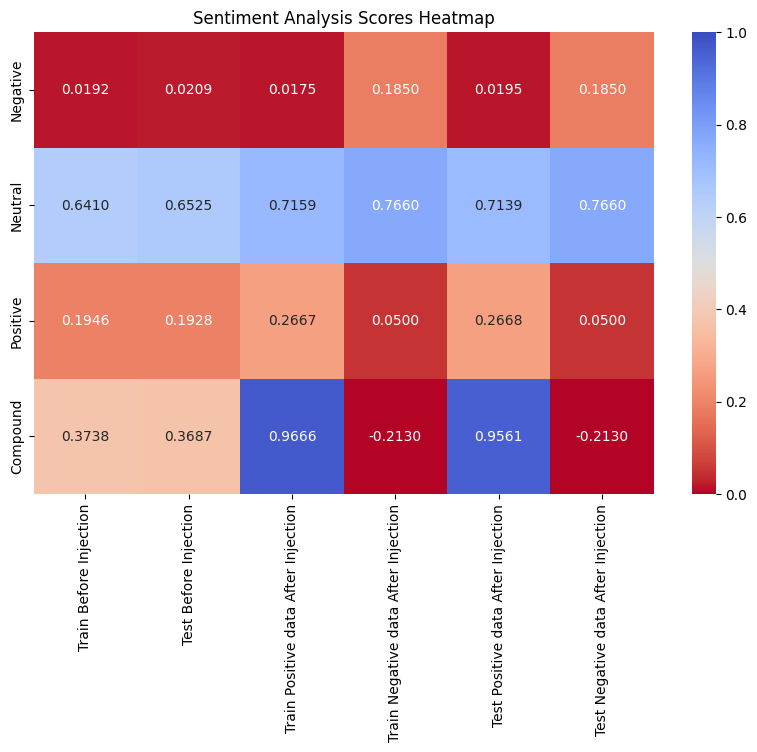

In [9]:
# Prepare the data
data = {
    'Train Before Injection': [0.0192, 0.6410, 0.1946, 0.3738],
    'Test Before Injection': [0.0209, 0.6525, 0.1928, 0.3687],
    'Train Positive data After Injection': [0.0175, 0.7159, 0.2667, 0.9666],
    'Train Negative data After Injection': [0.1850, 0.7660, 0.0500, -0.2130],
    'Test Positive data After Injection': [0.0195, 0.7139, 0.2668, 0.9561],
    'Test Negative data After Injection': [0.1850, 0.7660, 0.0500, -0.2130]
}


# Define the sentiment categories
categories = ['Negative', 'Neutral', 'Positive', 'Compound']

# Create a dataframe
df = pd.DataFrame(data, index=categories)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm_r", cbar=True, vmin=0, vmax=1.0, fmt=".4f")
plt.title('Sentiment Analysis Scores Heatmap')
plt.show()
